In [720]:
import csv
import numpy as np
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt
import math

## Perceptron Learning algorithm

[2 points] Implement the Perceptron Learning algorithm. Run it on the data file "classification.txt" ignoring the 5th column. That is, consider only the first 4 columns in each row. The first 3 columns are the coordinates of a point; and the 4th column is its classification label +1 or -1. Report your results (weights and accuracy after the final iteration).

In [605]:
data = []
with open('classification.txt') as f:
    file = csv.reader(f)
    for line in file:
#         line.pop(-1)
#         print(line[0])
#         data.append([float(line[0]),float(line[1]),float(line[2]),int(line[3])])
        data.append(line)
data = np.array(data).astype('float64')
# data = data[:5]
data

array([[ 0.750072  ,  0.97740794,  0.88565752, -1.        ,  1.        ],
       [ 0.87791369,  0.01925101,  0.50671112,  1.        , -1.        ],
       [ 0.7773246 ,  0.99406596,  0.82224385, -1.        ,  1.        ],
       ...,
       [ 0.5155064 ,  0.15354364,  0.01275495,  1.        ,  1.        ],
       [ 0.2282263 ,  0.97155357,  0.18305906, -1.        ,  1.        ],
       [ 0.36391513,  0.49207061,  0.71952659, -1.        ,  1.        ]])

In [620]:
data_points = data[:,:3]
y = data[:,3]
x = np.concatenate((np.ones((len(data_points),1)), data_points), axis=1)
y

array([-1.,  1., -1., ...,  1., -1., -1.])

In [609]:
def perceptron_learning_ALG(x, y_true, alpha):
    w = np.zeros(len(x[0]))
    iteration = 0
    yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
    while  np.any(yhat != y_true):
        print(iteration,'iteration: ','w=',w)
        for idx in range(len(x)):
            z = x[idx].dot(w)
            if y_true[idx]==1 and z<0:
                w = w + alpha*x[idx]
                break
            if y_true[idx]==-1 and z>=0:
                w = w - alpha*x[idx]
                break
        yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
        iteration+=1
    acc = accuracy_score(y_true, yhat)
    return iteration, w, acc

In [610]:
data_points = data[:,:3]
y = data[:,3]
x = np.concatenate((np.ones((len(data_points),1)), data_points), axis=1)
iteration, w, acc = perceptron_learning_ALG(x, y, 0.1)
iteration, w, acc

0 iteration:  w= [0. 0. 0. 0.]
1 iteration:  w= [-0.1        -0.0750072  -0.09774079 -0.08856575]
2 iteration:  w= [ 0.          0.01278417 -0.09581569 -0.03789464]
3 iteration:  w= [ 0.1         0.10057554 -0.09389059  0.01277647]
4 iteration:  w= [ 0.          0.02556834 -0.19163139 -0.07578928]
5 iteration:  w= [ 0.1         0.11335971 -0.18970629 -0.02511817]
6 iteration:  w= [ 0.          0.09524388 -0.23578123 -0.07766583]
7 iteration:  w= [ 0.1         0.17220365 -0.22326445 -0.01775049]
8 iteration:  w= [ 0.          0.15408782 -0.26933939 -0.07029815]
9 iteration:  w= [ 0.1         0.2526412  -0.19775313 -0.0451563 ]
10 iteration:  w= [ 0.          0.177634   -0.29549393 -0.13372205]
11 iteration:  w= [ 0.1         0.27618738 -0.22390767 -0.10858021]
12 iteration:  w= [ 0.          0.19845492 -0.32331427 -0.19080459]
13 iteration:  w= [ 0.1         0.27541468 -0.31079749 -0.13088925]
14 iteration:  w= [ 0.          0.26395827 -0.31755295 -0.1437813 ]
15 iteration:  w= [ 0.1   

141 iteration:  w= [-0.1         1.00060732 -0.60810766 -0.47330235]
142 iteration:  w= [-0.2         0.90696504 -0.69914238 -0.52613526]
143 iteration:  w= [-0.1         0.97846519 -0.6528107  -0.49818101]
144 iteration:  w= [ 0.          1.03055335 -0.62905565 -0.44638954]
145 iteration:  w= [-0.1         1.01909694 -0.63581111 -0.45928159]
146 iteration:  w= [-0.2         0.96732847 -0.63862863 -0.54654756]
147 iteration:  w= [-0.1         1.01941664 -0.61487358 -0.4947561 ]
148 iteration:  w= [-0.2         0.97200231 -0.66998526 -0.50342503]
149 iteration:  w= [-0.1         1.02409047 -0.64623021 -0.45163356]
150 iteration:  w= [-0.2         0.972322   -0.64904773 -0.53889953]
151 iteration:  w= [-0.1         1.02441016 -0.62529268 -0.48710806]
152 iteration:  w= [-0.2         0.93076789 -0.71632741 -0.53994098]
153 iteration:  w= [-0.1         1.00226804 -0.66999572 -0.51198673]
154 iteration:  w= [ 0.          1.0543562  -0.64624067 -0.46019526]
155 iteration:  w= [-0.1         1

297 iteration:  w= [-0.1         1.29829935 -0.85566893 -0.61343717]
298 iteration:  w= [-0.2         1.24653088 -0.85848645 -0.70070314]
299 iteration:  w= [-0.1         1.29861904 -0.8347314  -0.64891167]
300 iteration:  w= [-0.2         1.20497677 -0.92576612 -0.70174459]
301 iteration:  w= [-0.1         1.25706493 -0.90201107 -0.64995312]
302 iteration:  w= [ 0.          1.30072197 -0.88048064 -0.61072993]
303 iteration:  w= [-0.1         1.28926556 -0.88723611 -0.62362198]
304 iteration:  w= [ 0.          1.31032984 -0.87990531 -0.60036467]
305 iteration:  w= [-0.1         1.29887343 -0.88666078 -0.61325672]
306 iteration:  w= [-0.2         1.24710496 -0.8894783  -0.70052269]
307 iteration:  w= [-0.1         1.29919312 -0.86572325 -0.64873122]
308 iteration:  w= [ 0.          1.3202574  -0.85839245 -0.62547391]
309 iteration:  w= [-0.1         1.30880099 -0.86514792 -0.63836596]
310 iteration:  w= [-0.2         1.21515871 -0.95618264 -0.69119887]
311 iteration:  w= [-0.1         1

507 iteration:  w= [-0.1         1.5431256  -1.02249446 -0.77111978]
508 iteration:  w= [-0.2         1.49571127 -1.07760615 -0.77978871]
509 iteration:  w= [-0.1         1.54779943 -1.0538511  -0.72799725]
510 iteration:  w= [-0.2         1.49603096 -1.05666861 -0.81526322]
511 iteration:  w= [-0.1         1.54811912 -1.03291356 -0.76347175]
512 iteration:  w= [-0.2         1.49635065 -1.03573108 -0.85073772]
513 iteration:  w= [-0.1         1.54843882 -1.01197603 -0.79894625]
514 iteration:  w= [-0.2         1.50102449 -1.06708771 -0.80761518]
515 iteration:  w= [-0.1         1.55311265 -1.04333266 -0.75582372]
516 iteration:  w= [-0.2         1.50134418 -1.04615018 -0.84308969]
517 iteration:  w= [-0.1         1.55343234 -1.02239513 -0.79129822]
518 iteration:  w= [-0.2         1.50601802 -1.07750681 -0.79996715]
519 iteration:  w= [-0.1         1.55810618 -1.05375176 -0.74817568]
520 iteration:  w= [-0.2         1.50633771 -1.05656928 -0.83544165]
521 iteration:  w= [-0.1         1

662 iteration:  w= [-0.2         1.66974113 -1.21269956 -0.87669991]
663 iteration:  w= [-0.1         1.72182929 -1.18894451 -0.82490844]
664 iteration:  w= [-0.2         1.67006082 -1.19176203 -0.91217441]
665 iteration:  w= [-0.1         1.72214898 -1.16800698 -0.86038295]
666 iteration:  w= [-0.2         1.67038051 -1.1708245  -0.94764892]
667 iteration:  w= [-0.1         1.72246868 -1.14706945 -0.89585745]
668 iteration:  w= [-0.2         1.67505435 -1.20218113 -0.90452638]
669 iteration:  w= [-0.1         1.72714251 -1.17842608 -0.85273491]
670 iteration:  w= [-0.2         1.67537404 -1.1812436  -0.94000088]
671 iteration:  w= [-0.1         1.7274622  -1.15748855 -0.88820942]
672 iteration:  w= [-0.2         1.68004788 -1.21260023 -0.89687835]
673 iteration:  w= [-0.1         1.73213604 -1.18884518 -0.84508688]
674 iteration:  w= [-0.2         1.68036757 -1.1916627  -0.93235285]
675 iteration:  w= [-0.1         1.73245573 -1.16790765 -0.88056138]
676 iteration:  w= [-0.2         1

850 iteration:  w= [-0.2         1.8832461  -1.35670032 -1.02158188]
851 iteration:  w= [-0.1         1.93533427 -1.33294527 -0.96979041]
852 iteration:  w= [-0.2         1.88356579 -1.33576279 -1.05705638]
853 iteration:  w= [-0.1         1.93565396 -1.31200774 -1.00526491]
854 iteration:  w= [-0.2         1.88823963 -1.36711942 -1.01393384]
855 iteration:  w= [-0.1         1.94032779 -1.34336437 -0.96214238]
856 iteration:  w= [-0.2         1.88855932 -1.34618189 -1.04940835]
857 iteration:  w= [-0.1         1.94064749 -1.32242684 -0.99761688]
858 iteration:  w= [-0.2         1.89323316 -1.37753852 -1.00628581]
859 iteration:  w= [-0.1         1.94532132 -1.35378347 -0.95449434]
860 iteration:  w= [-0.2         1.89355285 -1.35660099 -1.04176031]
861 iteration:  w= [-0.1         1.94564101 -1.33284594 -0.98996885]
862 iteration:  w= [-0.2         1.89387254 -1.33566346 -1.07723482]
863 iteration:  w= [-0.1         1.94596071 -1.31190841 -1.02544335]
864 iteration:  w= [-0.2         1

1027 iteration:  w= [-0.1         2.13385866 -1.44568874 -1.13761647]
1028 iteration:  w= [-0.2         2.08644433 -1.50080042 -1.14628541]
1029 iteration:  w= [-0.1         2.13853249 -1.47704537 -1.09449394]
1030 iteration:  w= [-0.2         2.08676402 -1.47986289 -1.18175991]
1031 iteration:  w= [-0.1         2.13885218 -1.45610784 -1.12996844]
1032 iteration:  w= [-0.2         2.09143786 -1.51121952 -1.13863737]
1033 iteration:  w= [-0.1         2.14352602 -1.48746447 -1.08684591]
1034 iteration:  w= [-0.2         2.09175755 -1.49028199 -1.17411188]
1035 iteration:  w= [-0.1         2.14384571 -1.46652694 -1.12232041]
1036 iteration:  w= [-0.2         2.09643138 -1.52163862 -1.13098934]
1037 iteration:  w= [-0.1         2.14851955 -1.49788357 -1.07919787]
1038 iteration:  w= [-0.2         2.09675108 -1.50070109 -1.16646384]
1039 iteration:  w= [-0.1         2.14883924 -1.47694604 -1.11467238]
1040 iteration:  w= [-0.2         2.10142491 -1.53205772 -1.12334131]
1041 iteration:  w= 

1151 iteration:  w= [-0.1         2.27124144 -1.55950418 -1.21491561]
1152 iteration:  w= [-0.2         2.22382711 -1.61461587 -1.22358455]
1153 iteration:  w= [-0.1         2.27591528 -1.59086082 -1.17179308]
1154 iteration:  w= [-0.2         2.22414681 -1.59367834 -1.25905905]
1155 iteration:  w= [-0.1         2.27623497 -1.56992328 -1.20726758]
1156 iteration:  w= [-0.2         2.22882064 -1.62503497 -1.21593651]
1157 iteration:  w= [-0.1         2.28090881 -1.60127992 -1.16414504]
1158 iteration:  w= [-0.2         2.22914034 -1.60409743 -1.25141102]
1159 iteration:  w= [-0.1         2.2812285  -1.58034238 -1.19961955]
1160 iteration:  w= [-0.2         2.23381417 -1.63545407 -1.20828848]
1161 iteration:  w= [-0.1         2.28590233 -1.61169902 -1.15649701]
1162 iteration:  w= [-0.2         2.23413386 -1.61451653 -1.24376298]
1163 iteration:  w= [-0.1         2.28622203 -1.59076148 -1.19197151]
1164 iteration:  w= [-0.2         2.2388077  -1.64587317 -1.20064045]
1165 iteration:  w= 

1340 iteration:  w= [-0.2         2.43733209 -1.75861663 -1.36846651]
1341 iteration:  w= [-0.1         2.48942025 -1.73486158 -1.31667504]
1342 iteration:  w= [-0.2         2.44200592 -1.78997326 -1.32534398]
1343 iteration:  w= [-0.1         2.49409409 -1.76621821 -1.27355251]
1344 iteration:  w= [-0.2         2.44232562 -1.76903573 -1.36081848]
1345 iteration:  w= [-0.1         2.49441378 -1.74528068 -1.30902701]
1346 iteration:  w= [-0.2         2.44699945 -1.80039236 -1.31769594]
1347 iteration:  w= [-0.1         2.49908761 -1.77663731 -1.26590448]
1348 iteration:  w= [-0.2         2.44731914 -1.77945483 -1.35317045]
1349 iteration:  w= [-0.1         2.49940731 -1.75569978 -1.30137898]
1350 iteration:  w= [-0.2         2.44763884 -1.7585173  -1.38864495]
1351 iteration:  w= [-0.1         2.499727   -1.73476225 -1.33685348]
1352 iteration:  w= [-0.2         2.45231267 -1.78987393 -1.34552241]
1353 iteration:  w= [-0.1         2.50440083 -1.76611888 -1.29373095]
1354 iteration:  w= 

1509 iteration:  w= [-0.1         2.6773777  -1.91099297 -1.38844286]
1510 iteration:  w= [-0.2         2.62560923 -1.91381048 -1.47570883]
1511 iteration:  w= [-0.1         2.67769739 -1.89005543 -1.42391736]
1512 iteration:  w= [-0.2         2.63028306 -1.94516712 -1.4325863 ]
1513 iteration:  w= [-0.1         2.68237123 -1.92141207 -1.38079483]
1514 iteration:  w= [-0.2         2.63060276 -1.92422958 -1.4680608 ]
1515 iteration:  w= [-0.1         2.68269092 -1.90047453 -1.41626933]
1516 iteration:  w= [-0.2         2.63527659 -1.95558622 -1.42493826]
1517 iteration:  w= [-0.1         2.68736475 -1.93183117 -1.3731468 ]
1518 iteration:  w= [-0.2         2.63559628 -1.93464868 -1.46041277]
1519 iteration:  w= [-0.1         2.68768445 -1.91089363 -1.4086213 ]
1520 iteration:  w= [-0.2         2.63591598 -1.91371115 -1.49588727]
1521 iteration:  w= [-0.1         2.68800414 -1.8899561  -1.4440958 ]
1522 iteration:  w= [-0.2         2.64058981 -1.94506778 -1.45276473]
1523 iteration:  w= 

1680 iteration:  w= [-0.2         2.82317454 -2.08936654 -1.53711139]
1681 iteration:  w= [-0.1         2.87526271 -2.06561149 -1.48531992]
1682 iteration:  w= [-0.2         2.82349424 -2.06842901 -1.57258589]
1683 iteration:  w= [-0.1         2.8755824  -2.04467396 -1.52079442]
1684 iteration:  w= [-0.2         2.82381393 -2.04749148 -1.60806039]
1685 iteration:  w= [-0.1         2.87590209 -2.02373643 -1.55626893]
1686 iteration:  w= [-0.2         2.82848776 -2.07884811 -1.56493786]
1687 iteration:  w= [-0.1         2.88057593 -2.05509306 -1.51314639]
1688 iteration:  w= [-0.2         2.82880746 -2.05791058 -1.60041236]
1689 iteration:  w= [-0.1         2.88089562 -2.03415553 -1.54862089]
1690 iteration:  w= [-0.2         2.83348129 -2.08926721 -1.55728983]
1691 iteration:  w= [-0.1         2.88556945 -2.06551216 -1.50549836]
1692 iteration:  w= [-0.2         2.83380098 -2.06832968 -1.59276433]
1693 iteration:  w= [-0.1         2.88588915 -2.04457463 -1.54097286]
1694 iteration:  w= 

1831 iteration:  w= [-0.1         3.03857221 -2.16870985 -1.6308024 ]
1832 iteration:  w= [-0.2         2.99115788 -2.22382153 -1.63947134]
1833 iteration:  w= [-0.1         3.04324604 -2.20006648 -1.58767987]
1834 iteration:  w= [-0.2         2.99147757 -2.202884   -1.67494584]
1835 iteration:  w= [-0.1         3.04356574 -2.17912895 -1.62315437]
1836 iteration:  w= [-0.2         2.99615141 -2.23424063 -1.6318233 ]
1837 iteration:  w= [-0.1         3.04823957 -2.21048558 -1.58003184]
1838 iteration:  w= [-0.2         2.9964711  -2.2133031  -1.66729781]
1839 iteration:  w= [-0.1         3.04855926 -2.18954805 -1.61550634]
1840 iteration:  w= [-0.2         2.99679079 -2.19236557 -1.70277231]
1841 iteration:  w= [-0.1         3.04887896 -2.16861052 -1.65098084]
1842 iteration:  w= [-0.2         3.00146463 -2.2237222  -1.65964977]
1843 iteration:  w= [-0.1         3.05355279 -2.19996715 -1.60785831]
1844 iteration:  w= [-0.2         3.00178432 -2.20278467 -1.69512428]
1845 iteration:  w= 

2011 iteration:  w= [-0.1         3.0991456  -2.44950659 -1.81057209]
2012 iteration:  w= [ 0.          3.15123376 -2.42575154 -1.75878062]
2013 iteration:  w= [-0.1         3.09946529 -2.42856906 -1.84604659]
2014 iteration:  w= [ 0.          3.15155345 -2.40481401 -1.79425512]
2015 iteration:  w= [-0.1         3.10413913 -2.45992569 -1.80292406]
2016 iteration:  w= [ 0.          3.15622729 -2.43617064 -1.75113259]
2017 iteration:  w= [-0.1         3.10445882 -2.43898816 -1.83839856]
2018 iteration:  w= [ 0.          3.15654698 -2.41523311 -1.78660709]
2019 iteration:  w= [-0.1         3.10477851 -2.41805063 -1.87387306]
2020 iteration:  w= [ 0.          3.15686667 -2.39429558 -1.82208159]
2021 iteration:  w= [-0.1         3.10945235 -2.44940726 -1.83075053]
2022 iteration:  w= [ 0.          3.16154051 -2.42565221 -1.77895906]
2023 iteration:  w= [-0.1         3.10977204 -2.42846973 -1.86622503]
2024 iteration:  w= [ 0.          3.1618602  -2.40471468 -1.81443356]
2025 iteration:  w= 

2165 iteration:  w= [ 0.1         3.2902155  -2.58488702 -1.82255878]
2166 iteration:  w= [ 0.          3.27875909 -2.59164249 -1.83545083]
2167 iteration:  w= [-0.1         3.22699062 -2.59446    -1.9227168 ]
2168 iteration:  w= [ 0.          3.27907878 -2.57070495 -1.87092533]
2169 iteration:  w= [-0.1         3.22512102 -2.61854614 -1.89825967]
2170 iteration:  w= [ 0.          3.27720918 -2.59479109 -1.8464682 ]
2171 iteration:  w= [-0.1         3.22544071 -2.59760861 -1.93373418]
2172 iteration:  w= [ 0.          3.27752888 -2.57385356 -1.88194271]
2173 iteration:  w= [-0.1         3.22357111 -2.62169474 -1.90927704]
2174 iteration:  w= [ 0.          3.27565927 -2.59793969 -1.85748558]
2175 iteration:  w= [-0.1         3.2238908  -2.60075721 -1.94475155]
2176 iteration:  w= [ 0.          3.27597897 -2.57700216 -1.89296008]
2177 iteration:  w= [-0.1         3.2220212  -2.62484334 -1.92029442]
2178 iteration:  w= [ 0.          3.27410936 -2.60108829 -1.86850295]
2179 iteration:  w= 

2313 iteration:  w= [-0.1         3.32327796 -2.74558166 -1.95932935]
2314 iteration:  w= [ 0.          3.37536612 -2.72182661 -1.90753789]
2315 iteration:  w= [-0.1         3.32359765 -2.72464413 -1.99480386]
2316 iteration:  w= [ 0.          3.37568582 -2.70088908 -1.94301239]
2317 iteration:  w= [-0.1         3.28547701 -2.74931499 -2.03028739]
2318 iteration:  w= [ 0.          3.33756517 -2.72555994 -1.97849592]
2319 iteration:  w= [ 0.1         3.41797729 -2.68558623 -1.89782006]
2320 iteration:  w= [ 0.          3.40652088 -2.69234169 -1.91071211]
2321 iteration:  w= [-0.1         3.35475241 -2.69515921 -1.99797808]
2322 iteration:  w= [ 0.          3.40684057 -2.67140416 -1.94618662]
2323 iteration:  w= [-0.1         3.35288281 -2.71924535 -1.97352095]
2324 iteration:  w= [ 0.          3.40497097 -2.6954903  -1.92172949]
2325 iteration:  w= [-0.1         3.3532025  -2.69830781 -2.00899546]
2326 iteration:  w= [ 0.          3.40529066 -2.67455276 -1.95720399]
2327 iteration:  w= 

2495 iteration:  w= [ 0.1         3.55990592 -2.79317063 -1.98435511]
2496 iteration:  w= [ 0.          3.54844951 -2.7999261  -1.99724716]
2497 iteration:  w= [-0.1         3.49668104 -2.80274362 -2.08451313]
2498 iteration:  w= [ 0.          3.5487692  -2.77898857 -2.03272166]
2499 iteration:  w= [-0.1         3.49481144 -2.82682975 -2.060056  ]
2500 iteration:  w= [ 0.          3.5468996  -2.8030747  -2.00826453]
2501 iteration:  w= [-0.1         3.49513113 -2.80589222 -2.0955305 ]
2502 iteration:  w= [ 0.          3.54721929 -2.78213717 -2.04373904]
2503 iteration:  w= [-0.1         3.49326153 -2.82997835 -2.07107337]
2504 iteration:  w= [ 0.          3.54534969 -2.8062233  -2.01928191]
2505 iteration:  w= [-0.1         3.49139193 -2.85406448 -2.04661624]
2506 iteration:  w= [ 0.          3.54348009 -2.83030943 -1.99482478]
2507 iteration:  w= [-0.1         3.49171162 -2.83312695 -2.08209075]
2508 iteration:  w= [ 0.          3.54379978 -2.8093719  -2.03029928]
2509 iteration:  w= 

2653 iteration:  w= [ 0.1         3.66407995 -2.88051131 -2.10500544]
2654 iteration:  w= [ 0.          3.65262354 -2.88726677 -2.11789749]
2655 iteration:  w= [-0.1         3.59866577 -2.93510795 -2.14523183]
2656 iteration:  w= [ 0.          3.65075394 -2.9113529  -2.09344036]
2657 iteration:  w= [-0.1         3.59679617 -2.95919409 -2.1207747 ]
2658 iteration:  w= [ 0.          3.64888433 -2.93543904 -2.06898323]
2659 iteration:  w= [-0.1         3.59711586 -2.93825656 -2.1562492 ]
2660 iteration:  w= [ 0.          3.64920403 -2.91450151 -2.10445773]
2661 iteration:  w= [-0.1         3.55899522 -2.96292742 -2.19173273]
2662 iteration:  w= [ 0.          3.61108338 -2.93917237 -2.13994126]
2663 iteration:  w= [-0.1         3.52454368 -2.97800511 -2.23239833]
2664 iteration:  w= [ 0.          3.57663184 -2.95425006 -2.18060687]
2665 iteration:  w= [ 0.1         3.65704396 -2.91427634 -2.09993101]
2666 iteration:  w= [ 0.          3.64558754 -2.92103181 -2.11282306]
2667 iteration:  w= 

2800 iteration:  w= [ 0.          3.73109742 -3.00494091 -2.19932853]
2801 iteration:  w= [-0.1         3.68738893 -3.01058007 -2.26560579]
2802 iteration:  w= [ 0.          3.73947709 -2.98682502 -2.21381432]
2803 iteration:  w= [-0.1         3.65293738 -3.02565775 -2.30627139]
2804 iteration:  w= [ 0.          3.70502555 -3.0019027  -2.25447992]
2805 iteration:  w= [ 0.1         3.78543766 -2.96192899 -2.17380406]
2806 iteration:  w= [ 0.          3.77398125 -2.96868445 -2.18669611]
2807 iteration:  w= [-0.1         3.72002349 -3.01652564 -2.21403045]
2808 iteration:  w= [ 0.          3.77211165 -2.99277059 -2.16223898]
2809 iteration:  w= [-0.1         3.71815388 -3.04061177 -2.18957332]
2810 iteration:  w= [ 0.          3.77024205 -3.01685672 -2.13778185]
2811 iteration:  w= [-0.1         3.71847358 -3.01967424 -2.22504782]
2812 iteration:  w= [ 0.          3.77056174 -2.99591919 -2.17325635]
2813 iteration:  w= [-0.1         3.71660398 -3.04376037 -2.20059069]
2814 iteration:  w= 

2945 iteration:  w= [-0.1         3.82377251 -3.09963344 -2.27475794]
2946 iteration:  w= [ 0.          3.87586067 -3.07587839 -2.22296647]
2947 iteration:  w= [-0.1         3.82190291 -3.12371958 -2.25030081]
2948 iteration:  w= [ 0.          3.87399107 -3.09996453 -2.19850934]
2949 iteration:  w= [-0.1         3.82003331 -3.14780571 -2.22584368]
2950 iteration:  w= [ 0.          3.87212147 -3.12405066 -2.17405221]
2951 iteration:  w= [-0.1         3.820353   -3.12686818 -2.26131818]
2952 iteration:  w= [ 0.          3.87244116 -3.10311313 -2.20952671]
2953 iteration:  w= [-0.1         3.8184834  -3.15095431 -2.23686105]
2954 iteration:  w= [ 0.          3.87057156 -3.12719926 -2.18506958]
2955 iteration:  w= [-0.1         3.81880309 -3.13001678 -2.27233555]
2956 iteration:  w= [ 0.          3.87089125 -3.10626173 -2.22054408]
2957 iteration:  w= [-0.1         3.78068245 -3.15468765 -2.30781908]
2958 iteration:  w= [ 0.          3.83277061 -3.1309326  -2.25602762]
2959 iteration:  w= 

3075 iteration:  w= [-0.1         3.87863009 -3.19567161 -2.3651838 ]
3076 iteration:  w= [ 0.          3.93071826 -3.17191656 -2.31339233]
3077 iteration:  w= [-0.1         3.88700977 -3.17755572 -2.37966959]
3078 iteration:  w= [ 0.          3.93909793 -3.15380067 -2.32787812]
3079 iteration:  w= [-0.1         3.89538944 -3.15943983 -2.39415538]
3080 iteration:  w= [ 0.          3.9474776  -3.13568478 -2.34236392]
3081 iteration:  w= [-0.1         3.86093789 -3.17451751 -2.43482099]
3082 iteration:  w= [ 0.          3.91302606 -3.15076246 -2.38302952]
3083 iteration:  w= [ 0.1         3.99343817 -3.11078875 -2.30235366]
3084 iteration:  w= [ 0.          3.98198176 -3.11754421 -2.31524571]
3085 iteration:  w= [-0.1         3.928024   -3.1653854  -2.34258005]
3086 iteration:  w= [ 0.          3.98011216 -3.14163035 -2.29078858]
3087 iteration:  w= [-0.1         3.9261544  -3.18947153 -2.31812292]
3088 iteration:  w= [ 0.          3.97824256 -3.16571648 -2.26633145]
3089 iteration:  w= 

3287 iteration:  w= [-0.1         4.00172699 -3.30196244 -2.51789156]
3288 iteration:  w= [ 0.          4.05381516 -3.27820739 -2.46610009]
3289 iteration:  w= [ 0.1         4.13422728 -3.23823367 -2.38542423]
3290 iteration:  w= [ 0.          4.12277086 -3.24498914 -2.39831628]
3291 iteration:  w= [-0.1         4.0688131  -3.29283032 -2.42565062]
3292 iteration:  w= [ 0.          4.12090126 -3.26907527 -2.37385915]
3293 iteration:  w= [-0.1         4.0669435  -3.31691646 -2.40119349]
3294 iteration:  w= [ 0.          4.11903166 -3.29316141 -2.34940202]
3295 iteration:  w= [-0.1         4.0650739  -3.34100259 -2.37673636]
3296 iteration:  w= [ 0.          4.11716206 -3.31724754 -2.32494489]
3297 iteration:  w= [-0.1         4.06539359 -3.32006506 -2.41221086]
3298 iteration:  w= [ 0.          4.11748175 -3.29631001 -2.3604194 ]
3299 iteration:  w= [-0.1         4.02727294 -3.34473592 -2.4476944 ]
3300 iteration:  w= [ 0.          4.07936111 -3.32098087 -2.39590293]
3301 iteration:  w= 

3457 iteration:  w= [-0.1         4.1494824  -3.41288779 -2.51326225]
3458 iteration:  w= [ 0.          4.20157056 -3.38913274 -2.46147078]
3459 iteration:  w= [-0.1         4.11136175 -3.43755865 -2.54874578]
3460 iteration:  w= [ 0.          4.16344991 -3.4138036  -2.49695432]
3461 iteration:  w= [ 0.1         4.24386203 -3.37382989 -2.41627846]
3462 iteration:  w= [ 0.          4.23240562 -3.38058535 -2.42917051]
3463 iteration:  w= [-0.1         4.17844785 -3.42842654 -2.45650484]
3464 iteration:  w= [ 0.          4.23053602 -3.40467149 -2.40471338]
3465 iteration:  w= [-0.1         4.14032721 -3.4530974  -2.49198838]
3466 iteration:  w= [ 0.          4.19241537 -3.42934235 -2.44019691]
3467 iteration:  w= [-0.1         4.14870688 -3.43498151 -2.50647417]
3468 iteration:  w= [ 0.          4.20079504 -3.41122646 -2.4546827 ]
3469 iteration:  w= [-0.1         4.15708655 -3.41686562 -2.52095996]
3470 iteration:  w= [ 0.          4.20917471 -3.39311057 -2.46916849]
3471 iteration:  w= 

3643 iteration:  w= [-0.1         4.26730708 -3.53227464 -2.59283472]
3644 iteration:  w= [ 0.          4.31939524 -3.50851959 -2.54104325]
3645 iteration:  w= [-0.1         4.27568675 -3.51415875 -2.60732051]
3646 iteration:  w= [ 0.          4.32777492 -3.4904037  -2.55552905]
3647 iteration:  w= [-0.1         4.28406642 -3.49604286 -2.6218063 ]
3648 iteration:  w= [ 0.          4.33615459 -3.47228781 -2.57001484]
3649 iteration:  w= [-0.1         4.24961488 -3.51112054 -2.66247191]
3650 iteration:  w= [ 0.          4.30170304 -3.48736549 -2.61068044]
3651 iteration:  w= [ 0.1         4.38211516 -3.44739178 -2.53000458]
3652 iteration:  w= [ 0.          4.37065875 -3.45414724 -2.54289663]
3653 iteration:  w= [-0.1         4.31670098 -3.50198843 -2.57023097]
3654 iteration:  w= [ 0.          4.36878915 -3.47823338 -2.5184395 ]
3655 iteration:  w= [-0.1         4.31483138 -3.52607456 -2.54577384]
3656 iteration:  w= [ 0.          4.36691955 -3.50231951 -2.49398237]
3657 iteration:  w= 

3850 iteration:  w= [ 0.          4.50506002 -3.59811049 -2.57790061]
3851 iteration:  w= [-0.1         4.45110226 -3.64595168 -2.60523494]
3852 iteration:  w= [ 0.          4.47216654 -3.63862088 -2.58197763]
3853 iteration:  w= [-0.1         4.38195773 -3.6870468  -2.66925263]
3854 iteration:  w= [ 0.          4.43404589 -3.66329175 -2.61746116]
3855 iteration:  w= [ 0.1         4.51445801 -3.62331803 -2.53678531]
3856 iteration:  w= [ 0.          4.5030016  -3.6300735  -2.54967736]
3857 iteration:  w= [-0.1         4.45123313 -3.63289101 -2.63694333]
3858 iteration:  w= [ 0.          4.50332129 -3.60913596 -2.58515186]
3859 iteration:  w= [-0.1         4.41311248 -3.65756188 -2.67242686]
3860 iteration:  w= [ 0.          4.46520064 -3.63380683 -2.62063539]
3861 iteration:  w= [-0.1         4.42149215 -3.63944599 -2.68691265]
3862 iteration:  w= [ 0.          4.47358031 -3.61569094 -2.63512118]
3863 iteration:  w= [-0.1         4.42987182 -3.6213301  -2.70139844]
3864 iteration:  w= 

3972 iteration:  w= [ 0.          4.55582537 -3.67381062 -2.65180711]
3973 iteration:  w= [-0.1         4.46561656 -3.72223654 -2.73908211]
3974 iteration:  w= [ 0.          4.51770472 -3.69848149 -2.68729065]
3975 iteration:  w= [ 0.1         4.59811684 -3.65850777 -2.60661479]
3976 iteration:  w= [ 0.          4.58666043 -3.66526324 -2.61950684]
3977 iteration:  w= [-0.1         4.53270266 -3.71310442 -2.64684117]
3978 iteration:  w= [ 0.          4.55376694 -3.70577362 -2.62358386]
3979 iteration:  w= [-0.1         4.46355813 -3.75419954 -2.71085886]
3980 iteration:  w= [ 0.          4.5156463  -3.73044449 -2.6590674 ]
3981 iteration:  w= [ 0.1         4.59605841 -3.69047078 -2.57839154]
3982 iteration:  w= [ 0.          4.584602   -3.69722624 -2.59128359]
3983 iteration:  w= [-0.1         4.53283353 -3.70004376 -2.67854956]
3984 iteration:  w= [ 0.          4.58492169 -3.67628871 -2.62675809]
3985 iteration:  w= [-0.1         4.49471289 -3.72471463 -2.71403309]
3986 iteration:  w= 

4109 iteration:  w= [-0.1         4.57754744 -3.78895208 -2.74965944]
4110 iteration:  w= [ 0.          4.6296356  -3.76519703 -2.69786797]
4111 iteration:  w= [-0.1         4.58592711 -3.77083619 -2.76414523]
4112 iteration:  w= [ 0.          4.63801527 -3.74708114 -2.71235377]
4113 iteration:  w= [-0.1         4.54780646 -3.79550706 -2.79962877]
4114 iteration:  w= [ 0.          4.59989462 -3.77175201 -2.7478373 ]
4115 iteration:  w= [ 0.1         4.68030674 -3.73177829 -2.66716144]
4116 iteration:  w= [ 0.          4.66885033 -3.73853376 -2.68005349]
4117 iteration:  w= [-0.1         4.57864152 -3.78695968 -2.76732849]
4118 iteration:  w= [ 0.          4.63072968 -3.76320463 -2.71553702]
4119 iteration:  w= [-0.1         4.58702119 -3.76884379 -2.78181428]
4120 iteration:  w= [ 0.          4.63910936 -3.74508874 -2.73002281]
4121 iteration:  w= [-0.1         4.59540086 -3.75072789 -2.79630007]
4122 iteration:  w= [ 0.          4.64748903 -3.72697284 -2.7445086 ]
4123 iteration:  w= 

4295 iteration:  w= [-0.1         4.73781017 -3.84242968 -2.79585832]
4296 iteration:  w= [ 0.          4.75887445 -3.83509888 -2.77260101]
4297 iteration:  w= [-0.1         4.66866564 -3.8835248  -2.85987601]
4298 iteration:  w= [ 0.          4.72075381 -3.85976975 -2.80808454]
4299 iteration:  w= [ 0.1         4.80116592 -3.81979604 -2.72740869]
4300 iteration:  w= [ 0.          4.78970951 -3.8265515  -2.74030073]
4301 iteration:  w= [-0.1         4.73575175 -3.87439268 -2.76763507]
4302 iteration:  w= [ 0.          4.75681602 -3.86706189 -2.74437776]
4303 iteration:  w= [-0.1         4.66660721 -3.9154878  -2.83165276]
4304 iteration:  w= [ 0.          4.71869538 -3.89173275 -2.77986129]
4305 iteration:  w= [ 0.1         4.7991075  -3.85175904 -2.69918544]
4306 iteration:  w= [ 0.          4.78765108 -3.8585145  -2.71207749]
4307 iteration:  w= [-0.1         4.73588261 -3.86133202 -2.79934346]
4308 iteration:  w= [ 0.          4.78797078 -3.83757697 -2.74755199]
4309 iteration:  w= 

4417 iteration:  w= [-0.1         4.73139958 -3.97418636 -2.87360603]
4418 iteration:  w= [ 0.          4.78348774 -3.95043131 -2.82181456]
4419 iteration:  w= [ 0.1         4.86389986 -3.91045759 -2.7411387 ]
4420 iteration:  w= [ 0.          4.85244345 -3.91721306 -2.75403075]
4421 iteration:  w= [-0.1         4.76223464 -3.96563897 -2.84130575]
4422 iteration:  w= [ 0.          4.8143228  -3.94188392 -2.78951428]
4423 iteration:  w= [-0.1         4.77061431 -3.94752308 -2.85579154]
4424 iteration:  w= [ 0.          4.82270247 -3.92376803 -2.80400008]
4425 iteration:  w= [-0.1         4.73249366 -3.97219395 -2.89127508]
4426 iteration:  w= [ 0.          4.78458183 -3.9484389  -2.83948361]
4427 iteration:  w= [ 0.1         4.86499394 -3.90846518 -2.75880775]
4428 iteration:  w= [ 0.          4.85353753 -3.91522065 -2.7716998 ]
4429 iteration:  w= [-0.1         4.76332872 -3.96364656 -2.8589748 ]
4430 iteration:  w= [ 0.          4.81541689 -3.93989151 -2.80718333]
4431 iteration:  w= 

4555 iteration:  w= [-0.1         4.82759424 -3.98720056 -2.97322147]
4556 iteration:  w= [ 0.          4.8796824  -3.96344551 -2.92143001]
4557 iteration:  w= [ 0.1         4.96009452 -3.9234718  -2.84075415]
4558 iteration:  w= [ 0.          4.9486381  -3.93022726 -2.8536462 ]
4559 iteration:  w= [-0.1         4.89468034 -3.97806844 -2.88098054]
4560 iteration:  w= [ 0.          4.91574462 -3.97073765 -2.85772323]
4561 iteration:  w= [-0.1         4.82553581 -4.01916356 -2.94499823]
4562 iteration:  w= [ 0.          4.87762397 -3.99540851 -2.89320676]
4563 iteration:  w= [ 0.1         4.95803609 -3.9554348  -2.8125309 ]
4564 iteration:  w= [ 0.          4.94657968 -3.96219026 -2.82542295]
4565 iteration:  w= [-0.1         4.89262191 -4.01003145 -2.85275729]
4566 iteration:  w= [ 0.          4.91368619 -4.00270065 -2.82949998]
4567 iteration:  w= [-0.1         4.82347738 -4.05112657 -2.91677498]
4568 iteration:  w= [ 0.          4.87556554 -4.02737152 -2.86498351]
4569 iteration:  w= 

4743 iteration:  w= [-0.1         4.943329   -4.05644031 -3.06541029]
4744 iteration:  w= [ 0.          4.99541716 -4.03268526 -3.01361882]
4745 iteration:  w= [ 0.1         5.07582928 -3.99271154 -2.93294296]
4746 iteration:  w= [ 0.          5.06437287 -3.99946701 -2.94583501]
4747 iteration:  w= [-0.1         5.0104151  -4.04730819 -2.97316935]
4748 iteration:  w= [ 0.          5.03147938 -4.0399774  -2.94991204]
4749 iteration:  w= [-0.1         4.94127057 -4.08840331 -3.03718704]
4750 iteration:  w= [ 0.          4.99335873 -4.06464826 -2.98539557]
4751 iteration:  w= [ 0.1         5.07377085 -4.02467455 -2.90471971]
4752 iteration:  w= [ 0.          5.06231444 -4.03143001 -2.91761176]
4753 iteration:  w= [-0.1         5.00835668 -4.0792712  -2.9449461 ]
4754 iteration:  w= [ 0.          5.02942095 -4.0719404  -2.92168879]
4755 iteration:  w= [-0.1         4.93921214 -4.12036632 -3.00896379]
4756 iteration:  w= [ 0.          4.99130031 -4.09661127 -2.95717232]
4757 iteration:  w= 

4975 iteration:  w= [-0.1         5.11097248 -4.16468697 -3.10126356]
4976 iteration:  w= [ 0.          5.16306064 -4.14093192 -3.04947209]
4977 iteration:  w= [-0.1         5.11935215 -4.14657108 -3.11574935]
4978 iteration:  w= [ 0.          5.17144031 -4.12281603 -3.06395788]
4979 iteration:  w= [-0.1         5.08490061 -4.16164877 -3.15641495]
4980 iteration:  w= [ 0.          5.13698877 -4.13789372 -3.10462348]
4981 iteration:  w= [ 0.1         5.21740089 -4.09792    -3.02394762]
4982 iteration:  w= [ 0.          5.20594447 -4.10467547 -3.03683967]
4983 iteration:  w= [-0.1         5.15198671 -4.15251665 -3.06417401]
4984 iteration:  w= [ 0.          5.17305099 -4.14518585 -3.0409167 ]
4985 iteration:  w= [-0.1         5.08284218 -4.19361177 -3.1281917 ]
4986 iteration:  w= [ 0.          5.13493034 -4.16985672 -3.07640023]
4987 iteration:  w= [ 0.1         5.21534246 -4.129883   -2.99572437]
4988 iteration:  w= [ 0.          5.20388605 -4.13663847 -3.00861642]
4989 iteration:  w= 

5161 iteration:  w= [-0.1         5.19831767 -4.23926788 -3.22439497]
5162 iteration:  w= [ 0.          5.25040583 -4.21551283 -3.1726035 ]
5163 iteration:  w= [ 0.1         5.33081795 -4.17553911 -3.09192764]
5164 iteration:  w= [ 0.          5.31936154 -4.18229458 -3.10481969]
5165 iteration:  w= [-0.1         5.26540378 -4.23013576 -3.13215403]
5166 iteration:  w= [ 0.          5.28646805 -4.22280497 -3.10889672]
5167 iteration:  w= [-0.1         5.19625924 -4.27123088 -3.19617172]
5168 iteration:  w= [ 0.          5.24834741 -4.24747583 -3.14438025]
5169 iteration:  w= [ 0.1         5.32875952 -4.20750212 -3.0637044 ]
5170 iteration:  w= [ 0.          5.31730311 -4.21425758 -3.07659644]
5171 iteration:  w= [-0.1         5.26334535 -4.26209877 -3.10393078]
5172 iteration:  w= [ 0.          5.28440962 -4.25476797 -3.08067347]
5173 iteration:  w= [-0.1         5.19420082 -4.30319389 -3.16794847]
5174 iteration:  w= [ 0.          5.24628898 -4.27943884 -3.116157  ]
5175 iteration:  w= 

5389 iteration:  w= [-0.1         5.3427171  -4.40940962 -3.2045052 ]
5390 iteration:  w= [ 0.          5.39480526 -4.38565457 -3.15271373]
5391 iteration:  w= [-0.1         5.35109677 -4.39129373 -3.21899099]
5392 iteration:  w= [ 0.          5.40318493 -4.36753868 -3.16719952]
5393 iteration:  w= [-0.1         5.35947644 -4.37317784 -3.23347678]
5394 iteration:  w= [ 0.          5.4115646  -4.34942279 -3.18168531]
5395 iteration:  w= [-0.1         5.36785611 -4.35506194 -3.24796257]
5396 iteration:  w= [ 0.          5.41994427 -4.33130689 -3.1961711 ]
5397 iteration:  w= [-0.1         5.32973547 -4.37973281 -3.2834461 ]
5398 iteration:  w= [ 0.          5.38182363 -4.35597776 -3.23165464]
5399 iteration:  w= [ 0.1         5.46223575 -4.31600405 -3.15097878]
5400 iteration:  w= [ 0.          5.45077933 -4.32275951 -3.16387083]
5401 iteration:  w= [-0.1         5.39682157 -4.37060069 -3.19120517]
5402 iteration:  w= [ 0.          5.41788585 -4.3632699  -3.16794785]
5403 iteration:  w= 

5542 iteration:  w= [ 0.          5.49810224 -4.43104156 -3.22213429]
5543 iteration:  w= [-0.1         5.40789343 -4.47946748 -3.30940929]
5544 iteration:  w= [ 0.          5.45998159 -4.45571243 -3.25761782]
5545 iteration:  w= [ 0.1         5.54039371 -4.41573871 -3.17694197]
5546 iteration:  w= [ 0.          5.5289373  -4.42249418 -3.18983402]
5547 iteration:  w= [-0.1         5.43872849 -4.4709201  -3.27710902]
5548 iteration:  w= [ 0.          5.49081665 -4.44716505 -3.22531755]
5549 iteration:  w= [-0.1         5.44710816 -4.4528042  -3.29159481]
5550 iteration:  w= [ 0.          5.49919632 -4.42904915 -3.23980334]
5551 iteration:  w= [-0.1         5.45548783 -4.43468831 -3.3060806 ]
5552 iteration:  w= [ 0.          5.50757599 -4.41093326 -3.25428913]
5553 iteration:  w= [-0.1         5.4638675  -4.41657242 -3.32056639]
5554 iteration:  w= [ 0.          5.51595566 -4.39281737 -3.26877492]
5555 iteration:  w= [-0.1         5.42941596 -4.43165011 -3.36123199]
5556 iteration:  w= 

5689 iteration:  w= [-0.1         5.53684958 -4.5060708  -3.34864579]
5690 iteration:  w= [ 0.          5.58893775 -4.48231575 -3.29685432]
5691 iteration:  w= [-0.1         5.54522926 -4.48795491 -3.36313158]
5692 iteration:  w= [ 0.          5.59731742 -4.46419986 -3.31134012]
5693 iteration:  w= [-0.1         5.55360893 -4.46983902 -3.37761737]
5694 iteration:  w= [ 0.          5.60569709 -4.44608397 -3.32582591]
5695 iteration:  w= [-0.1         5.51548828 -4.49450989 -3.41310091]
5696 iteration:  w= [ 0.          5.56757644 -4.47075484 -3.36130944]
5697 iteration:  w= [ 0.1         5.64798856 -4.43078112 -3.28063358]
5698 iteration:  w= [ 0.          5.63653215 -4.43753659 -3.29352563]
5699 iteration:  w= [-0.1         5.58257439 -4.48537777 -3.32085997]
5700 iteration:  w= [ 0.          5.60363866 -4.47804697 -3.29760266]
5701 iteration:  w= [-0.1         5.51342985 -4.52647289 -3.38487766]
5702 iteration:  w= [ 0.          5.56551802 -4.50271784 -3.33308619]
5703 iteration:  w= 

5841 iteration:  w= [-0.1         5.58255978 -4.63350656 -3.3971525 ]
5842 iteration:  w= [ 0.          5.63464795 -4.60975151 -3.34536103]
5843 iteration:  w= [ 0.1         5.71506006 -4.5697778  -3.26468517]
5844 iteration:  w= [ 0.          5.70360365 -4.57653326 -3.27757722]
5845 iteration:  w= [-0.1         5.61339484 -4.62495918 -3.36485222]
5846 iteration:  w= [ 0.          5.66548301 -4.60120413 -3.31306076]
5847 iteration:  w= [-0.1         5.62177452 -4.60684329 -3.37933801]
5848 iteration:  w= [ 0.          5.67386268 -4.58308824 -3.32754655]
5849 iteration:  w= [-0.1         5.63015419 -4.5887274  -3.39382381]
5850 iteration:  w= [ 0.          5.68224235 -4.56497235 -3.34203234]
5851 iteration:  w= [-0.1         5.63853386 -4.57061151 -3.4083096 ]
5852 iteration:  w= [ 0.          5.69062202 -4.54685646 -3.35651813]
5853 iteration:  w= [-0.1         5.60041321 -4.59528237 -3.44379313]
5854 iteration:  w= [ 0.          5.65250138 -4.57152732 -3.39200166]
5855 iteration:  w= 

5959 iteration:  w= [ 0.1         5.78676704 -4.62768717 -3.29727097]
5960 iteration:  w= [ 0.          5.77531063 -4.63444263 -3.31016302]
5961 iteration:  w= [-0.1         5.68510182 -4.68286855 -3.39743802]
5962 iteration:  w= [ 0.          5.73718998 -4.6591135  -3.34564656]
5963 iteration:  w= [-0.1         5.69348149 -4.66475266 -3.41192381]
5964 iteration:  w= [ 0.          5.74556965 -4.64099761 -3.36013235]
5965 iteration:  w= [-0.1         5.65536084 -4.68942352 -3.44740735]
5966 iteration:  w= [ 0.          5.70744901 -4.66566847 -3.39561588]
5967 iteration:  w= [ 0.1         5.78786112 -4.62569476 -3.31494002]
5968 iteration:  w= [ 0.          5.77640471 -4.63245022 -3.32783207]
5969 iteration:  w= [-0.1         5.6861959  -4.68087614 -3.41510707]
5970 iteration:  w= [ 0.          5.73828407 -4.65712109 -3.3633156 ]
5971 iteration:  w= [-0.1         5.69457558 -4.66276025 -3.42959286]
5972 iteration:  w= [ 0.          5.74666374 -4.6390052  -3.37780139]
5973 iteration:  w= 

6114 iteration:  w= [ 0.          5.80861535 -4.71451306 -3.45315222]
6115 iteration:  w= [-0.1         5.72207564 -4.7533458  -3.54560929]
6116 iteration:  w= [ 0.          5.77416381 -4.72959075 -3.49381782]
6117 iteration:  w= [ 0.1         5.85457593 -4.68961703 -3.41314197]
6118 iteration:  w= [ 0.          5.84311951 -4.6963725  -3.42603402]
6119 iteration:  w= [-0.1         5.7529107  -4.74479841 -3.51330902]
6120 iteration:  w= [ 0.          5.80499887 -4.72104336 -3.46151755]
6121 iteration:  w= [ 0.1         5.88541099 -4.68106965 -3.38084169]
6122 iteration:  w= [ 0.          5.87395457 -4.68782511 -3.39373374]
6123 iteration:  w= [-0.1         5.78374576 -4.73625103 -3.48100874]
6124 iteration:  w= [ 0.          5.83583393 -4.71249598 -3.42921727]
6125 iteration:  w= [-0.1         5.79212544 -4.71813514 -3.49549453]
6126 iteration:  w= [ 0.          5.8442136  -4.69438009 -3.44370306]
6127 iteration:  w= [-0.1         5.80050511 -4.70001925 -3.50998032]
6128 iteration:  w= 

6351 iteration:  w= [-0.1         5.92055418 -4.85304508 -3.54916229]
6352 iteration:  w= [ 0.          5.97264235 -4.82929003 -3.49737082]
6353 iteration:  w= [-0.1         5.92893385 -4.83492919 -3.56364808]
6354 iteration:  w= [ 0.          5.98102202 -4.81117413 -3.51185661]
6355 iteration:  w= [-0.1         5.89081321 -4.85960005 -3.59913161]
6356 iteration:  w= [ 0.          5.94290137 -4.835845   -3.54734014]
6357 iteration:  w= [ 0.1         6.02331349 -4.79587129 -3.46666428]
6358 iteration:  w= [ 0.          6.01185708 -4.80262675 -3.47955633]
6359 iteration:  w= [-0.1         5.92164827 -4.85105267 -3.56683133]
6360 iteration:  w= [ 0.          5.97373643 -4.82729762 -3.51503987]
6361 iteration:  w= [-0.1         5.93002794 -4.83293678 -3.58131713]
6362 iteration:  w= [ 0.          5.9821161  -4.80918173 -3.52952566]
6363 iteration:  w= [-0.1         5.93840761 -4.81482089 -3.59580292]
6364 iteration:  w= [ 0.          5.99049577 -4.79106584 -3.54401145]
6365 iteration:  w= 

6549 iteration:  w= [-0.1         6.04935356 -4.90258112 -3.66052702]
6550 iteration:  w= [ 0.          6.10144172 -4.87882607 -3.60873555]
6551 iteration:  w= [-0.1         6.01490202 -4.91765881 -3.70119262]
6552 iteration:  w= [ 0.          6.06699018 -4.89390376 -3.64940115]
6553 iteration:  w= [ 0.1         6.1474023  -4.85393004 -3.5687253 ]
6554 iteration:  w= [ 0.          6.13594589 -4.86068551 -3.58161734]
6555 iteration:  w= [-0.1         6.08198812 -4.90852669 -3.60895168]
6556 iteration:  w= [ 0.          6.1030524  -4.90119589 -3.58569437]
6557 iteration:  w= [-0.1         6.01284359 -4.94962181 -3.67296937]
6558 iteration:  w= [ 0.          6.06493175 -4.92586676 -3.6211779 ]
6559 iteration:  w= [ 0.1         6.14534387 -4.88589304 -3.54050205]
6560 iteration:  w= [ 0.          6.13388746 -4.89264851 -3.5533941 ]
6561 iteration:  w= [-0.1         6.04367865 -4.94107443 -3.6406691 ]
6562 iteration:  w= [ 0.          6.09576681 -4.91731938 -3.58887763]
6563 iteration:  w= 

6779 iteration:  w= [-0.1         6.21671361 -5.02317979 -3.66886192]
6780 iteration:  w= [ 0.          6.23777788 -5.015849   -3.64560461]
6781 iteration:  w= [-0.1         6.14756908 -5.06427491 -3.73287961]
6782 iteration:  w= [ 0.          6.19965724 -5.04051986 -3.68108815]
6783 iteration:  w= [-0.1         6.11311753 -5.0793526  -3.77354522]
6784 iteration:  w= [ 0.          6.1652057  -5.05559755 -3.72175375]
6785 iteration:  w= [ 0.1         6.24561781 -5.01562383 -3.64107789]
6786 iteration:  w= [ 0.          6.2341614  -5.0223793  -3.65396994]
6787 iteration:  w= [-0.1         6.14395259 -5.07080521 -3.74124494]
6788 iteration:  w= [ 0.          6.19604076 -5.04705016 -3.68945347]
6789 iteration:  w= [ 0.1         6.27645287 -5.00707645 -3.60877762]
6790 iteration:  w= [ 0.          6.26499646 -5.01383191 -3.62166966]
6791 iteration:  w= [-0.1         6.17478765 -5.06225783 -3.70894467]
6792 iteration:  w= [ 0.          6.22687582 -5.03850278 -3.6571532 ]
6793 iteration:  w= 

6959 iteration:  w= [ 0.1         6.36836018 -5.09526204 -3.64665161]
6960 iteration:  w= [ 0.          6.35690377 -5.10201751 -3.65954366]
6961 iteration:  w= [-0.1         6.26669496 -5.15044342 -3.74681866]
6962 iteration:  w= [ 0.          6.28775923 -5.14311263 -3.72356135]
6963 iteration:  w= [ 0.1         6.36817135 -5.10313891 -3.64288549]
6964 iteration:  w= [ 0.          6.35671494 -5.10989438 -3.65577754]
6965 iteration:  w= [-0.1         6.26650613 -5.15832029 -3.74305254]
6966 iteration:  w= [ 0.          6.28757041 -5.1509895  -3.71979523]
6967 iteration:  w= [ 0.1         6.36798253 -5.11101578 -3.63911937]
6968 iteration:  w= [ 0.          6.35652611 -5.11777125 -3.65201142]
6969 iteration:  w= [-0.1         6.2663173  -5.16619716 -3.73928642]
6970 iteration:  w= [ 0.          6.28738158 -5.15886637 -3.71602911]
6971 iteration:  w= [ 0.1         6.3677937  -5.11889265 -3.63535326]
6972 iteration:  w= [ 0.          6.35633729 -5.12564812 -3.6482453 ]
6973 iteration:  w= 

7080 iteration:  w= [ 0.          6.39460653 -5.14362724 -3.76388782]
7081 iteration:  w= [-0.1         6.35089804 -5.1492664  -3.83016508]
7082 iteration:  w= [ 0.          6.37196231 -5.1419356  -3.80690777]
7083 iteration:  w= [ 0.1         6.45237443 -5.10196189 -3.72623191]
7084 iteration:  w= [ 0.          6.44091802 -5.10871735 -3.73912396]
7085 iteration:  w= [-0.1         6.38696026 -5.15655854 -3.7664583 ]
7086 iteration:  w= [ 0.          6.40802453 -5.14922774 -3.74320099]
7087 iteration:  w= [-0.1         6.31781572 -5.19765366 -3.83047599]
7088 iteration:  w= [ 0.          6.36990389 -5.17389861 -3.77868452]
7089 iteration:  w= [-0.1         6.28336418 -5.21273134 -3.87114159]
7090 iteration:  w= [ 0.          6.33545234 -5.18897629 -3.81935012]
7091 iteration:  w= [ 0.1         6.41586446 -5.14900258 -3.73867426]
7092 iteration:  w= [ 0.          6.40440805 -5.15575804 -3.75156631]
7093 iteration:  w= [-0.1         6.31419924 -5.20418396 -3.83884131]
7094 iteration:  w= 

7208 iteration:  w= [ 0.          6.43556834 -5.20387417 -3.84405802]
7209 iteration:  w= [ 0.1         6.51598045 -5.16390045 -3.76338216]
7210 iteration:  w= [ 0.          6.50452404 -5.17065592 -3.77627421]
7211 iteration:  w= [-0.1         6.45056628 -5.2184971  -3.80360855]
7212 iteration:  w= [ 0.          6.47163055 -5.21116631 -3.78035124]
7213 iteration:  w= [-0.1         6.38142175 -5.25959222 -3.86762624]
7214 iteration:  w= [ 0.          6.43350991 -5.23583717 -3.81583477]
7215 iteration:  w= [-0.1         6.3469702  -5.27466991 -3.90829184]
7216 iteration:  w= [ 0.          6.39905837 -5.25091486 -3.85650038]
7217 iteration:  w= [ 0.1         6.47947048 -5.21094114 -3.77582452]
7218 iteration:  w= [ 0.          6.46801407 -5.21769661 -3.78871657]
7219 iteration:  w= [-0.1         6.37780526 -5.26612252 -3.87599157]
7220 iteration:  w= [ 0.          6.42989343 -5.24236747 -3.8242001 ]
7221 iteration:  w= [ 0.1         6.51030554 -5.20239376 -3.74352424]
7222 iteration:  w= 

7361 iteration:  w= [-0.1         6.48189673 -5.31341893 -3.88666232]
7362 iteration:  w= [ 0.          6.50296101 -5.30608813 -3.86340501]
7363 iteration:  w= [ 0.1         6.58337313 -5.26611442 -3.78272915]
7364 iteration:  w= [ 0.          6.57191671 -5.27286988 -3.7956212 ]
7365 iteration:  w= [-0.1         6.48170791 -5.3212958  -3.8828962 ]
7366 iteration:  w= [ 0.          6.50277218 -5.313965   -3.85963889]
7367 iteration:  w= [ 0.1         6.5831843  -5.27399129 -3.77896303]
7368 iteration:  w= [ 0.          6.57172789 -5.28074676 -3.79185508]
7369 iteration:  w= [-0.1         6.48151908 -5.32917267 -3.87913008]
7370 iteration:  w= [ 0.          6.50258336 -5.32184187 -3.85587277]
7371 iteration:  w= [ 0.1         6.58299547 -5.28186816 -3.77519691]
7372 iteration:  w= [ 0.          6.57153906 -5.28862363 -3.78808896]
7373 iteration:  w= [-0.1         6.48133025 -5.33704954 -3.87536396]
7374 iteration:  w= [ 0.          6.50239453 -5.32971875 -3.85210665]
7375 iteration:  w= 

7510 iteration:  w= [ 0.          6.57773272 -5.36597435 -3.91143361]
7511 iteration:  w= [ 0.1         6.65814484 -5.32600063 -3.83075776]
7512 iteration:  w= [ 0.          6.64668842 -5.3327561  -3.8436498 ]
7513 iteration:  w= [-0.1         6.55647962 -5.38118201 -3.93092481]
7514 iteration:  w= [ 0.          6.57754389 -5.37385122 -3.90766749]
7515 iteration:  w= [ 0.1         6.65795601 -5.3338775  -3.82699164]
7516 iteration:  w= [ 0.          6.6464996  -5.34063297 -3.83988369]
7517 iteration:  w= [-0.1         6.55629079 -5.38905888 -3.92715869]
7518 iteration:  w= [ 0.          6.57735507 -5.38172809 -3.90390138]
7519 iteration:  w= [ 0.1         6.65776718 -5.34175437 -3.82322552]
7520 iteration:  w= [ 0.          6.64631077 -5.34850984 -3.83611757]
7521 iteration:  w= [-0.1         6.55610196 -5.39693576 -3.92339257]
7522 iteration:  w= [ 0.          6.57716624 -5.38960496 -3.90013526]
7523 iteration:  w= [ 0.1         6.65757836 -5.34963124 -3.8194594 ]
7524 iteration:  w= 

7700 iteration:  w= [ 0.          6.70374074 -5.42294444 -3.95045427]
7701 iteration:  w= [-0.1         6.66003225 -5.42858359 -4.01673153]
7702 iteration:  w= [ 0.          6.71212041 -5.40482854 -3.96494006]
7703 iteration:  w= [-0.1         6.66841192 -5.4104677  -4.03121732]
7704 iteration:  w= [ 0.          6.6894762  -5.40313691 -4.00796001]
7705 iteration:  w= [ 0.1         6.76988831 -5.36316319 -3.92728415]
7706 iteration:  w= [ 0.          6.7584319  -5.36991866 -3.9401762 ]
7707 iteration:  w= [-0.1         6.70447414 -5.41775984 -3.96751054]
7708 iteration:  w= [ 0.          6.72553841 -5.41042905 -3.94425323]
7709 iteration:  w= [-0.1         6.6353296  -5.45885496 -4.03152823]
7710 iteration:  w= [ 0.          6.68741777 -5.43509991 -3.97973676]
7711 iteration:  w= [ 0.1         6.76782989 -5.3951262  -3.8990609 ]
7712 iteration:  w= [ 0.          6.75637347 -5.40188166 -3.91195295]
7713 iteration:  w= [-0.1         6.66616467 -5.45030758 -3.99922795]
7714 iteration:  w= 

7822 iteration:  w= [ 0.          6.72652083 -5.51725426 -3.99242635]
7823 iteration:  w= [ 0.1         6.80693295 -5.47728054 -3.91175049]
7824 iteration:  w= [ 0.          6.79547654 -5.48403601 -3.92464254]
7825 iteration:  w= [-0.1         6.70526773 -5.53246192 -4.01191754]
7826 iteration:  w= [ 0.          6.72633201 -5.52513113 -3.98866023]
7827 iteration:  w= [ 0.1         6.80674413 -5.48515741 -3.90798437]
7828 iteration:  w= [ 0.          6.79528771 -5.49191288 -3.92087642]
7829 iteration:  w= [-0.1         6.70507891 -5.54033879 -4.00815142]
7830 iteration:  w= [ 0.          6.72614318 -5.533008   -3.98489411]
7831 iteration:  w= [ 0.1         6.8065553  -5.49303428 -3.90421825]
7832 iteration:  w= [ 0.          6.79509889 -5.49978975 -3.9171103 ]
7833 iteration:  w= [-0.1         6.70489008 -5.54821566 -4.0043853 ]
7834 iteration:  w= [ 0.          6.72595436 -5.54088487 -3.98112799]
7835 iteration:  w= [ 0.1         6.80636647 -5.50091115 -3.90045213]
7836 iteration:  w= 

8003 iteration:  w= [-0.1         6.7589879  -5.59312814 -4.15566857]
8004 iteration:  w= [ 0.          6.81107606 -5.56937309 -4.1038771 ]
8005 iteration:  w= [ 0.1         6.89148818 -5.52939938 -4.02320125]
8006 iteration:  w= [ 0.          6.83971971 -5.53221689 -4.11046722]
8007 iteration:  w= [ 0.1         6.92013183 -5.49224318 -4.02979136]
8008 iteration:  w= [ 0.          6.90867541 -5.49899864 -4.04268341]
8009 iteration:  w= [-0.1         6.81846661 -5.54742456 -4.12995841]
8010 iteration:  w= [ 0.          6.87055477 -5.52366951 -4.07816694]
8011 iteration:  w= [-0.1         6.78401506 -5.56250224 -4.17062401]
8012 iteration:  w= [ 0.          6.83610323 -5.53874719 -4.11883254]
8013 iteration:  w= [ 0.1         6.91651534 -5.49877348 -4.03815669]
8014 iteration:  w= [ 0.          6.90505893 -5.50552895 -4.05104874]
8015 iteration:  w= [-0.1         6.81485012 -5.55395486 -4.13832374]
8016 iteration:  w= [ 0.          6.86693829 -5.53019981 -4.08653227]
8017 iteration:  w= 

8198 iteration:  w= [ 0.          6.91355773 -5.70317729 -4.08588219]
8199 iteration:  w= [ 0.1         6.99396985 -5.66320357 -4.00520633]
8200 iteration:  w= [ 0.          6.98251344 -5.66995904 -4.01809838]
8201 iteration:  w= [-0.1         6.89230463 -5.71838496 -4.10537338]
8202 iteration:  w= [ 0.          6.91336891 -5.71105416 -4.08211607]
8203 iteration:  w= [ 0.1         6.99378103 -5.67108044 -4.00144021]
8204 iteration:  w= [ 0.          6.98232461 -5.67783591 -4.01433226]
8205 iteration:  w= [-0.1         6.89211581 -5.72626183 -4.10160726]
8206 iteration:  w= [ 0.          6.91318008 -5.71893103 -4.07834995]
8207 iteration:  w= [ 0.1         6.9935922  -5.67895731 -3.99767409]
8208 iteration:  w= [ 0.          6.98213579 -5.68571278 -4.01056614]
8209 iteration:  w= [-0.1         6.89192698 -5.7341387  -4.09784114]
8210 iteration:  w= [ 0.          6.95773616 -5.66323896 -4.08875128]
8211 iteration:  w= [-0.1         6.91402766 -5.66887812 -4.15502854]
8212 iteration:  w= 

8399 iteration:  w= [-0.1         7.00450757 -5.77622168 -4.17897383]
8400 iteration:  w= [ 0.          7.02557184 -5.76889089 -4.15571652]
8401 iteration:  w= [ 0.1         7.10598396 -5.72891717 -4.07504067]
8402 iteration:  w= [ 0.          7.09452755 -5.73567264 -4.08793271]
8403 iteration:  w= [-0.1         7.00431874 -5.78409855 -4.17520771]
8404 iteration:  w= [ 0.          7.02538302 -5.77676776 -4.1519504 ]
8405 iteration:  w= [ 0.1         7.10579514 -5.73679404 -4.07127455]
8406 iteration:  w= [ 0.          7.09433872 -5.74354951 -4.0841666 ]
8407 iteration:  w= [-0.1         7.00412992 -5.79197542 -4.1714416 ]
8408 iteration:  w= [ 0.          7.02519419 -5.78464463 -4.14818428]
8409 iteration:  w= [ 0.1         7.10560631 -5.74467091 -4.06750843]
8410 iteration:  w= [ 0.          7.0941499  -5.75142638 -4.08040048]
8411 iteration:  w= [-0.1         7.00394109 -5.79985229 -4.16767548]
8412 iteration:  w= [ 0.          7.02500537 -5.7925215  -4.14441817]
8413 iteration:  w= 

8604 iteration:  w= [ 0.          7.14190538 -5.77677883 -4.2955053 ]
8605 iteration:  w= [ 0.1         7.2223175  -5.73680511 -4.21482945]
8606 iteration:  w= [ 0.          7.16835974 -5.7846463  -4.24216378]
8607 iteration:  w= [-0.1         7.08182003 -5.82347903 -4.33462085]
8608 iteration:  w= [ 0.          7.13390819 -5.79972398 -4.28282939]
8609 iteration:  w= [ 0.1         7.21432031 -5.75975027 -4.20215353]
8610 iteration:  w= [ 0.          7.16255184 -5.76256778 -4.2894195 ]
8611 iteration:  w= [ 0.1         7.24296396 -5.72259407 -4.20874364]
8612 iteration:  w= [ 0.          7.23150755 -5.72934953 -4.22163569]
8613 iteration:  w= [-0.1         7.17754978 -5.77719072 -4.24897003]
8614 iteration:  w= [ 0.          7.2579619  -5.737217   -4.16829417]
8615 iteration:  w= [-0.1         7.20400414 -5.78505819 -4.19562851]
8616 iteration:  w= [ 0.          7.28441625 -5.74508447 -4.11495265]
8617 iteration:  w= [-0.1         7.23264778 -5.74790199 -4.20221862]
8618 iteration:  w= 

8756 iteration:  w= [ 0.          7.34070385 -5.77535692 -4.17800262]
8757 iteration:  w= [-0.1         7.28674608 -5.82319811 -4.20533695]
8758 iteration:  w= [-0.2         7.20020638 -5.86203084 -4.29779402]
8759 iteration:  w= [-0.1         7.25229454 -5.83827579 -4.24600256]
8760 iteration:  w= [ 0.          7.33270666 -5.79830208 -4.1653267 ]
8761 iteration:  w= [-0.1         7.27874889 -5.84614326 -4.19266104]
8762 iteration:  w= [-0.2         7.19220919 -5.88497599 -4.28511811]
8763 iteration:  w= [-0.1         7.24429735 -5.86122094 -4.23332664]
8764 iteration:  w= [ 0.          7.32470947 -5.82124723 -4.15265078]
8765 iteration:  w= [-0.1         7.272941   -5.82406475 -4.23991675]
8766 iteration:  w= [ 0.          7.35335311 -5.78409103 -4.15924089]
8767 iteration:  w= [-0.1         7.30158464 -5.78690855 -4.24650686]
8768 iteration:  w= [-0.2         7.21504494 -5.82574128 -4.33896393]
8769 iteration:  w= [-0.1         7.2671331  -5.80198623 -4.28717247]
8770 iteration:  w= 

8926 iteration:  w= [-0.2         7.26798742 -5.91063815 -4.35790034]
8927 iteration:  w= [-0.1         7.32007558 -5.8868831  -4.30610887]
8928 iteration:  w= [ 0.          7.4004877  -5.84690939 -4.22543302]
8929 iteration:  w= [-0.1         7.34652994 -5.89475057 -4.25276735]
8930 iteration:  w= [ 0.          7.41585896 -5.84384922 -4.20581553]
8931 iteration:  w= [-0.1         7.36409049 -5.84666674 -4.2930815 ]
8932 iteration:  w= [-0.2         7.27755079 -5.88549947 -4.38553857]
8933 iteration:  w= [-0.1         7.32963895 -5.86174442 -4.3337471 ]
8934 iteration:  w= [ 0.          7.41005107 -5.82177071 -4.25307124]
8935 iteration:  w= [-0.1         7.3560933  -5.86961189 -4.28040558]
8936 iteration:  w= [-0.2         7.2695536  -5.90844462 -4.37286265]
8937 iteration:  w= [-0.1         7.32164176 -5.88468957 -4.32107118]
8938 iteration:  w= [ 0.          7.40205388 -5.84471586 -4.24039532]
8939 iteration:  w= [-0.1         7.34809611 -5.89255704 -4.26772966]
8940 iteration:  w= 

9085 iteration:  w= [-0.1         7.41175778 -5.94271448 -4.29848622]
9086 iteration:  w= [ 0.          7.4810868  -5.89181313 -4.25153439]
9087 iteration:  w= [-0.1         7.42712904 -5.93965431 -4.27886873]
9088 iteration:  w= [-0.2         7.34058933 -5.97848704 -4.3713258 ]
9089 iteration:  w= [-0.1         7.39267749 -5.95473199 -4.31953433]
9090 iteration:  w= [ 0.          7.47308961 -5.91475828 -4.23885847]
9091 iteration:  w= [-0.1         7.42132114 -5.9175758  -4.32612444]
9092 iteration:  w= [-0.2         7.33478144 -5.95640853 -4.41858151]
9093 iteration:  w= [-0.1         7.3868696  -5.93265348 -4.36679005]
9094 iteration:  w= [ 0.          7.46728172 -5.89267977 -4.28611419]
9095 iteration:  w= [-0.1         7.41332395 -5.94052095 -4.31344853]
9096 iteration:  w= [ 0.          7.48265298 -5.8896196  -4.2664967 ]
9097 iteration:  w= [-0.1         7.42869521 -5.93746078 -4.29383103]
9098 iteration:  w= [-0.2         7.34215551 -5.97629352 -4.3862881 ]
9099 iteration:  w= 

9235 iteration:  w= [-0.1         7.45852845 -5.95986577 -4.41022252]
9236 iteration:  w= [ 0.          7.53894057 -5.91989205 -4.32954666]
9237 iteration:  w= [-0.1         7.48498281 -5.96773323 -4.356881  ]
9238 iteration:  w= [-0.2         7.3984431  -6.00656597 -4.44933807]
9239 iteration:  w= [-0.1         7.45053126 -5.98281092 -4.3975466 ]
9240 iteration:  w= [ 0.          7.53094338 -5.9428372  -4.31687075]
9241 iteration:  w= [-0.1         7.47698562 -5.99067839 -4.34420508]
9242 iteration:  w= [ 0.          7.54631464 -5.93977704 -4.29725325]
9243 iteration:  w= [-0.1         7.49235688 -5.98761822 -4.32458759]
9244 iteration:  w= [-0.2         7.40581717 -6.02645095 -4.41704466]
9245 iteration:  w= [-0.1         7.45790534 -6.0026959  -4.36525319]
9246 iteration:  w= [ 0.          7.53831745 -5.96272219 -4.28457734]
9247 iteration:  w= [-0.1         7.48435969 -6.01056337 -4.31191167]
9248 iteration:  w= [-0.2         7.39781998 -6.04939611 -4.40436874]
9249 iteration:  w= 

9364 iteration:  w= [-0.2         7.45897241 -6.06111046 -4.45017001]
9365 iteration:  w= [-0.1         7.51106058 -6.03735541 -4.39837855]
9366 iteration:  w= [ 0.          7.59147269 -5.9973817  -4.31770269]
9367 iteration:  w= [-0.1         7.53751493 -6.04522288 -4.34503703]
9368 iteration:  w= [-0.2         7.45097522 -6.08405561 -4.4374941 ]
9369 iteration:  w= [-0.1         7.50306339 -6.06030056 -4.38570263]
9370 iteration:  w= [ 0.          7.5834755  -6.02032685 -4.30502677]
9371 iteration:  w= [-0.1         7.52951774 -6.06816803 -4.33236111]
9372 iteration:  w= [ 0.          7.59884676 -6.01726668 -4.28540928]
9373 iteration:  w= [-0.1         7.54707829 -6.0200842  -4.37267525]
9374 iteration:  w= [-0.2         7.46053859 -6.05891693 -4.46513232]
9375 iteration:  w= [-0.1         7.51262675 -6.03516188 -4.41334085]
9376 iteration:  w= [ 0.          7.59303887 -5.99518817 -4.332665  ]
9377 iteration:  w= [-0.1         7.5390811  -6.04302935 -4.35999933]
9378 iteration:  w= 

9550 iteration:  w= [-0.2         7.52670949 -6.14751745 -4.48084417]
9551 iteration:  w= [-0.1         7.57879765 -6.1237624  -4.4290527 ]
9552 iteration:  w= [ 0.          7.65920977 -6.08378869 -4.34837684]
9553 iteration:  w= [-0.1         7.605252   -6.13162987 -4.37571118]
9554 iteration:  w= [ 0.          7.67458103 -6.08072852 -4.32875935]
9555 iteration:  w= [-0.1         7.62281256 -6.08354604 -4.41602532]
9556 iteration:  w= [-0.2         7.53627285 -6.12237877 -4.50848239]
9557 iteration:  w= [-0.1         7.58836102 -6.09862372 -4.45669092]
9558 iteration:  w= [ 0.          7.66877313 -6.05865001 -4.37601506]
9559 iteration:  w= [-0.1         7.61481537 -6.10649119 -4.4033494 ]
9560 iteration:  w= [-0.2         7.52827566 -6.14532392 -4.49580647]
9561 iteration:  w= [-0.1         7.58036383 -6.12156887 -4.444015  ]
9562 iteration:  w= [ 0.          7.66077594 -6.08159516 -4.36333915]
9563 iteration:  w= [-0.1         7.60681818 -6.12943634 -4.39067348]
9564 iteration:  w= 

9704 iteration:  w= [ 0.          7.7324348  -6.10880744 -4.40677162]
9705 iteration:  w= [-0.1         7.67847703 -6.15664863 -4.43410596]
9706 iteration:  w= [-0.2         7.59193733 -6.19548136 -4.52656303]
9707 iteration:  w= [-0.1         7.64402549 -6.17172631 -4.47477156]
9708 iteration:  w= [ 0.          7.72443761 -6.13175259 -4.3940957 ]
9709 iteration:  w= [-0.1         7.67047984 -6.17959378 -4.42143004]
9710 iteration:  w= [ 0.          7.73980887 -6.12869243 -4.37447821]
9711 iteration:  w= [-0.1         7.6880404  -6.13150995 -4.46174418]
9712 iteration:  w= [-0.2         7.60150069 -6.17034268 -4.55420125]
9713 iteration:  w= [-0.1         7.65358886 -6.14658763 -4.50240979]
9714 iteration:  w= [ 0.          7.73400097 -6.10661391 -4.42173393]
9715 iteration:  w= [-0.1         7.68004321 -6.1544551  -4.44906827]
9716 iteration:  w= [-0.2         7.5935035  -6.19328783 -4.54152534]
9717 iteration:  w= [-0.1         7.64559167 -6.16953278 -4.48973387]
9718 iteration:  w= 

9917 iteration:  w= [-0.1         7.75672053 -6.25855355 -4.46241132]
9918 iteration:  w= [ 0.          7.82604956 -6.20765219 -4.41545949]
9919 iteration:  w= [-0.1         7.77428109 -6.21046971 -4.50272546]
9920 iteration:  w= [-0.2         7.68774138 -6.24930245 -4.59518253]
9921 iteration:  w= [-0.1         7.73982955 -6.2255474  -4.54339106]
9922 iteration:  w= [ 0.          7.82024166 -6.18557368 -4.4627152 ]
9923 iteration:  w= [-0.1         7.7662839  -6.23341487 -4.49004954]
9924 iteration:  w= [-0.2         7.67974419 -6.2722476  -4.58250661]
9925 iteration:  w= [-0.1         7.73183236 -6.24849255 -4.53071514]
9926 iteration:  w= [ 0.          7.81224447 -6.20851883 -4.45003929]
9927 iteration:  w= [-0.1         7.75828671 -6.25636002 -4.47737362]
9928 iteration:  w= [ 0.          7.82761574 -6.20545867 -4.4304218 ]
9929 iteration:  w= [-0.1         7.77584727 -6.20827618 -4.51768777]
9930 iteration:  w= [-0.2         7.68930756 -6.24710892 -4.61014484]
9931 iteration:  w= 

10118 iteration:  w= [-0.2         7.7724159  -6.33045574 -4.6212015 ]
10119 iteration:  w= [-0.1         7.82450406 -6.30670069 -4.56941003]
10120 iteration:  w= [ 0.          7.90491618 -6.26672698 -4.48873417]
10121 iteration:  w= [-0.1         7.85095841 -6.31456816 -4.51606851]
10122 iteration:  w= [-0.2         7.76441871 -6.35340089 -4.60852558]
10123 iteration:  w= [-0.1         7.81650687 -6.32964584 -4.55673411]
10124 iteration:  w= [ 0.          7.89691899 -6.28967213 -4.47605825]
10125 iteration:  w= [-0.1         7.84515052 -6.29248965 -4.56332422]
10126 iteration:  w= [ 0.          7.91447954 -6.2415883  -4.5163724 ]
10127 iteration:  w= [-0.1         7.86052178 -6.28942948 -4.54370673]
10128 iteration:  w= [-0.2         7.77398207 -6.32826221 -4.6361638 ]
10129 iteration:  w= [-0.1         7.82607024 -6.30450716 -4.58437234]
10130 iteration:  w= [ 0.          7.90648235 -6.26453345 -4.50369648]
10131 iteration:  w= [-0.1         7.85252459 -6.31237463 -4.53103082]
10132 

10322 iteration:  w= [ 0.          7.9837828  -6.32580176 -4.56200885]
10323 iteration:  w= [-0.1         7.92982503 -6.37364294 -4.58934319]
10324 iteration:  w= [ 0.          7.99915406 -6.32274159 -4.54239136]
10325 iteration:  w= [-0.1         7.94519629 -6.37058277 -4.5697257 ]
10326 iteration:  w= [-0.2         7.85865659 -6.40941551 -4.66218277]
10327 iteration:  w= [-0.1         7.91074475 -6.38566046 -4.6103913 ]
10328 iteration:  w= [ 0.          7.99115687 -6.34568674 -4.52971545]
10329 iteration:  w= [-0.1         7.9393884  -6.34850426 -4.61698142]
10330 iteration:  w= [-0.2         7.85284869 -6.387337   -4.70943849]
10331 iteration:  w= [-0.1         7.90493685 -6.36358195 -4.65764702]
10332 iteration:  w= [ 0.          7.98534897 -6.32360823 -4.57697116]
10333 iteration:  w= [-0.1         7.93139121 -6.37144941 -4.6043055 ]
10334 iteration:  w= [ 0.          8.00072023 -6.32054806 -4.55735367]
10335 iteration:  w= [-0.1         7.94676247 -6.36838925 -4.58468801]
10336 

10518 iteration:  w= [-0.2         7.93595703 -6.47068382 -4.72049515]
10519 iteration:  w= [-0.1         7.98804519 -6.44692877 -4.66870368]
10520 iteration:  w= [ 0.          8.06845731 -6.40695505 -4.58802782]
10521 iteration:  w= [-0.1         8.01449954 -6.45479624 -4.61536216]
10522 iteration:  w= [-0.2         7.92795984 -6.49362897 -4.70781923]
10523 iteration:  w= [-0.1         7.980048   -6.46987392 -4.65602776]
10524 iteration:  w= [ 0.          8.06046012 -6.42990021 -4.5753519 ]
10525 iteration:  w= [-0.1         8.00650235 -6.47774139 -4.60268624]
10526 iteration:  w= [ 0.          8.07583138 -6.42684004 -4.55573441]
10527 iteration:  w= [-0.1         8.02406291 -6.42965756 -4.64300038]
10528 iteration:  w= [-0.2         7.9375232  -6.46849029 -4.73545745]
10529 iteration:  w= [-0.1         7.98961137 -6.44473524 -4.68366599]
10530 iteration:  w= [ 0.          8.07002348 -6.40476153 -4.60299013]
10531 iteration:  w= [-0.1         8.01606572 -6.45260271 -4.63032447]
10532 

10716 iteration:  w= [-0.2         8.02282083 -6.50681345 -4.80644575]
10717 iteration:  w= [-0.1         8.074909   -6.4830584  -4.75465428]
10718 iteration:  w= [ 0.          8.15532112 -6.44308468 -4.67397842]
10719 iteration:  w= [-0.1         8.10136335 -6.49092587 -4.70131276]
10720 iteration:  w= [-0.2         8.01482365 -6.5297586  -4.79376983]
10721 iteration:  w= [-0.1         8.06691181 -6.50600355 -4.74197836]
10722 iteration:  w= [ 0.          8.14732393 -6.46602984 -4.6613025 ]
10723 iteration:  w= [-0.1         8.09336616 -6.51387102 -4.68863684]
10724 iteration:  w= [ 0.          8.16269519 -6.46296967 -4.64168501]
10725 iteration:  w= [-0.1         8.10873742 -6.51081085 -4.66901935]
10726 iteration:  w= [-0.2         8.02219772 -6.54964359 -4.76147642]
10727 iteration:  w= [-0.1         8.07428588 -6.52588854 -4.70968495]
10728 iteration:  w= [ 0.          8.154698   -6.48591482 -4.6290091 ]
10729 iteration:  w= [-0.1         8.10074023 -6.533756   -4.65634343]
10730 

10922 iteration:  w= [ 0.          8.2473697  -6.54412296 -4.66770398]
10923 iteration:  w= [-0.1         8.19560123 -6.54694048 -4.75496995]
10924 iteration:  w= [-0.2         8.10906152 -6.58577322 -4.84742702]
10925 iteration:  w= [-0.1         8.16114969 -6.56201817 -4.79563555]
10926 iteration:  w= [ 0.          8.24156181 -6.52204445 -4.7149597 ]
10927 iteration:  w= [-0.1         8.18760404 -6.56988563 -4.74229403]
10928 iteration:  w= [-0.2         8.10106433 -6.60871837 -4.8347511 ]
10929 iteration:  w= [-0.1         8.1531525  -6.58496332 -4.78295964]
10930 iteration:  w= [ 0.          8.23356462 -6.5449896  -4.70228378]
10931 iteration:  w= [-0.1         8.17960685 -6.59283079 -4.72961812]
10932 iteration:  w= [ 0.          8.24893588 -6.54192943 -4.68266629]
10933 iteration:  w= [-0.1         8.19497811 -6.58977062 -4.71000063]
10934 iteration:  w= [-0.2         8.10843841 -6.62860335 -4.8024577 ]
10935 iteration:  w= [-0.1         8.16052657 -6.6048483  -4.75066623]
10936 

11120 iteration:  w= [-0.2         8.17836478 -6.66998668 -4.89306348]
11121 iteration:  w= [-0.1         8.23045294 -6.64623163 -4.84127201]
11122 iteration:  w= [ 0.          8.31086506 -6.60625791 -4.76059616]
11123 iteration:  w= [-0.1         8.25690729 -6.6540991  -4.78793049]
11124 iteration:  w= [ 0.          8.32623632 -6.60319774 -4.74097866]
11125 iteration:  w= [-0.1         8.27227855 -6.65103893 -4.768313  ]
11126 iteration:  w= [-0.2         8.18573885 -6.68987166 -4.86077007]
11127 iteration:  w= [-0.1         8.23782701 -6.66611661 -4.8089786 ]
11128 iteration:  w= [ 0.          8.31823913 -6.6261429  -4.72830275]
11129 iteration:  w= [-0.1         8.26428136 -6.67398408 -4.75563708]
11130 iteration:  w= [ 0.          8.33361039 -6.62308273 -4.70868526]
11131 iteration:  w= [-0.1         8.28184192 -6.62590025 -4.79595123]
11132 iteration:  w= [-0.2         8.19530221 -6.66473298 -4.8884083 ]
11133 iteration:  w= [-0.1         8.24739038 -6.64097793 -4.83661683]
11134 

11322 iteration:  w= [ 0.          8.41091083 -6.68435104 -4.76699763]
11323 iteration:  w= [-0.1         8.35914236 -6.68716856 -4.8542636 ]
11324 iteration:  w= [-0.2         8.27260266 -6.72600129 -4.94672067]
11325 iteration:  w= [-0.1         8.32469082 -6.70224624 -4.89492921]
11326 iteration:  w= [ 0.          8.40510294 -6.66227253 -4.81425335]
11327 iteration:  w= [-0.1         8.35114517 -6.71011371 -4.84158769]
11328 iteration:  w= [-0.2         8.26460547 -6.74894644 -4.93404476]
11329 iteration:  w= [-0.1         8.31669363 -6.72519139 -4.88225329]
11330 iteration:  w= [ 0.          8.39710575 -6.68521768 -4.80157743]
11331 iteration:  w= [-0.1         8.34314798 -6.73305886 -4.82891177]
11332 iteration:  w= [ 0.          8.41247701 -6.68215751 -4.78195994]
11333 iteration:  w= [-0.1         8.35851924 -6.7299987  -4.80929428]
11334 iteration:  w= [-0.2         8.27197954 -6.76883143 -4.90175135]
11335 iteration:  w= [-0.1         8.3240677  -6.74507638 -4.84995988]
11336 

11438 iteration:  w= [-0.2         8.31619453 -6.78579948 -4.9522078 ]
11439 iteration:  w= [-0.1         8.36828269 -6.76204443 -4.90041633]
11440 iteration:  w= [ 0.          8.44869481 -6.72207072 -4.81974048]
11441 iteration:  w= [-0.1         8.39473705 -6.7699119  -4.84707481]
11442 iteration:  w= [ 0.          8.46406607 -6.71901055 -4.80012298]
11443 iteration:  w= [-0.1         8.4122976  -6.72182807 -4.88738895]
11444 iteration:  w= [-0.2         8.32575789 -6.7606608  -4.97984602]
11445 iteration:  w= [-0.1         8.37784606 -6.73690575 -4.92805456]
11446 iteration:  w= [ 0.          8.45825818 -6.69693204 -4.8473787 ]
11447 iteration:  w= [-0.1         8.40430041 -6.74477322 -4.87471304]
11448 iteration:  w= [-0.2         8.31776071 -6.78360595 -4.96717011]
11449 iteration:  w= [-0.1         8.36984887 -6.7598509  -4.91537864]
11450 iteration:  w= [ 0.          8.45026099 -6.71987719 -4.83470278]
11451 iteration:  w= [-0.1         8.39630322 -6.76771837 -4.86203712]
11452 

11637 iteration:  w= [-0.1         8.45295721 -6.84319772 -4.9264353 ]
11638 iteration:  w= [ 0.          8.53336932 -6.80322401 -4.84575944]
11639 iteration:  w= [-0.1         8.47941156 -6.85106519 -4.87309378]
11640 iteration:  w= [-0.2         8.39287185 -6.88989793 -4.96555085]
11641 iteration:  w= [-0.1         8.44496002 -6.86614288 -4.91375938]
11642 iteration:  w= [ 0.          8.52537213 -6.82616916 -4.83308353]
11643 iteration:  w= [-0.1         8.47360366 -6.82898668 -4.9203495 ]
11644 iteration:  w= [ 0.          8.54293269 -6.77808533 -4.87339767]
11645 iteration:  w= [-0.1         8.48897492 -6.82592651 -4.900732  ]
11646 iteration:  w= [-0.2         8.40243522 -6.86475925 -4.99318907]
11647 iteration:  w= [-0.1         8.45452338 -6.8410042  -4.94139761]
11648 iteration:  w= [ 0.          8.5349355  -6.80103048 -4.86072175]
11649 iteration:  w= [-0.1         8.48097773 -6.84887167 -4.88805609]
11650 iteration:  w= [ 0.          8.55030676 -6.79797031 -4.84110426]
11651 

11842 iteration:  w= [ 0.          8.6276072  -6.85923862 -4.89941664]
11843 iteration:  w= [-0.1         8.57364944 -6.90707981 -4.92675097]
11844 iteration:  w= [-0.2         8.48710973 -6.94591254 -5.01920804]
11845 iteration:  w= [-0.1         8.53919789 -6.92215749 -4.96741657]
11846 iteration:  w= [ 0.          8.61961001 -6.88218378 -4.88674072]
11847 iteration:  w= [-0.1         8.56784154 -6.8850013  -4.97400669]
11848 iteration:  w= [-0.2         8.48130184 -6.92383403 -5.06646376]
11849 iteration:  w= [-0.1         8.53339    -6.90007898 -5.01467229]
11850 iteration:  w= [ 0.          8.61380212 -6.86010526 -4.93399643]
11851 iteration:  w= [-0.1         8.55984435 -6.90794645 -4.96133077]
11852 iteration:  w= [ 0.          8.62917338 -6.8570451  -4.91437894]
11853 iteration:  w= [-0.1         8.57521561 -6.90488628 -4.94171328]
11854 iteration:  w= [-0.2         8.48867591 -6.94371901 -5.03417035]
11855 iteration:  w= [-0.1         8.54076407 -6.91996396 -4.98237888]
11856 

12051 iteration:  w= [-0.1         8.66207942 -6.94101591 -5.02766388]
12052 iteration:  w= [-0.2         8.57553972 -6.97984864 -5.12012095]
12053 iteration:  w= [-0.1         8.62762788 -6.95609359 -5.06832948]
12054 iteration:  w= [ 0.          8.70804    -6.91611988 -4.98765362]
12055 iteration:  w= [-0.1         8.65408223 -6.96396106 -5.01498796]
12056 iteration:  w= [-0.2         8.56754253 -7.0027938  -5.10744503]
12057 iteration:  w= [-0.1         8.61963069 -6.97903875 -5.05565356]
12058 iteration:  w= [ 0.          8.70004281 -6.93906503 -4.97497771]
12059 iteration:  w= [-0.1         8.64608504 -6.98690621 -5.00231204]
12060 iteration:  w= [ 0.          8.71541407 -6.93600486 -4.95536022]
12061 iteration:  w= [-0.1         8.6614563  -6.98384605 -4.98269455]
12062 iteration:  w= [-0.2         8.5749166  -7.02267878 -5.07515162]
12063 iteration:  w= [-0.1         8.62700476 -6.99892373 -5.02336016]
12064 iteration:  w= [ 0.          8.70741688 -6.95895002 -4.9426843 ]
12065 

12255 iteration:  w= [-0.1         8.7043052  -7.06019204 -5.08167253]
12256 iteration:  w= [ 0.          8.78471732 -7.02021833 -5.00099667]
12257 iteration:  w= [-0.1         8.73075955 -7.06805951 -5.02833101]
12258 iteration:  w= [ 0.          8.80008858 -7.01715816 -4.98137918]
12259 iteration:  w= [-0.1         8.74832011 -7.01997568 -5.06864515]
12260 iteration:  w= [-0.2         8.6617804  -7.05880841 -5.16110222]
12261 iteration:  w= [-0.1         8.71386857 -7.03505336 -5.10931076]
12262 iteration:  w= [ 0.          8.79428069 -6.99507965 -5.0286349 ]
12263 iteration:  w= [-0.1         8.74032292 -7.04292083 -5.05596924]
12264 iteration:  w= [-0.2         8.65378321 -7.08175356 -5.14842631]
12265 iteration:  w= [-0.1         8.70587138 -7.05799851 -5.09663484]
12266 iteration:  w= [ 0.          8.7862835  -7.0180248  -5.01595898]
12267 iteration:  w= [-0.1         8.73232573 -7.06586598 -5.04329332]
12268 iteration:  w= [ 0.          8.80165476 -7.01496463 -4.99634149]
12269 

12446 iteration:  w= [-0.2         8.72951748 -7.1452154  -5.19177638]
12447 iteration:  w= [-0.1         8.78160564 -7.12146035 -5.13998491]
12448 iteration:  w= [ 0.          8.86201776 -7.08148664 -5.05930905]
12449 iteration:  w= [-0.1         8.80806    -7.12932782 -5.08664339]
12450 iteration:  w= [ 0.          8.87738902 -7.07842647 -5.03969156]
12451 iteration:  w= [-0.1         8.82343126 -7.12626765 -5.0670259 ]
12452 iteration:  w= [-0.2         8.73689155 -7.16510039 -5.15948297]
12453 iteration:  w= [-0.1         8.78897971 -7.14134534 -5.1076915 ]
12454 iteration:  w= [ 0.          8.86939183 -7.10137162 -5.02701564]
12455 iteration:  w= [-0.1         8.81762336 -7.10418914 -5.11428161]
12456 iteration:  w= [ 0.          8.88695239 -7.05328779 -5.06732978]
12457 iteration:  w= [-0.1         8.83299462 -7.10112897 -5.09466412]
12458 iteration:  w= [-0.2         8.74645492 -7.13996171 -5.18712119]
12459 iteration:  w= [-0.1         8.79854308 -7.11620666 -5.13532972]
12460 

12648 iteration:  w= [ 0.          8.96206354 -7.15957976 -5.06571053]
12649 iteration:  w= [-0.1         8.91029507 -7.16239728 -5.1529765 ]
12650 iteration:  w= [-0.2         8.82375536 -7.20123002 -5.24543357]
12651 iteration:  w= [-0.1         8.87584352 -7.17747497 -5.1936421 ]
12652 iteration:  w= [ 0.          8.95625564 -7.13750125 -5.11296624]
12653 iteration:  w= [-0.1         8.90229788 -7.18534243 -5.14030058]
12654 iteration:  w= [-0.2         8.81575817 -7.22417517 -5.23275765]
12655 iteration:  w= [-0.1         8.86784633 -7.20042012 -5.18096618]
12656 iteration:  w= [ 0.          8.94825845 -7.1604464  -5.10029033]
12657 iteration:  w= [-0.1         8.89430069 -7.20828759 -5.12762466]
12658 iteration:  w= [ 0.          8.96362971 -7.15738624 -5.08067283]
12659 iteration:  w= [-0.1         8.91186124 -7.16020375 -5.16793881]
12660 iteration:  w= [-0.2         8.82532154 -7.19903649 -5.26039588]
12661 iteration:  w= [-0.1         8.8774097  -7.17528144 -5.20860441]
12662 

12853 iteration:  w= [-0.1         8.95252085 -7.28157341 -5.20698515]
12854 iteration:  w= [ 0.          9.03293296 -7.2415997  -5.12630929]
12855 iteration:  w= [-0.1         8.9789752  -7.28944088 -5.15364363]
12856 iteration:  w= [ 0.          9.04830422 -7.23853953 -5.1066918 ]
12857 iteration:  w= [-0.1         8.99653575 -7.24135705 -5.19395777]
12858 iteration:  w= [-0.2         8.90999605 -7.28018978 -5.28641484]
12859 iteration:  w= [-0.1         8.96208421 -7.25643473 -5.23462338]
12860 iteration:  w= [ 0.          9.04249633 -7.21646102 -5.15394752]
12861 iteration:  w= [-0.1         8.98853856 -7.2643022  -5.18128186]
12862 iteration:  w= [-0.2         8.90199886 -7.30313493 -5.27373893]
12863 iteration:  w= [-0.1         8.95408702 -7.27937988 -5.22194746]
12864 iteration:  w= [ 0.          9.03449914 -7.23940617 -5.1412716 ]
12865 iteration:  w= [-0.1         8.98054137 -7.28724735 -5.16860594]
12866 iteration:  w= [ 0.          9.0498704  -7.236346   -5.12165411]
12867 

13056 iteration:  w= [-0.2         8.99467056 -7.36134308 -5.31243381]
13057 iteration:  w= [-0.1         9.04675872 -7.33758803 -5.26064234]
13058 iteration:  w= [ 0.          9.12717084 -7.29761431 -5.17996649]
13059 iteration:  w= [-0.1         9.07321308 -7.3454555  -5.20730082]
13060 iteration:  w= [-0.2         9.02950459 -7.35109465 -5.27357808]
13061 iteration:  w= [-0.1         9.05056886 -7.34376386 -5.25032077]
13062 iteration:  w= [ 0.          9.11989789 -7.29286251 -5.20336894]
13063 iteration:  w= [-0.1         9.06594012 -7.34070369 -5.23070328]
13064 iteration:  w= [ 0.          9.13526915 -7.28980234 -5.18375145]
13065 iteration:  w= [-0.1         9.08350068 -7.29261986 -5.27101742]
13066 iteration:  w= [-0.2         8.99696097 -7.33145259 -5.36347449]
13067 iteration:  w= [-0.1         9.04904914 -7.30769754 -5.31168302]
13068 iteration:  w= [ 0.          9.12946125 -7.26772383 -5.23100717]
13069 iteration:  w= [-0.1         9.07550349 -7.31556501 -5.2583415 ]
13070 

13233 iteration:  w= [-0.1         9.1143781  -7.37079463 -5.34851094]
13234 iteration:  w= [ 0.          9.19479021 -7.33082092 -5.26783508]
13235 iteration:  w= [-0.1         9.14083245 -7.3786621  -5.29516942]
13236 iteration:  w= [ 0.          9.21016148 -7.32776075 -5.24821759]
13237 iteration:  w= [-0.1         9.15620371 -7.37560193 -5.27555193]
13238 iteration:  w= [-0.2         9.069664   -7.41443467 -5.368009  ]
13239 iteration:  w= [-0.1         9.12175217 -7.39067962 -5.31621753]
13240 iteration:  w= [ 0.          9.20216429 -7.3507059  -5.23554167]
13241 iteration:  w= [-0.1         9.14820652 -7.39854708 -5.26287601]
13242 iteration:  w= [-0.2         9.06166681 -7.43737982 -5.35533308]
13243 iteration:  w= [-0.1         9.11375498 -7.41362477 -5.30354161]
13244 iteration:  w= [ 0.          9.1941671  -7.37365105 -5.22286575]
13245 iteration:  w= [-0.1         9.14020933 -7.42149224 -5.25020009]
13246 iteration:  w= [ 0.          9.20953836 -7.37059088 -5.20324826]
13247 

13398 iteration:  w= [ 0.          9.26875018 -7.41933542 -5.24766056]
13399 iteration:  w= [-0.1         9.21698171 -7.42215294 -5.33492653]
13400 iteration:  w= [-0.2         9.130442   -7.46098567 -5.4273836 ]
13401 iteration:  w= [-0.1         9.18253017 -7.43723062 -5.37559213]
13402 iteration:  w= [ 0.          9.26294228 -7.39725691 -5.29491627]
13403 iteration:  w= [-0.1         9.20898452 -7.44509809 -5.32225061]
13404 iteration:  w= [ 0.          9.27831355 -7.39419674 -5.27529878]
13405 iteration:  w= [-0.1         9.22435578 -7.44203792 -5.30263312]
13406 iteration:  w= [-0.2         9.13781608 -7.48087066 -5.39509019]
13407 iteration:  w= [-0.1         9.18990424 -7.45711561 -5.34329872]
13408 iteration:  w= [ 0.          9.27031636 -7.41714189 -5.26262287]
13409 iteration:  w= [-0.1         9.21635859 -7.46498308 -5.2899572 ]
13410 iteration:  w= [-0.2         9.1726501  -7.47062223 -5.35623446]
13411 iteration:  w= [-0.1         9.19371438 -7.46329144 -5.33297715]
13412 

13597 iteration:  w= [-0.1         9.17072091 -7.51701208 -5.50991648]
13598 iteration:  w= [ 0.          9.19178519 -7.50968128 -5.48665917]
13599 iteration:  w= [ 0.1         9.2721973  -7.46970757 -5.40598331]
13600 iteration:  w= [ 0.          9.21823954 -7.51754875 -5.43331765]
13601 iteration:  w= [-0.1         9.17453105 -7.52318791 -5.49959491]
13602 iteration:  w= [ 0.          9.25494316 -7.4832142  -5.41891905]
13603 iteration:  w= [-0.1         9.21123467 -7.48885335 -5.48519631]
13604 iteration:  w= [ 0.          9.29164679 -7.44887964 -5.40452045]
13605 iteration:  w= [-0.1         9.20143798 -7.49730556 -5.49179545]
13606 iteration:  w= [ 0.          9.2818501  -7.45733184 -5.4111196 ]
13607 iteration:  w= [-0.1         9.19164129 -7.50575776 -5.4983946 ]
13608 iteration:  w= [ 0.          9.27205341 -7.46578404 -5.41771874]
13609 iteration:  w= [-0.1         9.1818446  -7.51420996 -5.50499374]
13610 iteration:  w= [ 0.          9.26225672 -7.47423624 -5.42431788]
13611 

13792 iteration:  w= [ 0.          9.26739367 -7.54312697 -5.46979871]
13793 iteration:  w= [-0.1         9.22368518 -7.54876613 -5.53607597]
13794 iteration:  w= [ 0.          9.3040973  -7.50879242 -5.45540011]
13795 iteration:  w= [-0.1         9.2603888  -7.51443158 -5.52167737]
13796 iteration:  w= [ 0.          9.34080092 -7.47445786 -5.44100151]
13797 iteration:  w= [-0.1         9.25059211 -7.52288378 -5.52827651]
13798 iteration:  w= [ 0.          9.33100423 -7.48291006 -5.44760065]
13799 iteration:  w= [-0.1         9.24079542 -7.53133598 -5.53487565]
13800 iteration:  w= [ 0.          9.32120754 -7.49136226 -5.4541998 ]
13801 iteration:  w= [-0.1         9.23099873 -7.53978818 -5.5414748 ]
13802 iteration:  w= [ 0.          9.31141085 -7.49981447 -5.46079894]
13803 iteration:  w= [-0.1         9.22120204 -7.54824038 -5.54807394]
13804 iteration:  w= [ 0.          9.24226632 -7.54090959 -5.52481663]
13805 iteration:  w= [ 0.1         9.32267844 -7.50093587 -5.44414077]
13806 

13997 iteration:  w= [ 0.1         9.36751903 -7.5454759  -5.46779891]
13998 iteration:  w= [ 0.          9.31356127 -7.59331709 -5.49513325]
13999 iteration:  w= [-0.1         9.26985278 -7.59895625 -5.56141051]
14000 iteration:  w= [ 0.          9.35026489 -7.55898253 -5.48073465]
14001 iteration:  w= [-0.1         9.3065564  -7.56462169 -5.54701191]
14002 iteration:  w= [ 0.          9.38696852 -7.52464798 -5.46633605]
14003 iteration:  w= [-0.1         9.29675971 -7.57307389 -5.55361105]
14004 iteration:  w= [ 0.          9.37717183 -7.53310018 -5.4729352 ]
14005 iteration:  w= [-0.1         9.28696302 -7.58152609 -5.5602102 ]
14006 iteration:  w= [ 0.          9.36737514 -7.54155238 -5.47953434]
14007 iteration:  w= [-0.1         9.27716633 -7.58997829 -5.56680934]
14008 iteration:  w= [ 0.          9.35757845 -7.55000458 -5.48613348]
14009 iteration:  w= [-0.1         9.31386995 -7.55564374 -5.55241074]
14010 iteration:  w= [ 0.          9.39428207 -7.51567002 -5.47173488]
14011 

14191 iteration:  w= [-0.1         9.33949757 -7.61104047 -5.57402618]
14192 iteration:  w= [ 0.          9.41990969 -7.57106676 -5.49335032]
14193 iteration:  w= [-0.1         9.32970088 -7.61949267 -5.58062532]
14194 iteration:  w= [ 0.          9.410113   -7.57951896 -5.49994946]
14195 iteration:  w= [-0.1         9.31990419 -7.62794487 -5.58722446]
14196 iteration:  w= [ 0.          9.40031631 -7.58797116 -5.50654861]
14197 iteration:  w= [-0.1         9.35660782 -7.59361032 -5.57282586]
14198 iteration:  w= [ 0.          9.43701993 -7.5536366  -5.49215001]
14199 iteration:  w= [-0.1         9.34681112 -7.60206252 -5.57942501]
14200 iteration:  w= [ 0.          9.42722324 -7.5620888  -5.49874915]
14201 iteration:  w= [-0.1         9.33701443 -7.61051472 -5.58602415]
14202 iteration:  w= [ 0.          9.41742655 -7.57054101 -5.50534829]
14203 iteration:  w= [-0.1         9.32721774 -7.61896692 -5.59262329]
14204 iteration:  w= [ 0.          9.40762986 -7.57899321 -5.51194744]
14205 

14394 iteration:  w= [ 0.          9.43463054 -7.64524577 -5.51850495]
14395 iteration:  w= [-0.1         9.39092204 -7.65088493 -5.58478221]
14396 iteration:  w= [ 0.          9.47133416 -7.61091122 -5.50410635]
14397 iteration:  w= [-0.1         9.38112535 -7.65933713 -5.59138135]
14398 iteration:  w= [ 0.          9.46153747 -7.61936342 -5.51070549]
14399 iteration:  w= [-0.1         9.37132866 -7.66778933 -5.59798049]
14400 iteration:  w= [ 0.          9.45174078 -7.62781562 -5.51730463]
14401 iteration:  w= [-0.1         9.36153197 -7.67624153 -5.60457963]
14402 iteration:  w= [ 0.          9.44194409 -7.63626782 -5.52390378]
14403 iteration:  w= [-0.1         9.3982356  -7.64190698 -5.59018103]
14404 iteration:  w= [ 0.          9.47864771 -7.60193326 -5.50950518]
14405 iteration:  w= [-0.1         9.38843891 -7.65035918 -5.59678018]
14406 iteration:  w= [ 0.          9.46885102 -7.61038546 -5.51610432]
14407 iteration:  w= [-0.1         9.37864221 -7.65881138 -5.60337932]
14408 

14602 iteration:  w= [ 0.          9.51923539 -7.60526942 -5.58126434]
14603 iteration:  w= [-0.1         9.42902658 -7.65369533 -5.66853934]
14604 iteration:  w= [ 0.          9.5094387  -7.61372162 -5.58786349]
14605 iteration:  w= [-0.1         9.41922989 -7.66214754 -5.67513849]
14606 iteration:  w= [ 0.          9.49964201 -7.62217382 -5.59446263]
14607 iteration:  w= [-0.1         9.45593352 -7.62781298 -5.66073989]
14608 iteration:  w= [ 0.          9.53634563 -7.58783926 -5.58006403]
14609 iteration:  w= [-0.1         9.44613683 -7.63626518 -5.66733903]
14610 iteration:  w= [ 0.          9.52654894 -7.59629147 -5.58666317]
14611 iteration:  w= [-0.1         9.43634013 -7.64471738 -5.67393817]
14612 iteration:  w= [ 0.          9.51675225 -7.60474367 -5.59326232]
14613 iteration:  w= [-0.1         9.42654344 -7.65316958 -5.68053732]
14614 iteration:  w= [ 0.          9.50695556 -7.61319587 -5.59986146]
14615 iteration:  w= [-0.1         9.41674675 -7.66162178 -5.68713646]
14616 

14800 iteration:  w= [ 0.          9.52387265 -7.72721106 -5.55693772]
14801 iteration:  w= [-0.1         9.48016416 -7.73285022 -5.62321498]
14802 iteration:  w= [ 0.          9.56057628 -7.6928765  -5.54253912]
14803 iteration:  w= [-0.1         9.47036747 -7.74130242 -5.62981412]
14804 iteration:  w= [ 0.          9.55077959 -7.70132871 -5.54913826]
14805 iteration:  w= [-0.1         9.46057078 -7.74975462 -5.63641326]
14806 iteration:  w= [ 0.          9.54098289 -7.70978091 -5.5557374 ]
14807 iteration:  w= [-0.1         9.45077409 -7.75820682 -5.6430124 ]
14808 iteration:  w= [ 0.          9.5311862  -7.71823311 -5.56233655]
14809 iteration:  w= [-0.1         9.4409774  -7.76665902 -5.64961155]
14810 iteration:  w= [ 0.          9.52138951 -7.72668531 -5.56893569]
14811 iteration:  w= [-0.1         9.47768102 -7.73232447 -5.63521295]
14812 iteration:  w= [ 0.          9.55809314 -7.69235075 -5.55453709]
14813 iteration:  w= [-0.1         9.46788433 -7.74077667 -5.64181209]
14814 

15000 iteration:  w= [ 0.          9.57776043 -7.70694123 -5.63781814]
15001 iteration:  w= [-0.1         9.53405194 -7.71258039 -5.7040954 ]
15002 iteration:  w= [ 0.          9.61446406 -7.67260667 -5.62341954]
15003 iteration:  w= [-0.1         9.52425525 -7.72103259 -5.71069454]
15004 iteration:  w= [ 0.          9.60466737 -7.68105887 -5.63001869]
15005 iteration:  w= [-0.1         9.51445856 -7.72948479 -5.71729369]
15006 iteration:  w= [ 0.          9.59487068 -7.68951108 -5.63661783]
15007 iteration:  w= [-0.1         9.50466187 -7.73793699 -5.72389283]
15008 iteration:  w= [ 0.          9.58507399 -7.69796328 -5.64321697]
15009 iteration:  w= [-0.1         9.54136549 -7.70360244 -5.70949423]
15010 iteration:  w= [ 0.          9.62177761 -7.66362872 -5.62881837]
15011 iteration:  w= [-0.1         9.5315688  -7.71205464 -5.71609337]
15012 iteration:  w= [ 0.          9.61198092 -7.67208092 -5.63541752]
15013 iteration:  w= [-0.1         9.52177211 -7.72050684 -5.72269252]
15014 

15205 iteration:  w= [-0.1         9.56880389 -7.748517   -5.75696268]
15206 iteration:  w= [ 0.          9.64921601 -7.70854328 -5.67628682]
15207 iteration:  w= [-0.1         9.5590072  -7.7569692  -5.76356182]
15208 iteration:  w= [ 0.          9.63941932 -7.71699548 -5.68288597]
15209 iteration:  w= [-0.1         9.59571083 -7.72263464 -5.74916323]
15210 iteration:  w= [ 0.          9.67612294 -7.68266093 -5.66848737]
15211 iteration:  w= [-0.1         9.58591414 -7.73108684 -5.75576237]
15212 iteration:  w= [ 0.          9.66632625 -7.69111313 -5.67508651]
15213 iteration:  w= [-0.1         9.57611744 -7.73953905 -5.76236151]
15214 iteration:  w= [ 0.          9.65652956 -7.69956533 -5.68168565]
15215 iteration:  w= [-0.1         9.56632075 -7.74799125 -5.76896065]
15216 iteration:  w= [ 0.          9.64673287 -7.70801753 -5.6882848 ]
15217 iteration:  w= [-0.1         9.55652406 -7.75644345 -5.7755598 ]
15218 iteration:  w= [ 0.          9.63693618 -7.71646973 -5.69488394]
15219 

15407 iteration:  w= [-0.1         9.61593679 -7.79166034 -5.78234189]
15408 iteration:  w= [ 0.          9.69634891 -7.75168662 -5.70166604]
15409 iteration:  w= [-0.1         9.6061401  -7.80011254 -5.78894104]
15410 iteration:  w= [ 0.          9.68655222 -7.76013883 -5.70826518]
15411 iteration:  w= [-0.1         9.64284372 -7.76577798 -5.77454244]
15412 iteration:  w= [ 0.          9.72325584 -7.72580427 -5.69386658]
15413 iteration:  w= [-0.1         9.63304703 -7.77423019 -5.78114158]
15414 iteration:  w= [ 0.          9.71345915 -7.73425647 -5.70046572]
15415 iteration:  w= [-0.1         9.62325034 -7.78268239 -5.78774072]
15416 iteration:  w= [ 0.          9.70366246 -7.74270867 -5.70706487]
15417 iteration:  w= [-0.1         9.61345365 -7.79113459 -5.79433987]
15418 iteration:  w= [ 0.          9.69386577 -7.75116087 -5.71366401]
15419 iteration:  w= [-0.1         9.60365696 -7.79958679 -5.80093901]
15420 iteration:  w= [ 0.          9.68406908 -7.75961307 -5.72026315]
15421 

15603 iteration:  w= [-0.1         9.6898755  -7.79378815 -5.8088126 ]
15604 iteration:  w= [ 0.          9.77028762 -7.75381443 -5.72813675]
15605 iteration:  w= [-0.1         9.68007881 -7.80224035 -5.81541175]
15606 iteration:  w= [ 0.          9.76049093 -7.76226663 -5.73473589]
15607 iteration:  w= [-0.1         9.67028212 -7.81069255 -5.82201089]
15608 iteration:  w= [ 0.          9.75069424 -7.77071883 -5.74133503]
15609 iteration:  w= [-0.1         9.66048543 -7.81914475 -5.82861003]
15610 iteration:  w= [ 0.          9.74089755 -7.77917103 -5.74793417]
15611 iteration:  w= [-0.1         9.65068874 -7.82759695 -5.83520917]
15612 iteration:  w= [ 0.          9.73110086 -7.78762323 -5.75453332]
15613 iteration:  w= [-0.1         9.68739237 -7.79326239 -5.82081058]
15614 iteration:  w= [ 0.          9.76780448 -7.75328868 -5.74013472]
15615 iteration:  w= [-0.1         9.67759568 -7.80171459 -5.82740972]
15616 iteration:  w= [ 0.          9.75800779 -7.76174088 -5.74673386]
15617 

15735 iteration:  w= [-0.1         9.66138973 -7.92618527 -5.7922015 ]
15736 iteration:  w= [ 0.          9.74180185 -7.88621155 -5.71152564]
15737 iteration:  w= [-0.1         9.69809336 -7.89185071 -5.7778029 ]
15738 iteration:  w= [ 0.          9.77850548 -7.851877   -5.69712704]
15739 iteration:  w= [-0.1         9.68829667 -7.90030291 -5.78440204]
15740 iteration:  w= [ 0.          9.76870879 -7.8603292  -5.70372618]
15741 iteration:  w= [-0.1         9.67849998 -7.90875511 -5.79100118]
15742 iteration:  w= [ 0.          9.75891209 -7.8687814  -5.71032532]
15743 iteration:  w= [-0.1         9.66870329 -7.91720731 -5.79760032]
15744 iteration:  w= [ 0.          9.7491154  -7.8772336  -5.71692447]
15745 iteration:  w= [-0.1         9.70540691 -7.88287276 -5.78320173]
15746 iteration:  w= [ 0.          9.78581903 -7.84289904 -5.70252587]
15747 iteration:  w= [-0.1         9.69561022 -7.89132496 -5.78980087]
15748 iteration:  w= [ 0.          9.77602234 -7.85135124 -5.70912501]
15749 

15872 iteration:  w= [ 0.          9.77819858 -7.95411441 -5.6665495 ]
15873 iteration:  w= [-0.1         9.68798977 -8.00254033 -5.7538245 ]
15874 iteration:  w= [ 0.          9.76840189 -7.96256661 -5.67314864]
15875 iteration:  w= [-0.1         9.67819308 -8.01099253 -5.76042364]
15876 iteration:  w= [ 0.          9.76454569 -7.95118503 -5.70020454]
15877 iteration:  w= [-0.1         9.7208372  -7.95682419 -5.7664818 ]
15878 iteration:  w= [ 0.          9.80124932 -7.91685048 -5.68580594]
15879 iteration:  w= [-0.1         9.71104051 -7.96527639 -5.77308094]
15880 iteration:  w= [ 0.          9.79145263 -7.92530268 -5.69240508]
15881 iteration:  w= [-0.1         9.70124382 -7.97372859 -5.77968008]
15882 iteration:  w= [ 0.          9.78165594 -7.93375488 -5.69900423]
15883 iteration:  w= [-0.1         9.69144713 -7.98218079 -5.78627923]
15884 iteration:  w= [ 0.          9.77185925 -7.94220708 -5.70560337]
15885 iteration:  w= [-0.1         9.72815075 -7.94784624 -5.77188063]
15886 

16022 iteration:  w= [ 0.          9.83340806 -7.91756936 -5.73694898]
16023 iteration:  w= [-0.1         9.74319925 -7.96599528 -5.82422398]
16024 iteration:  w= [ 0.          9.82361137 -7.92602156 -5.74354812]
16025 iteration:  w= [-0.1         9.73340256 -7.97444748 -5.83082312]
16026 iteration:  w= [ 0.          9.81381468 -7.93447376 -5.75014727]
16027 iteration:  w= [-0.1         9.77010619 -7.94011292 -5.81642452]
16028 iteration:  w= [ 0.          9.8505183  -7.90013921 -5.73574867]
16029 iteration:  w= [-0.1         9.76030949 -7.94856512 -5.82302367]
16030 iteration:  w= [ 0.          9.84072161 -7.90859141 -5.74234781]
16031 iteration:  w= [-0.1         9.7505128  -7.95701732 -5.82962281]
16032 iteration:  w= [ 0.          9.83092492 -7.91704361 -5.74894695]
16033 iteration:  w= [-0.1         9.74071611 -7.96546952 -5.83622195]
16034 iteration:  w= [ 0.          9.82112823 -7.92549581 -5.75554609]
16035 iteration:  w= [-0.1         9.77741974 -7.93113497 -5.82182335]
16036 

16179 iteration:  w= [-0.1         9.7805702  -8.01301285 -5.82370054]
16180 iteration:  w= [ 0.          9.86098232 -7.97303913 -5.74302468]
16181 iteration:  w= [-0.1         9.77077351 -8.02146505 -5.83029968]
16182 iteration:  w= [ 0.          9.85118563 -7.98149133 -5.74962383]
16183 iteration:  w= [-0.1         9.76097682 -8.02991725 -5.83689883]
16184 iteration:  w= [ 0.          9.84138894 -7.98994353 -5.75622297]
16185 iteration:  w= [-0.1         9.79768044 -7.99558269 -5.82250023]
16186 iteration:  w= [ 0.          9.87809256 -7.95560898 -5.74182437]
16187 iteration:  w= [-0.1         9.78788375 -8.00403489 -5.82909937]
16188 iteration:  w= [ 0.          9.86829587 -7.96406118 -5.74842351]
16189 iteration:  w= [-0.1         9.77808706 -8.0124871  -5.83569851]
16190 iteration:  w= [ 0.          9.85849918 -7.97251338 -5.75502266]
16191 iteration:  w= [-0.1         9.76829037 -8.0209393  -5.84229766]
16192 iteration:  w= [ 0.          9.84870249 -7.98096558 -5.7616218 ]
16193 

16299 iteration:  w= [-0.1         9.84377318 -7.92113031 -5.92568072]
16300 iteration:  w= [ 0.          9.9241853  -7.88115659 -5.84500487]
16301 iteration:  w= [-0.1         9.83397649 -7.92958251 -5.93227987]
16302 iteration:  w= [ 0.          9.91438861 -7.88960879 -5.85160401]
16303 iteration:  w= [-0.1         9.8241798  -7.93803471 -5.93887901]
16304 iteration:  w= [ 0.          9.90459192 -7.89806099 -5.85820315]
16305 iteration:  w= [-0.1         9.86088342 -7.90370015 -5.92448041]
16306 iteration:  w= [ 0.          9.94129554 -7.86372644 -5.84380455]
16307 iteration:  w= [-0.1         9.88733778 -7.91156762 -5.87113889]
16308 iteration:  w= [ 0.          9.9677499  -7.87159391 -5.79046303]
16309 iteration:  w= [-0.1         9.91379213 -7.91943509 -5.81779737]
16310 iteration:  w= [-0.2         9.82725242 -7.95826782 -5.91025444]
16311 iteration:  w= [-0.1         9.87934059 -7.93451277 -5.85846297]
16312 iteration:  w= [ 0.          9.95975271 -7.89453906 -5.77778712]
16313 

16456 iteration:  w= [ 0.          9.9641405  -7.9438331  -5.82359251]
16457 iteration:  w= [-0.1         9.87393169 -7.99225901 -5.91086751]
16458 iteration:  w= [ 0.          9.95434381 -7.9522853  -5.83019165]
16459 iteration:  w= [-0.1         9.864135   -8.00071121 -5.91746665]
16460 iteration:  w= [ 0.          9.94454712 -7.9607375  -5.83679079]
16461 iteration:  w= [-0.1         9.85433831 -8.00916341 -5.92406579]
16462 iteration:  w= [ 0.          9.93475043 -7.9691897  -5.84338993]
16463 iteration:  w= [-0.1         9.84454162 -8.01761561 -5.93066493]
16464 iteration:  w= [ 0.          9.92495374 -7.9776419  -5.84998908]
16465 iteration:  w= [-0.1         9.88124525 -7.98328106 -5.91626634]
16466 iteration:  w= [ 0.          9.96165737 -7.94330734 -5.83559048]
16467 iteration:  w= [-0.1         9.87144856 -7.99173326 -5.92286548]
16468 iteration:  w= [ 0.          9.95186067 -7.95175954 -5.84218962]
16469 iteration:  w= [-0.1         9.86165187 -8.00018546 -5.92946462]
16470 

16581 iteration:  w= [-0.1         9.87610794 -8.09502218 -5.86829199]
16582 iteration:  w= [ 0.          9.95652005 -8.05504847 -5.78761614]
16583 iteration:  w= [-0.1         9.86631124 -8.10347438 -5.87489114]
16584 iteration:  w= [ 0.          9.94672336 -8.06350067 -5.79421528]
16585 iteration:  w= [-0.1         9.85651455 -8.11192658 -5.88149028]
16586 iteration:  w= [ 0.          9.93692667 -8.07195287 -5.80081442]
16587 iteration:  w= [-0.1         9.89321818 -8.07759203 -5.86709168]
16588 iteration:  w= [ 0.          9.9736303  -8.03761831 -5.78641582]
16589 iteration:  w= [-0.1         9.88342149 -8.08604423 -5.87369082]
16590 iteration:  w= [ 0.          9.96383361 -8.04607051 -5.79301497]
16591 iteration:  w= [-0.1         9.8736248  -8.09449643 -5.88028997]
16592 iteration:  w= [ 0.          9.95403692 -8.05452271 -5.79961411]
16593 iteration:  w= [-0.1         9.86382811 -8.10294863 -5.88688911]
16594 iteration:  w= [ 0.          9.94424022 -8.06297491 -5.80621325]
16595 

16723 iteration:  w= [-0.1         9.9450404  -8.02282742 -5.94876863]
16724 iteration:  w= [ 0.         10.02545252 -7.98285371 -5.86809277]
16725 iteration:  w= [-0.1         9.93524371 -8.03127963 -5.95536777]
16726 iteration:  w= [ 0.         10.01565583 -7.99130591 -5.87469191]
16727 iteration:  w= [-0.1         9.92544702 -8.03973183 -5.96196691]
16728 iteration:  w= [ 0.         10.00585914 -7.99975811 -5.88129105]
16729 iteration:  w= [-0.1         9.91565033 -8.04818403 -5.96856605]
16730 iteration:  w= [ 0.          9.99606245 -8.00821031 -5.8878902 ]
16731 iteration:  w= [-0.1         9.90585364 -8.05663623 -5.9751652 ]
16732 iteration:  w= [ 0.          9.98626576 -8.01666251 -5.89448934]
16733 iteration:  w= [-0.1         9.94255726 -8.02230167 -5.9607666 ]
16734 iteration:  w= [ 0.         10.02296938 -7.98232796 -5.88009074]
16735 iteration:  w= [-0.1         9.93276057 -8.03075387 -5.96736574]
16736 iteration:  w= [ 0.         10.01317269 -7.99078016 -5.88668988]
16737 

16857 iteration:  w= [-0.1         9.98065145 -8.01468447 -5.99274553]
16858 iteration:  w= [ 0.         10.06106357 -7.97471075 -5.91206967]
16859 iteration:  w= [-0.1         9.97085476 -8.02313667 -5.99934467]
16860 iteration:  w= [ 0.         10.05126688 -7.98316296 -5.91866881]
16861 iteration:  w= [-0.1         9.96105807 -8.03158887 -6.00594381]
16862 iteration:  w= [ 0.         10.04147019 -7.99161516 -5.92526796]
16863 iteration:  w= [-0.1         9.95126138 -8.04004107 -6.01254296]
16864 iteration:  w= [ 0.         10.0316735  -8.00006736 -5.9318671 ]
16865 iteration:  w= [-0.1         9.987965   -8.00570652 -5.99814436]
16866 iteration:  w= [ 0.         10.06837712 -7.9657328  -5.9174685 ]
16867 iteration:  w= [-0.1        10.01441936 -8.01357398 -5.94480284]
16868 iteration:  w= [ 0.         10.09483148 -7.97360027 -5.86412698]
16869 iteration:  w= [-0.1        10.04087371 -8.02144145 -5.89146132]
16870 iteration:  w= [-0.2         9.954334   -8.06027419 -5.98391839]
16871 

16989 iteration:  w= [-0.1         9.94622518 -8.16691537 -5.95567766]
16990 iteration:  w= [ 0.         10.0266373  -8.12694166 -5.87500181]
16991 iteration:  w= [-0.1         9.98292881 -8.13258082 -5.94127907]
16992 iteration:  w= [ 0.         10.06334093 -8.0926071  -5.86060321]
16993 iteration:  w= [-0.1         9.97313212 -8.14103302 -5.94787821]
16994 iteration:  w= [ 0.         10.05354424 -8.1010593  -5.86720235]
16995 iteration:  w= [-0.1         9.96333543 -8.14948522 -5.95447735]
16996 iteration:  w= [ 0.         10.04374755 -8.1095115  -5.87380149]
16997 iteration:  w= [-0.1         9.95353874 -8.15793742 -5.96107649]
16998 iteration:  w= [ 0.         10.03395086 -8.11796371 -5.88040064]
16999 iteration:  w= [-0.1         9.99024236 -8.12360286 -5.9466779 ]
17000 iteration:  w= [ 0.         10.07065448 -8.08362915 -5.86600204]
17001 iteration:  w= [-0.1         9.98044567 -8.13205507 -5.95327704]
17002 iteration:  w= [ 0.         10.06085779 -8.09208135 -5.87260118]
17003 

17172 iteration:  w= [ 0.         10.09458442 -8.15519519 -5.85812922]
17173 iteration:  w= [-0.1        10.00437561 -8.20362111 -5.94540422]
17174 iteration:  w= [ 0.         10.08478772 -8.16364739 -5.86472837]
17175 iteration:  w= [-0.1         9.99457892 -8.21207331 -5.95200337]
17176 iteration:  w= [ 0.         10.07499103 -8.17209959 -5.87132751]
17177 iteration:  w= [-0.1         9.98478222 -8.22052551 -5.95860251]
17178 iteration:  w= [ 0.         10.06519434 -8.1805518  -5.87792665]
17179 iteration:  w= [-0.1        10.02148585 -8.18619095 -5.94420391]
17180 iteration:  w= [ 0.         10.10189797 -8.14621724 -5.86352805]
17181 iteration:  w= [-0.1        10.01168916 -8.19464316 -5.95080305]
17182 iteration:  w= [ 0.         10.09210128 -8.15466944 -5.8701272 ]
17183 iteration:  w= [-0.1        10.00189247 -8.20309536 -5.9574022 ]
17184 iteration:  w= [ 0.         10.08230459 -8.16312164 -5.87672634]
17185 iteration:  w= [-0.1         9.99209578 -8.21154756 -5.96400134]
17186 

17311 iteration:  w= [-0.1        10.04640114 -8.15730871 -6.03368031]
17312 iteration:  w= [ 0.         10.12681326 -8.11733499 -5.95300445]
17313 iteration:  w= [-0.1        10.03660445 -8.16576091 -6.04027945]
17314 iteration:  w= [ 0.         10.11701657 -8.12578719 -5.9596036 ]
17315 iteration:  w= [-0.1        10.07330807 -8.13142635 -6.02588085]
17316 iteration:  w= [ 0.         10.15372019 -8.09145264 -5.945205  ]
17317 iteration:  w= [-0.1        10.06351138 -8.13987855 -6.03248   ]
17318 iteration:  w= [ 0.         10.1439235  -8.09990484 -5.95180414]
17319 iteration:  w= [-0.1        10.05371469 -8.14833075 -6.03907914]
17320 iteration:  w= [ 0.         10.13412681 -8.10835704 -5.95840328]
17321 iteration:  w= [-0.1        10.043918   -8.15678296 -6.04567828]
17322 iteration:  w= [ 0.         10.12433012 -8.11680924 -5.96500243]
17323 iteration:  w= [-0.1        10.08062163 -8.1224484  -6.03127968]
17324 iteration:  w= [ 0.         10.16103374 -8.08247468 -5.95060383]
17325 

17451 iteration:  w= [-0.1        10.04693279 -8.25987468 -6.00189466]
17452 iteration:  w= [ 0.         10.12734491 -8.21990096 -5.9212188 ]
17453 iteration:  w= [-0.1        10.08363642 -8.22554012 -5.98749606]
17454 iteration:  w= [ 0.         10.16404854 -8.18556641 -5.9068202 ]
17455 iteration:  w= [-0.1        10.07383973 -8.23399232 -5.9940952 ]
17456 iteration:  w= [ 0.         10.15425185 -8.19401861 -5.91341934]
17457 iteration:  w= [-0.1        10.06404304 -8.24244453 -6.00069434]
17458 iteration:  w= [ 0.         10.14445516 -8.20247081 -5.92001848]
17459 iteration:  w= [-0.1        10.05424635 -8.25089673 -6.00729349]
17460 iteration:  w= [ 0.         10.13465846 -8.21092301 -5.92661763]
17461 iteration:  w= [-0.1        10.09094997 -8.21656217 -5.99289489]
17462 iteration:  w= [ 0.         10.17136209 -8.17658846 -5.91221903]
17463 iteration:  w= [-0.1        10.08115328 -8.22501437 -5.99949403]
17464 iteration:  w= [ 0.         10.1615654  -8.18504066 -5.91881817]
17465 

17591 iteration:  w= [-0.1        10.1911278  -8.21516781 -5.92514796]
17592 iteration:  w= [-0.2        10.10458809 -8.25400054 -6.01760503]
17593 iteration:  w= [-0.1        10.15667626 -8.23024549 -5.96581356]
17594 iteration:  w= [ 0.         10.23708837 -8.19027178 -5.8851377 ]
17595 iteration:  w= [-0.1        10.14687956 -8.23869769 -5.9724127 ]
17596 iteration:  w= [ 0.         10.22729168 -8.19872398 -5.89173684]
17597 iteration:  w= [-0.1        10.13708287 -8.24714989 -5.97901184]
17598 iteration:  w= [ 0.         10.21749499 -8.20717618 -5.89833599]
17599 iteration:  w= [-0.1        10.12728618 -8.25560209 -5.98561099]
17600 iteration:  w= [ 0.         10.2076983  -8.21562838 -5.90493513]
17601 iteration:  w= [-0.1        10.11748949 -8.26405429 -5.99221013]
17602 iteration:  w= [ 0.         10.19790161 -8.22408058 -5.91153427]
17603 iteration:  w= [-0.1        10.1076928  -8.2725065  -5.99880927]
17604 iteration:  w= [ 0.         10.18810492 -8.23253278 -5.91813341]
17605 

17717 iteration:  w= [-0.1        10.15378554 -8.19805411 -6.10198977]
17718 iteration:  w= [ 0.         10.23419766 -8.15808039 -6.02131391]
17719 iteration:  w= [-0.1        10.14398885 -8.20650631 -6.10858891]
17720 iteration:  w= [ 0.         10.22440096 -8.16653259 -6.02791305]
17721 iteration:  w= [-0.1        10.13419216 -8.21495851 -6.11518805]
17722 iteration:  w= [ 0.         10.21460427 -8.17498479 -6.0345122 ]
17723 iteration:  w= [-0.1        10.17089578 -8.18062395 -6.10078945]
17724 iteration:  w= [ 0.         10.2513079  -8.14065024 -6.0201136 ]
17725 iteration:  w= [-0.1        10.16109909 -8.18907615 -6.1073886 ]
17726 iteration:  w= [ 0.         10.24151121 -8.14910244 -6.02671274]
17727 iteration:  w= [-0.1        10.1513024  -8.19752835 -6.11398774]
17728 iteration:  w= [ 0.         10.23171452 -8.15755464 -6.03331188]
17729 iteration:  w= [-0.1        10.14150571 -8.20598056 -6.12058688]
17730 iteration:  w= [ 0.         10.22191783 -8.16600684 -6.03991103]
17731 

17919 iteration:  w= [-0.1        10.179965   -8.23554644 -6.14533587]
17920 iteration:  w= [ 0.         10.26037712 -8.19557272 -6.06466001]
17921 iteration:  w= [-0.1        10.21666863 -8.20121188 -6.13093727]
17922 iteration:  w= [ 0.         10.29708075 -8.16123817 -6.05026141]
17923 iteration:  w= [-0.1        10.20687194 -8.20966408 -6.13753641]
17924 iteration:  w= [ 0.         10.28728406 -8.16969037 -6.05686055]
17925 iteration:  w= [-0.1        10.19707525 -8.21811629 -6.14413555]
17926 iteration:  w= [ 0.         10.27748737 -8.17814257 -6.06345969]
17927 iteration:  w= [-0.1        10.18727856 -8.22656849 -6.1507347 ]
17928 iteration:  w= [ 0.         10.26769068 -8.18659477 -6.07005884]
17929 iteration:  w= [-0.1        10.17748187 -8.23502069 -6.15733384]
17930 iteration:  w= [ 0.         10.25789398 -8.19504697 -6.07665798]
17931 iteration:  w= [-0.1        10.17135428 -8.23387971 -6.16911505]
17932 iteration:  w= [ 0.         10.2517664  -8.19390599 -6.08843919]
17933 

18120 iteration:  w= [ 0.         10.3428536  -8.1818261  -6.08040922]
18121 iteration:  w= [-0.1        10.28889583 -8.22966728 -6.10774356]
18122 iteration:  w= [ 0.         10.36930795 -8.18969357 -6.0270677 ]
18123 iteration:  w= [-0.1        10.31535018 -8.23753475 -6.05440204]
18124 iteration:  w= [-0.2        10.22881048 -8.27636748 -6.14685911]
18125 iteration:  w= [-0.1        10.28089864 -8.25261243 -6.09506764]
18126 iteration:  w= [ 0.         10.36131076 -8.21263872 -6.01439178]
18127 iteration:  w= [-0.1        10.30735299 -8.2604799  -6.04172612]
18128 iteration:  w= [-0.2        10.22081329 -8.29931264 -6.13418319]
18129 iteration:  w= [-0.1        10.27290145 -8.27555759 -6.08239172]
18130 iteration:  w= [ 0.         10.35331357 -8.23558387 -6.00171587]
18131 iteration:  w= [-0.1        10.2993558  -8.28342506 -6.0290502 ]
18132 iteration:  w= [ 0.         10.36868483 -8.2325237  -5.98209837]
18133 iteration:  w= [-0.1        10.31472707 -8.28036489 -6.00943271]
18134 

18260 iteration:  w= [ 0.         10.3228928  -8.27210498 -6.10072221]
18261 iteration:  w= [-0.1        10.27918431 -8.27774414 -6.16699946]
18262 iteration:  w= [ 0.         10.35959642 -8.23777042 -6.08632361]
18263 iteration:  w= [-0.1        10.26938762 -8.28619634 -6.17359861]
18264 iteration:  w= [ 0.         10.34979973 -8.24622262 -6.09292275]
18265 iteration:  w= [-0.1        10.25959093 -8.29464854 -6.18019775]
18266 iteration:  w= [ 0.         10.34000304 -8.25467483 -6.09952189]
18267 iteration:  w= [-0.1        10.24979423 -8.30310074 -6.18679689]
18268 iteration:  w= [ 0.         10.33020635 -8.26312703 -6.10612104]
18269 iteration:  w= [-0.1        10.28649786 -8.26876619 -6.17239829]
18270 iteration:  w= [ 0.         10.36690998 -8.22879247 -6.09172244]
18271 iteration:  w= [-0.1        10.27670117 -8.27721839 -6.17899744]
18272 iteration:  w= [ 0.         10.35711329 -8.23724467 -6.09832158]
18273 iteration:  w= [-0.1        10.26690448 -8.28567059 -6.18559658]
18274 

18452 iteration:  w= [ 0.         10.34831138 -8.3672434  -6.06414548]
18453 iteration:  w= [-0.1        10.30460289 -8.37288256 -6.13042274]
18454 iteration:  w= [ 0.         10.38501501 -8.33290884 -6.04974688]
18455 iteration:  w= [-0.1        10.2948062  -8.38133476 -6.13702188]
18456 iteration:  w= [ 0.         10.37521832 -8.34136104 -6.05634602]
18457 iteration:  w= [-0.1        10.28500951 -8.38978696 -6.14362102]
18458 iteration:  w= [ 0.         10.36542163 -8.34981325 -6.06294516]
18459 iteration:  w= [-0.1        10.27521282 -8.39823916 -6.15022017]
18460 iteration:  w= [ 0.         10.35562494 -8.35826545 -6.06954431]
18461 iteration:  w= [-0.1        10.31191644 -8.36390461 -6.13582157]
18462 iteration:  w= [ 0.         10.39232856 -8.32393089 -6.05514571]
18463 iteration:  w= [-0.1        10.30211975 -8.37235681 -6.14242071]
18464 iteration:  w= [ 0.         10.38253187 -8.33238309 -6.06174485]
18465 iteration:  w= [-0.1        10.29232306 -8.38080901 -6.14901985]
18466 

18597 iteration:  w= [-0.1        10.29165557 -8.45452776 -6.14465257]
18598 iteration:  w= [ 0.         10.37206769 -8.41455405 -6.06397671]
18599 iteration:  w= [-0.1        10.3283592  -8.42019321 -6.13025397]
18600 iteration:  w= [ 0.         10.40877131 -8.38021949 -6.04957811]
18601 iteration:  w= [-0.1        10.3185625  -8.42864541 -6.13685311]
18602 iteration:  w= [ 0.         10.39897462 -8.38867169 -6.05617726]
18603 iteration:  w= [-0.1        10.30876581 -8.43709761 -6.14345226]
18604 iteration:  w= [ 0.         10.38917793 -8.39712389 -6.0627764 ]
18605 iteration:  w= [-0.1        10.29896912 -8.44554981 -6.1500514 ]
18606 iteration:  w= [ 0.         10.37938124 -8.40557609 -6.06937554]
18607 iteration:  w= [-0.1        10.33567275 -8.41121525 -6.1356528 ]
18608 iteration:  w= [ 0.         10.41608487 -8.37124154 -6.05497694]
18609 iteration:  w= [-0.1        10.32587606 -8.41966745 -6.14225194]
18610 iteration:  w= [ 0.         10.40628818 -8.37969374 -6.06157609]
18611 

18764 iteration:  w= [ 0.         10.43735803 -8.41802643 -6.06680615]
18765 iteration:  w= [-0.1        10.34714922 -8.46645235 -6.15408115]
18766 iteration:  w= [ 0.         10.42756134 -8.42647863 -6.07340529]
18767 iteration:  w= [-0.1        10.33735253 -8.47490455 -6.16068029]
18768 iteration:  w= [ 0.         10.41776465 -8.43493083 -6.08000444]
18769 iteration:  w= [-0.1        10.32755584 -8.48335675 -6.16727944]
18770 iteration:  w= [ 0.         10.40796796 -8.44338303 -6.08660358]
18771 iteration:  w= [-0.1        10.36425947 -8.44902219 -6.15288084]
18772 iteration:  w= [ 0.         10.44467159 -8.40904848 -6.07220498]
18773 iteration:  w= [-0.1        10.35446278 -8.45747439 -6.15947998]
18774 iteration:  w= [ 0.         10.43487489 -8.41750068 -6.07880412]
18775 iteration:  w= [-0.1        10.34466609 -8.46592659 -6.16607912]
18776 iteration:  w= [ 0.         10.4250782  -8.42595288 -6.08540327]
18777 iteration:  w= [-0.1        10.3348694  -8.4743788  -6.17267827]
18778 

18958 iteration:  w= [ 0.         10.45849534 -8.45425611 -6.1200281 ]
18959 iteration:  w= [-0.1        10.41478685 -8.45989527 -6.18630536]
18960 iteration:  w= [ 0.         10.49519896 -8.41992156 -6.1056295 ]
18961 iteration:  w= [-0.1        10.40499016 -8.46834747 -6.19290451]
18962 iteration:  w= [ 0.         10.48540227 -8.42837376 -6.11222865]
18963 iteration:  w= [-0.1        10.39519346 -8.47679968 -6.19950365]
18964 iteration:  w= [ 0.         10.47560558 -8.43682596 -6.11882779]
18965 iteration:  w= [-0.1        10.38539677 -8.48525188 -6.20610279]
18966 iteration:  w= [ 0.         10.46580889 -8.44527816 -6.12542693]
18967 iteration:  w= [-0.1        10.37560008 -8.49370408 -6.21270193]
18968 iteration:  w= [ 0.         10.4560122  -8.45373036 -6.13202608]
18969 iteration:  w= [-0.1        10.41230371 -8.45936952 -6.19830333]
18970 iteration:  w= [ 0.         10.49271583 -8.41939581 -6.11762748]
18971 iteration:  w= [-0.1        10.40250702 -8.46782172 -6.20490248]
18972 

19153 iteration:  w= [-0.1        10.45581761 -8.47887628 -6.23781101]
19154 iteration:  w= [ 0.         10.53622973 -8.43890257 -6.15713515]
19155 iteration:  w= [-0.1        10.44602092 -8.48732848 -6.24441015]
19156 iteration:  w= [ 0.         10.52643304 -8.44735477 -6.1637343 ]
19157 iteration:  w= [-0.1        10.43622423 -8.49578068 -6.2510093 ]
19158 iteration:  w= [ 0.         10.51663635 -8.45580697 -6.17033344]
19159 iteration:  w= [-0.1        10.42642754 -8.50423288 -6.25760844]
19160 iteration:  w= [ 0.         10.50683966 -8.46425917 -6.17693258]
19161 iteration:  w= [-0.1        10.46313117 -8.46989833 -6.24320984]
19162 iteration:  w= [ 0.         10.54354328 -8.42992461 -6.16253398]
19163 iteration:  w= [-0.1        10.45333447 -8.47835053 -6.24980898]
19164 iteration:  w= [ 0.         10.53374659 -8.43837681 -6.16913312]
19165 iteration:  w= [-0.1        10.44353778 -8.48680273 -6.25640813]
19166 iteration:  w= [ 0.         10.5239499  -8.44682901 -6.17573227]
19167 

19351 iteration:  w= [-0.1        10.50386185 -8.48922361 -6.28323351]
19352 iteration:  w= [ 0.         10.58427397 -8.44924989 -6.20255765]
19353 iteration:  w= [-0.1        10.49406516 -8.49767581 -6.28983265]
19354 iteration:  w= [ 0.         10.57447728 -8.4577021  -6.20915679]
19355 iteration:  w= [-0.1        10.48426847 -8.50612801 -6.29643179]
19356 iteration:  w= [ 0.         10.56468059 -8.4661543  -6.21575593]
19357 iteration:  w= [-0.1        10.47447178 -8.51458021 -6.30303094]
19358 iteration:  w= [ 0.         10.5548839  -8.4746065  -6.22235508]
19359 iteration:  w= [-0.1        10.51117541 -8.48024566 -6.28863234]
19360 iteration:  w= [ 0.         10.59158752 -8.44027194 -6.20795648]
19361 iteration:  w= [-0.1        10.50137872 -8.48869786 -6.29523148]
19362 iteration:  w= [ 0.         10.58179083 -8.44872414 -6.21455562]
19363 iteration:  w= [-0.1        10.49158202 -8.49715006 -6.30183062]
19364 iteration:  w= [ 0.         10.57199414 -8.45717634 -6.22115476]
19365 

19546 iteration:  w= [ 0.         10.62530474 -8.4682309  -6.2540633 ]
19547 iteration:  w= [-0.1        10.53509593 -8.51665682 -6.3413383 ]
19548 iteration:  w= [ 0.         10.61550805 -8.4766831  -6.26066244]
19549 iteration:  w= [-0.1        10.52529924 -8.52510902 -6.34793744]
19550 iteration:  w= [ 0.         10.60571135 -8.4851353  -6.26726158]
19551 iteration:  w= [-0.1        10.56200286 -8.49077446 -6.33353884]
19552 iteration:  w= [ 0.         10.64241498 -8.45080075 -6.25286298]
19553 iteration:  w= [-0.1        10.55220617 -8.49922666 -6.34013798]
19554 iteration:  w= [ 0.         10.63261829 -8.45925295 -6.25946213]
19555 iteration:  w= [-0.1        10.54240948 -8.50767886 -6.34673713]
19556 iteration:  w= [ 0.         10.6228216  -8.46770515 -6.26606127]
19557 iteration:  w= [-0.1        10.53261279 -8.51613107 -6.35333627]
19558 iteration:  w= [ 0.         10.61302491 -8.47615735 -6.27266041]
19559 iteration:  w= [-0.1        10.56931642 -8.48179651 -6.33893767]
19560 

19731 iteration:  w= [ 0.1        10.60621719 -8.5769772  -6.26219833]
19732 iteration:  w= [ 0.         10.55225943 -8.62481839 -6.28953267]
19733 iteration:  w= [ 0.1        10.63267154 -8.58484467 -6.20885681]
19734 iteration:  w= [ 0.         10.57871378 -8.63268585 -6.23619115]
19735 iteration:  w= [-0.1        10.53500529 -8.63832501 -6.30246841]
19736 iteration:  w= [ 0.         10.61541741 -8.5983513  -6.22179255]
19737 iteration:  w= [-0.1        10.57170891 -8.60399046 -6.28806981]
19738 iteration:  w= [ 0.         10.65212103 -8.56401674 -6.20739395]
19739 iteration:  w= [-0.1        10.56191222 -8.61244266 -6.29466895]
19740 iteration:  w= [ 0.         10.64232434 -8.57246894 -6.2139931 ]
19741 iteration:  w= [-0.1        10.55211553 -8.62089486 -6.3012681 ]
19742 iteration:  w= [ 0.         10.63252765 -8.58092114 -6.22059224]
19743 iteration:  w= [-0.1        10.54231884 -8.62934706 -6.30786724]
19744 iteration:  w= [ 0.         10.62273096 -8.58937334 -6.22719138]
19745 

19933 iteration:  w= [-0.1        10.58671863 -8.63907916 -6.35307298]
19934 iteration:  w= [ 0.         10.66713075 -8.59910544 -6.27239712]
19935 iteration:  w= [-0.1        10.62342226 -8.6047446  -6.33867438]
19936 iteration:  w= [ 0.         10.70383437 -8.56477089 -6.25799852]
19937 iteration:  w= [-0.1        10.61362557 -8.6131968  -6.34527352]
19938 iteration:  w= [ 0.         10.69403768 -8.57322309 -6.26459766]
19939 iteration:  w= [-0.1        10.60382888 -8.62164901 -6.35187266]
19940 iteration:  w= [ 0.         10.68424099 -8.58167529 -6.27119681]
19941 iteration:  w= [-0.1        10.59403218 -8.63010121 -6.35847181]
19942 iteration:  w= [ 0.         10.6744443  -8.59012749 -6.27779595]
19943 iteration:  w= [-0.1        10.63073581 -8.59576665 -6.34407321]
19944 iteration:  w= [ 0.         10.71114793 -8.55579294 -6.26339735]
19945 iteration:  w= [-0.1        10.62093912 -8.60421885 -6.35067235]
19946 iteration:  w= [ 0.         10.70135124 -8.56424514 -6.26999649]
19947 

20126 iteration:  w= [ 0.         10.74823416 -8.57450299 -6.30320426]
20127 iteration:  w= [-0.1        10.65802536 -8.6229289  -6.39047926]
20128 iteration:  w= [ 0.         10.73843747 -8.58295519 -6.3098034 ]
20129 iteration:  w= [-0.1        10.64822867 -8.63138111 -6.3970784 ]
20130 iteration:  w= [ 0.         10.72864078 -8.59140739 -6.31640254]
20131 iteration:  w= [-0.1        10.63843197 -8.63983331 -6.40367754]
20132 iteration:  w= [ 0.         10.71884409 -8.59985959 -6.32300169]
20133 iteration:  w= [-0.1        10.6751356  -8.60549875 -6.38927894]
20134 iteration:  w= [ 0.         10.75554772 -8.56552504 -6.30860309]
20135 iteration:  w= [-0.1        10.66533891 -8.61395095 -6.39587809]
20136 iteration:  w= [ 0.         10.74575103 -8.57397724 -6.31520223]
20137 iteration:  w= [-0.1        10.65554222 -8.62240315 -6.40247723]
20138 iteration:  w= [ 0.         10.73595434 -8.58242944 -6.32180137]
20139 iteration:  w= [-0.1        10.64574553 -8.63085535 -6.40907637]
20140 

20325 iteration:  w= [-0.1        10.70202635 -8.69164722 -6.3743458 ]
20326 iteration:  w= [ 0.         10.78243847 -8.65167351 -6.29366994]
20327 iteration:  w= [-0.1        10.69222966 -8.70009942 -6.38094495]
20328 iteration:  w= [ 0.         10.77264178 -8.66012571 -6.30026909]
20329 iteration:  w= [-0.1        10.68243297 -8.70855162 -6.38754409]
20330 iteration:  w= [ 0.         10.76284508 -8.66857791 -6.30686823]
20331 iteration:  w= [-0.1        10.67263628 -8.71700382 -6.39414323]
20332 iteration:  w= [ 0.         10.75304839 -8.67703011 -6.31346737]
20333 iteration:  w= [-0.1        10.7093399  -8.68266927 -6.37974463]
20334 iteration:  w= [ 0.         10.78975202 -8.64269555 -6.29906877]
20335 iteration:  w= [-0.1        10.69954321 -8.69112147 -6.38634377]
20336 iteration:  w= [ 0.         10.77995533 -8.65114775 -6.30566792]
20337 iteration:  w= [-0.1        10.68974652 -8.69957367 -6.39294292]
20338 iteration:  w= [ 0.         10.77015864 -8.65959995 -6.31226706]
20339 

20522 iteration:  w= [ 0.         10.79744818 -8.68676221 -6.35867311]
20523 iteration:  w= [-0.1        10.75373969 -8.69240137 -6.42495037]
20524 iteration:  w= [ 0.         10.83415181 -8.65242765 -6.34427451]
20525 iteration:  w= [-0.1        10.743943   -8.70085357 -6.43154951]
20526 iteration:  w= [ 0.         10.82435512 -8.66087985 -6.35087365]
20527 iteration:  w= [-0.1        10.73414631 -8.70930577 -6.43814865]
20528 iteration:  w= [ 0.         10.81455843 -8.66933205 -6.3574728 ]
20529 iteration:  w= [-0.1        10.72434962 -8.71775797 -6.4447478 ]
20530 iteration:  w= [ 0.         10.80476174 -8.67778426 -6.36407194]
20531 iteration:  w= [-0.1        10.76105324 -8.68342342 -6.4303492 ]
20532 iteration:  w= [ 0.         10.84146536 -8.6434497  -6.34967334]
20533 iteration:  w= [-0.1        10.75125655 -8.69187562 -6.43694834]
20534 iteration:  w= [ 0.         10.83166867 -8.6519019  -6.35627248]
20535 iteration:  w= [-0.1        10.74145986 -8.70032782 -6.44354748]
20536 

20721 iteration:  w= [-0.1        10.80545304 -8.69315552 -6.47555494]
20722 iteration:  w= [ 0.         10.88586515 -8.6531818  -6.39487908]
20723 iteration:  w= [-0.1        10.79565634 -8.70160772 -6.48215408]
20724 iteration:  w= [ 0.         10.87606846 -8.661634   -6.40147822]
20725 iteration:  w= [-0.1        10.78585965 -8.71005992 -6.48875322]
20726 iteration:  w= [ 0.         10.86627177 -8.6700862  -6.40807736]
20727 iteration:  w= [-0.1        10.77606296 -8.71851212 -6.49535236]
20728 iteration:  w= [ 0.         10.85647508 -8.6785384  -6.41467651]
20729 iteration:  w= [-0.1        10.81276659 -8.68417756 -6.48095376]
20730 iteration:  w= [ 0.         10.89317871 -8.64420385 -6.40027791]
20731 iteration:  w= [-0.1        10.8029699  -8.69262976 -6.48755291]
20732 iteration:  w= [ 0.         10.88338202 -8.65265605 -6.40687705]
20733 iteration:  w= [-0.1        10.79317321 -8.70108196 -6.49415205]
20734 iteration:  w= [ 0.         10.87358532 -8.66110825 -6.41347619]
20735 

20911 iteration:  w= [-0.1        10.76861754 -8.77310406 -6.55490565]
20912 iteration:  w= [ 0.         10.84902965 -8.73313035 -6.4742298 ]
20913 iteration:  w= [-0.1        10.76248995 -8.77196308 -6.56668687]
20914 iteration:  w= [ 0.         10.78355422 -8.76463228 -6.54342955]
20915 iteration:  w= [ 0.1        10.86396634 -8.72465857 -6.4627537 ]
20916 iteration:  w= [ 0.         10.81000858 -8.77249975 -6.49008803]
20917 iteration:  w= [ 0.1        10.89042069 -8.73252604 -6.40941218]
20918 iteration:  w= [ 0.         10.83646293 -8.78036722 -6.43674651]
20919 iteration:  w= [-0.1        10.74992322 -8.81919996 -6.52920358]
20920 iteration:  w= [ 0.         10.7709875  -8.81186916 -6.50594627]
20921 iteration:  w= [ 0.1        10.85139962 -8.77189544 -6.42527042]
20922 iteration:  w= [ 0.         10.79744185 -8.81973663 -6.45260475]
20923 iteration:  w= [ 0.1        10.87785397 -8.77976291 -6.3719289 ]
20924 iteration:  w= [ 0.         10.82389621 -8.8276041  -6.39926323]
20925 

21030 iteration:  w= [ 0.         10.95503635 -8.68933121 -6.44174532]
21031 iteration:  w= [-0.1        10.86482754 -8.73775712 -6.52902032]
21032 iteration:  w= [ 0.         10.94523966 -8.69778341 -6.44834446]
21033 iteration:  w= [-0.1        10.85503085 -8.74620932 -6.53561946]
21034 iteration:  w= [ 0.         10.93544297 -8.70623561 -6.45494361]
21035 iteration:  w= [-0.1        10.84523416 -8.75466152 -6.54221861]
21036 iteration:  w= [ 0.         10.92564628 -8.71468781 -6.46154275]
21037 iteration:  w= [-0.1        10.88193778 -8.72032697 -6.52782001]
21038 iteration:  w= [ 0.         10.9623499  -8.68035325 -6.44714415]
21039 iteration:  w= [-0.1        10.87214109 -8.72877917 -6.53441915]
21040 iteration:  w= [ 0.         10.95255321 -8.68880545 -6.45374329]
21041 iteration:  w= [-0.1        10.8623444  -8.73723137 -6.54101829]
21042 iteration:  w= [ 0.         10.94275652 -8.69725766 -6.46034243]
21043 iteration:  w= [-0.1        10.85254771 -8.74568357 -6.54761744]
21044 

21222 iteration:  w= [ 0.         10.94735168 -8.81443377 -6.42028642]
21223 iteration:  w= [-0.1        10.85714287 -8.86285969 -6.50756142]
21224 iteration:  w= [ 0.         10.93755499 -8.82288597 -6.42688556]
21225 iteration:  w= [-0.1        10.89384649 -8.82852513 -6.49316282]
21226 iteration:  w= [ 0.         10.97425861 -8.78855142 -6.41248696]
21227 iteration:  w= [-0.1        10.8840498  -8.83697733 -6.49976196]
21228 iteration:  w= [ 0.         10.96446192 -8.79700362 -6.41908611]
21229 iteration:  w= [-0.1        10.87425311 -8.84542954 -6.50636111]
21230 iteration:  w= [ 0.         10.95466523 -8.80545582 -6.42568525]
21231 iteration:  w= [-0.1        10.86445642 -8.85388174 -6.51296025]
21232 iteration:  w= [ 0.         10.94486854 -8.81390802 -6.43228439]
21233 iteration:  w= [-0.1        10.90116005 -8.81954718 -6.49856165]
21234 iteration:  w= [ 0.         10.98157217 -8.77957347 -6.41788579]
21235 iteration:  w= [-0.1        10.89136336 -8.82799938 -6.50516079]
21236 

21414 iteration:  w= [ 0.         10.91096876 -8.8606325  -6.5451792 ]
21415 iteration:  w= [ 0.1        10.99138088 -8.82065878 -6.46450334]
21416 iteration:  w= [ 0.         10.93742311 -8.86849997 -6.49183768]
21417 iteration:  w= [-0.1        10.85088341 -8.9073327  -6.58429475]
21418 iteration:  w= [ 0.         10.93723602 -8.8475252  -6.52407565]
21419 iteration:  w= [ 0.1        11.01764814 -8.80755149 -6.44339979]
21420 iteration:  w= [ 0.         10.96369037 -8.85539267 -6.47073413]
21421 iteration:  w= [-0.1        10.91998188 -8.86103183 -6.53701139]
21422 iteration:  w= [ 0.         11.000394   -8.82105811 -6.45633553]
21423 iteration:  w= [-0.1        10.91018519 -8.86948403 -6.54361053]
21424 iteration:  w= [ 0.         10.99059731 -8.82951031 -6.46293467]
21425 iteration:  w= [-0.1        10.94688882 -8.83514947 -6.52921193]
21426 iteration:  w= [ 0.         11.02730093 -8.79517576 -6.44853607]
21427 iteration:  w= [-0.1        10.93709212 -8.84360167 -6.53581107]
21428 

21619 iteration:  w= [-0.1        10.98282089 -8.85920397 -6.56646135]
21620 iteration:  w= [ 0.         11.06323301 -8.81923025 -6.48578549]
21621 iteration:  w= [-0.1        10.9730242  -8.86765617 -6.57306049]
21622 iteration:  w= [ 0.         11.05343632 -8.82768245 -6.49238464]
21623 iteration:  w= [-0.1        10.96322751 -8.87610837 -6.57965964]
21624 iteration:  w= [ 0.         11.04363963 -8.83613465 -6.49898378]
21625 iteration:  w= [-0.1        10.95343082 -8.88456057 -6.58625878]
21626 iteration:  w= [ 0.         11.03384294 -8.84458685 -6.50558292]
21627 iteration:  w= [-0.1        10.99013445 -8.85022601 -6.57186018]
21628 iteration:  w= [ 0.         11.07054656 -8.8102523  -6.49118432]
21629 iteration:  w= [-0.1        10.98033775 -8.85867821 -6.57845932]
21630 iteration:  w= [ 0.         11.06074987 -8.8187045  -6.49778347]
21631 iteration:  w= [-0.1        10.97054106 -8.86713042 -6.58505847]
21632 iteration:  w= [ 0.         11.05095318 -8.8271567  -6.50438261]
21633 

21810 iteration:  w= [ 0.         10.96772657 -8.91422797 -6.65172696]
21811 iteration:  w= [ 0.1        11.04813869 -8.87425426 -6.5710511 ]
21812 iteration:  w= [ 0.         10.99418092 -8.92209544 -6.59838544]
21813 iteration:  w= [ 0.1        11.07459304 -8.88212173 -6.51770958]
21814 iteration:  w= [ 0.         11.02063528 -8.92996291 -6.54504392]
21815 iteration:  w= [-0.1        10.93409557 -8.96879565 -6.63750099]
21816 iteration:  w= [ 0.         11.02044818 -8.90898815 -6.57728188]
21817 iteration:  w= [ 0.1        11.1008603  -8.86901443 -6.49660602]
21818 iteration:  w= [ 0.         11.04690254 -8.91685561 -6.52394036]
21819 iteration:  w= [-0.1        11.00319404 -8.92249477 -6.59021762]
21820 iteration:  w= [ 0.         11.08360616 -8.88252106 -6.50954176]
21821 iteration:  w= [-0.1        10.99339735 -8.93094697 -6.59681676]
21822 iteration:  w= [ 0.         11.07380947 -8.89097326 -6.51614091]
21823 iteration:  w= [-0.1        11.03010098 -8.89661242 -6.58241816]
21824 

21997 iteration:  w= [-0.1        11.03833016 -8.97838489 -6.5833788 ]
21998 iteration:  w= [ 0.         11.11874228 -8.93841117 -6.50270295]
21999 iteration:  w= [-0.1        11.02853347 -8.98683709 -6.58997795]
22000 iteration:  w= [ 0.         11.10894559 -8.94686337 -6.50930209]
22001 iteration:  w= [-0.1        11.01873678 -8.99528929 -6.59657709]
22002 iteration:  w= [ 0.         11.0991489  -8.95531557 -6.51590123]
22003 iteration:  w= [-0.1        11.05544041 -8.96095473 -6.58217849]
22004 iteration:  w= [ 0.         11.13585253 -8.92098102 -6.50150263]
22005 iteration:  w= [-0.1        11.04564372 -8.96940693 -6.58877763]
22006 iteration:  w= [ 0.         11.12605583 -8.92943322 -6.50810177]
22007 iteration:  w= [-0.1        11.03584703 -8.97785913 -6.59537677]
22008 iteration:  w= [ 0.         11.11625914 -8.93788542 -6.51470092]
22009 iteration:  w= [-0.1        11.02605033 -8.98631133 -6.60197592]
22010 iteration:  w= [ 0.         11.10646245 -8.94633762 -6.52130006]
22011 

22204 iteration:  w= [ 0.         11.08995981 -8.93632151 -6.68907495]
22205 iteration:  w= [ 0.1        11.17037193 -8.8963478  -6.60839909]
22206 iteration:  w= [ 0.         11.11641416 -8.94418898 -6.63573343]
22207 iteration:  w= [-0.1        11.02987446 -8.98302172 -6.7281905 ]
22208 iteration:  w= [ 0.         11.11028658 -8.943048   -6.64751464]
22209 iteration:  w= [ 0.1        11.19069869 -8.90307429 -6.56683879]
22210 iteration:  w= [ 0.         11.13674093 -8.95091547 -6.59417312]
22211 iteration:  w= [-0.1        11.05020122 -8.9897482  -6.68663019]
22212 iteration:  w= [ 0.         11.13061334 -8.94977449 -6.60595434]
22213 iteration:  w= [-0.1        11.04407363 -8.98860722 -6.69841141]
22214 iteration:  w= [ 0.         11.12448575 -8.94863351 -6.61773555]
22215 iteration:  w= [-0.1        11.03794605 -8.98746624 -6.71019262]
22216 iteration:  w= [ 0.         11.11835816 -8.94749253 -6.62951676]
22217 iteration:  w= [-0.1        11.03181846 -8.98632526 -6.72197383]
22218 

22384 iteration:  w= [ 0.         11.13917329 -9.0188591  -6.61316455]
22385 iteration:  w= [-0.1        11.05263358 -9.05769183 -6.70562162]
22386 iteration:  w= [ 0.         11.13898619 -8.99788434 -6.64540252]
22387 iteration:  w= [ 0.1        11.21939831 -8.95791062 -6.56472666]
22388 iteration:  w= [ 0.         11.16544055 -9.0057518  -6.592061  ]
22389 iteration:  w= [-0.1        11.12173206 -9.01139096 -6.65833825]
22390 iteration:  w= [ 0.         11.20214417 -8.97141725 -6.5776624 ]
22391 iteration:  w= [-0.1        11.11193536 -9.01984316 -6.6649374 ]
22392 iteration:  w= [ 0.         11.19234748 -8.97986945 -6.58426154]
22393 iteration:  w= [-0.1        11.10213867 -9.02829536 -6.67153654]
22394 iteration:  w= [ 0.         11.18255079 -8.98832165 -6.59086068]
22395 iteration:  w= [-0.1        11.1388423  -8.99396081 -6.65713794]
22396 iteration:  w= [ 0.         11.21925442 -8.95398709 -6.57646208]
22397 iteration:  w= [-0.1        11.12904561 -9.00241301 -6.66373708]
22398 

22571 iteration:  w= [-0.1        11.09847366 -9.06432908 -6.7251292 ]
22572 iteration:  w= [ 0.         11.17888577 -9.02435536 -6.64445334]
22573 iteration:  w= [-0.1        11.09234607 -9.06318809 -6.73691041]
22574 iteration:  w= [ 0.         11.17275819 -9.02321438 -6.65623456]
22575 iteration:  w= [-0.1        11.08621848 -9.06204711 -6.74869163]
22576 iteration:  w= [ 0.         11.17257109 -9.00223961 -6.68847252]
22577 iteration:  w= [ 0.1        11.25298321 -8.9622659  -6.60779667]
22578 iteration:  w= [ 0.         11.19902545 -9.01010708 -6.635131  ]
22579 iteration:  w= [-0.1        11.11248574 -9.04893982 -6.72758807]
22580 iteration:  w= [ 0.         11.19289786 -9.0089661  -6.64691222]
22581 iteration:  w= [-0.1        11.10635815 -9.04779884 -6.73936929]
22582 iteration:  w= [ 0.         11.18677027 -9.00782512 -6.65869343]
22583 iteration:  w= [-0.1        11.10023056 -9.04665786 -6.7511505 ]
22584 iteration:  w= [ 0.         11.18064268 -9.00668414 -6.67047464]
22585 

22749 iteration:  w= [-0.1        11.13045703 -9.08237616 -6.73053275]
22750 iteration:  w= [ 0.         11.21086915 -9.04240245 -6.64985689]
22751 iteration:  w= [-0.1        11.12432945 -9.08123518 -6.74231396]
22752 iteration:  w= [ 0.         11.20474156 -9.04126146 -6.6616381 ]
22753 iteration:  w= [-0.1        11.11820186 -9.0800942  -6.75409517]
22754 iteration:  w= [ 0.         11.19861398 -9.04012048 -6.67341932]
22755 iteration:  w= [-0.1        11.11207427 -9.07895322 -6.76587639]
22756 iteration:  w= [ 0.         11.19842688 -9.01914572 -6.70565728]
22757 iteration:  w= [ 0.1        11.278839   -8.979172   -6.62498142]
22758 iteration:  w= [ 0.         11.22488124 -9.02701319 -6.65231576]
22759 iteration:  w= [-0.1        11.13834153 -9.06584592 -6.74477283]
22760 iteration:  w= [ 0.         11.21875365 -9.02587221 -6.66409697]
22761 iteration:  w= [-0.1        11.13221394 -9.06470494 -6.75655404]
22762 iteration:  w= [ 0.         11.21262606 -9.02473123 -6.67587819]
22763 

22921 iteration:  w= [ 0.1        11.24408868 -9.01784818 -6.70237117]
22922 iteration:  w= [ 0.         11.19013092 -9.06568936 -6.72970551]
22923 iteration:  w= [ 0.1        11.27054304 -9.02571564 -6.64902965]
22924 iteration:  w= [ 0.         11.21658527 -9.07355683 -6.67636399]
22925 iteration:  w= [-0.1        11.13004557 -9.11238956 -6.76882106]
22926 iteration:  w= [ 0.         11.21639818 -9.05258206 -6.70860196]
22927 iteration:  w= [ 0.1        11.2968103  -9.01260835 -6.6279261 ]
22928 iteration:  w= [ 0.         11.24285253 -9.06044953 -6.65526044]
22929 iteration:  w= [-0.1        11.15631283 -9.09928226 -6.74771751]
22930 iteration:  w= [ 0.         11.23672494 -9.05930855 -6.66704165]
22931 iteration:  w= [-0.1        11.15018524 -9.09814128 -6.75949872]
22932 iteration:  w= [ 0.         11.23059736 -9.05816757 -6.67882286]
22933 iteration:  w= [-0.1        11.14405765 -9.0970003  -6.77127993]
22934 iteration:  w= [ 0.         11.22446977 -9.05702659 -6.69060407]
22935 

23045 iteration:  w= [-0.1        11.15318177 -9.12732438 -6.76963976]
23046 iteration:  w= [ 0.         11.23953438 -9.06751688 -6.70942066]
23047 iteration:  w= [-0.1        11.15299468 -9.10634962 -6.80187773]
23048 iteration:  w= [ 0.         11.17405895 -9.09901882 -6.77862042]
23049 iteration:  w= [ 0.1        11.25447107 -9.0590451  -6.69794456]
23050 iteration:  w= [ 0.         11.20051331 -9.10688629 -6.7252789 ]
23051 iteration:  w= [ 0.1        11.28092542 -9.06691257 -6.64460304]
23052 iteration:  w= [ 0.         11.22696766 -9.11475376 -6.67193738]
23053 iteration:  w= [-0.1        11.14042795 -9.15358649 -6.76439445]
23054 iteration:  w= [ 0.         11.22678057 -9.09377899 -6.70417535]
23055 iteration:  w= [ 0.1        11.30719268 -9.05380528 -6.62349949]
23056 iteration:  w= [ 0.         11.25323492 -9.10164646 -6.65083383]
23057 iteration:  w= [-0.1        11.16669521 -9.14047919 -6.7432909 ]
23058 iteration:  w= [ 0.         11.24710733 -9.10050548 -6.66261504]
23059 

23188 iteration:  w= [ 0.         11.26621611 -9.07206344 -6.74168915]
23189 iteration:  w= [ 0.1        11.34662822 -9.03208973 -6.6610133 ]
23190 iteration:  w= [ 0.         11.29267046 -9.07993091 -6.68834763]
23191 iteration:  w= [-0.1        11.20613075 -9.11876364 -6.7808047 ]
23192 iteration:  w= [ 0.         11.28654287 -9.07878993 -6.70012885]
23193 iteration:  w= [-0.1        11.20000317 -9.11762266 -6.79258592]
23194 iteration:  w= [ 0.         11.28041528 -9.07764895 -6.71191006]
23195 iteration:  w= [-0.1        11.19387558 -9.11648168 -6.80436713]
23196 iteration:  w= [ 0.         11.27428769 -9.07650797 -6.72369127]
23197 iteration:  w= [-0.1        11.18774799 -9.1153407  -6.81614834]
23198 iteration:  w= [ 0.         11.26816011 -9.07536698 -6.73547248]
23199 iteration:  w= [ 0.1        11.34857222 -9.03539327 -6.65479663]
23200 iteration:  w= [ 0.         11.29461446 -9.08323445 -6.68213096]
23201 iteration:  w= [-0.1        11.20807475 -9.12206719 -6.77458803]
23202 

23362 iteration:  w= [ 0.         11.30764254 -9.07941644 -6.72223436]
23363 iteration:  w= [-0.1        11.22110283 -9.11824917 -6.81469143]
23364 iteration:  w= [ 0.         11.30151495 -9.07827546 -6.73401557]
23365 iteration:  w= [-0.1        11.21497524 -9.11710819 -6.82647264]
23366 iteration:  w= [ 0.         11.29538736 -9.07713447 -6.74579679]
23367 iteration:  w= [-0.1        11.20884766 -9.11596721 -6.83825386]
23368 iteration:  w= [ 0.         11.28925977 -9.07599349 -6.757578  ]
23369 iteration:  w= [ 0.1        11.36967189 -9.03601978 -6.67690214]
23370 iteration:  w= [ 0.         11.31571413 -9.08386096 -6.70423648]
23371 iteration:  w= [-0.1        11.22917442 -9.1226937  -6.79669355]
23372 iteration:  w= [ 0.         11.30958654 -9.08271998 -6.71601769]
23373 iteration:  w= [-0.1        11.22304683 -9.12155271 -6.80847476]
23374 iteration:  w= [ 0.         11.30345895 -9.081579   -6.7277989 ]
23375 iteration:  w= [-0.1        11.21691924 -9.12041173 -6.82025597]
23376 

23537 iteration:  w= [-0.1        11.21806633 -9.15626128 -6.81944586]
23538 iteration:  w= [ 0.         11.29847845 -9.11628757 -6.73877   ]
23539 iteration:  w= [-0.1        11.21193874 -9.1551203  -6.83122707]
23540 iteration:  w= [ 0.         11.29829136 -9.0953128  -6.77100797]
23541 iteration:  w= [ 0.1        11.37870348 -9.05533909 -6.69033211]
23542 iteration:  w= [ 0.         11.32474571 -9.10318027 -6.71766645]
23543 iteration:  w= [-0.1        11.238206   -9.14201301 -6.81012352]
23544 iteration:  w= [ 0.         11.31861812 -9.10203929 -6.72944766]
23545 iteration:  w= [-0.1        11.23207842 -9.14087203 -6.82190473]
23546 iteration:  w= [ 0.         11.31249053 -9.10089831 -6.74122888]
23547 iteration:  w= [-0.1        11.22595083 -9.13973105 -6.83368595]
23548 iteration:  w= [ 0.         11.30636295 -9.09975733 -6.75301009]
23549 iteration:  w= [-0.1        11.21982324 -9.13859006 -6.84546716]
23550 iteration:  w= [ 0.         11.30023536 -9.09861635 -6.7647913 ]
23551 

23707 iteration:  w= [-0.1        11.25405091 -9.15490399 -6.80834205]
23708 iteration:  w= [ 0.         11.33446303 -9.11493028 -6.7276662 ]
23709 iteration:  w= [-0.1        11.24792332 -9.15376301 -6.82012327]
23710 iteration:  w= [ 0.         11.32833544 -9.1137893  -6.73944741]
23711 iteration:  w= [-0.1        11.24179573 -9.15262203 -6.83190448]
23712 iteration:  w= [ 0.         11.32220785 -9.11264831 -6.75122862]
23713 iteration:  w= [-0.1        11.23566814 -9.15148105 -6.84368569]
23714 iteration:  w= [ 0.         11.31608026 -9.11150733 -6.76300983]
23715 iteration:  w= [-0.1        11.22954056 -9.15034007 -6.8554669 ]
23716 iteration:  w= [ 0.         11.31589317 -9.09053257 -6.7952478 ]
23717 iteration:  w= [ 0.1        11.39630529 -9.05055885 -6.71457194]
23718 iteration:  w= [ 0.         11.34234752 -9.09840004 -6.74190628]
23719 iteration:  w= [-0.1        11.25580782 -9.13723277 -6.83436335]
23720 iteration:  w= [ 0.         11.33621993 -9.09725906 -6.75368749]
23721 

23870 iteration:  w= [ 0.         11.34749111 -9.11111226 -6.76776959]
23871 iteration:  w= [-0.1        11.2609514  -9.14994499 -6.86022666]
23872 iteration:  w= [ 0.         11.34136352 -9.10997128 -6.77955081]
23873 iteration:  w= [-0.1        11.25482381 -9.14880401 -6.87200788]
23874 iteration:  w= [ 0.         11.33523593 -9.1088303  -6.79133202]
23875 iteration:  w= [ 0.1        11.41564805 -9.06885658 -6.71065616]
23876 iteration:  w= [ 0.         11.36169028 -9.11669777 -6.7379905 ]
23877 iteration:  w= [-0.1        11.27515058 -9.1555305  -6.83044757]
23878 iteration:  w= [ 0.         11.35556269 -9.11555679 -6.74977171]
23879 iteration:  w= [-0.1        11.26902299 -9.15438952 -6.84222878]
23880 iteration:  w= [ 0.         11.34943511 -9.1144158  -6.76155292]
23881 iteration:  w= [-0.1        11.2628954  -9.15324854 -6.85400999]
23882 iteration:  w= [ 0.         11.34330752 -9.11327482 -6.77333413]
23883 iteration:  w= [-0.1        11.25676781 -9.15210756 -6.8657912 ]


(23884, array([ 0.        , 11.33717993, -9.11213384, -6.78511535]), 1.0)

In [621]:
# test
def perceptron_learning_ALG(x, y_true, alpha):
    w = np.zeros(len(x[0]))
    iteration = 0
    yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
    while  np.any(yhat != y_true):
        print(iteration,'iteration: ','w=',w)
        for idx in range(len(x)):
            z = x[idx].dot(w)
            if y_true[idx]*z<=0:
                w = w + y_true[idx]*alpha*x[idx]
                break
        yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
        iteration+=1
    acc = accuracy_score(y_true, yhat)
    return iteration, w, acc

In [622]:
data_points = data[:,:3]
y = data[:,3]
x = np.concatenate((np.ones((len(data_points),1)), data_points), axis=1)
iteration, w, acc = perceptron_learning_ALG(x, y, 0.01)
iteration, w, acc

0 iteration:  w= [0. 0. 0. 0.]
1 iteration:  w= [-0.01       -0.00750072 -0.00977408 -0.00885658]
2 iteration:  w= [ 0.          0.00127842 -0.00958157 -0.00378946]
3 iteration:  w= [ 0.01        0.01005755 -0.00938906  0.00127765]
4 iteration:  w= [ 0.          0.00255683 -0.01916314 -0.00757893]
5 iteration:  w= [ 0.01        0.01133597 -0.01897063 -0.00251182]
6 iteration:  w= [ 0.          0.00952439 -0.02357812 -0.00776658]
7 iteration:  w= [ 0.01        0.01722036 -0.02232644 -0.00177505]
8 iteration:  w= [ 0.          0.01540878 -0.02693394 -0.00702981]
9 iteration:  w= [ 0.01        0.02526412 -0.01977531 -0.00451563]
10 iteration:  w= [ 0.          0.0177634  -0.02954939 -0.01337221]
11 iteration:  w= [ 0.01        0.02761874 -0.02239077 -0.01085802]
12 iteration:  w= [ 0.          0.01984549 -0.03233143 -0.01908046]
13 iteration:  w= [ 0.01        0.02754147 -0.03107975 -0.01308892]
14 iteration:  w= [ 0.          0.02639583 -0.0317553  -0.01437813]
15 iteration:  w= [ 0.01  

165 iteration:  w= [-0.01        0.10667026 -0.06701812 -0.0486893 ]
166 iteration:  w= [-0.02        0.10149342 -0.06729987 -0.0574159 ]
167 iteration:  w= [-0.01        0.10670223 -0.06492436 -0.05223675]
168 iteration:  w= [-0.02        0.1019608  -0.07043553 -0.05310365]
169 iteration:  w= [-0.01        0.10716962 -0.06806003 -0.0479245 ]
170 iteration:  w= [-0.02        0.10199277 -0.06834178 -0.0566511 ]
171 iteration:  w= [-0.01        0.10720159 -0.06596627 -0.05147195]
172 iteration:  w= [-0.02        0.10246015 -0.07147744 -0.05233884]
173 iteration:  w= [-0.01        0.10766897 -0.06910194 -0.0471597 ]
174 iteration:  w= [-0.02        0.10249212 -0.06938369 -0.05588629]
175 iteration:  w= [-0.01        0.10770094 -0.06700818 -0.05070715]
176 iteration:  w= [-0.02        0.09833671 -0.07611165 -0.05599044]
177 iteration:  w= [-0.01        0.10548673 -0.07147849 -0.05319501]
178 iteration:  w= [ 0.          0.10985243 -0.06932544 -0.04927269]
179 iteration:  w= [-0.01        0

292 iteration:  w= [ 0.          0.129054   -0.08500641 -0.06212756]
293 iteration:  w= [-0.01        0.12790836 -0.08568196 -0.06341677]
294 iteration:  w= [ 0.          0.13001479 -0.08494888 -0.06109104]
295 iteration:  w= [-0.01        0.12886915 -0.08562443 -0.06238024]
296 iteration:  w= [ 0.          0.13097558 -0.08489135 -0.06005451]
297 iteration:  w= [-0.01        0.12982994 -0.08556689 -0.06134372]
298 iteration:  w= [-0.02        0.12465309 -0.08584864 -0.07007031]
299 iteration:  w= [-0.01        0.1298619  -0.08347314 -0.06489117]
300 iteration:  w= [-0.02        0.12049768 -0.09257661 -0.07017446]
301 iteration:  w= [-0.01        0.12570649 -0.09020111 -0.06499531]
302 iteration:  w= [ 0.          0.1300722  -0.08804806 -0.06107299]
303 iteration:  w= [-0.01        0.12892656 -0.08872361 -0.0623622 ]
304 iteration:  w= [ 0.          0.13103298 -0.08799053 -0.06003647]
305 iteration:  w= [-0.01        0.12988734 -0.08866608 -0.06132567]
306 iteration:  w= [-0.02        0

438 iteration:  w= [-0.02        0.13814773 -0.10287846 -0.07891414]
439 iteration:  w= [-0.01        0.14335655 -0.10050296 -0.073735  ]
440 iteration:  w= [ 0.          0.14546298 -0.09976988 -0.07140927]
441 iteration:  w= [-0.01        0.14431733 -0.10044542 -0.07269847]
442 iteration:  w= [ 0.          0.14642376 -0.09971234 -0.07037274]
443 iteration:  w= [-0.01        0.14527812 -0.10038789 -0.07166194]
444 iteration:  w= [ 0.          0.14738455 -0.09965481 -0.06933621]
445 iteration:  w= [-0.01        0.14623891 -0.10033036 -0.07062542]
446 iteration:  w= [-0.02        0.14106206 -0.10061211 -0.07935202]
447 iteration:  w= [-0.01        0.14627088 -0.09823661 -0.07417287]
448 iteration:  w= [ 0.          0.1483773  -0.09750353 -0.07184714]
449 iteration:  w= [-0.01        0.14723166 -0.09817907 -0.07313634]
450 iteration:  w= [ 0.          0.14933809 -0.09744599 -0.07081061]
451 iteration:  w= [-0.01        0.14819245 -0.09812154 -0.07209982]
452 iteration:  w= [-0.02        0

660 iteration:  w= [-0.02        0.16650673 -0.11813429 -0.09198224]
661 iteration:  w= [-0.01        0.17171555 -0.11575879 -0.0868031 ]
662 iteration:  w= [-0.02        0.16697411 -0.12126996 -0.08766999]
663 iteration:  w= [-0.01        0.17218293 -0.11889445 -0.08249084]
664 iteration:  w= [-0.02        0.16700608 -0.1191762  -0.09121744]
665 iteration:  w= [-0.01        0.1722149  -0.1168007  -0.08603829]
666 iteration:  w= [-0.02        0.16703805 -0.11708245 -0.09476489]
667 iteration:  w= [-0.01        0.17224687 -0.11470694 -0.08958574]
668 iteration:  w= [-0.02        0.16750543 -0.12021811 -0.09045264]
669 iteration:  w= [-0.01        0.17271425 -0.11784261 -0.08527349]
670 iteration:  w= [-0.02        0.1675374  -0.11812436 -0.09400009]
671 iteration:  w= [-0.01        0.17274622 -0.11574885 -0.08882094]
672 iteration:  w= [-0.02        0.16800479 -0.12126002 -0.08968783]
673 iteration:  w= [-0.01        0.1732136  -0.11888452 -0.08450869]
674 iteration:  w= [-0.02        0

804 iteration:  w= [-0.02        0.18323517 -0.13153219 -0.09916387]
805 iteration:  w= [-0.01        0.18844399 -0.12915669 -0.09398472]
806 iteration:  w= [-0.02        0.18326714 -0.12943844 -0.10271132]
807 iteration:  w= [-0.01        0.18847596 -0.12706293 -0.09753217]
808 iteration:  w= [-0.02        0.18373453 -0.1325741  -0.09839907]
809 iteration:  w= [-0.01        0.18894334 -0.1301986  -0.09321992]
810 iteration:  w= [-0.02        0.1837665  -0.13048035 -0.10194652]
811 iteration:  w= [-0.01        0.18897531 -0.12810484 -0.09676737]
812 iteration:  w= [-0.02        0.18423388 -0.13361601 -0.09763426]
813 iteration:  w= [-0.01        0.1894427  -0.13124051 -0.09245512]
814 iteration:  w= [-0.02        0.18426585 -0.13152226 -0.10118171]
815 iteration:  w= [-0.01        0.18947467 -0.12914675 -0.09600257]
816 iteration:  w= [-0.02        0.18429782 -0.12942851 -0.10472916]
817 iteration:  w= [-0.01        0.18950664 -0.127053   -0.09955002]
818 iteration:  w= [-0.02        0

975 iteration:  w= [-0.01        0.20727171 -0.14467607 -0.10470895]
976 iteration:  w= [-0.02        0.20209486 -0.14495782 -0.11343555]
977 iteration:  w= [-0.01        0.20730367 -0.14258232 -0.10825641]
978 iteration:  w= [-0.02        0.20256224 -0.14809349 -0.1091233 ]
979 iteration:  w= [-0.01        0.20777106 -0.14571798 -0.10394415]
980 iteration:  w= [-0.02        0.20259421 -0.14599973 -0.11267075]
981 iteration:  w= [-0.01        0.20780303 -0.14362423 -0.1074916 ]
982 iteration:  w= [-0.02        0.20306159 -0.1491354  -0.1083585 ]
983 iteration:  w= [-0.01        0.20827041 -0.14675989 -0.10317935]
984 iteration:  w= [-0.02        0.20309356 -0.14704164 -0.11190595]
985 iteration:  w= [-0.01        0.20830238 -0.14466614 -0.1067268 ]
986 iteration:  w= [-0.02        0.20312553 -0.14494789 -0.1154534 ]
987 iteration:  w= [-0.01        0.20833435 -0.14257239 -0.11027425]
988 iteration:  w= [-0.02        0.20359292 -0.14808355 -0.11114114]
989 iteration:  w= [-0.01        0

1106 iteration:  w= [-0.02        0.21729328 -0.15732375 -0.11936414]
1107 iteration:  w= [-0.01        0.22250209 -0.15494824 -0.11418499]
1108 iteration:  w= [-0.02        0.21732525 -0.15522999 -0.12291159]
1109 iteration:  w= [-0.01        0.22253406 -0.15285449 -0.11773244]
1110 iteration:  w= [-0.02        0.21779263 -0.15836566 -0.11859933]
1111 iteration:  w= [-0.01        0.22300145 -0.15599015 -0.11342019]
1112 iteration:  w= [-0.02        0.2178246  -0.1562719  -0.12214678]
1113 iteration:  w= [-0.01        0.22303341 -0.1538964  -0.11696764]
1114 iteration:  w= [-0.02        0.21829198 -0.15940757 -0.11783453]
1115 iteration:  w= [-0.01        0.2235008  -0.15703206 -0.11265538]
1116 iteration:  w= [-0.02        0.21832395 -0.15731381 -0.12138198]
1117 iteration:  w= [-0.01        0.22353277 -0.15493831 -0.11620283]
1118 iteration:  w= [-0.02        0.21879133 -0.16044948 -0.11706973]
1119 iteration:  w= [-0.01        0.22400015 -0.15807397 -0.11189058]
1120 iteration:  w= 

1248 iteration:  w= [-0.02        0.23306094 -0.17077918 -0.12758229]
1249 iteration:  w= [-0.01        0.23826975 -0.16840367 -0.12240314]
1250 iteration:  w= [-0.02        0.2330929  -0.16868542 -0.13112974]
1251 iteration:  w= [-0.01        0.23830172 -0.16630992 -0.12595059]
1252 iteration:  w= [-0.02        0.23356029 -0.17182109 -0.12681748]
1253 iteration:  w= [-0.01        0.2387691  -0.16944558 -0.12163834]
1254 iteration:  w= [-0.02        0.23359226 -0.16972733 -0.13036493]
1255 iteration:  w= [-0.01        0.23880107 -0.16735183 -0.12518579]
1256 iteration:  w= [-0.02        0.23405964 -0.172863   -0.12605268]
1257 iteration:  w= [-0.01        0.23926846 -0.17048749 -0.12087353]
1258 iteration:  w= [-0.02        0.23409161 -0.17076924 -0.12960013]
1259 iteration:  w= [-0.01        0.23930043 -0.16839374 -0.12442098]
1260 iteration:  w= [-0.02        0.23412358 -0.16867549 -0.13314758]
1261 iteration:  w= [-0.01        0.2393324  -0.16629999 -0.12796843]
1262 iteration:  w= 

1390 iteration:  w= [-0.02        0.249322   -0.18104141 -0.13907617]
1391 iteration:  w= [-0.01        0.25453081 -0.17866591 -0.13389702]
1392 iteration:  w= [-0.02        0.24978938 -0.18417708 -0.13476391]
1393 iteration:  w= [-0.01        0.2549982  -0.18180157 -0.12958477]
1394 iteration:  w= [-0.02        0.24982135 -0.18208332 -0.13831136]
1395 iteration:  w= [-0.01        0.25503017 -0.17970782 -0.13313222]
1396 iteration:  w= [-0.02        0.24985332 -0.17998957 -0.14185881]
1397 iteration:  w= [-0.01        0.25506214 -0.17761407 -0.13667967]
1398 iteration:  w= [-0.02        0.2503207  -0.18312523 -0.13754656]
1399 iteration:  w= [-0.01        0.25552952 -0.18074973 -0.13236741]
1400 iteration:  w= [-0.02        0.25035267 -0.18103148 -0.14109401]
1401 iteration:  w= [-0.01        0.25556149 -0.17865598 -0.13591486]
1402 iteration:  w= [-0.02        0.25082006 -0.18416714 -0.13678176]
1403 iteration:  w= [-0.01        0.25602887 -0.18179164 -0.13160261]
1404 iteration:  w= 

1535 iteration:  w= [-0.01        0.27033044 -0.19002759 -0.14566262]
1536 iteration:  w= [-0.02        0.26558901 -0.19553876 -0.14652951]
1537 iteration:  w= [-0.01        0.27079783 -0.19316325 -0.14135037]
1538 iteration:  w= [-0.02        0.26562098 -0.193445   -0.15007696]
1539 iteration:  w= [-0.01        0.27082979 -0.1910695  -0.14489782]
1540 iteration:  w= [-0.02        0.26608836 -0.19658067 -0.14576471]
1541 iteration:  w= [-0.01        0.27129718 -0.19420516 -0.14058556]
1542 iteration:  w= [-0.02        0.26612033 -0.19448691 -0.14931216]
1543 iteration:  w= [-0.01        0.27132915 -0.19211141 -0.14413301]
1544 iteration:  w= [-0.02        0.26658771 -0.19762258 -0.14499991]
1545 iteration:  w= [-0.01        0.27179653 -0.19524707 -0.13982076]
1546 iteration:  w= [-0.02        0.26661968 -0.19552882 -0.14854736]
1547 iteration:  w= [-0.01        0.2718285  -0.19315332 -0.14336821]
1548 iteration:  w= [-0.02        0.26665165 -0.19343507 -0.15209481]
1549 iteration:  w= 

1707 iteration:  w= [-0.01        0.29011894 -0.20548944 -0.15535033]
1708 iteration:  w= [-0.02        0.28537751 -0.21100061 -0.15621722]
1709 iteration:  w= [-0.01        0.29058633 -0.2086251  -0.15103807]
1710 iteration:  w= [-0.02        0.28540948 -0.20890685 -0.15976467]
1711 iteration:  w= [-0.01        0.29061829 -0.20653135 -0.15458552]
1712 iteration:  w= [-0.02        0.28587686 -0.21204252 -0.15545242]
1713 iteration:  w= [-0.01        0.29108568 -0.20966701 -0.15027327]
1714 iteration:  w= [-0.02        0.28590883 -0.20994876 -0.15899987]
1715 iteration:  w= [-0.01        0.29111765 -0.20757326 -0.15382072]
1716 iteration:  w= [-0.02        0.2859408  -0.20785501 -0.16254732]
1717 iteration:  w= [-0.01        0.29114962 -0.20547951 -0.15736817]
1718 iteration:  w= [-0.02        0.28640818 -0.21099067 -0.15823506]
1719 iteration:  w= [-0.01        0.291617   -0.20861517 -0.15305592]
1720 iteration:  w= [-0.02        0.28644015 -0.20889692 -0.16178251]
1721 iteration:  w= 

1844 iteration:  w= [-0.02        0.30017843 -0.22027847 -0.16951243]
1845 iteration:  w= [-0.01        0.30538725 -0.21790296 -0.16433328]
1846 iteration:  w= [-0.02        0.30064582 -0.22341413 -0.16520017]
1847 iteration:  w= [-0.01        0.30585463 -0.22103862 -0.16002103]
1848 iteration:  w= [-0.02        0.30067778 -0.22132038 -0.16874762]
1849 iteration:  w= [-0.01        0.3058866  -0.21894487 -0.16356848]
1850 iteration:  w= [-0.02        0.30114517 -0.22445604 -0.16443537]
1851 iteration:  w= [-0.01        0.30635398 -0.22208053 -0.15925622]
1852 iteration:  w= [-0.02        0.30117714 -0.22236229 -0.16798282]
1853 iteration:  w= [-0.01        0.30638595 -0.21998678 -0.16280367]
1854 iteration:  w= [-0.02        0.30120911 -0.22026853 -0.17153027]
1855 iteration:  w= [-0.01        0.30641792 -0.21789303 -0.16635112]
1856 iteration:  w= [-0.02        0.30167649 -0.2234042  -0.16721802]
1857 iteration:  w= [-0.01        0.30688531 -0.22102869 -0.16203887]
1858 iteration:  w= 

2034 iteration:  w= [ 0.          0.31721669 -0.24046154 -0.1834612 ]
2035 iteration:  w= [-0.01        0.31247526 -0.2459727  -0.18432809]
2036 iteration:  w= [ 0.          0.31768408 -0.2435972  -0.17914895]
2037 iteration:  w= [-0.01        0.31250723 -0.24387895 -0.18787554]
2038 iteration:  w= [ 0.          0.31771605 -0.24150345 -0.1826964 ]
2039 iteration:  w= [-0.01        0.31297461 -0.24701461 -0.18356329]
2040 iteration:  w= [ 0.          0.31818343 -0.24463911 -0.17838414]
2041 iteration:  w= [-0.01        0.31300658 -0.24492086 -0.18711074]
2042 iteration:  w= [ 0.          0.3182154  -0.24254536 -0.18193159]
2043 iteration:  w= [-0.01        0.31347397 -0.24805652 -0.18279849]
2044 iteration:  w= [ 0.          0.31868278 -0.24568102 -0.17761934]
2045 iteration:  w= [-0.01        0.31350594 -0.24596277 -0.18634594]
2046 iteration:  w= [ 0.          0.31871475 -0.24358727 -0.18116679]
2047 iteration:  w= [-0.01        0.31353791 -0.24386902 -0.18989339]
2048 iteration:  w= 

2172 iteration:  w= [ 0.          0.32775289 -0.25738536 -0.18819427]
2173 iteration:  w= [-0.01        0.32235711 -0.26216947 -0.1909277 ]
2174 iteration:  w= [ 0.          0.32756593 -0.25979397 -0.18574856]
2175 iteration:  w= [-0.01        0.32238908 -0.26007572 -0.19447515]
2176 iteration:  w= [ 0.          0.3275979  -0.25770022 -0.18929601]
2177 iteration:  w= [-0.01        0.32220212 -0.26248433 -0.19202944]
2178 iteration:  w= [ 0.          0.32741094 -0.26010883 -0.18685029]
2179 iteration:  w= [-0.01        0.32201516 -0.26489295 -0.18958373]
2180 iteration:  w= [ 0.          0.32722398 -0.26251744 -0.18440458]
2181 iteration:  w= [-0.01        0.32204713 -0.26279919 -0.19313118]
2182 iteration:  w= [ 0.          0.32725595 -0.26042369 -0.18795203]
2183 iteration:  w= [-0.01        0.32186017 -0.26520781 -0.19068547]
2184 iteration:  w= [ 0.          0.32706899 -0.2628323  -0.18550632]
2185 iteration:  w= [-0.01        0.32189214 -0.26311405 -0.19423292]
2186 iteration:  w= 

2323 iteration:  w= [-0.01        0.33528828 -0.27192453 -0.1973521 ]
2324 iteration:  w= [ 0.          0.3404971  -0.26954903 -0.19217295]
2325 iteration:  w= [-0.01        0.33532025 -0.26983078 -0.20089955]
2326 iteration:  w= [ 0.          0.34052907 -0.26745528 -0.1957204 ]
2327 iteration:  w= [-0.01        0.33513329 -0.27223939 -0.19845383]
2328 iteration:  w= [ 0.          0.34034211 -0.26986389 -0.19327469]
2329 iteration:  w= [-0.01        0.33494633 -0.27464801 -0.19600812]
2330 iteration:  w= [ 0.          0.34015515 -0.2722725  -0.19082897]
2331 iteration:  w= [-0.01        0.3349783  -0.27255425 -0.19955557]
2332 iteration:  w= [ 0.          0.34018712 -0.27017875 -0.19437642]
2333 iteration:  w= [-0.01        0.33479134 -0.27496287 -0.19710986]
2334 iteration:  w= [ 0.          0.34000016 -0.27258736 -0.19193071]
2335 iteration:  w= [-0.01        0.33482331 -0.27286912 -0.20065731]
2336 iteration:  w= [ 0.          0.34003212 -0.27049361 -0.19547816]
2337 iteration:  w= 

2456 iteration:  w= [ 0.          0.34655109 -0.2788802  -0.20499709]
2457 iteration:  w= [-0.01        0.33789711 -0.28276347 -0.21424279]
2458 iteration:  w= [ 0.          0.34310593 -0.28038797 -0.20906365]
2459 iteration:  w= [ 0.01        0.35114714 -0.2763906  -0.20099606]
2460 iteration:  w= [ 0.          0.3500015  -0.27706614 -0.20228527]
2461 iteration:  w= [-0.01        0.34460573 -0.28185026 -0.2050187 ]
2462 iteration:  w= [ 0.          0.34981454 -0.27947476 -0.19983955]
2463 iteration:  w= [-0.01        0.34441877 -0.28425887 -0.20257299]
2464 iteration:  w= [ 0.          0.34962758 -0.28188337 -0.19739384]
2465 iteration:  w= [-0.01        0.34445073 -0.28216512 -0.20612044]
2466 iteration:  w= [ 0.          0.34965955 -0.27978962 -0.20094129]
2467 iteration:  w= [-0.01        0.34063867 -0.28463221 -0.20966879]
2468 iteration:  w= [ 0.          0.34584749 -0.2822567  -0.20448964]
2469 iteration:  w= [-0.01        0.33719352 -0.28613998 -0.21373535]
2470 iteration:  w= 

2577 iteration:  w= [-0.01        0.34922768 -0.29312862 -0.21337278]
2578 iteration:  w= [ 0.          0.3544365  -0.29075311 -0.20819364]
2579 iteration:  w= [ 0.01        0.3613694  -0.28566298 -0.20349845]
2580 iteration:  w= [ 0.          0.36022376 -0.28633852 -0.20478766]
2581 iteration:  w= [-0.01        0.35482798 -0.29112264 -0.20752109]
2582 iteration:  w= [ 0.          0.3600368  -0.28874714 -0.20234194]
2583 iteration:  w= [-0.01        0.35485995 -0.28902889 -0.21106854]
2584 iteration:  w= [ 0.          0.36006877 -0.28665339 -0.2058894 ]
2585 iteration:  w= [-0.01        0.35467299 -0.2914375  -0.20862283]
2586 iteration:  w= [ 0.          0.35988181 -0.289062   -0.20344368]
2587 iteration:  w= [-0.01        0.35470496 -0.28934375 -0.21217028]
2588 iteration:  w= [ 0.          0.35991378 -0.28696825 -0.20699113]
2589 iteration:  w= [-0.01        0.354518   -0.29175236 -0.20972457]
2590 iteration:  w= [ 0.          0.35972682 -0.28937686 -0.20454542]
2591 iteration:  w= 

2698 iteration:  w= [ 0.          0.36895562 -0.29222851 -0.21164833]
2699 iteration:  w= [-0.01        0.36355984 -0.29701263 -0.21438177]
2700 iteration:  w= [ 0.          0.36876866 -0.29463713 -0.20920262]
2701 iteration:  w= [-0.01        0.36359181 -0.29491888 -0.21792922]
2702 iteration:  w= [ 0.          0.36880063 -0.29254337 -0.21275007]
2703 iteration:  w= [-0.01        0.36340485 -0.29732749 -0.2154835 ]
2704 iteration:  w= [ 0.          0.36861367 -0.29495199 -0.21030436]
2705 iteration:  w= [-0.01        0.36321789 -0.2997361  -0.21303779]
2706 iteration:  w= [ 0.          0.36842671 -0.2973606  -0.20785865]
2707 iteration:  w= [-0.01        0.36324986 -0.29764235 -0.21658524]
2708 iteration:  w= [ 0.          0.36845868 -0.29526685 -0.2114061 ]
2709 iteration:  w= [-0.01        0.3594378  -0.30010944 -0.2201336 ]
2710 iteration:  w= [ 0.          0.36464661 -0.29773393 -0.21495445]
2711 iteration:  w= [-0.01        0.36027576 -0.29829785 -0.22158217]
2712 iteration:  w= 

2855 iteration:  w= [-0.01        0.3668461  -0.31063537 -0.23089378]
2856 iteration:  w= [ 0.          0.37205491 -0.30825986 -0.22571463]
2857 iteration:  w= [ 0.01        0.38009613 -0.30426249 -0.21764704]
2858 iteration:  w= [ 0.          0.37895049 -0.30493804 -0.21893625]
2859 iteration:  w= [-0.01        0.3699296  -0.30978063 -0.22766375]
2860 iteration:  w= [ 0.          0.37513842 -0.30740513 -0.2224846 ]
2861 iteration:  w= [ 0.01        0.38317963 -0.30340775 -0.21441702]
2862 iteration:  w= [ 0.          0.38203399 -0.3040833  -0.21570622]
2863 iteration:  w= [-0.01        0.37685714 -0.30436505 -0.22443282]
2864 iteration:  w= [ 0.          0.38206596 -0.30198955 -0.21925367]
2865 iteration:  w= [-0.01        0.37667018 -0.30677367 -0.22198711]
2866 iteration:  w= [ 0.          0.381879   -0.30439816 -0.21680796]
2867 iteration:  w= [-0.01        0.37648322 -0.30918228 -0.21954139]
2868 iteration:  w= [ 0.          0.38169204 -0.30680677 -0.21436225]
2869 iteration:  w= 

2978 iteration:  w= [ 0.          0.39013231 -0.30958077 -0.22304776]
2979 iteration:  w= [-0.01        0.38473653 -0.31436488 -0.2257812 ]
2980 iteration:  w= [ 0.          0.38994535 -0.31198938 -0.22060205]
2981 iteration:  w= [-0.01        0.3847685  -0.31227113 -0.22932865]
2982 iteration:  w= [ 0.          0.38997732 -0.30989563 -0.2241495 ]
2983 iteration:  w= [-0.01        0.38458154 -0.31467974 -0.22688293]
2984 iteration:  w= [ 0.          0.38979036 -0.31230424 -0.22170379]
2985 iteration:  w= [-0.01        0.38439458 -0.31708836 -0.22443722]
2986 iteration:  w= [ 0.          0.3896034  -0.31471285 -0.21925807]
2987 iteration:  w= [-0.01        0.38442655 -0.3149946  -0.22798467]
2988 iteration:  w= [ 0.          0.38963537 -0.3126191  -0.22280552]
2989 iteration:  w= [-0.01        0.38061449 -0.31746169 -0.23153302]
2990 iteration:  w= [ 0.          0.3858233  -0.31508619 -0.22635388]
2991 iteration:  w= [-0.01        0.38145246 -0.3156501  -0.2329816 ]
2992 iteration:  w= 

3114 iteration:  w= [ 0.          0.39910565 -0.31964547 -0.22668175]
3115 iteration:  w= [-0.01        0.39370987 -0.32442959 -0.22941518]
3116 iteration:  w= [ 0.          0.39891869 -0.32205408 -0.22423604]
3117 iteration:  w= [-0.01        0.39374184 -0.32233584 -0.23296263]
3118 iteration:  w= [ 0.          0.39895066 -0.31996033 -0.22778349]
3119 iteration:  w= [-0.01        0.38992978 -0.32480292 -0.23651099]
3120 iteration:  w= [ 0.          0.39513859 -0.32242742 -0.23133184]
3121 iteration:  w= [-0.01        0.39076774 -0.32299133 -0.23795957]
3122 iteration:  w= [ 0.          0.39597656 -0.32061583 -0.23278042]
3123 iteration:  w= [-0.01        0.39160571 -0.32117974 -0.23940815]
3124 iteration:  w= [ 0.          0.39681453 -0.31880424 -0.234229  ]
3125 iteration:  w= [-0.01        0.39244368 -0.31936816 -0.24085672]
3126 iteration:  w= [ 0.          0.39765249 -0.31699265 -0.23567758]
3127 iteration:  w= [-0.01        0.38899852 -0.32087592 -0.24492329]
3128 iteration:  w= 

3270 iteration:  w= [ 0.          0.41043481 -0.32865093 -0.23244588]
3271 iteration:  w= [-0.01        0.40525797 -0.32893268 -0.24117248]
3272 iteration:  w= [ 0.          0.41046678 -0.32655718 -0.23599333]
3273 iteration:  w= [-0.01        0.40507101 -0.3313413  -0.23872677]
3274 iteration:  w= [ 0.          0.41027982 -0.32896579 -0.23354762]
3275 iteration:  w= [-0.01        0.40488405 -0.33374991 -0.23628105]
3276 iteration:  w= [ 0.          0.41009286 -0.3313744  -0.23110191]
3277 iteration:  w= [-0.01        0.40491602 -0.33165616 -0.23982851]
3278 iteration:  w= [ 0.          0.41012483 -0.32928065 -0.23464936]
3279 iteration:  w= [-0.01        0.40110395 -0.33412324 -0.24337686]
3280 iteration:  w= [ 0.          0.40631277 -0.33174774 -0.23819771]
3281 iteration:  w= [-0.01        0.40194192 -0.33231165 -0.24482544]
3282 iteration:  w= [ 0.          0.40715074 -0.32993615 -0.23964629]
3283 iteration:  w= [-0.01        0.40277989 -0.33050006 -0.24627402]
3284 iteration:  w= 

3404 iteration:  w= [ 0.          0.41957541 -0.33423658 -0.24070609]
3405 iteration:  w= [-0.01        0.41417964 -0.3390207  -0.24343953]
3406 iteration:  w= [ 0.          0.41938845 -0.33664519 -0.23826038]
3407 iteration:  w= [-0.01        0.41399268 -0.34142931 -0.24099381]
3408 iteration:  w= [ 0.          0.41920149 -0.33905381 -0.23581467]
3409 iteration:  w= [-0.01        0.41402465 -0.33933556 -0.24454126]
3410 iteration:  w= [ 0.          0.41923346 -0.33696005 -0.23936212]
3411 iteration:  w= [-0.01        0.41021258 -0.34180264 -0.24808962]
3412 iteration:  w= [ 0.          0.4154214  -0.33942714 -0.24291047]
3413 iteration:  w= [-0.01        0.41105055 -0.33999106 -0.2495382 ]
3414 iteration:  w= [ 0.          0.41625937 -0.33761555 -0.24435905]
3415 iteration:  w= [-0.01        0.41188852 -0.33817947 -0.25098678]
3416 iteration:  w= [ 0.          0.41709733 -0.33580396 -0.24580763]
3417 iteration:  w= [-0.01        0.41272648 -0.33636788 -0.25243535]
3418 iteration:  w= 

3548 iteration:  w= [ 0.          0.42998043 -0.33998768 -0.24855164]
3549 iteration:  w= [-0.01        0.42458465 -0.3447718  -0.25128508]
3550 iteration:  w= [ 0.          0.42979347 -0.3423963  -0.24610593]
3551 iteration:  w= [-0.01        0.42439769 -0.34718041 -0.24883936]
3552 iteration:  w= [ 0.          0.42960651 -0.34480491 -0.24366022]
3553 iteration:  w= [-0.01        0.42442966 -0.34508666 -0.25238681]
3554 iteration:  w= [ 0.          0.42963848 -0.34271116 -0.24720767]
3555 iteration:  w= [-0.01        0.4242427  -0.34749527 -0.2499411 ]
3556 iteration:  w= [ 0.          0.42945152 -0.34511977 -0.24476195]
3557 iteration:  w= [-0.01        0.42043064 -0.34996236 -0.25348945]
3558 iteration:  w= [ 0.          0.42563945 -0.34758686 -0.24831031]
3559 iteration:  w= [-0.01        0.4212686  -0.34815077 -0.25493803]
3560 iteration:  w= [ 0.          0.42647742 -0.34577527 -0.24975889]
3561 iteration:  w= [-0.01        0.42210657 -0.34633918 -0.25638661]
3562 iteration:  w= 

3687 iteration:  w= [-0.01        0.43471705 -0.35491033 -0.25383262]
3688 iteration:  w= [ 0.          0.43682348 -0.35417725 -0.25150688]
3689 iteration:  w= [-0.01        0.4278026  -0.35901984 -0.26023438]
3690 iteration:  w= [ 0.          0.43301141 -0.35664433 -0.25505524]
3691 iteration:  w= [ 0.01        0.44105262 -0.35264696 -0.24698765]
3692 iteration:  w= [ 0.          0.43990698 -0.35332251 -0.24827686]
3693 iteration:  w= [-0.01        0.43473014 -0.35360426 -0.25700345]
3694 iteration:  w= [ 0.          0.43993895 -0.35122876 -0.25182431]
3695 iteration:  w= [-0.01        0.43454318 -0.35601287 -0.25455774]
3696 iteration:  w= [ 0.          0.43975199 -0.35363737 -0.24937859]
3697 iteration:  w= [-0.01        0.43457515 -0.35391912 -0.25810519]
3698 iteration:  w= [ 0.          0.43978396 -0.35154362 -0.25292604]
3699 iteration:  w= [-0.01        0.43076308 -0.35638621 -0.26165354]
3700 iteration:  w= [ 0.         0.4359719 -0.3540107 -0.2564744]
3701 iteration:  w= [-0.

3833 iteration:  w= [ 0.01        0.45024022 -0.3581407  -0.25672822]
3834 iteration:  w= [ 0.          0.44909458 -0.35881624 -0.25801742]
3835 iteration:  w= [-0.01        0.4436988  -0.36360036 -0.26075086]
3836 iteration:  w= [ 0.          0.44890762 -0.36122485 -0.25557171]
3837 iteration:  w= [-0.01        0.43988674 -0.36606745 -0.26429921]
3838 iteration:  w= [ 0.          0.44509556 -0.36369194 -0.25912006]
3839 iteration:  w= [-0.01        0.44072471 -0.36425586 -0.26574779]
3840 iteration:  w= [ 0.          0.44593352 -0.36188035 -0.26056864]
3841 iteration:  w= [-0.01        0.44156267 -0.36244427 -0.26719637]
3842 iteration:  w= [ 0.          0.44677149 -0.36006876 -0.26201722]
3843 iteration:  w= [-0.01        0.44240064 -0.36063268 -0.26864495]
3844 iteration:  w= [ 0.          0.44760946 -0.35825717 -0.2634658 ]
3845 iteration:  w= [-0.01        0.43858858 -0.36309977 -0.2721933 ]
3846 iteration:  w= [ 0.          0.44379739 -0.36072426 -0.26701415]
3847 iteration:  w= 

3997 iteration:  w= [-0.01        0.45524865 -0.36763125 -0.27059151]
3998 iteration:  w= [ 0.          0.46045746 -0.36525575 -0.26541237]
3999 iteration:  w= [-0.01        0.45506169 -0.37003987 -0.2681458 ]
4000 iteration:  w= [ 0.          0.45716811 -0.36930679 -0.26582007]
4001 iteration:  w= [-0.01        0.44814723 -0.37414938 -0.27454757]
4002 iteration:  w= [ 0.          0.45335605 -0.37177387 -0.26936842]
4003 iteration:  w= [ 0.01        0.46139726 -0.3677765  -0.26130084]
4004 iteration:  w= [ 0.          0.46025162 -0.36845205 -0.26259004]
4005 iteration:  w= [-0.01        0.45485584 -0.37323617 -0.26532347]
4006 iteration:  w= [ 0.          0.45696227 -0.37250309 -0.26299774]
4007 iteration:  w= [-0.01        0.44794139 -0.37734568 -0.27172524]
4008 iteration:  w= [ 0.          0.45315021 -0.37497017 -0.2665461 ]
4009 iteration:  w= [ 0.01        0.46119142 -0.3709728  -0.25847851]
4010 iteration:  w= [ 0.          0.46004578 -0.37164835 -0.25976772]
4011 iteration:  w= 

4119 iteration:  w= [-0.01        0.45870212 -0.37688438 -0.27818143]
4120 iteration:  w= [ 0.          0.46391094 -0.37450887 -0.27300228]
4121 iteration:  w= [-0.01        0.45954009 -0.37507279 -0.27963001]
4122 iteration:  w= [ 0.          0.4647489  -0.37269728 -0.27445086]
4123 iteration:  w= [-0.01        0.46037805 -0.3732612  -0.28107859]
4124 iteration:  w= [ 0.          0.46558687 -0.3708857  -0.27589944]
4125 iteration:  w= [-0.01        0.4569329  -0.37476897 -0.28514515]
4126 iteration:  w= [ 0.          0.46214172 -0.37239346 -0.279966  ]
4127 iteration:  w= [ 0.01        0.47018293 -0.36839609 -0.27189841]
4128 iteration:  w= [ 0.          0.46903729 -0.36907164 -0.27318762]
4129 iteration:  w= [-0.01        0.46364151 -0.37385576 -0.27592105]
4130 iteration:  w= [ 0.          0.46885033 -0.37148025 -0.27074191]
4131 iteration:  w= [-0.01        0.46345455 -0.37626437 -0.27347534]
4132 iteration:  w= [ 0.          0.46556098 -0.37553129 -0.27114961]
4133 iteration:  w= 

4267 iteration:  w= [-0.01        0.47117051 -0.38653745 -0.27505218]
4268 iteration:  w= [ 0.          0.47327694 -0.38580437 -0.27272645]
4269 iteration:  w= [-0.01        0.46425606 -0.39064696 -0.28145395]
4270 iteration:  w= [ 0.          0.46946488 -0.38827145 -0.2762748 ]
4271 iteration:  w= [ 0.01        0.47750609 -0.38427408 -0.26820722]
4272 iteration:  w= [ 0.          0.47636045 -0.38494963 -0.26949642]
4273 iteration:  w= [-0.01        0.4711836  -0.38523138 -0.27822302]
4274 iteration:  w= [ 0.          0.47639242 -0.38285588 -0.27304387]
4275 iteration:  w= [-0.01        0.46737154 -0.38769847 -0.28177137]
4276 iteration:  w= [ 0.          0.47258035 -0.38532296 -0.27659223]
4277 iteration:  w= [-0.01        0.4682095  -0.38588688 -0.28321995]
4278 iteration:  w= [ 0.          0.47341832 -0.38351137 -0.27804081]
4279 iteration:  w= [-0.01        0.46904747 -0.38407529 -0.28466853]
4280 iteration:  w= [ 0.          0.47425629 -0.38169978 -0.27948939]
4281 iteration:  w= 

4393 iteration:  w= [-0.01        0.4717663  -0.39484845 -0.28834119]
4394 iteration:  w= [ 0.          0.47697512 -0.39247295 -0.28316204]
4395 iteration:  w= [ 0.01        0.48501633 -0.38847558 -0.27509446]
4396 iteration:  w= [ 0.          0.48387069 -0.38915112 -0.27638366]
4397 iteration:  w= [-0.01        0.47484981 -0.39399372 -0.28511116]
4398 iteration:  w= [ 0.          0.48005862 -0.39161821 -0.27993202]
4399 iteration:  w= [-0.01        0.47568777 -0.39218213 -0.28655974]
4400 iteration:  w= [ 0.          0.48089659 -0.38980662 -0.28138059]
4401 iteration:  w= [-0.01        0.47652574 -0.39037054 -0.28800832]
4402 iteration:  w= [ 0.          0.48173456 -0.38799503 -0.28282917]
4403 iteration:  w= [-0.01        0.47736371 -0.38855895 -0.2894569 ]
4404 iteration:  w= [ 0.          0.48257252 -0.38618344 -0.28427775]
4405 iteration:  w= [-0.01        0.47355164 -0.39102604 -0.29300525]
4406 iteration:  w= [ 0.          0.47876046 -0.38865053 -0.28782611]
4407 iteration:  w= 

4576 iteration:  w= [ 0.          0.49446521 -0.39810926 -0.28289081]
4577 iteration:  w= [-0.01        0.48544433 -0.40295185 -0.29161831]
4578 iteration:  w= [ 0.          0.49065315 -0.40057635 -0.28643916]
4579 iteration:  w= [-0.01        0.4862823  -0.40114026 -0.29306689]
4580 iteration:  w= [ 0.          0.49149111 -0.39876476 -0.28788774]
4581 iteration:  w= [-0.01        0.48712026 -0.39932867 -0.29451547]
4582 iteration:  w= [ 0.          0.49232908 -0.39695317 -0.28933632]
4583 iteration:  w= [-0.01        0.48795823 -0.39751709 -0.29596405]
4584 iteration:  w= [ 0.          0.49316705 -0.39514158 -0.2907849 ]
4585 iteration:  w= [-0.01        0.4887962  -0.3957055  -0.29741262]
4586 iteration:  w= [ 0.          0.49400502 -0.39332999 -0.29223348]
4587 iteration:  w= [-0.01        0.48498413 -0.39817258 -0.30096098]
4588 iteration:  w= [ 0.          0.49019295 -0.39579708 -0.29578183]
4589 iteration:  w= [ 0.01        0.49823416 -0.39179971 -0.28771425]
4590 iteration:  w= 

4746 iteration:  w= [ 0.          0.50643729 -0.3999467  -0.2945835 ]
4747 iteration:  w= [-0.01        0.50104151 -0.40473082 -0.29731693]
4748 iteration:  w= [ 0.          0.50314794 -0.40399774 -0.2949912 ]
4749 iteration:  w= [-0.01        0.49412706 -0.40884033 -0.3037187 ]
4750 iteration:  w= [ 0.          0.49933587 -0.40646483 -0.29853956]
4751 iteration:  w= [ 0.01        0.50737709 -0.40246745 -0.29047197]
4752 iteration:  w= [ 0.          0.50623144 -0.403143   -0.29176118]
4753 iteration:  w= [-0.01        0.50083567 -0.40792712 -0.29449461]
4754 iteration:  w= [ 0.          0.5029421  -0.40719404 -0.29216888]
4755 iteration:  w= [-0.01        0.49392121 -0.41203663 -0.30089638]
4756 iteration:  w= [ 0.          0.49913003 -0.40966113 -0.29571723]
4757 iteration:  w= [ 0.01        0.50717124 -0.40566376 -0.28764965]
4758 iteration:  w= [ 0.          0.5060256  -0.4063393  -0.28893885]
4759 iteration:  w= [-0.01        0.49700472 -0.41118189 -0.29766635]
4760 iteration:  w= 

4944 iteration:  w= [ 0.          0.51445609 -0.41268157 -0.30364268]
4945 iteration:  w= [-0.01        0.51008524 -0.41324549 -0.31027041]
4946 iteration:  w= [ 0.          0.51529406 -0.41086998 -0.30509126]
4947 iteration:  w= [-0.01        0.50664008 -0.41475325 -0.31433697]
4948 iteration:  w= [ 0.          0.5118489  -0.41237775 -0.30915782]
4949 iteration:  w= [ 0.01        0.51989011 -0.40838038 -0.30109024]
4950 iteration:  w= [ 0.          0.51874447 -0.40905592 -0.30237944]
4951 iteration:  w= [-0.01        0.51334869 -0.41384004 -0.30511288]
4952 iteration:  w= [ 0.          0.51545512 -0.41310696 -0.30278714]
4953 iteration:  w= [-0.01        0.50643424 -0.41794955 -0.31151465]
4954 iteration:  w= [ 0.          0.51164306 -0.41557405 -0.3063355 ]
4955 iteration:  w= [ 0.01        0.51968427 -0.41157668 -0.29826791]
4956 iteration:  w= [ 0.          0.51853863 -0.41225222 -0.29955712]
4957 iteration:  w= [-0.01        0.51314285 -0.41703634 -0.30229055]
4958 iteration:  w= 

5124 iteration:  w= [ 0.          0.52532674 -0.42129575 -0.30951031]
5125 iteration:  w= [-0.01        0.52095589 -0.42185967 -0.31613804]
5126 iteration:  w= [ 0.          0.5261647  -0.41948416 -0.31095889]
5127 iteration:  w= [-0.01        0.51714382 -0.42432675 -0.31968639]
5128 iteration:  w= [ 0.          0.52235264 -0.42195125 -0.31450725]
5129 iteration:  w= [ 0.01        0.53039385 -0.41795388 -0.30643966]
5130 iteration:  w= [ 0.          0.52924821 -0.41862942 -0.30772887]
5131 iteration:  w= [-0.01        0.52385243 -0.42341354 -0.3104623 ]
5132 iteration:  w= [ 0.          0.52595886 -0.42268046 -0.30813657]
5133 iteration:  w= [-0.01        0.51693798 -0.42752305 -0.31686407]
5134 iteration:  w= [ 0.          0.5221468  -0.42514755 -0.31168492]
5135 iteration:  w= [ 0.01        0.53018801 -0.42115018 -0.30361734]
5136 iteration:  w= [ 0.          0.52904237 -0.42182572 -0.30490654]
5137 iteration:  w= [-0.01        0.52364659 -0.42660984 -0.30763997]
5138 iteration:  w= 

5343 iteration:  w= [ 0.01        0.54336685 -0.42665928 -0.31529215]
5344 iteration:  w= [ 0.          0.54222121 -0.42733483 -0.31658135]
5345 iteration:  w= [-0.01        0.53682543 -0.43211895 -0.31931479]
5346 iteration:  w= [ 0.          0.53893186 -0.43138587 -0.31698905]
5347 iteration:  w= [-0.01        0.52991098 -0.43622846 -0.32571655]
5348 iteration:  w= [ 0.          0.5351198  -0.43385295 -0.32053741]
5349 iteration:  w= [ 0.01        0.54316101 -0.42985558 -0.31246982]
5350 iteration:  w= [ 0.          0.54201537 -0.43053113 -0.31375903]
5351 iteration:  w= [-0.01        0.53661959 -0.43531525 -0.31649246]
5352 iteration:  w= [ 0.          0.53872602 -0.43458217 -0.31416673]
5353 iteration:  w= [-0.01        0.52970514 -0.43942476 -0.32289423]
5354 iteration:  w= [ 0.          0.53491395 -0.43704925 -0.31771508]
5355 iteration:  w= [ 0.01        0.54295517 -0.43305188 -0.3096475 ]
5356 iteration:  w= [ 0.          0.54180952 -0.43372743 -0.3109367 ]
5357 iteration:  w= 

5478 iteration:  w= [ 0.          0.54595447 -0.43773764 -0.32326324]
5479 iteration:  w= [-0.01        0.5373005  -0.44162091 -0.33250894]
5480 iteration:  w= [ 0.          0.54250931 -0.43924541 -0.3273298 ]
5481 iteration:  w= [ 0.01        0.55055052 -0.43524804 -0.31926221]
5482 iteration:  w= [ 0.          0.54940488 -0.43592358 -0.32055142]
5483 iteration:  w= [-0.01        0.54400911 -0.4407077  -0.32328485]
5484 iteration:  w= [ 0.          0.54611553 -0.43997462 -0.32095912]
5485 iteration:  w= [-0.01        0.54174468 -0.44053854 -0.32758684]
5486 iteration:  w= [ 0.          0.5469535  -0.43816303 -0.3224077 ]
5487 iteration:  w= [-0.01        0.54258265 -0.43872695 -0.32903542]
5488 iteration:  w= [ 0.          0.54779147 -0.43635144 -0.32385628]
5489 iteration:  w= [-0.01        0.53877059 -0.44119404 -0.33258378]
5490 iteration:  w= [ 0.          0.5439794  -0.43881853 -0.32740463]
5491 iteration:  w= [ 0.01        0.55202061 -0.43482116 -0.31933704]
5492 iteration:  w= 

5626 iteration:  w= [ 0.          0.55127761 -0.44776837 -0.33021257]
5627 iteration:  w= [ 0.01        0.55931882 -0.443771   -0.32214498]
5628 iteration:  w= [ 0.          0.55817318 -0.44444654 -0.32343419]
5629 iteration:  w= [-0.01        0.55277741 -0.44923066 -0.32616762]
5630 iteration:  w= [ 0.          0.55488383 -0.44849758 -0.32384189]
5631 iteration:  w= [-0.01        0.54586295 -0.45334017 -0.33256939]
5632 iteration:  w= [ 0.          0.55107177 -0.45096467 -0.32739025]
5633 iteration:  w= [ 0.01        0.55911298 -0.4469673  -0.31932266]
5634 iteration:  w= [ 0.          0.55796734 -0.44764284 -0.32061186]
5635 iteration:  w= [-0.01        0.54894646 -0.45248544 -0.32933936]
5636 iteration:  w= [ 0.          0.55415527 -0.45010993 -0.32416022]
5637 iteration:  w= [-0.01        0.54978443 -0.45067385 -0.33078794]
5638 iteration:  w= [ 0.          0.55499324 -0.44829834 -0.3256088 ]
5639 iteration:  w= [-0.01        0.55062239 -0.44886226 -0.33223652]
5640 iteration:  w= 

5782 iteration:  w= [ 0.          0.56093041 -0.45635564 -0.33340193]
5783 iteration:  w= [ 0.01        0.56897162 -0.45235827 -0.32533434]
5784 iteration:  w= [ 0.          0.56782598 -0.45303382 -0.32662355]
5785 iteration:  w= [-0.01        0.5624302  -0.45781793 -0.32935698]
5786 iteration:  w= [ 0.          0.56453663 -0.45708485 -0.32703125]
5787 iteration:  w= [-0.01        0.55551575 -0.46192745 -0.33575875]
5788 iteration:  w= [ 0.          0.56072457 -0.45955194 -0.3305796 ]
5789 iteration:  w= [ 0.01        0.56765747 -0.45446181 -0.32588442]
5790 iteration:  w= [ 0.          0.56651183 -0.45513735 -0.32717363]
5791 iteration:  w= [-0.01        0.55749095 -0.45997994 -0.33590113]
5792 iteration:  w= [ 0.          0.56269976 -0.45760444 -0.33072198]
5793 iteration:  w= [-0.01        0.55832891 -0.45816835 -0.33734971]
5794 iteration:  w= [ 0.          0.56353773 -0.45579285 -0.33217056]
5795 iteration:  w= [-0.01        0.55916688 -0.45635677 -0.33879829]
5796 iteration:  w= 

5964 iteration:  w= [ 0.          0.57455697 -0.46409976 -0.33601323]
5965 iteration:  w= [-0.01        0.56553608 -0.46894235 -0.34474073]
5966 iteration:  w= [ 0.          0.5707449  -0.46656685 -0.33956159]
5967 iteration:  w= [ 0.01        0.57878611 -0.46256948 -0.331494  ]
5968 iteration:  w= [ 0.          0.57764047 -0.46324502 -0.33278321]
5969 iteration:  w= [-0.01        0.56861959 -0.46808761 -0.34151071]
5970 iteration:  w= [ 0.          0.57382841 -0.46571211 -0.33633156]
5971 iteration:  w= [-0.01        0.56945756 -0.46627602 -0.34295929]
5972 iteration:  w= [ 0.          0.57466637 -0.46390052 -0.33778014]
5973 iteration:  w= [-0.01        0.57029552 -0.46446444 -0.34440787]
5974 iteration:  w= [ 0.          0.57550434 -0.46208893 -0.33922872]
5975 iteration:  w= [-0.01        0.57113349 -0.46265285 -0.34585644]
5976 iteration:  w= [ 0.          0.57634231 -0.46027734 -0.3406773 ]
5977 iteration:  w= [-0.01        0.57197146 -0.46084126 -0.34730502]
5978 iteration:  w= 

6145 iteration:  w= [ 0.01        0.58991476 -0.47067715 -0.33710358]
6146 iteration:  w= [ 0.          0.58876911 -0.47135269 -0.33839279]
6147 iteration:  w= [-0.01        0.57974823 -0.47619528 -0.34712029]
6148 iteration:  w= [ 0.          0.58495705 -0.47381978 -0.34194114]
6149 iteration:  w= [-0.01        0.5805862  -0.4743837  -0.34856887]
6150 iteration:  w= [ 0.          0.58579502 -0.47200819 -0.34338972]
6151 iteration:  w= [-0.01        0.57677414 -0.47685078 -0.35211722]
6152 iteration:  w= [ 0.          0.58198295 -0.47447528 -0.34693807]
6153 iteration:  w= [ 0.01        0.59002416 -0.47047791 -0.33887049]
6154 iteration:  w= [ 0.          0.58887852 -0.47115345 -0.34015969]
6155 iteration:  w= [-0.01        0.57985764 -0.47599604 -0.34888719]
6156 iteration:  w= [ 0.          0.58506646 -0.47362054 -0.34370805]
6157 iteration:  w= [-0.01        0.58069561 -0.47418445 -0.35033577]
6158 iteration:  w= [ 0.          0.58590443 -0.47180895 -0.34515662]
6159 iteration:  w= 

6282 iteration:  w= [ 0.          0.59000972 -0.48181277 -0.34942769]
6283 iteration:  w= [ 0.01        0.59805093 -0.4778154  -0.3413601 ]
6284 iteration:  w= [ 0.          0.59690529 -0.47849094 -0.34264931]
6285 iteration:  w= [-0.01        0.58788441 -0.48333353 -0.35137681]
6286 iteration:  w= [ 0.          0.59309323 -0.48095803 -0.34619766]
6287 iteration:  w= [-0.01        0.58872238 -0.48152194 -0.35282539]
6288 iteration:  w= [ 0.          0.59393119 -0.47914644 -0.34764624]
6289 iteration:  w= [-0.01        0.58491031 -0.48398903 -0.35637374]
6290 iteration:  w= [ 0.          0.59011913 -0.48161353 -0.35119459]
6291 iteration:  w= [ 0.01        0.59816034 -0.47761615 -0.34312701]
6292 iteration:  w= [ 0.          0.5970147  -0.4782917  -0.34441621]
6293 iteration:  w= [-0.01        0.58799382 -0.48313429 -0.35314371]
6294 iteration:  w= [ 0.          0.59320263 -0.48075879 -0.34796456]
6295 iteration:  w= [-0.01        0.58883178 -0.4813227  -0.35459229]
6296 iteration:  w= 

6453 iteration:  w= [-0.01        0.59583613 -0.48742397 -0.36579352]
6454 iteration:  w= [ 0.          0.60104494 -0.48504846 -0.36061438]
6455 iteration:  w= [ 0.01        0.60908615 -0.48105109 -0.35254679]
6456 iteration:  w= [ 0.          0.60794051 -0.48172664 -0.35383599]
6457 iteration:  w= [-0.01        0.60254474 -0.48651075 -0.35656943]
6458 iteration:  w= [ 0.          0.60465116 -0.48577767 -0.3542437 ]
6459 iteration:  w= [-0.01        0.59563028 -0.49062027 -0.3629712 ]
6460 iteration:  w= [ 0.          0.6008391  -0.48824476 -0.35779205]
6461 iteration:  w= [ 0.01        0.60888031 -0.48424739 -0.34972446]
6462 iteration:  w= [ 0.          0.60773467 -0.48492294 -0.35101367]
6463 iteration:  w= [-0.01        0.59871379 -0.48976553 -0.35974117]
6464 iteration:  w= [ 0.          0.60392261 -0.48739002 -0.35456202]
6465 iteration:  w= [-0.01        0.59955176 -0.48795394 -0.36118975]
6466 iteration:  w= [ 0.          0.60476057 -0.48557843 -0.3560106 ]
6467 iteration:  w= 

6612 iteration:  w= [ 0.          0.61337307 -0.49155812 -0.36255223]
6613 iteration:  w= [-0.01        0.60900222 -0.49212204 -0.36917996]
6614 iteration:  w= [ 0.          0.61421103 -0.48974653 -0.36400081]
6615 iteration:  w= [-0.01        0.60555706 -0.49362981 -0.37324652]
6616 iteration:  w= [ 0.          0.61076588 -0.4912543  -0.36806737]
6617 iteration:  w= [ 0.01        0.61880709 -0.48725693 -0.35999979]
6618 iteration:  w= [ 0.          0.61766145 -0.48793248 -0.36128899]
6619 iteration:  w= [-0.01        0.61226567 -0.4927166  -0.36402243]
6620 iteration:  w= [ 0.          0.6143721  -0.49198352 -0.36169669]
6621 iteration:  w= [-0.01        0.60535122 -0.49682611 -0.37042419]
6622 iteration:  w= [ 0.          0.61056004 -0.4944506  -0.36524505]
6623 iteration:  w= [ 0.01        0.61860125 -0.49045323 -0.35717746]
6624 iteration:  w= [ 0.          0.61745561 -0.49112878 -0.35846667]
6625 iteration:  w= [-0.01        0.61205983 -0.4959129  -0.3612001 ]
6626 iteration:  w= 

6747 iteration:  w= [-0.01        0.61982138 -0.50090636 -0.36558167]
6748 iteration:  w= [ 0.          0.62192781 -0.50017328 -0.36325594]
6749 iteration:  w= [-0.01        0.61290693 -0.50501587 -0.37198344]
6750 iteration:  w= [ 0.          0.61811575 -0.50264036 -0.36680429]
6751 iteration:  w= [-0.01        0.60946178 -0.50652364 -0.37605   ]
6752 iteration:  w= [ 0.          0.61467059 -0.50414813 -0.37087085]
6753 iteration:  w= [ 0.01        0.62271181 -0.50015076 -0.36280326]
6754 iteration:  w= [ 0.          0.62156616 -0.50082631 -0.36409247]
6755 iteration:  w= [-0.01        0.61254528 -0.5056689  -0.37281997]
6756 iteration:  w= [ 0.          0.6177541  -0.50329339 -0.36764082]
6757 iteration:  w= [ 0.01        0.62579531 -0.49929602 -0.35957324]
6758 iteration:  w= [ 0.          0.62464967 -0.49997157 -0.36086244]
6759 iteration:  w= [-0.01        0.61562879 -0.50481416 -0.36958994]
6760 iteration:  w= [ 0.          0.62083761 -0.50243866 -0.36441079]
6761 iteration:  w= 

6914 iteration:  w= [ 0.          0.63438699 -0.50478711 -0.36708666]
6915 iteration:  w= [-0.01        0.62899121 -0.50957123 -0.36982009]
6916 iteration:  w= [ 0.          0.63109764 -0.50883815 -0.36749436]
6917 iteration:  w= [-0.01        0.62207676 -0.51368074 -0.37622186]
6918 iteration:  w= [ 0.          0.62728557 -0.51130523 -0.37104272]
6919 iteration:  w= [-0.01        0.6186316  -0.51518851 -0.38028842]
6920 iteration:  w= [ 0.          0.62384042 -0.512813   -0.37510928]
6921 iteration:  w= [ 0.01        0.63188163 -0.50881563 -0.36704169]
6922 iteration:  w= [ 0.          0.63073599 -0.50949118 -0.3683309 ]
6923 iteration:  w= [-0.01        0.62171511 -0.51433377 -0.3770584 ]
6924 iteration:  w= [ 0.          0.62692393 -0.51195826 -0.37187925]
6925 iteration:  w= [ 0.01        0.63496514 -0.50796089 -0.36381166]
6926 iteration:  w= [ 0.          0.6338195  -0.50863644 -0.36510087]
6927 iteration:  w= [-0.01        0.62479862 -0.51347903 -0.37382837]
6928 iteration:  w= 

7047 iteration:  w= [-0.01        0.62531933 -0.52105704 -0.38459607]
7048 iteration:  w= [ 0.          0.63052815 -0.51868154 -0.37941692]
7049 iteration:  w= [ 0.01        0.63856936 -0.51468417 -0.37134934]
7050 iteration:  w= [ 0.          0.63742372 -0.51535971 -0.37263854]
7051 iteration:  w= [-0.01        0.62840284 -0.52020231 -0.38136604]
7052 iteration:  w= [ 0.          0.63361165 -0.5178268  -0.3761869 ]
7053 iteration:  w= [ 0.01        0.64165286 -0.51382943 -0.36811931]
7054 iteration:  w= [ 0.          0.64050722 -0.51450498 -0.36940852]
7055 iteration:  w= [-0.01        0.63148634 -0.51934757 -0.37813602]
7056 iteration:  w= [ 0.          0.63669516 -0.51697206 -0.37295687]
7057 iteration:  w= [-0.01        0.63232431 -0.51753598 -0.3795846 ]
7058 iteration:  w= [ 0.          0.63753313 -0.51516047 -0.37440545]
7059 iteration:  w= [-0.01        0.63316228 -0.51572439 -0.38103317]
7060 iteration:  w= [ 0.          0.63837109 -0.51334888 -0.37585403]
7061 iteration:  w= 

7210 iteration:  w= [ 0.          0.6504524  -0.51706559 -0.37762742]
7211 iteration:  w= [-0.01        0.64505663 -0.52184971 -0.38036086]
7212 iteration:  w= [ 0.          0.64716306 -0.52111663 -0.37803512]
7213 iteration:  w= [-0.01        0.63814217 -0.52595922 -0.38676262]
7214 iteration:  w= [ 0.          0.64335099 -0.52358372 -0.38158348]
7215 iteration:  w= [-0.01        0.63469702 -0.52746699 -0.39082918]
7216 iteration:  w= [ 0.          0.63990584 -0.52509149 -0.38565004]
7217 iteration:  w= [ 0.01        0.64794705 -0.52109411 -0.37758245]
7218 iteration:  w= [ 0.          0.64680141 -0.52176966 -0.37887166]
7219 iteration:  w= [-0.01        0.63778053 -0.52661225 -0.38759916]
7220 iteration:  w= [ 0.          0.64298934 -0.52423675 -0.38242001]
7221 iteration:  w= [ 0.01        0.65103055 -0.52023938 -0.37435242]
7222 iteration:  w= [ 0.          0.64988491 -0.52091492 -0.37564163]
7223 iteration:  w= [-0.01        0.64086403 -0.52575751 -0.38436913]
7224 iteration:  w= 

7400 iteration:  w= [ 0.          0.65543861 -0.52952951 -0.38581632]
7401 iteration:  w= [-0.01        0.65106777 -0.53009343 -0.39244404]
7402 iteration:  w= [ 0.          0.65627658 -0.52771792 -0.3872649 ]
7403 iteration:  w= [-0.01        0.65190573 -0.52828184 -0.39389262]
7404 iteration:  w= [ 0.          0.65401216 -0.52754876 -0.39156689]
7405 iteration:  w= [ 0.01        0.66205337 -0.52355139 -0.38349931]
7406 iteration:  w= [ 0.          0.66090773 -0.52422694 -0.38478851]
7407 iteration:  w= [-0.01        0.65551195 -0.52901105 -0.38752194]
7408 iteration:  w= [ 0.          0.65761838 -0.52827797 -0.38519621]
7409 iteration:  w= [-0.01        0.6485975  -0.53312057 -0.39392371]
7410 iteration:  w= [ 0.          0.65380632 -0.53074506 -0.38874457]
7411 iteration:  w= [ 0.01        0.66184753 -0.52674769 -0.38067698]
7412 iteration:  w= [ 0.          0.66070189 -0.52742324 -0.38196619]
7413 iteration:  w= [-0.01        0.65168101 -0.53226583 -0.39069369]
7414 iteration:  w= 

7547 iteration:  w= [-0.01        0.65770697 -0.53789364 -0.39579833]
7548 iteration:  w= [ 0.          0.66291579 -0.53551814 -0.39061918]
7549 iteration:  w= [-0.01        0.65854494 -0.53608205 -0.3972469 ]
7550 iteration:  w= [ 0.          0.66375375 -0.53370655 -0.39206776]
7551 iteration:  w= [-0.01        0.6593829  -0.53427046 -0.39869548]
7552 iteration:  w= [ 0.          0.66148933 -0.53353738 -0.39636975]
7553 iteration:  w= [ 0.01        0.66953054 -0.52954001 -0.38830217]
7554 iteration:  w= [ 0.          0.6683849  -0.53021556 -0.38959137]
7555 iteration:  w= [-0.01        0.66298913 -0.53499968 -0.39232481]
7556 iteration:  w= [ 0.          0.66509555 -0.5342666  -0.38999907]
7557 iteration:  w= [-0.01        0.65607467 -0.53910919 -0.39872657]
7558 iteration:  w= [ 0.          0.66128349 -0.53673368 -0.39354743]
7559 iteration:  w= [ 0.01        0.6693247  -0.53273631 -0.38547984]
7560 iteration:  w= [ 0.          0.66817906 -0.53341186 -0.38676905]
7561 iteration:  w= 

7719 iteration:  w= [ 0.01        0.67674522 -0.54108799 -0.38915287]
7720 iteration:  w= [ 0.          0.67559958 -0.54176354 -0.39044207]
7721 iteration:  w= [-0.01        0.6665787  -0.54660613 -0.39916957]
7722 iteration:  w= [ 0.          0.66868513 -0.54587305 -0.39684384]
7723 iteration:  w= [ 0.01        0.67672634 -0.54187568 -0.38877625]
7724 iteration:  w= [ 0.          0.6755807  -0.54255123 -0.39006546]
7725 iteration:  w= [-0.01        0.66655982 -0.54739382 -0.39879296]
7726 iteration:  w= [ 0.          0.66866625 -0.54666074 -0.39646723]
7727 iteration:  w= [ 0.01        0.67670746 -0.54266337 -0.38839964]
7728 iteration:  w= [ 0.          0.67556182 -0.54333891 -0.38968885]
7729 iteration:  w= [-0.01        0.66654094 -0.54818151 -0.39841635]
7730 iteration:  w= [ 0.          0.66864736 -0.54744843 -0.39609062]
7731 iteration:  w= [ 0.01        0.67668858 -0.54345105 -0.38802303]
7732 iteration:  w= [ 0.          0.67554293 -0.5441266  -0.38931224]
7733 iteration:  w= 

7924 iteration:  w= [ 0.          0.68039053 -0.55202143 -0.4036282 ]
7925 iteration:  w= [-0.01        0.67173655 -0.55590471 -0.41287391]
7926 iteration:  w= [ 0.          0.67694537 -0.5535292  -0.40769476]
7927 iteration:  w= [ 0.01        0.68498658 -0.54953183 -0.39962718]
7928 iteration:  w= [ 0.          0.67980974 -0.54981358 -0.40835377]
7929 iteration:  w= [ 0.01        0.68785095 -0.54581621 -0.40028619]
7930 iteration:  w= [ 0.          0.68670531 -0.54649176 -0.40157539]
7931 iteration:  w= [-0.01        0.67768443 -0.55133435 -0.41030289]
7932 iteration:  w= [ 0.          0.68289324 -0.54895884 -0.40512375]
7933 iteration:  w= [-0.01        0.67423927 -0.55284212 -0.41436945]
7934 iteration:  w= [ 0.          0.67944809 -0.55046661 -0.40919031]
7935 iteration:  w= [ 0.01        0.6874893  -0.54646924 -0.40112272]
7936 iteration:  w= [ 0.          0.68634366 -0.54714479 -0.40241193]
7937 iteration:  w= [-0.01        0.67732278 -0.55198738 -0.41113943]
7938 iteration:  w= 

8075 iteration:  w= [ 0.01        0.69554333 -0.55574186 -0.40038151]
8076 iteration:  w= [ 0.          0.69439769 -0.55641741 -0.40167071]
8077 iteration:  w= [-0.01        0.6853768  -0.56126    -0.41039822]
8078 iteration:  w= [ 0.          0.68748323 -0.56052692 -0.40807248]
8079 iteration:  w= [ 0.01        0.69552444 -0.55652955 -0.4000049 ]
8080 iteration:  w= [ 0.         0.6943788 -0.5572051 -0.4012941]
8081 iteration:  w= [-0.01        0.68535792 -0.56204769 -0.4100216 ]
8082 iteration:  w= [ 0.          0.68746435 -0.56131461 -0.40769587]
8083 iteration:  w= [ 0.01        0.69550556 -0.55731724 -0.39962829]
8084 iteration:  w= [ 0.          0.69435992 -0.55799278 -0.40091749]
8085 iteration:  w= [-0.01        0.68533904 -0.56283537 -0.40964499]
8086 iteration:  w= [ 0.          0.68744547 -0.56210229 -0.40731926]
8087 iteration:  w= [ 0.01        0.69548668 -0.55810492 -0.39925167]
8088 iteration:  w= [ 0.          0.69434104 -0.55878047 -0.40054088]
8089 iteration:  w= [-0.

8211 iteration:  w= [-0.01        0.69140277 -0.56688781 -0.41550285]
8212 iteration:  w= [ 0.          0.69350919 -0.56615473 -0.41317712]
8213 iteration:  w= [ 0.01        0.70155041 -0.56215736 -0.40510954]
8214 iteration:  w= [ 0.          0.70040476 -0.56283291 -0.40639874]
8215 iteration:  w= [-0.01        0.69138388 -0.5676755  -0.41512624]
8216 iteration:  w= [ 0.          0.69349031 -0.56694242 -0.41280051]
8217 iteration:  w= [ 0.01        0.70153152 -0.56294505 -0.40473293]
8218 iteration:  w= [ 0.          0.70038588 -0.56362059 -0.40602213]
8219 iteration:  w= [-0.01        0.691365   -0.56846319 -0.41474963]
8220 iteration:  w= [ 0.          0.69347143 -0.56773011 -0.4124239 ]
8221 iteration:  w= [ 0.01        0.70151264 -0.56373274 -0.40435631]
8222 iteration:  w= [ 0.          0.700367   -0.56440828 -0.40564552]
8223 iteration:  w= [-0.01        0.69134612 -0.56925087 -0.41437302]
8224 iteration:  w= [ 0.          0.69345255 -0.56851779 -0.41204729]
8225 iteration:  w= 

8365 iteration:  w= [-0.01        0.69839175 -0.57784673 -0.41519154]
8366 iteration:  w= [ 0.          0.70049818 -0.57711365 -0.41286581]
8367 iteration:  w= [ 0.01        0.70853939 -0.57311628 -0.40479822]
8368 iteration:  w= [ 0.          0.70739375 -0.57379183 -0.40608743]
8369 iteration:  w= [-0.01        0.69837287 -0.57863442 -0.41481493]
8370 iteration:  w= [ 0.          0.70047929 -0.57790134 -0.4124892 ]
8371 iteration:  w= [ 0.01        0.70852051 -0.57390397 -0.40442161]
8372 iteration:  w= [ 0.          0.70737486 -0.57457951 -0.40571081]
8373 iteration:  w= [-0.01        0.69835398 -0.5794221  -0.41443831]
8374 iteration:  w= [ 0.          0.70046041 -0.57868902 -0.41211258]
8375 iteration:  w= [ 0.01        0.70850162 -0.57469165 -0.404045  ]
8376 iteration:  w= [ 0.          0.70735598 -0.5753672  -0.4053342 ]
8377 iteration:  w= [-0.01        0.6983351  -0.58020979 -0.4140617 ]
8378 iteration:  w= [ 0.          0.70044153 -0.57947671 -0.41173597]
8379 iteration:  w= 

8517 iteration:  w= [-0.01        0.70779967 -0.57846769 -0.42413532]
8518 iteration:  w= [ 0.          0.7099061  -0.57773461 -0.42180959]
8519 iteration:  w= [ 0.01        0.71794731 -0.57373724 -0.41374201]
8520 iteration:  w= [ 0.          0.71680167 -0.57441278 -0.41503121]
8521 iteration:  w= [-0.01        0.70778079 -0.57925537 -0.42375871]
8522 iteration:  w= [ 0.          0.70988721 -0.57852229 -0.42143298]
8523 iteration:  w= [ 0.01        0.71792843 -0.57452492 -0.41336539]
8524 iteration:  w= [ 0.          0.71678278 -0.57520047 -0.4146546 ]
8525 iteration:  w= [-0.01        0.7077619  -0.58004306 -0.4233821 ]
8526 iteration:  w= [ 0.          0.70986833 -0.57930998 -0.42105637]
8527 iteration:  w= [ 0.01        0.71790954 -0.57531261 -0.41298878]
8528 iteration:  w= [ 0.          0.7167639  -0.57598816 -0.41427799]
8529 iteration:  w= [-0.01        0.70774302 -0.58083075 -0.42300549]
8530 iteration:  w= [ 0.          0.70984945 -0.58009767 -0.42067976]
8531 iteration:  w= 

8677 iteration:  w= [-0.01        0.72376663 -0.58247882 -0.41721292]
8678 iteration:  w= [ 0.          0.73069953 -0.57738868 -0.41251774]
8679 iteration:  w= [-0.01        0.72552268 -0.57767043 -0.42124433]
8680 iteration:  w= [-0.02        0.71686871 -0.58155371 -0.43049004]
8681 iteration:  w= [-0.01        0.72207753 -0.5791782  -0.42531089]
8682 iteration:  w= [ 0.          0.73011874 -0.57518083 -0.41724331]
8683 iteration:  w= [-0.01        0.72472296 -0.57996495 -0.41997674]
8684 iteration:  w= [-0.02        0.71606899 -0.58384822 -0.42922245]
8685 iteration:  w= [-0.01        0.72127781 -0.58147272 -0.4240433 ]
8686 iteration:  w= [ 0.          0.72931902 -0.57747534 -0.41597572]
8687 iteration:  w= [-0.01        0.72392324 -0.58225946 -0.41870915]
8688 iteration:  w= [ 0.          0.73085615 -0.57716933 -0.41401397]
8689 iteration:  w= [-0.01        0.7256793  -0.57745108 -0.42274056]
8690 iteration:  w= [-0.02        0.71702533 -0.58133435 -0.43198627]
8691 iteration:  w= 

8860 iteration:  w= [-0.02        0.72534056 -0.58588907 -0.43603515]
8861 iteration:  w= [-0.01        0.73054937 -0.58351356 -0.43085601]
8862 iteration:  w= [ 0.          0.73859059 -0.57951619 -0.42278842]
8863 iteration:  w= [-0.01        0.73319481 -0.58430031 -0.42552186]
8864 iteration:  w= [-0.02        0.72454084 -0.58818358 -0.43476756]
8865 iteration:  w= [-0.01        0.72974966 -0.58580808 -0.42958842]
8866 iteration:  w= [ 0.          0.73779087 -0.58181071 -0.42152083]
8867 iteration:  w= [-0.01        0.73239509 -0.58659482 -0.42425426]
8868 iteration:  w= [ 0.          0.73932799 -0.58150469 -0.41955908]
8869 iteration:  w= [-0.01        0.73415115 -0.58178644 -0.42828568]
8870 iteration:  w= [-0.02        0.72549718 -0.58566971 -0.43753138]
8871 iteration:  w= [-0.01        0.73070599 -0.58329421 -0.43235224]
8872 iteration:  w= [ 0.          0.7387472  -0.57929684 -0.42428465]
8873 iteration:  w= [-0.01        0.73335143 -0.58408096 -0.42701809]
8874 iteration:  w= 

8997 iteration:  w= [-0.01        0.73786723 -0.58984142 -0.42906303]
8998 iteration:  w= [ 0.          0.74480014 -0.58475129 -0.42436785]
8999 iteration:  w= [-0.01        0.73940436 -0.58953541 -0.42710128]
9000 iteration:  w= [-0.02        0.73075039 -0.59341868 -0.43634699]
9001 iteration:  w= [-0.01        0.7359592  -0.59104317 -0.43116784]
9002 iteration:  w= [ 0.          0.74400042 -0.5870458  -0.42310026]
9003 iteration:  w= [-0.01        0.73860464 -0.59182992 -0.42583369]
9004 iteration:  w= [-0.02        0.72995067 -0.59571319 -0.4350794 ]
9005 iteration:  w= [-0.01        0.73515949 -0.59333769 -0.42990025]
9006 iteration:  w= [ 0.          0.7432007  -0.58934032 -0.42183266]
9007 iteration:  w= [-0.01        0.73802385 -0.58962207 -0.43055926]
9008 iteration:  w= [ 0.          0.74495675 -0.58453193 -0.42586408]
9009 iteration:  w= [-0.01        0.73956098 -0.58931605 -0.42859751]
9010 iteration:  w= [-0.02        0.73090701 -0.59319933 -0.43784322]
9011 iteration:  w= 

9174 iteration:  w= [ 0.          0.75141723 -0.59361134 -0.42593903]
9175 iteration:  w= [-0.01        0.74624038 -0.59389309 -0.43466563]
9176 iteration:  w= [-0.02        0.73758641 -0.59777636 -0.44391134]
9177 iteration:  w= [-0.01        0.74279522 -0.59540086 -0.43873219]
9178 iteration:  w= [ 0.          0.75083644 -0.59140349 -0.4306646 ]
9179 iteration:  w= [-0.01        0.74544066 -0.59618761 -0.43339804]
9180 iteration:  w= [ 0.          0.75237356 -0.59109747 -0.42870285]
9181 iteration:  w= [-0.01        0.74697779 -0.59588159 -0.43143629]
9182 iteration:  w= [-0.02        0.73832381 -0.59976486 -0.44068199]
9183 iteration:  w= [-0.01        0.74353263 -0.59738936 -0.43550285]
9184 iteration:  w= [ 0.          0.75157384 -0.59339199 -0.42743526]
9185 iteration:  w= [-0.01        0.74617807 -0.5981761  -0.4301687 ]
9186 iteration:  w= [-0.02        0.7375241  -0.60205938 -0.4394144 ]
9187 iteration:  w= [-0.01        0.74273291 -0.59968387 -0.43423526]
9188 iteration:  w= 

9336 iteration:  w= [ 0.          0.75889635 -0.59589386 -0.43327474]
9337 iteration:  w= [-0.01        0.75350057 -0.60067798 -0.43600817]
9338 iteration:  w= [-0.02        0.7448466  -0.60456125 -0.44525388]
9339 iteration:  w= [-0.01        0.75005542 -0.60218575 -0.44007473]
9340 iteration:  w= [ 0.          0.75809663 -0.59818838 -0.43200715]
9341 iteration:  w= [-0.01        0.75270085 -0.6029725  -0.43474058]
9342 iteration:  w= [-0.02        0.74404688 -0.60685577 -0.44398629]
9343 iteration:  w= [-0.01        0.7492557  -0.60448026 -0.43880714]
9344 iteration:  w= [ 0.          0.75729691 -0.60048289 -0.43073956]
9345 iteration:  w= [-0.01        0.75190113 -0.60526701 -0.43347299]
9346 iteration:  w= [ 0.          0.75883403 -0.60017688 -0.42877781]
9347 iteration:  w= [-0.01        0.75365719 -0.60045863 -0.4375044 ]
9348 iteration:  w= [-0.02        0.74500322 -0.6043419  -0.44675011]
9349 iteration:  w= [-0.01        0.75021203 -0.6019664  -0.44157096]
9350 iteration:  w= 

9501 iteration:  w= [-0.01        0.75842392 -0.6100634  -0.43804488]
9502 iteration:  w= [ 0.          0.76535682 -0.60497327 -0.43334969]
9503 iteration:  w= [-0.01        0.76017997 -0.60525502 -0.44207629]
9504 iteration:  w= [-0.02        0.751526   -0.60913829 -0.451322  ]
9505 iteration:  w= [-0.01        0.75673482 -0.60676279 -0.44614285]
9506 iteration:  w= [ 0.          0.76477603 -0.60276541 -0.43807527]
9507 iteration:  w= [-0.01        0.75938025 -0.60754953 -0.4408087 ]
9508 iteration:  w= [-0.02        0.75072628 -0.61143281 -0.45005441]
9509 iteration:  w= [-0.01        0.7559351  -0.6090573  -0.44487526]
9510 iteration:  w= [ 0.          0.76397631 -0.60505993 -0.43680767]
9511 iteration:  w= [-0.01        0.75858053 -0.60984405 -0.43954111]
9512 iteration:  w= [ 0.          0.76551344 -0.60475391 -0.43484592]
9513 iteration:  w= [-0.01        0.76011766 -0.60953803 -0.43757936]
9514 iteration:  w= [-0.02        0.75146369 -0.6134213  -0.44682507]
9515 iteration:  w= 

9678 iteration:  w= [ 0.          0.77219284 -0.60933095 -0.44091404]
9679 iteration:  w= [-0.01        0.76679706 -0.61411507 -0.44364748]
9680 iteration:  w= [-0.02        0.75814309 -0.61799834 -0.45289318]
9681 iteration:  w= [-0.01        0.76335191 -0.61562284 -0.44771404]
9682 iteration:  w= [ 0.          0.77139312 -0.61162547 -0.43964645]
9683 iteration:  w= [-0.01        0.76599734 -0.61640958 -0.44237988]
9684 iteration:  w= [ 0.          0.77293024 -0.61131945 -0.4376847 ]
9685 iteration:  w= [-0.01       0.7677534 -0.6116012 -0.4464113]
9686 iteration:  w= [-0.02        0.75909943 -0.61548448 -0.455657  ]
9687 iteration:  w= [-0.01        0.76430824 -0.61310897 -0.45047786]
9688 iteration:  w= [ 0.          0.77234946 -0.6091116  -0.44241027]
9689 iteration:  w= [-0.01        0.76695368 -0.61389572 -0.44514371]
9690 iteration:  w= [-0.02        0.75829971 -0.61777899 -0.45438941]
9691 iteration:  w= [-0.01        0.76350852 -0.61540349 -0.44921027]
9692 iteration:  w= [ 0.

9831 iteration:  w= [-0.01        0.76891835 -0.6229331  -0.4495221 ]
9832 iteration:  w= [ 0.          0.77695957 -0.61893573 -0.44145451]
9833 iteration:  w= [-0.01        0.77156379 -0.62371984 -0.44418795]
9834 iteration:  w= [ 0.          0.77849669 -0.61862971 -0.43949276]
9835 iteration:  w= [-0.01        0.77331985 -0.61891146 -0.44821936]
9836 iteration:  w= [-0.02        0.76466587 -0.62279473 -0.45746507]
9837 iteration:  w= [-0.01        0.76987469 -0.62041923 -0.45228592]
9838 iteration:  w= [ 0.          0.7779159  -0.61642186 -0.44421834]
9839 iteration:  w= [-0.01        0.77252013 -0.62120598 -0.44695177]
9840 iteration:  w= [ 0.          0.77945303 -0.61611584 -0.44225659]
9841 iteration:  w= [-0.01        0.77427618 -0.61639759 -0.45098318]
9842 iteration:  w= [-0.02        0.76562221 -0.62028087 -0.46022889]
9843 iteration:  w= [-0.01        0.77083103 -0.61790536 -0.45504974]
9844 iteration:  w= [ 0.          0.77887224 -0.61390799 -0.44698216]
9845 iteration:  w= 

9969 iteration:  w= [-0.01        0.77799227 -0.62445257 -0.45176054]
9970 iteration:  w= [ 0.          0.78492517 -0.61936244 -0.44706535]
9971 iteration:  w= [-0.01        0.77952939 -0.62414656 -0.44979879]
9972 iteration:  w= [-0.02        0.77087542 -0.62802983 -0.45904449]
9973 iteration:  w= [-0.01        0.77608424 -0.62565433 -0.45386535]
9974 iteration:  w= [ 0.          0.78412545 -0.62165695 -0.44579776]
9975 iteration:  w= [-0.01        0.77872967 -0.62644107 -0.4485312 ]
9976 iteration:  w= [-0.02        0.7700757  -0.63032435 -0.4577769 ]
9977 iteration:  w= [-0.01        0.77528452 -0.62794884 -0.45259776]
9978 iteration:  w= [ 0.          0.78332573 -0.62395147 -0.44453017]
9979 iteration:  w= [-0.01        0.77814889 -0.62423322 -0.45325677]
9980 iteration:  w= [ 0.          0.78508179 -0.61914309 -0.44856158]
9981 iteration:  w= [-0.01        0.77968601 -0.6239272  -0.45129502]
9982 iteration:  w= [-0.02        0.77103204 -0.62781048 -0.46054072]
9983 iteration:  w= 

10118 iteration:  w= [-0.02        0.77724159 -0.63304557 -0.46212015]
10119 iteration:  w= [-0.01        0.78245041 -0.63067007 -0.456941  ]
10120 iteration:  w= [ 0.          0.79049162 -0.6266727  -0.44887342]
10121 iteration:  w= [-0.01        0.78509584 -0.63145682 -0.45160685]
10122 iteration:  w= [-0.02        0.77644187 -0.63534009 -0.46085256]
10123 iteration:  w= [-0.01        0.78165069 -0.63296458 -0.45567341]
10124 iteration:  w= [ 0.          0.7896919  -0.62896721 -0.44760583]
10125 iteration:  w= [-0.01        0.78451505 -0.62924896 -0.45633242]
10126 iteration:  w= [ 0.          0.79144795 -0.62415883 -0.45163724]
10127 iteration:  w= [-0.01        0.78605218 -0.62894295 -0.45437067]
10128 iteration:  w= [-0.02        0.77739821 -0.63282622 -0.46361638]
10129 iteration:  w= [-0.01        0.78260702 -0.63045072 -0.45843723]
10130 iteration:  w= [ 0.          0.79064824 -0.62645334 -0.45036965]
10131 iteration:  w= [-0.01        0.78525246 -0.63123746 -0.45310308]
10132 

10241 iteration:  w= [-0.01        0.79041137 -0.63492277 -0.45491939]
10242 iteration:  w= [-0.02        0.78175739 -0.63880604 -0.46416509]
10243 iteration:  w= [-0.01        0.78696621 -0.63643054 -0.45898595]
10244 iteration:  w= [ 0.          0.79500742 -0.63243316 -0.45091836]
10245 iteration:  w= [-0.01        0.78983058 -0.63271492 -0.45964496]
10246 iteration:  w= [ 0.          0.79676348 -0.62762478 -0.45494977]
10247 iteration:  w= [-0.01        0.7913677  -0.6324089  -0.45768321]
10248 iteration:  w= [-0.02        0.78271373 -0.63629217 -0.46692892]
10249 iteration:  w= [-0.01        0.78792255 -0.63391667 -0.46174977]
10250 iteration:  w= [ 0.          0.79596376 -0.6299193  -0.45368218]
10251 iteration:  w= [-0.01        0.79056798 -0.63470341 -0.45641562]
10252 iteration:  w= [-0.02        0.78191401 -0.63858669 -0.46566132]
10253 iteration:  w= [-0.01        0.78712283 -0.63621118 -0.46048218]
10254 iteration:  w= [ 0.          0.79516404 -0.63221381 -0.45241459]
10255 

10400 iteration:  w= [ 0.          0.80153021 -0.63722955 -0.45549025]
10401 iteration:  w= [-0.01        0.79613443 -0.64201367 -0.45822368]
10402 iteration:  w= [-0.02        0.78748046 -0.64589695 -0.46746939]
10403 iteration:  w= [-0.01        0.79268928 -0.64352144 -0.46229024]
10404 iteration:  w= [ 0.          0.80073049 -0.63952407 -0.45422266]
10405 iteration:  w= [-0.01        0.79555364 -0.63980582 -0.46294925]
10406 iteration:  w= [ 0.          0.80248654 -0.63471569 -0.45825407]
10407 iteration:  w= [-0.01        0.79709077 -0.6394998  -0.4609875 ]
10408 iteration:  w= [-0.02        0.7884368  -0.64338308 -0.47023321]
10409 iteration:  w= [-0.01        0.79364561 -0.64100757 -0.46505406]
10410 iteration:  w= [ 0.          0.80168682 -0.6370102  -0.45698648]
10411 iteration:  w= [-0.01        0.79629105 -0.64179432 -0.45971991]
10412 iteration:  w= [ 0.          0.80322395 -0.63670418 -0.45502473]
10413 iteration:  w= [-0.01        0.7980471  -0.63698594 -0.46375133]
10414 

10545 iteration:  w= [-0.01        0.79985516 -0.64624267 -0.46663349]
10546 iteration:  w= [ 0.          0.80789637 -0.6422453  -0.4585659 ]
10547 iteration:  w= [-0.01        0.8025006  -0.64702942 -0.46129934]
10548 iteration:  w= [-0.02        0.79384663 -0.65091269 -0.47054504]
10549 iteration:  w= [-0.01        0.79905544 -0.64853718 -0.4653659 ]
10550 iteration:  w= [ 0.          0.80709665 -0.64453981 -0.45729831]
10551 iteration:  w= [-0.01        0.80191981 -0.64482157 -0.46602491]
10552 iteration:  w= [ 0.          0.80885271 -0.63973143 -0.46132973]
10553 iteration:  w= [-0.01        0.80345693 -0.64451555 -0.46406316]
10554 iteration:  w= [-0.02        0.79480296 -0.64839882 -0.47330887]
10555 iteration:  w= [-0.01        0.80001178 -0.64602332 -0.46812972]
10556 iteration:  w= [ 0.          0.80805299 -0.64202595 -0.46006213]
10557 iteration:  w= [-0.01        0.80265721 -0.64681006 -0.46279557]
10558 iteration:  w= [ 0.          0.80959012 -0.64171993 -0.45810038]
10559 

10676 iteration:  w= [ 0.          0.81336851 -0.6454919  -0.46337467]
10677 iteration:  w= [-0.01        0.80797274 -0.65027601 -0.4661081 ]
10678 iteration:  w= [-0.02        0.79931877 -0.65415929 -0.47535381]
10679 iteration:  w= [-0.01        0.80452758 -0.65178378 -0.47017466]
10680 iteration:  w= [ 0.          0.8125688  -0.64778641 -0.46210708]
10681 iteration:  w= [-0.01        0.80717302 -0.65257053 -0.46484051]
10682 iteration:  w= [ 0.          0.81410592 -0.64748039 -0.46014533]
10683 iteration:  w= [-0.01        0.80892908 -0.64776215 -0.46887192]
10684 iteration:  w= [-0.02        0.8002751  -0.65164542 -0.47811763]
10685 iteration:  w= [-0.01        0.80548392 -0.64926991 -0.47293849]
10686 iteration:  w= [ 0.          0.81352513 -0.64527254 -0.4648709 ]
10687 iteration:  w= [-0.01        0.80812936 -0.65005666 -0.46760433]
10688 iteration:  w= [ 0.          0.81506226 -0.64496653 -0.46290915]
10689 iteration:  w= [-0.01        0.80966648 -0.64975065 -0.46564258]
10690 

10855 iteration:  w= [-0.01        0.81634588 -0.65432768 -0.4717107 ]
10856 iteration:  w= [-0.02        0.80769191 -0.65821096 -0.48095641]
10857 iteration:  w= [-0.01        0.81290073 -0.65583545 -0.47577726]
10858 iteration:  w= [ 0.          0.82094194 -0.65183808 -0.46770968]
10859 iteration:  w= [-0.01        0.81554616 -0.6566222  -0.47044311]
10860 iteration:  w= [-0.02        0.80689219 -0.66050547 -0.47968882]
10861 iteration:  w= [-0.01        0.81210101 -0.65812997 -0.47450967]
10862 iteration:  w= [ 0.          0.82014222 -0.6541326  -0.46644208]
10863 iteration:  w= [-0.01        0.81474645 -0.65891671 -0.46917552]
10864 iteration:  w= [ 0.          0.82167935 -0.65382658 -0.46448033]
10865 iteration:  w= [-0.01        0.8165025  -0.65410833 -0.47320693]
10866 iteration:  w= [-0.02        0.80784853 -0.6579916  -0.48245264]
10867 iteration:  w= [-0.01        0.81305735 -0.6556161  -0.47727349]
10868 iteration:  w= [ 0.          0.82109856 -0.65161873 -0.46920591]
10869 

11003 iteration:  w= [-0.01        0.8192669  -0.6608512  -0.47885292]
11004 iteration:  w= [ 0.          0.82730811 -0.65685382 -0.47078533]
11005 iteration:  w= [-0.01        0.82191233 -0.66163794 -0.47351877]
11006 iteration:  w= [-0.02        0.81325836 -0.66552122 -0.48276447]
11007 iteration:  w= [-0.01        0.81846718 -0.66314571 -0.47758533]
11008 iteration:  w= [ 0.          0.82650839 -0.65914834 -0.46951774]
11009 iteration:  w= [-0.01        0.82111261 -0.66393246 -0.47225117]
11010 iteration:  w= [ 0.          0.82804551 -0.65884232 -0.46755599]
11011 iteration:  w= [-0.01        0.82286867 -0.65912407 -0.47628259]
11012 iteration:  w= [-0.02        0.8142147  -0.66300735 -0.48552829]
11013 iteration:  w= [-0.01        0.81942351 -0.66063184 -0.48034915]
11014 iteration:  w= [ 0.          0.82746473 -0.65663447 -0.47228156]
11015 iteration:  w= [-0.01        0.82206895 -0.66141859 -0.475015  ]
11016 iteration:  w= [-0.02        0.81341498 -0.66530186 -0.4842607 ]
11017 

11134 iteration:  w= [ 0.          0.83278025 -0.66010042 -0.4755941 ]
11135 iteration:  w= [-0.01        0.82738447 -0.66488454 -0.47832753]
11136 iteration:  w= [-0.02        0.8187305  -0.66876781 -0.48757324]
11137 iteration:  w= [-0.01        0.82393932 -0.66639231 -0.48239409]
11138 iteration:  w= [ 0.          0.83198053 -0.66239494 -0.47432651]
11139 iteration:  w= [-0.01        0.82658475 -0.66717906 -0.47705994]
11140 iteration:  w= [ 0.          0.83351766 -0.66208892 -0.47236476]
11141 iteration:  w= [-0.01        0.82834081 -0.66237067 -0.48109135]
11142 iteration:  w= [-0.02        0.81968684 -0.66625395 -0.49033706]
11143 iteration:  w= [-0.01        0.82489566 -0.66387844 -0.48515791]
11144 iteration:  w= [ 0.          0.83293687 -0.65988107 -0.47709033]
11145 iteration:  w= [-0.01        0.82754109 -0.66466519 -0.47982376]
11146 iteration:  w= [-0.02        0.81888712 -0.66854846 -0.48906947]
11147 iteration:  w= [-0.01        0.82409594 -0.66617296 -0.48389032]
11148 

11286 iteration:  w= [ 0.          0.83988382 -0.66710466 -0.47544041]
11287 iteration:  w= [-0.01        0.83470698 -0.66738642 -0.48416701]
11288 iteration:  w= [-0.02        0.82605301 -0.67126969 -0.49341272]
11289 iteration:  w= [-0.01        0.83126182 -0.66889418 -0.48823357]
11290 iteration:  w= [ 0.          0.83930303 -0.66489681 -0.48016598]
11291 iteration:  w= [-0.01        0.83390726 -0.66968093 -0.48289942]
11292 iteration:  w= [-0.02        0.82525329 -0.6735642  -0.49214512]
11293 iteration:  w= [-0.01        0.8304621  -0.6711887  -0.48696598]
11294 iteration:  w= [ 0.          0.83850331 -0.66719133 -0.47889839]
11295 iteration:  w= [-0.01        0.83310754 -0.67197545 -0.48163183]
11296 iteration:  w= [ 0.          0.84004044 -0.66688531 -0.47693664]
11297 iteration:  w= [-0.01        0.83464466 -0.67166943 -0.47967008]
11298 iteration:  w= [-0.02        0.82599069 -0.6755527  -0.48891578]
11299 iteration:  w= [-0.01        0.83119951 -0.6731772  -0.48373664]
11300 

11424 iteration:  w= [ 0.          0.84397546 -0.67043793 -0.48370716]
11425 iteration:  w= [-0.01        0.83857968 -0.67522204 -0.48644059]
11426 iteration:  w= [ 0.          0.84551258 -0.67013191 -0.48174541]
11427 iteration:  w= [-0.01        0.84011681 -0.67491603 -0.48447884]
11428 iteration:  w= [-0.02        0.83146284 -0.6787993  -0.49372455]
11429 iteration:  w= [-0.01        0.83667165 -0.6764238  -0.4885454 ]
11430 iteration:  w= [ 0.          0.84471286 -0.67242642 -0.48047782]
11431 iteration:  w= [-0.01        0.83931709 -0.67721054 -0.48321125]
11432 iteration:  w= [-0.02        0.83066312 -0.68109382 -0.49245696]
11433 iteration:  w= [-0.01        0.83587193 -0.67871831 -0.48727781]
11434 iteration:  w= [ 0.          0.84391314 -0.67472094 -0.47921023]
11435 iteration:  w= [-0.01        0.83851737 -0.67950506 -0.48194366]
11436 iteration:  w= [ 0.          0.84545027 -0.67441492 -0.47724848]
11437 iteration:  w= [-0.01        0.84027342 -0.67469667 -0.48597507]
11438 

11607 iteration:  w= [-0.01        0.84615311 -0.68156823 -0.4907756 ]
11608 iteration:  w= [ 0.          0.85308601 -0.67647809 -0.48608042]
11609 iteration:  w= [-0.01        0.84769023 -0.68126221 -0.48881385]
11610 iteration:  w= [-0.02        0.83903626 -0.68514548 -0.49805956]
11611 iteration:  w= [-0.01        0.84424508 -0.68276998 -0.49288041]
11612 iteration:  w= [ 0.          0.85228629 -0.67877261 -0.48481282]
11613 iteration:  w= [-0.01        0.84689051 -0.68355673 -0.48754626]
11614 iteration:  w= [-0.02        0.83823654 -0.68744    -0.49679196]
11615 iteration:  w= [-0.01        0.84344536 -0.68506449 -0.49161282]
11616 iteration:  w= [ 0.          0.85148657 -0.68106712 -0.48354523]
11617 iteration:  w= [-0.01        0.84609079 -0.68585124 -0.48627867]
11618 iteration:  w= [ 0.          0.8530237  -0.68076111 -0.48158348]
11619 iteration:  w= [-0.01        0.84784685 -0.68104286 -0.49031008]
11620 iteration:  w= [-0.02        0.83919288 -0.68492613 -0.49955579]
11621 

11725 iteration:  w= [-0.01        0.84860427 -0.6887498  -0.49342912]
11726 iteration:  w= [ 0.          0.85664548 -0.68475243 -0.48536154]
11727 iteration:  w= [-0.01        0.85146863 -0.68503418 -0.49408813]
11728 iteration:  w= [ 0.          0.85840153 -0.67994404 -0.48939295]
11729 iteration:  w= [-0.01        0.85300576 -0.68472816 -0.49212638]
11730 iteration:  w= [-0.02        0.84435179 -0.68861144 -0.50137209]
11731 iteration:  w= [-0.01        0.8495606  -0.68623593 -0.49619294]
11732 iteration:  w= [ 0.          0.85760181 -0.68223856 -0.48812536]
11733 iteration:  w= [-0.01        0.85220604 -0.68702268 -0.49085879]
11734 iteration:  w= [-0.02        0.84355207 -0.69090595 -0.5001045 ]
11735 iteration:  w= [-0.01        0.84876088 -0.68853045 -0.49492535]
11736 iteration:  w= [ 0.          0.85680209 -0.68453307 -0.48685777]
11737 iteration:  w= [-0.01        0.85140632 -0.68931719 -0.4895912 ]
11738 iteration:  w= [ 0.          0.85833922 -0.68422706 -0.48489602]
11739 

11884 iteration:  w= [ 0.          0.86470539 -0.6892428  -0.48797167]
11885 iteration:  w= [-0.01        0.85952854 -0.68952455 -0.49669827]
11886 iteration:  w= [-0.02        0.85087457 -0.69340783 -0.50594398]
11887 iteration:  w= [-0.01        0.85608339 -0.69103232 -0.50076483]
11888 iteration:  w= [ 0.          0.8641246  -0.68703495 -0.49269725]
11889 iteration:  w= [-0.01        0.85872882 -0.69181907 -0.49543068]
11890 iteration:  w= [-0.02        0.85007485 -0.69570234 -0.50467639]
11891 iteration:  w= [-0.01        0.85528367 -0.69332684 -0.49949724]
11892 iteration:  w= [ 0.          0.86332488 -0.68932947 -0.49142965]
11893 iteration:  w= [-0.01        0.8579291  -0.69411358 -0.49416309]
11894 iteration:  w= [ 0.          0.86486201 -0.68902345 -0.4894679 ]
11895 iteration:  w= [-0.01        0.85968516 -0.6893052  -0.4981945 ]
11896 iteration:  w= [-0.02        0.85103119 -0.69318847 -0.50744021]
11897 iteration:  w= [-0.01        0.85624    -0.69081297 -0.50226106]
11898 

12067 iteration:  w= [-0.01        0.86710197 -0.69587074 -0.50103328]
12068 iteration:  w= [-0.02        0.858448   -0.69975401 -0.51027898]
12069 iteration:  w= [-0.01        0.86365681 -0.69737851 -0.50509984]
12070 iteration:  w= [ 0.          0.87169802 -0.69338113 -0.49703225]
12071 iteration:  w= [-0.01        0.86630225 -0.69816525 -0.49976569]
12072 iteration:  w= [-0.02        0.85764828 -0.70204853 -0.50901139]
12073 iteration:  w= [-0.01        0.86285709 -0.69967302 -0.50383225]
12074 iteration:  w= [ 0.          0.87089831 -0.69567565 -0.49576466]
12075 iteration:  w= [-0.01        0.86550253 -0.70045977 -0.49849809]
12076 iteration:  w= [ 0.          0.87243543 -0.69536963 -0.49380291]
12077 iteration:  w= [-0.01        0.86725858 -0.69565138 -0.50252951]
12078 iteration:  w= [-0.02        0.85860461 -0.69953466 -0.51177522]
12079 iteration:  w= [-0.01        0.86381343 -0.69715915 -0.50659607]
12080 iteration:  w= [ 0.          0.87185464 -0.69316178 -0.49852848]
12081 

12244 iteration:  w= [-0.02        0.86506509 -0.70861406 -0.51185017]
12245 iteration:  w= [-0.01        0.8702739  -0.70623856 -0.50667102]
12246 iteration:  w= [ 0.          0.87831511 -0.70224119 -0.49860344]
12247 iteration:  w= [-0.01        0.87291934 -0.7070253  -0.50133687]
12248 iteration:  w= [ 0.          0.87985224 -0.70193517 -0.49664169]
12249 iteration:  w= [-0.01        0.87467539 -0.70221692 -0.50536828]
12250 iteration:  w= [-0.02        0.86602142 -0.70610019 -0.51461399]
12251 iteration:  w= [-0.01        0.87123024 -0.70372469 -0.50943485]
12252 iteration:  w= [ 0.          0.87927145 -0.69972732 -0.50136726]
12253 iteration:  w= [-0.01        0.87387567 -0.70451144 -0.50410069]
12254 iteration:  w= [-0.02        0.8652217  -0.70839471 -0.5133464 ]
12255 iteration:  w= [-0.01        0.87043052 -0.7060192  -0.50816725]
12256 iteration:  w= [ 0.          0.87847173 -0.70202183 -0.50009967]
12257 iteration:  w= [-0.01        0.87307596 -0.70680595 -0.5028331 ]
12258 

12425 iteration:  w= [-0.01        0.88129248 -0.71107697 -0.50693947]
12426 iteration:  w= [-0.02        0.87263851 -0.71496025 -0.51618518]
12427 iteration:  w= [-0.01        0.87784733 -0.71258474 -0.51100603]
12428 iteration:  w= [ 0.          0.88588854 -0.70858737 -0.50293844]
12429 iteration:  w= [-0.01        0.88049276 -0.71337149 -0.50567188]
12430 iteration:  w= [ 0.          0.88742567 -0.70828135 -0.50097669]
12431 iteration:  w= [-0.01        0.88224882 -0.7085631  -0.50970329]
12432 iteration:  w= [-0.02        0.87359485 -0.71244638 -0.518949  ]
12433 iteration:  w= [-0.01        0.87880367 -0.71007087 -0.51376985]
12434 iteration:  w= [ 0.          0.88684488 -0.7060735  -0.50570227]
12435 iteration:  w= [-0.01        0.8814491  -0.71085762 -0.5084357 ]
12436 iteration:  w= [-0.02        0.87279513 -0.71474089 -0.51768141]
12437 iteration:  w= [-0.01        0.87800395 -0.71236539 -0.51250226]
12438 iteration:  w= [ 0.          0.88604516 -0.70836802 -0.50443467]
12439 

12614 iteration:  w= [-0.02        0.88116828 -0.71879256 -0.52328401]
12615 iteration:  w= [-0.01        0.88637709 -0.71641706 -0.51810486]
12616 iteration:  w= [ 0.          0.8944183  -0.71241968 -0.51003727]
12617 iteration:  w= [-0.01        0.88902253 -0.7172038  -0.51277071]
12618 iteration:  w= [-0.02        0.88036856 -0.72108708 -0.52201641]
12619 iteration:  w= [-0.01        0.88557737 -0.71871157 -0.51683727]
12620 iteration:  w= [ 0.          0.89361858 -0.7147142  -0.50876968]
12621 iteration:  w= [-0.01        0.88822281 -0.71949832 -0.51150312]
12622 iteration:  w= [ 0.          0.89515571 -0.71440818 -0.50680793]
12623 iteration:  w= [-0.01        0.88997886 -0.71468994 -0.51553453]
12624 iteration:  w= [-0.02        0.88132489 -0.71857321 -0.52478024]
12625 iteration:  w= [-0.01        0.88653371 -0.7161977  -0.51960109]
12626 iteration:  w= [ 0.          0.89457492 -0.71220033 -0.5115335 ]
12627 iteration:  w= [-0.01        0.88917915 -0.71698445 -0.51426694]
12628 

12810 iteration:  w= [-0.02        0.8880986  -0.72721391 -0.52784765]
12811 iteration:  w= [-0.01        0.89330742 -0.7248384  -0.5226685 ]
12812 iteration:  w= [ 0.          0.90134863 -0.72084103 -0.51460092]
12813 iteration:  w= [-0.01        0.89595285 -0.72562515 -0.51733435]
12814 iteration:  w= [ 0.          0.90288576 -0.72053501 -0.51263917]
12815 iteration:  w= [-0.01        0.89748998 -0.72531913 -0.5153726 ]
12816 iteration:  w= [-0.02        0.88883601 -0.72920241 -0.52461831]
12817 iteration:  w= [-0.01        0.89404482 -0.7268269  -0.51943916]
12818 iteration:  w= [ 0.          0.90208604 -0.72282953 -0.51137158]
12819 iteration:  w= [-0.01        0.89690919 -0.72311128 -0.52009818]
12820 iteration:  w= [ 0.          0.90384209 -0.71802115 -0.51540299]
12821 iteration:  w= [-0.01        0.89844632 -0.72280526 -0.51813643]
12822 iteration:  w= [-0.02        0.88979234 -0.72668854 -0.52738213]
12823 iteration:  w= [-0.01        0.89500116 -0.72431303 -0.52220299]
12824 

12997 iteration:  w= [-0.01        0.90506341 -0.73166532 -0.51970761]
12998 iteration:  w= [-0.02        0.89640943 -0.73554859 -0.52895332]
12999 iteration:  w= [-0.01        0.90161825 -0.73317308 -0.52377417]
13000 iteration:  w= [ 0.          0.90965946 -0.72917571 -0.51570659]
13001 iteration:  w= [-0.01        0.90448262 -0.72945747 -0.52443318]
13002 iteration:  w= [ 0.          0.91141552 -0.72436733 -0.519738  ]
13003 iteration:  w= [-0.01        0.90601974 -0.72915145 -0.52247143]
13004 iteration:  w= [-0.02        0.89736577 -0.73303472 -0.53171714]
13005 iteration:  w= [-0.01        0.90257459 -0.73065922 -0.52653799]
13006 iteration:  w= [ 0.          0.9106158  -0.72666185 -0.51847041]
13007 iteration:  w= [-0.01        0.90522002 -0.73144596 -0.52120384]
13008 iteration:  w= [-0.02        0.89656605 -0.73532924 -0.53044955]
13009 iteration:  w= [-0.01        0.90177487 -0.73295373 -0.5252704 ]
13010 iteration:  w= [ 0.          0.90981608 -0.72895636 -0.51720282]
13011 

13132 iteration:  w= [ 0.          0.91674115 -0.7293466  -0.52216144]
13133 iteration:  w= [-0.01        0.91134538 -0.73413072 -0.52489487]
13134 iteration:  w= [-0.02        0.90269141 -0.73801399 -0.53414058]
13135 iteration:  w= [-0.01        0.90790022 -0.73563849 -0.52896143]
13136 iteration:  w= [ 0.          0.91594144 -0.73164111 -0.52089385]
13137 iteration:  w= [-0.01        0.91054566 -0.73642523 -0.52362728]
13138 iteration:  w= [-0.02        0.90189169 -0.74030851 -0.53287299]
13139 iteration:  w= [-0.01        0.9071005  -0.737933   -0.52769384]
13140 iteration:  w= [ 0.          0.91514172 -0.73393563 -0.51962626]
13141 iteration:  w= [-0.01        0.90974594 -0.73871975 -0.52235969]
13142 iteration:  w= [ 0.          0.91667884 -0.73362961 -0.51766451]
13143 iteration:  w= [-0.01        0.911502   -0.73391136 -0.5263911 ]
13144 iteration:  w= [-0.02        0.90284802 -0.73779464 -0.53563681]
13145 iteration:  w= [-0.01        0.90805684 -0.73541913 -0.53045766]
13146 

13263 iteration:  w= [-0.01        0.91667101 -0.73910999 -0.52731831]
13264 iteration:  w= [-0.02        0.90801704 -0.74299326 -0.53656402]
13265 iteration:  w= [-0.01        0.91322586 -0.74061775 -0.53138487]
13266 iteration:  w= [ 0.          0.92126707 -0.73662038 -0.52331729]
13267 iteration:  w= [-0.01        0.91587129 -0.7414045  -0.52605072]
13268 iteration:  w= [-0.02        0.90721732 -0.74528777 -0.53529643]
13269 iteration:  w= [-0.01        0.91242614 -0.74291227 -0.53011728]
13270 iteration:  w= [ 0.          0.92046735 -0.7389149  -0.5220497 ]
13271 iteration:  w= [-0.01        0.9152905  -0.73919665 -0.53077629]
13272 iteration:  w= [ 0.          0.92222341 -0.73410651 -0.52608111]
13273 iteration:  w= [-0.01        0.91682763 -0.73889063 -0.52881454]
13274 iteration:  w= [-0.02        0.90817366 -0.74277391 -0.53806025]
13275 iteration:  w= [-0.01        0.91338248 -0.7403984  -0.5328811 ]
13276 iteration:  w= [ 0.          0.92142369 -0.73640103 -0.52481352]
13277 

13381 iteration:  w= [-0.01        0.91793978 -0.74416177 -0.53456675]
13382 iteration:  w= [ 0.          0.92598099 -0.7401644  -0.52649917]
13383 iteration:  w= [-0.01        0.92058522 -0.74494851 -0.5292326 ]
13384 iteration:  w= [-0.02        0.91193125 -0.74883179 -0.53847831]
13385 iteration:  w= [-0.01        0.91714006 -0.74645628 -0.53329916]
13386 iteration:  w= [ 0.          0.92518127 -0.74245891 -0.52523157]
13387 iteration:  w= [-0.01        0.9197855  -0.74724303 -0.52796501]
13388 iteration:  w= [ 0.          0.9267184  -0.74215289 -0.52326983]
13389 iteration:  w= [-0.01        0.92154155 -0.74243465 -0.53199642]
13390 iteration:  w= [-0.02        0.91288758 -0.74631792 -0.54124213]
13391 iteration:  w= [-0.01        0.9180964  -0.74394242 -0.53606298]
13392 iteration:  w= [ 0.          0.92613761 -0.73994504 -0.5279954 ]
13393 iteration:  w= [-0.01        0.92074183 -0.74472916 -0.53072883]
13394 iteration:  w= [-0.02        0.91208786 -0.74861244 -0.53997454]
13395 

13552 iteration:  w= [ 0.          0.92436486 -0.74752419 -0.5408491 ]
13553 iteration:  w= [-0.01        0.91999401 -0.74808811 -0.54747683]
13554 iteration:  w= [ 0.          0.92803522 -0.74409074 -0.53940924]
13555 iteration:  w= [-0.01        0.91901434 -0.74893333 -0.54813674]
13556 iteration:  w= [ 0.          0.92705555 -0.74493596 -0.54006916]
13557 iteration:  w= [-0.01        0.91803467 -0.74977855 -0.54879666]
13558 iteration:  w= [ 0.          0.92607589 -0.74578118 -0.54072907]
13559 iteration:  w= [-0.01        0.917055   -0.75062377 -0.54945657]
13560 iteration:  w= [ 0.          0.92509622 -0.7466264  -0.54138899]
13561 iteration:  w= [-0.01        0.91607534 -0.75146899 -0.55011649]
13562 iteration:  w= [ 0.          0.91818176 -0.75073591 -0.54779075]
13563 iteration:  w= [ 0.01        0.92622298 -0.74673854 -0.53972317]
13564 iteration:  w= [ 0.          0.9208272  -0.75152265 -0.5424566 ]
13565 iteration:  w= [-0.01        0.91645635 -0.75208657 -0.54908433]
13566 

13705 iteration:  w= [-0.01        0.92006236 -0.75239787 -0.55361714]
13706 iteration:  w= [ 0.          0.92216878 -0.75166479 -0.55129141]
13707 iteration:  w= [ 0.01        0.93021    -0.74766742 -0.54322382]
13708 iteration:  w= [ 0.          0.92481422 -0.75245154 -0.54595725]
13709 iteration:  w= [-0.01        0.91616025 -0.75633481 -0.55520296]
13710 iteration:  w= [ 0.          0.92136907 -0.7539593  -0.55002381]
13711 iteration:  w= [ 0.01        0.92941028 -0.74996193 -0.54195623]
13712 iteration:  w= [ 0.          0.9240145  -0.75474605 -0.54468966]
13713 iteration:  w= [-0.01        0.91964365 -0.75530997 -0.55131739]
13714 iteration:  w= [ 0.          0.92768486 -0.7513126  -0.5432498 ]
13715 iteration:  w= [-0.01        0.92331401 -0.75187651 -0.54987753]
13716 iteration:  w= [ 0.          0.93135523 -0.74787914 -0.54180994]
13717 iteration:  w= [-0.01        0.92233435 -0.75272173 -0.55053744]
13718 iteration:  w= [ 0.          0.93037556 -0.74872436 -0.54246986]
13719 

13844 iteration:  w= [ 0.          0.93500848 -0.74907473 -0.54424761]
13845 iteration:  w= [-0.01        0.9259876  -0.75391732 -0.55297511]
13846 iteration:  w= [ 0.          0.93402881 -0.74991995 -0.54490752]
13847 iteration:  w= [-0.01        0.92500793 -0.75476254 -0.55363502]
13848 iteration:  w= [ 0.          0.93304915 -0.75076517 -0.54556743]
13849 iteration:  w= [-0.01        0.92402826 -0.75560776 -0.55429493]
13850 iteration:  w= [ 0.          0.93206948 -0.75161039 -0.54622735]
13851 iteration:  w= [-0.01        0.9230486  -0.75645298 -0.55495485]
13852 iteration:  w= [ 0.          0.92515502 -0.7557199  -0.55262912]
13853 iteration:  w= [ 0.01        0.93319624 -0.75172253 -0.54456153]
13854 iteration:  w= [ 0.          0.92780046 -0.75650665 -0.54729496]
13855 iteration:  w= [-0.01        0.92342961 -0.75707056 -0.55392269]
13856 iteration:  w= [ 0.          0.93147082 -0.75307319 -0.54585511]
13857 iteration:  w= [-0.01        0.92709997 -0.75363711 -0.55248283]
13858 

13979 iteration:  w= [-0.01        0.92745123 -0.75786781 -0.55634565]
13980 iteration:  w= [ 0.          0.93549244 -0.75387044 -0.54827807]
13981 iteration:  w= [-0.01        0.92647156 -0.75871303 -0.55700557]
13982 iteration:  w= [ 0.          0.92857799 -0.75797995 -0.55467984]
13983 iteration:  w= [ 0.01        0.9366192  -0.75398258 -0.54661225]
13984 iteration:  w= [ 0.          0.93122343 -0.7587667  -0.54934569]
13985 iteration:  w= [-0.01        0.92685258 -0.75933062 -0.55597341]
13986 iteration:  w= [ 0.          0.93489379 -0.75533325 -0.54790583]
13987 iteration:  w= [-0.01        0.93052294 -0.75589716 -0.55453355]
13988 iteration:  w= [ 0.          0.93856415 -0.75189979 -0.54646597]
13989 iteration:  w= [-0.01        0.92954327 -0.75674238 -0.55519347]
13990 iteration:  w= [ 0.          0.93758448 -0.75274501 -0.54712588]
13991 iteration:  w= [-0.01        0.9285636  -0.7575876  -0.55585338]
13992 iteration:  w= [ 0.          0.93660481 -0.75359023 -0.54778579]
13993 

14111 iteration:  w= [-0.01        0.93191358 -0.76040948 -0.5558843 ]
14112 iteration:  w= [ 0.          0.93995479 -0.75641211 -0.54781671]
14113 iteration:  w= [-0.01        0.93093391 -0.7612547  -0.55654421]
14114 iteration:  w= [ 0.          0.93897512 -0.75725733 -0.54847663]
14115 iteration:  w= [-0.01        0.92995424 -0.76209992 -0.55720413]
14116 iteration:  w= [ 0.          0.93799545 -0.75810255 -0.54913654]
14117 iteration:  w= [-0.01        0.9336246  -0.75866646 -0.55576427]
14118 iteration:  w= [ 0.          0.94166582 -0.75466909 -0.54769668]
14119 iteration:  w= [-0.01        0.93264494 -0.75951168 -0.55642418]
14120 iteration:  w= [ 0.          0.94068615 -0.75551431 -0.54835659]
14121 iteration:  w= [-0.01        0.93166527 -0.7603569  -0.55708409]
14122 iteration:  w= [ 0.          0.93970648 -0.75635953 -0.54901651]
14123 iteration:  w= [-0.01        0.9306856  -0.76120212 -0.55774401]
14124 iteration:  w= [ 0.          0.93872681 -0.75720475 -0.54967642]
14125 

14254 iteration:  w= [ 0.          0.9435441  -0.75875161 -0.54911367]
14255 iteration:  w= [-0.01        0.93452322 -0.76359421 -0.55784117]
14256 iteration:  w= [ 0.          0.94256444 -0.75959683 -0.54977359]
14257 iteration:  w= [-0.01        0.93354355 -0.76443943 -0.55850109]
14258 iteration:  w= [ 0.          0.94158477 -0.76044205 -0.5504335 ]
14259 iteration:  w= [-0.01        0.93256389 -0.76528465 -0.559161  ]
14260 iteration:  w= [ 0.          0.9406051  -0.76128727 -0.55109342]
14261 iteration:  w= [-0.01        0.93623425 -0.76185119 -0.55772114]
14262 iteration:  w= [ 0.          0.94427546 -0.75785382 -0.54965356]
14263 iteration:  w= [-0.01        0.93525458 -0.76269641 -0.55838106]
14264 iteration:  w= [ 0.          0.94329579 -0.75869904 -0.55031347]
14265 iteration:  w= [-0.01        0.93427491 -0.76354163 -0.55904097]
14266 iteration:  w= [ 0.          0.94231612 -0.75954426 -0.55097338]
14267 iteration:  w= [-0.01        0.93329524 -0.76438685 -0.55970088]
14268 

14443 iteration:  w= [-0.01        0.9388303  -0.7639804  -0.56381729]
14444 iteration:  w= [ 0.          0.94687152 -0.75998303 -0.55574971]
14445 iteration:  w= [-0.01        0.93785064 -0.76482562 -0.56447721]
14446 iteration:  w= [ 0.          0.94589185 -0.76082825 -0.55640962]
14447 iteration:  w= [-0.01        0.941521   -0.76139216 -0.56303735]
14448 iteration:  w= [ 0.          0.94956221 -0.75739479 -0.55496976]
14449 iteration:  w= [-0.01        0.94054133 -0.76223738 -0.56369726]
14450 iteration:  w= [ 0.          0.94858254 -0.75824001 -0.55562968]
14451 iteration:  w= [-0.01        0.93956166 -0.7630826  -0.56435718]
14452 iteration:  w= [ 0.          0.94760287 -0.75908523 -0.55628959]
14453 iteration:  w= [-0.01        0.93858199 -0.76392782 -0.56501709]
14454 iteration:  w= [ 0.          0.9466232  -0.75993045 -0.5569495 ]
14455 iteration:  w= [-0.01        0.94225235 -0.76049437 -0.56357723]
14456 iteration:  w= [ 0.          0.95029357 -0.75649699 -0.55550964]
14457 

14585 iteration:  w= [-0.01        0.94241962 -0.7663199  -0.56511425]
14586 iteration:  w= [ 0.          0.95046083 -0.76232253 -0.55704667]
14587 iteration:  w= [-0.01        0.94143995 -0.76716512 -0.56577417]
14588 iteration:  w= [ 0.          0.94948116 -0.76316775 -0.55770658]
14589 iteration:  w= [-0.01        0.94046028 -0.76801034 -0.56643408]
14590 iteration:  w= [ 0.          0.94850149 -0.76401297 -0.5583665 ]
14591 iteration:  w= [-0.01        0.94413064 -0.76457689 -0.56499422]
14592 iteration:  w= [ 0.          0.95217185 -0.76057952 -0.55692664]
14593 iteration:  w= [-0.01        0.94315097 -0.76542211 -0.56565414]
14594 iteration:  w= [ 0.          0.95119218 -0.76142474 -0.55758655]
14595 iteration:  w= [-0.01        0.9421713  -0.76626733 -0.56631405]
14596 iteration:  w= [ 0.          0.95021251 -0.76226996 -0.55824647]
14597 iteration:  w= [-0.01        0.94119163 -0.76711255 -0.56697397]
14598 iteration:  w= [ 0.          0.94923285 -0.76311518 -0.55890638]
14599 

14709 iteration:  w= [-0.01        0.94552589 -0.76960978 -0.56467154]
14710 iteration:  w= [ 0.          0.9535671  -0.76561241 -0.55660395]
14711 iteration:  w= [-0.01        0.94454622 -0.770455   -0.56533145]
14712 iteration:  w= [ 0.          0.95258743 -0.76645763 -0.55726386]
14713 iteration:  w= [-0.01        0.94356655 -0.77130022 -0.56599136]
14714 iteration:  w= [ 0.          0.95160776 -0.76730285 -0.55792378]
14715 iteration:  w= [-0.01        0.94723691 -0.76786677 -0.5645515 ]
14716 iteration:  w= [ 0.          0.95527812 -0.76386939 -0.55648392]
14717 iteration:  w= [-0.01        0.94625724 -0.76871199 -0.56521142]
14718 iteration:  w= [ 0.          0.95429845 -0.76471461 -0.55714383]
14719 iteration:  w= [-0.01        0.94527757 -0.76955721 -0.56587133]
14720 iteration:  w= [ 0.          0.95331879 -0.76555983 -0.55780375]
14721 iteration:  w= [-0.01        0.9442979  -0.77040243 -0.56653125]
14722 iteration:  w= [ 0.          0.95233912 -0.76640505 -0.55846366]
14723 

14833 iteration:  w= [-0.01        0.94629181 -0.77397252 -0.5665808 ]
14834 iteration:  w= [ 0.          0.95433302 -0.76997514 -0.55851322]
14835 iteration:  w= [-0.01        0.94531214 -0.77481774 -0.56724072]
14836 iteration:  w= [ 0.          0.95335335 -0.77082036 -0.55917313]
14837 iteration:  w= [-0.01        0.9489825  -0.77138428 -0.56580086]
14838 iteration:  w= [ 0.          0.95702371 -0.76738691 -0.55773327]
14839 iteration:  w= [-0.01        0.94800283 -0.7722295  -0.56646077]
14840 iteration:  w= [ 0.          0.95604404 -0.76823213 -0.55839319]
14841 iteration:  w= [-0.01        0.94702316 -0.77307472 -0.56712069]
14842 iteration:  w= [ 0.          0.95506437 -0.76907735 -0.5590531 ]
14843 iteration:  w= [-0.01        0.94604349 -0.77391994 -0.5677806 ]
14844 iteration:  w= [ 0.          0.9540847  -0.76992257 -0.55971302]
14845 iteration:  w= [-0.01        0.94971385 -0.77048649 -0.56634074]
14846 iteration:  w= [ 0.          0.95775507 -0.76648911 -0.55827316]
14847 

15023 iteration:  w= [-0.01        0.9519289  -0.77199811 -0.57346905]
15024 iteration:  w= [ 0.          0.95997011 -0.76800074 -0.56540146]
15025 iteration:  w= [-0.01        0.95094923 -0.77284333 -0.57412896]
15026 iteration:  w= [ 0.          0.95899044 -0.76884596 -0.56606138]
15027 iteration:  w= [-0.01        0.95461959 -0.76940987 -0.5726891 ]
15028 iteration:  w= [ 0.          0.9626608  -0.7654125  -0.56462152]
15029 iteration:  w= [-0.01        0.95363992 -0.77025509 -0.57334902]
15030 iteration:  w= [ 0.          0.96168113 -0.76625772 -0.56528143]
15031 iteration:  w= [-0.01        0.95266025 -0.77110031 -0.57400893]
15032 iteration:  w= [ 0.          0.96070146 -0.76710294 -0.56594135]
15033 iteration:  w= [-0.01        0.95168058 -0.77194553 -0.57466885]
15034 iteration:  w= [ 0.          0.9597218  -0.76794816 -0.56660126]
15035 iteration:  w= [-0.01        0.95535095 -0.76851208 -0.57322899]
15036 iteration:  w= [ 0.          0.96339216 -0.76451471 -0.5651614 ]
15037 

15175 iteration:  w= [-0.01        0.95762533 -0.77500943 -0.57209688]
15176 iteration:  w= [ 0.          0.96566654 -0.77101205 -0.56402929]
15177 iteration:  w= [-0.01        0.95664566 -0.77585465 -0.57275679]
15178 iteration:  w= [ 0.          0.96468687 -0.77185727 -0.5646892 ]
15179 iteration:  w= [-0.01        0.95566599 -0.77669987 -0.57341671]
15180 iteration:  w= [ 0.          0.9637072  -0.77270249 -0.56534912]
15181 iteration:  w= [-0.01        0.95468632 -0.77754509 -0.57407662]
15182 iteration:  w= [ 0.          0.96272753 -0.77354771 -0.56600903]
15183 iteration:  w= [-0.01        0.95835669 -0.77411163 -0.57263676]
15184 iteration:  w= [ 0.          0.9663979  -0.77011426 -0.56456917]
15185 iteration:  w= [-0.01        0.95737702 -0.77495685 -0.57329667]
15186 iteration:  w= [ 0.          0.96541823 -0.77095948 -0.56522909]
15187 iteration:  w= [-0.01        0.95639735 -0.77580207 -0.57395659]
15188 iteration:  w= [ 0.          0.96443856 -0.7718047  -0.565889  ]
15189 

15349 iteration:  w= [-0.01        0.95745386 -0.78460538 -0.57379509]
15350 iteration:  w= [ 0.          0.96549507 -0.78060801 -0.56572751]
15351 iteration:  w= [-0.01        0.96112422 -0.78117193 -0.57235523]
15352 iteration:  w= [ 0.          0.96916544 -0.77717455 -0.56428765]
15353 iteration:  w= [-0.01        0.96014455 -0.78201715 -0.57301515]
15354 iteration:  w= [ 0.          0.96818577 -0.77801977 -0.56494756]
15355 iteration:  w= [-0.01        0.95916489 -0.78286237 -0.57367506]
15356 iteration:  w= [ 0.          0.9672061  -0.77886499 -0.56560748]
15357 iteration:  w= [-0.01        0.95818522 -0.78370759 -0.57433498]
15358 iteration:  w= [ 0.          0.96622643 -0.77971021 -0.56626739]
15359 iteration:  w= [-0.01        0.96185558 -0.78027413 -0.57289512]
15360 iteration:  w= [ 0.          0.96989679 -0.77627676 -0.56482753]
15361 iteration:  w= [-0.01        0.96087591 -0.78111935 -0.57355503]
15362 iteration:  w= [ 0.          0.96891712 -0.77712198 -0.56548745]
15363 

15535 iteration:  w= [-0.01        0.96509605 -0.78487074 -0.57524237]
15536 iteration:  w= [ 0.          0.97313726 -0.78087337 -0.56717478]
15537 iteration:  w= [-0.01        0.96411638 -0.78571596 -0.57590228]
15538 iteration:  w= [ 0.          0.97215759 -0.78171859 -0.5678347 ]
15539 iteration:  w= [-0.01        0.96313671 -0.78656118 -0.5765622 ]
15540 iteration:  w= [ 0.          0.97117792 -0.78256381 -0.56849461]
15541 iteration:  w= [-0.01        0.96215704 -0.7874064  -0.57722211]
15542 iteration:  w= [ 0.          0.97019825 -0.78340903 -0.56915453]
15543 iteration:  w= [-0.01        0.9658274  -0.78397294 -0.57578225]
15544 iteration:  w= [ 0.          0.97386861 -0.77997557 -0.56771467]
15545 iteration:  w= [-0.01        0.96484773 -0.78481816 -0.57644217]
15546 iteration:  w= [ 0.          0.97288894 -0.78082079 -0.56837458]
15547 iteration:  w= [-0.01        0.96386806 -0.78566338 -0.57710208]
15548 iteration:  w= [ 0.          0.97190927 -0.78166601 -0.56903449]
15549 

15719 iteration:  w= [-0.01        0.96932629 -0.79013544 -0.57604061]
15720 iteration:  w= [ 0.          0.97736751 -0.78613807 -0.56797302]
15721 iteration:  w= [-0.01        0.96834663 -0.79098066 -0.57670052]
15722 iteration:  w= [ 0.          0.97638784 -0.78698329 -0.56863294]
15723 iteration:  w= [-0.01        0.96736696 -0.79182588 -0.57736044]
15724 iteration:  w= [ 0.          0.97540817 -0.78782851 -0.56929285]
15725 iteration:  w= [-0.01        0.96638729 -0.7926711  -0.57802035]
15726 iteration:  w= [ 0.          0.9744285  -0.78867373 -0.56995277]
15727 iteration:  w= [-0.01        0.97005765 -0.78923765 -0.57658049]
15728 iteration:  w= [ 0.          0.97809886 -0.78524027 -0.56851291]
15729 iteration:  w= [-0.01        0.96907798 -0.79008287 -0.57724041]
15730 iteration:  w= [ 0.          0.97711919 -0.78608549 -0.56917282]
15731 iteration:  w= [-0.01        0.96809831 -0.79092809 -0.57790032]
15732 iteration:  w= [ 0.          0.97613952 -0.78693071 -0.56983274]
15733 

15899 iteration:  w= [-0.01        0.97060742 -0.79642249 -0.57970769]
15900 iteration:  w= [ 0.          0.97864864 -0.79242512 -0.5716401 ]
15901 iteration:  w= [-0.01        0.96962775 -0.79726771 -0.5803676 ]
15902 iteration:  w= [ 0.          0.97766897 -0.79327034 -0.57230002]
15903 iteration:  w= [-0.01        0.97329812 -0.79383425 -0.57892774]
15904 iteration:  w= [ 0.          0.98133933 -0.78983688 -0.57086016]
15905 iteration:  w= [-0.01        0.97231845 -0.79467947 -0.57958766]
15906 iteration:  w= [ 0.          0.98035966 -0.7906821  -0.57152007]
15907 iteration:  w= [-0.01        0.97133878 -0.79552469 -0.58024757]
15908 iteration:  w= [ 0.          0.97937999 -0.79152732 -0.57217999]
15909 iteration:  w= [-0.01        0.97035911 -0.79636991 -0.58090749]
15910 iteration:  w= [ 0.          0.97840032 -0.79237254 -0.5728399 ]
15911 iteration:  w= [-0.01        0.97402947 -0.79293646 -0.57946763]
15912 iteration:  w= [ 0.          0.98207068 -0.78893909 -0.57140004]
15913 

16088 iteration:  w= [ 0.          0.98821198 -0.78541979 -0.57867388]
16089 iteration:  w= [-0.01        0.9791911  -0.79026239 -0.58740138]
16090 iteration:  w= [ 0.          0.98723231 -0.78626501 -0.57933379]
16091 iteration:  w= [-0.01        0.97821143 -0.79110761 -0.58806129]
16092 iteration:  w= [ 0.          0.98625264 -0.78711023 -0.5799937 ]
16093 iteration:  w= [-0.01        0.97723176 -0.79195283 -0.5887212 ]
16094 iteration:  w= [ 0.          0.98527297 -0.78795545 -0.58065362]
16095 iteration:  w= [-0.01        0.97625209 -0.79279805 -0.58938112]
16096 iteration:  w= [ 0.          0.9842933  -0.78880067 -0.58131353]
16097 iteration:  w= [-0.01        0.97992245 -0.78936459 -0.58794126]
16098 iteration:  w= [ 0.          0.98796367 -0.78536722 -0.57987367]
16099 iteration:  w= [-0.01        0.97894278 -0.79020981 -0.58860117]
16100 iteration:  w= [ 0.          0.986984   -0.78621244 -0.58053359]
16101 iteration:  w= [-0.01        0.97796312 -0.79105503 -0.58926109]
16102 

16258 iteration:  w= [ 0.          0.98974142 -0.79175942 -0.58114116]
16259 iteration:  w= [-0.01        0.98072054 -0.79660201 -0.58986866]
16260 iteration:  w= [ 0.          0.98876175 -0.79260464 -0.58180107]
16261 iteration:  w= [-0.01        0.97974087 -0.79744723 -0.59052857]
16262 iteration:  w= [ 0.          0.98778208 -0.79344986 -0.58246099]
16263 iteration:  w= [-0.01        0.98341123 -0.79401377 -0.58908871]
16264 iteration:  w= [ 0.          0.99145245 -0.7900164  -0.58102113]
16265 iteration:  w= [-0.01        0.98243157 -0.79485899 -0.58974863]
16266 iteration:  w= [ 0.          0.99047278 -0.79086162 -0.58168104]
16267 iteration:  w= [-0.01        0.9814519  -0.79570421 -0.59040854]
16268 iteration:  w= [ 0.          0.98949311 -0.79170684 -0.58234095]
16269 iteration:  w= [-0.01        0.98047223 -0.79654943 -0.59106845]
16270 iteration:  w= [ 0.          0.98851344 -0.79255206 -0.58300087]
16271 iteration:  w= [-0.01        0.98414259 -0.79311598 -0.5896286 ]
16272 

16439 iteration:  w= [-0.01        0.98691013 -0.80017627 -0.58934707]
16440 iteration:  w= [ 0.          0.99495134 -0.7961789  -0.58127948]
16441 iteration:  w= [-0.01        0.98593046 -0.80102149 -0.59000698]
16442 iteration:  w= [ 0.          0.99397167 -0.79702412 -0.5819394 ]
16443 iteration:  w= [-0.01        0.98495079 -0.80186671 -0.5906669 ]
16444 iteration:  w= [ 0.          0.992992   -0.79786934 -0.58259931]
16445 iteration:  w= [-0.01        0.98397112 -0.80271193 -0.59132681]
16446 iteration:  w= [ 0.          0.99201233 -0.79871456 -0.58325923]
16447 iteration:  w= [-0.01        0.98764148 -0.79927848 -0.58988695]
16448 iteration:  w= [ 0.          0.99568269 -0.7952811  -0.58181937]
16449 iteration:  w= [-0.01        0.98666181 -0.8001237  -0.59054687]
16450 iteration:  w= [ 0.          0.99470303 -0.79612632 -0.58247928]
16451 iteration:  w= [-0.01        0.98568215 -0.80096892 -0.59120678]
16452 iteration:  w= [ 0.          0.99372336 -0.79697155 -0.5831392 ]
16453 

16618 iteration:  w= [ 0.          0.99661809 -0.80360411 -0.58224097]
16619 iteration:  w= [-0.01        0.98759721 -0.8084467  -0.59096847]
16620 iteration:  w= [ 0.          0.99563842 -0.80444933 -0.58290089]
16621 iteration:  w= [-0.01        0.99126757 -0.80501324 -0.58952861]
16622 iteration:  w= [ 0.          0.99930878 -0.80101587 -0.58146103]
16623 iteration:  w= [-0.01        0.9902879  -0.80585846 -0.59018853]
16624 iteration:  w= [ 0.          0.99832911 -0.80186109 -0.58212094]
16625 iteration:  w= [-0.01        0.98930823 -0.80670368 -0.59084844]
16626 iteration:  w= [ 0.          0.99734944 -0.80270631 -0.58278086]
16627 iteration:  w= [-0.01        0.98832856 -0.8075489  -0.59150836]
16628 iteration:  w= [ 0.          0.99636977 -0.80355153 -0.58344077]
16629 iteration:  w= [-0.01        0.98734889 -0.80839412 -0.59216827]
16630 iteration:  w= [ 0.          0.99539011 -0.80439675 -0.58410069]
16631 iteration:  w= [-0.01        0.99101926 -0.80496067 -0.59072841]
16632 

16746 iteration:  w= [ 0.          1.00106896 -0.79902544 -0.58986879]
16747 iteration:  w= [-0.01        0.99204807 -0.80386803 -0.59859629]
16748 iteration:  w= [ 0.          1.00008929 -0.79987066 -0.5905287 ]
16749 iteration:  w= [-0.01        0.99571844 -0.80043458 -0.59715643]
16750 iteration:  w= [ 0.          1.00375965 -0.79643721 -0.58908884]
16751 iteration:  w= [-0.01        0.99473877 -0.8012798  -0.59781634]
16752 iteration:  w= [ 0.          1.00277998 -0.79728243 -0.58974875]
16753 iteration:  w= [-0.01        0.9937591  -0.80212502 -0.59847625]
16754 iteration:  w= [ 0.          1.00180031 -0.79812765 -0.59040867]
16755 iteration:  w= [-0.01        0.99277943 -0.80297024 -0.59913617]
16756 iteration:  w= [ 0.          1.00082064 -0.79897287 -0.59106858]
16757 iteration:  w= [-0.01        0.99179976 -0.80381546 -0.59979608]
16758 iteration:  w= [ 0.          0.99984097 -0.79981809 -0.5917285 ]
16759 iteration:  w= [-0.01        0.991187   -0.80370136 -0.6009742 ]
16760 

16896 iteration:  w= [-0.02        1.00032931 -0.81326259 -0.58355065]
16897 iteration:  w= [-0.01        1.00243573 -0.81252951 -0.58122492]
16898 iteration:  w= [ 0.          1.00936864 -0.80743937 -0.57652974]
16899 iteration:  w= [-0.01        1.00397286 -0.81222349 -0.57926317]
16900 iteration:  w= [-0.02        0.99531889 -0.81610676 -0.58850888]
16901 iteration:  w= [-0.01        1.0005277  -0.81373126 -0.58332973]
16902 iteration:  w= [ 0.          1.00856892 -0.80973389 -0.57526215]
16903 iteration:  w= [-0.01        0.99954804 -0.81457648 -0.58398965]
16904 iteration:  w= [ 0.          1.00758925 -0.81057911 -0.57592206]
16905 iteration:  w= [-0.01        0.99856837 -0.8154217  -0.58464956]
16906 iteration:  w= [ 0.          1.00660958 -0.81142433 -0.57658197]
16907 iteration:  w= [-0.01        0.9975887  -0.81626692 -0.58530947]
16908 iteration:  w= [ 0.          1.00562991 -0.81226955 -0.57724189]
16909 iteration:  w= [-0.01        0.99660903 -0.81711214 -0.58596939]
16910 

17030 iteration:  w= [ 0.          1.00632051 -0.80820519 -0.5901996 ]
17031 iteration:  w= [-0.01        0.99729963 -0.81304778 -0.5989271 ]
17032 iteration:  w= [ 0.          1.00534084 -0.80905041 -0.59085951]
17033 iteration:  w= [-0.01        1.00096999 -0.80961433 -0.59748724]
17034 iteration:  w= [ 0.          1.0090112  -0.80561695 -0.58941965]
17035 iteration:  w= [-0.01        0.99999032 -0.81045955 -0.59814715]
17036 iteration:  w= [ 0.          1.00803153 -0.80646217 -0.59007956]
17037 iteration:  w= [-0.01        0.99901065 -0.81130477 -0.59880706]
17038 iteration:  w= [ 0.          1.00705186 -0.80730739 -0.59073948]
17039 iteration:  w= [-0.01        0.99803098 -0.81214999 -0.59946698]
17040 iteration:  w= [ 0.          1.00607219 -0.80815261 -0.59139939]
17041 iteration:  w= [-0.01        0.99705131 -0.81299521 -0.60012689]
17042 iteration:  w= [ 0.          1.00509252 -0.80899783 -0.59205931]
17043 iteration:  w= [-0.01        1.00072167 -0.80956175 -0.59868703]
17044 

17161 iteration:  w= [-0.01        1.00936665 -0.81413705 -0.58694254]
17162 iteration:  w= [ 0.          1.01629956 -0.80904692 -0.58224736]
17163 iteration:  w= [-0.01        1.01090378 -0.81383104 -0.58498079]
17164 iteration:  w= [-0.02        1.00224981 -0.81771431 -0.5942265 ]
17165 iteration:  w= [-0.01        1.00435624 -0.81698123 -0.59190077]
17166 iteration:  w= [ 0.          1.01239745 -0.81298386 -0.58383318]
17167 iteration:  w= [-0.01        1.00337657 -0.81782645 -0.59256068]
17168 iteration:  w= [ 0.          1.01141778 -0.81382908 -0.58449309]
17169 iteration:  w= [-0.01        1.0023969  -0.81867167 -0.59322059]
17170 iteration:  w= [ 0.          1.01043811 -0.8146743  -0.58515301]
17171 iteration:  w= [-0.01        1.00141723 -0.81951689 -0.59388051]
17172 iteration:  w= [ 0.          1.00945844 -0.81551952 -0.58581292]
17173 iteration:  w= [-0.01        1.00043756 -0.82036211 -0.59454042]
17174 iteration:  w= [ 0.          1.00847877 -0.81636474 -0.58647284]
17175 

17305 iteration:  w= [ 0.01        1.01274097 -0.80875087 -0.59868111]
17306 iteration:  w= [ 0.          1.0073452  -0.81353499 -0.60141454]
17307 iteration:  w= [ 0.01        1.01538641 -0.80953762 -0.59334696]
17308 iteration:  w= [ 0.          1.00999063 -0.81432173 -0.59608039]
17309 iteration:  w= [-0.01        1.00561978 -0.81488565 -0.60270812]
17310 iteration:  w= [ 0.          1.01366099 -0.81088828 -0.59464053]
17311 iteration:  w= [-0.01        1.00464011 -0.81573087 -0.60336803]
17312 iteration:  w= [ 0.          1.01268133 -0.8117335  -0.59530045]
17313 iteration:  w= [-0.01        1.00366044 -0.81657609 -0.60402795]
17314 iteration:  w= [ 0.          1.01170166 -0.81257872 -0.59596036]
17315 iteration:  w= [-0.01        1.00733081 -0.81314264 -0.60258809]
17316 iteration:  w= [ 0.          1.01537202 -0.80914526 -0.5945205 ]
17317 iteration:  w= [-0.01        1.00635114 -0.81398786 -0.603248  ]
17318 iteration:  w= [ 0.          1.01439235 -0.80999048 -0.59518041]
17319 

17464 iteration:  w= [ 0.          1.01615654 -0.81850407 -0.59188182]
17465 iteration:  w= [-0.01        1.00713566 -0.82334666 -0.60060932]
17466 iteration:  w= [ 0.          1.01517687 -0.81934929 -0.59254173]
17467 iteration:  w= [-0.01        1.00615599 -0.82419188 -0.60126923]
17468 iteration:  w= [ 0.          1.0141972  -0.82019451 -0.59320165]
17469 iteration:  w= [-0.01        1.00982635 -0.82075842 -0.59982937]
17470 iteration:  w= [ 0.          1.01786756 -0.81676105 -0.59176179]
17471 iteration:  w= [-0.01        1.00884668 -0.82160364 -0.60048929]
17472 iteration:  w= [ 0.          1.0168879  -0.81760627 -0.5924217 ]
17473 iteration:  w= [-0.01        1.00786701 -0.82244886 -0.6011492 ]
17474 iteration:  w= [ 0.          1.01590823 -0.81845149 -0.59308161]
17475 iteration:  w= [-0.01        1.00688735 -0.82329408 -0.60180911]
17476 iteration:  w= [ 0.          1.01492856 -0.81929671 -0.59374153]
17477 iteration:  w= [-0.01        1.00590768 -0.8241393  -0.60246903]
17478 

17620 iteration:  w= [ 0.          1.0202732  -0.82145769 -0.59289311]
17621 iteration:  w= [-0.01        1.01125232 -0.82630028 -0.60162061]
17622 iteration:  w= [ 0.          1.01929353 -0.82230291 -0.59355302]
17623 iteration:  w= [-0.01        1.01027265 -0.8271455  -0.60228052]
17624 iteration:  w= [ 0.          1.01831386 -0.82314813 -0.59421294]
17625 iteration:  w= [-0.01        1.00929298 -0.82799072 -0.60294044]
17626 iteration:  w= [ 0.          1.0173342  -0.82399335 -0.59487285]
17627 iteration:  w= [-0.01        1.01296335 -0.82455726 -0.60150058]
17628 iteration:  w= [ 0.          1.02100456 -0.82055989 -0.59343299]
17629 iteration:  w= [-0.01        1.01198368 -0.82540248 -0.60216049]
17630 iteration:  w= [ 0.          1.02002489 -0.82140511 -0.5940929 ]
17631 iteration:  w= [-0.01        1.01100401 -0.8262477  -0.6028204 ]
17632 iteration:  w= [ 0.          1.01904522 -0.82225033 -0.59475282]
17633 iteration:  w= [-0.01        1.01002434 -0.82709292 -0.60348032]
17634 

17802 iteration:  w= [ 0.          1.02357241 -0.8195353  -0.60262987]
17803 iteration:  w= [-0.01        1.01455153 -0.82437789 -0.61135737]
17804 iteration:  w= [ 0.          1.02259274 -0.82038052 -0.60328978]
17805 iteration:  w= [-0.01        1.01822189 -0.82094443 -0.60991751]
17806 iteration:  w= [ 0.          1.0262631  -0.81694706 -0.60184992]
17807 iteration:  w= [-0.01        1.01724222 -0.82178965 -0.61057742]
17808 iteration:  w= [ 0.          1.02528343 -0.81779228 -0.60250984]
17809 iteration:  w= [-0.01        1.01626255 -0.82263487 -0.61123734]
17810 iteration:  w= [ 0.          1.02430376 -0.8186375  -0.60316975]
17811 iteration:  w= [-0.01        1.01528288 -0.82348009 -0.61189725]
17812 iteration:  w= [ 0.          1.02332409 -0.81948272 -0.60382967]
17813 iteration:  w= [-0.01        1.01895324 -0.82004664 -0.61045739]
17814 iteration:  w= [ 0.          1.02699446 -0.81604926 -0.60238981]
17815 iteration:  w= [-0.01        1.01797358 -0.82089186 -0.61111731]
17816 

17986 iteration:  w= [ 0.          1.03035734 -0.81995622 -0.60312502]
17987 iteration:  w= [-0.01        1.02133646 -0.82479882 -0.61185252]
17988 iteration:  w= [ 0.          1.02937768 -0.82080144 -0.60378494]
17989 iteration:  w= [-0.01        1.02035679 -0.82564404 -0.61251244]
17990 iteration:  w= [ 0.          1.02839801 -0.82164666 -0.60444485]
17991 iteration:  w= [-0.01        1.01937713 -0.82648926 -0.61317235]
17992 iteration:  w= [ 0.          1.02741834 -0.82249188 -0.60510477]
17993 iteration:  w= [-0.01        1.01839746 -0.82733448 -0.61383227]
17994 iteration:  w= [ 0.          1.02643867 -0.8233371  -0.60576468]
17995 iteration:  w= [-0.01        1.02206782 -0.82390102 -0.61239241]
17996 iteration:  w= [ 0.          1.03010903 -0.81990365 -0.60432482]
17997 iteration:  w= [-0.01        1.02108815 -0.82474624 -0.61305232]
17998 iteration:  w= [ 0.          1.02912936 -0.82074887 -0.60498474]
17999 iteration:  w= [-0.01        1.02010848 -0.82559146 -0.61371224]
18000 

18148 iteration:  w= [ 0.          1.03135037 -0.83122228 -0.59831431]
18149 iteration:  w= [-0.01        1.02232949 -0.83606487 -0.60704181]
18150 iteration:  w= [ 0.          1.0303707  -0.8320675  -0.59897423]
18151 iteration:  w= [-0.01        1.02134982 -0.83691009 -0.60770173]
18152 iteration:  w= [ 0.          1.02939103 -0.83291272 -0.59963414]
18153 iteration:  w= [-0.01        1.02037015 -0.83775531 -0.60836164]
18154 iteration:  w= [ 0.          1.02841136 -0.83375794 -0.60029405]
18155 iteration:  w= [-0.01        1.01939048 -0.83860053 -0.60902155]
18156 iteration:  w= [ 0.          1.02743169 -0.83460316 -0.60095397]
18157 iteration:  w= [-0.01        1.02306084 -0.83516708 -0.60758169]
18158 iteration:  w= [ 0.          1.03110206 -0.83116971 -0.59951411]
18159 iteration:  w= [-0.01        1.02208117 -0.8360123  -0.60824161]
18160 iteration:  w= [ 0.          1.03012239 -0.83201493 -0.60017402]
18161 iteration:  w= [-0.01        1.02110151 -0.83685752 -0.60890152]
18162 

18334 iteration:  w= [ 0.          1.03734027 -0.82671165 -0.60727113]
18335 iteration:  w= [-0.01        1.02831939 -0.83155425 -0.61599863]
18336 iteration:  w= [ 0.          1.0363606  -0.82755687 -0.60793104]
18337 iteration:  w= [-0.01        1.02733972 -0.83239947 -0.61665854]
18338 iteration:  w= [ 0.          1.03538093 -0.82840209 -0.60859096]
18339 iteration:  w= [-0.01        1.02636005 -0.83324469 -0.61731846]
18340 iteration:  w= [ 0.          1.03440126 -0.82924731 -0.60925087]
18341 iteration:  w= [-0.01        1.03003041 -0.82981123 -0.6158786 ]
18342 iteration:  w= [ 0.          1.03807162 -0.82581386 -0.60781101]
18343 iteration:  w= [-0.01        1.02905074 -0.83065645 -0.61653851]
18344 iteration:  w= [ 0.          1.03709195 -0.82665908 -0.60847092]
18345 iteration:  w= [-0.01        1.02807107 -0.83150167 -0.61719842]
18346 iteration:  w= [ 0.          1.03611228 -0.8275043  -0.60913084]
18347 iteration:  w= [-0.01        1.0270914  -0.83234689 -0.61785834]
18348 

18516 iteration:  w= [ 0.          1.04068198 -0.82954198 -0.61073361]
18517 iteration:  w= [-0.01        1.0316611  -0.83438457 -0.61946111]
18518 iteration:  w= [ 0.          1.03970231 -0.8303872  -0.61139353]
18519 iteration:  w= [-0.01        1.03068143 -0.83522979 -0.62012103]
18520 iteration:  w= [ 0.          1.03872264 -0.83123242 -0.61205344]
18521 iteration:  w= [-0.01        1.02970176 -0.83607501 -0.62078094]
18522 iteration:  w= [ 0.          1.03774297 -0.83207764 -0.61271335]
18523 iteration:  w= [-0.01        1.03337212 -0.83264155 -0.61934108]
18524 iteration:  w= [ 0.          1.04141334 -0.82864418 -0.61127349]
18525 iteration:  w= [-0.01        1.03239246 -0.83348677 -0.62000099]
18526 iteration:  w= [ 0.          1.04043367 -0.8294894  -0.61193341]
18527 iteration:  w= [-0.01        1.03141279 -0.83433199 -0.62066091]
18528 iteration:  w= [ 0.          1.039454   -0.83033462 -0.61259332]
18529 iteration:  w= [-0.01        1.03043312 -0.83517721 -0.62132082]
18530 

18700 iteration:  w= [ 0.          1.04304403 -0.83321752 -0.61485601]
18701 iteration:  w= [-0.01        1.03402314 -0.83806011 -0.62358351]
18702 iteration:  w= [ 0.          1.04206436 -0.83406274 -0.61551592]
18703 iteration:  w= [-0.01        1.03769351 -0.83462666 -0.62214365]
18704 iteration:  w= [ 0.          1.04573472 -0.83062929 -0.61407606]
18705 iteration:  w= [-0.01        1.03671384 -0.83547188 -0.62280356]
18706 iteration:  w= [ 0.          1.04475505 -0.83147451 -0.61473598]
18707 iteration:  w= [-0.01        1.03573417 -0.8363171  -0.62346348]
18708 iteration:  w= [ 0.          1.04377538 -0.83231973 -0.61539589]
18709 iteration:  w= [-0.01        1.0347545  -0.83716232 -0.62412339]
18710 iteration:  w= [ 0.          1.04279571 -0.83316495 -0.61605581]
18711 iteration:  w= [-0.01        1.03842486 -0.83372886 -0.62268353]
18712 iteration:  w= [ 0.          1.04646607 -0.82973149 -0.61461595]
18713 iteration:  w= [-0.01        1.03744519 -0.83457408 -0.62334345]
18714 

18878 iteration:  w= [ 0.          1.04834508 -0.8343574  -0.61699866]
18879 iteration:  w= [-0.01        1.0393242  -0.8392     -0.62572616]
18880 iteration:  w= [ 0.          1.04736541 -0.83520262 -0.61765858]
18881 iteration:  w= [-0.01        1.03834453 -0.84004522 -0.62638608]
18882 iteration:  w= [ 0.          1.04638574 -0.83604784 -0.61831849]
18883 iteration:  w= [-0.01        1.04201489 -0.83661176 -0.62494622]
18884 iteration:  w= [ 0.          1.0500561  -0.83261439 -0.61687863]
18885 iteration:  w= [-0.01        1.04103522 -0.83745698 -0.62560613]
18886 iteration:  w= [ 0.          1.04907643 -0.83345961 -0.61753855]
18887 iteration:  w= [-0.01        1.04005555 -0.8383022  -0.62626605]
18888 iteration:  w= [ 0.          1.04809676 -0.83430483 -0.61819846]
18889 iteration:  w= [-0.01        1.03907588 -0.83914742 -0.62692596]
18890 iteration:  w= [ 0.          1.04711709 -0.83515005 -0.61885838]
18891 iteration:  w= [-0.01        1.03809621 -0.83999264 -0.62758588]
18892 

19060 iteration:  w= [ 0.          1.05168679 -0.83718773 -0.62046115]
19061 iteration:  w= [-0.01        1.04266591 -0.84203032 -0.62918865]
19062 iteration:  w= [ 0.          1.05070712 -0.83803295 -0.62112106]
19063 iteration:  w= [-0.01        1.04633627 -0.83859686 -0.62774879]
19064 iteration:  w= [ 0.          1.05437748 -0.83459949 -0.6196812 ]
19065 iteration:  w= [-0.01        1.04898171 -0.83938361 -0.62241464]
19066 iteration:  w= [ 0.          1.05702292 -0.83538624 -0.61434705]
19067 iteration:  w= [-0.01        1.05162714 -0.84017036 -0.61708048]
19068 iteration:  w= [-0.02        1.04297317 -0.84405363 -0.62632619]
19069 iteration:  w= [-0.01        1.04818199 -0.84167813 -0.62114704]
19070 iteration:  w= [ 0.          1.0562232  -0.83768075 -0.61307946]
19071 iteration:  w= [-0.01        1.05082742 -0.84246487 -0.61581289]
19072 iteration:  w= [-0.02        1.04217345 -0.84634815 -0.6250586 ]
19073 iteration:  w= [-0.01        1.04738227 -0.84397264 -0.61987945]
19074 

19243 iteration:  w= [-0.01        1.04184688 -0.85004388 -0.63302381]
19244 iteration:  w= [ 0.          1.04395331 -0.8493108  -0.63069808]
19245 iteration:  w= [ 0.01        1.05199452 -0.84531343 -0.62263049]
19246 iteration:  w= [ 0.          1.04659874 -0.85009755 -0.62536392]
19247 iteration:  w= [ 0.01        1.05463996 -0.84610018 -0.61729634]
19248 iteration:  w= [ 0.          1.04924418 -0.8508843  -0.62002977]
19249 iteration:  w= [-0.01        1.04059021 -0.85476757 -0.62927548]
19250 iteration:  w= [ 0.          1.04922547 -0.84878682 -0.62325357]
19251 iteration:  w= [-0.01        1.0405715  -0.85267009 -0.63249928]
19252 iteration:  w= [ 0.          1.04267793 -0.85193701 -0.63017354]
19253 iteration:  w= [ 0.01        1.05071914 -0.84793964 -0.62210596]
19254 iteration:  w= [ 0.          1.04532336 -0.85272376 -0.62483939]
19255 iteration:  w= [ 0.01        1.05336457 -0.84872639 -0.61677181]
19256 iteration:  w= [ 0.          1.0479688  -0.85351051 -0.61950524]
19257 

19423 iteration:  w= [-0.01        1.05379866 -0.85488482 -0.62051621]
19424 iteration:  w= [ 0.          1.06183988 -0.85088745 -0.61244862]
19425 iteration:  w= [-0.01        1.052819   -0.85573004 -0.62117612]
19426 iteration:  w= [ 0.          1.06086021 -0.85173267 -0.61310854]
19427 iteration:  w= [-0.01        1.05183933 -0.85657526 -0.62183604]
19428 iteration:  w= [ 0.          1.05988054 -0.85257789 -0.61376845]
19429 iteration:  w= [-0.01        1.05085966 -0.85742048 -0.62249595]
19430 iteration:  w= [ 0.          1.05890087 -0.85342311 -0.61442837]
19431 iteration:  w= [-0.01        1.04987999 -0.8582657  -0.62315587]
19432 iteration:  w= [ 0.          1.0579212  -0.85426833 -0.61508828]
19433 iteration:  w= [-0.01        1.04890032 -0.85911092 -0.62381578]
19434 iteration:  w= [ 0.          1.05694153 -0.85511355 -0.61574819]
19435 iteration:  w= [-0.01        1.04792065 -0.85995614 -0.62447569]
19436 iteration:  w= [ 0.          1.05596186 -0.85595877 -0.61640811]
19437 

19606 iteration:  w= [ 0.          1.06290521 -0.85351312 -0.6195935 ]
19607 iteration:  w= [-0.01        1.05388432 -0.85835571 -0.628321  ]
19608 iteration:  w= [ 0.          1.06192554 -0.85435834 -0.62025342]
19609 iteration:  w= [-0.01        1.05290466 -0.85920093 -0.62898092]
19610 iteration:  w= [ 0.          1.06094587 -0.85520356 -0.62091333]
19611 iteration:  w= [-0.01        1.05192499 -0.86004616 -0.62964083]
19612 iteration:  w= [ 0.          1.0599662  -0.85604878 -0.62157325]
19613 iteration:  w= [-0.01        1.05559535 -0.8566127  -0.62820097]
19614 iteration:  w= [ 0.          1.06363656 -0.85261533 -0.62013339]
19615 iteration:  w= [-0.01        1.05461568 -0.85745792 -0.62886089]
19616 iteration:  w= [ 0.          1.06265689 -0.85346055 -0.6207933 ]
19617 iteration:  w= [-0.01        1.05363601 -0.85830314 -0.6295208 ]
19618 iteration:  w= [ 0.          1.06167722 -0.85430577 -0.62145321]
19619 iteration:  w= [-0.01        1.05265634 -0.85914836 -0.63018071]
19620 

19789 iteration:  w= [-0.01        1.05959969 -0.85670271 -0.63336611]
19790 iteration:  w= [ 0.          1.0676409  -0.85270534 -0.62529852]
19791 iteration:  w= [-0.01        1.05862002 -0.85754793 -0.63402602]
19792 iteration:  w= [ 0.          1.06666123 -0.85355056 -0.62595844]
19793 iteration:  w= [-0.01        1.05764035 -0.85839315 -0.63468594]
19794 iteration:  w= [ 0.          1.06568156 -0.85439578 -0.62661835]
19795 iteration:  w= [-0.01        1.05666068 -0.85923837 -0.63534585]
19796 iteration:  w= [ 0.          1.06470189 -0.855241   -0.62727826]
19797 iteration:  w= [-0.01        1.06033104 -0.85580492 -0.63390599]
19798 iteration:  w= [ 0.          1.06837225 -0.85180755 -0.6258384 ]
19799 iteration:  w= [-0.01        1.05935137 -0.85665014 -0.6345659 ]
19800 iteration:  w= [ 0.          1.06739258 -0.85265277 -0.62649832]
19801 iteration:  w= [-0.01        1.0583717  -0.85749536 -0.63522582]
19802 iteration:  w= [ 0.          1.06641291 -0.85349799 -0.62715823]
19803 

19969 iteration:  w= [-0.01        1.06428798 -0.8577285  -0.63668688]
19970 iteration:  w= [ 0.          1.07232919 -0.85373113 -0.6286193 ]
19971 iteration:  w= [-0.01        1.06330831 -0.85857372 -0.6373468 ]
19972 iteration:  w= [ 0.          1.07134952 -0.85457635 -0.62927921]
19973 iteration:  w= [-0.01        1.06232864 -0.85941894 -0.63800671]
19974 iteration:  w= [ 0.          1.07036985 -0.85542157 -0.62993913]
19975 iteration:  w= [-0.01        1.06134897 -0.86026416 -0.63866663]
19976 iteration:  w= [ 0.          1.06939018 -0.85626679 -0.63059904]
19977 iteration:  w= [-0.01        1.06501933 -0.8568307  -0.63722677]
19978 iteration:  w= [ 0.          1.07306054 -0.85283333 -0.62915918]
19979 iteration:  w= [-0.01        1.06403966 -0.85767592 -0.63788668]
19980 iteration:  w= [ 0.          1.07208088 -0.85367855 -0.6298191 ]
19981 iteration:  w= [-0.01        1.06306    -0.85852114 -0.6385466 ]
19982 iteration:  w= [ 0.          1.07110121 -0.85452377 -0.63047901]
19983 

20151 iteration:  w= [-0.01        1.0679966  -0.8595995  -0.64066757]
20152 iteration:  w= [ 0.          1.07603781 -0.85560213 -0.63259999]
20153 iteration:  w= [-0.01        1.06701693 -0.86044472 -0.64132749]
20154 iteration:  w= [ 0.          1.07505814 -0.85644735 -0.6332599 ]
20155 iteration:  w= [-0.01        1.06603726 -0.86128994 -0.6419874 ]
20156 iteration:  w= [ 0.          1.07407848 -0.85729257 -0.63391982]
20157 iteration:  w= [-0.01        1.06505759 -0.86213516 -0.64264732]
20158 iteration:  w= [ 0.          1.07309881 -0.85813779 -0.63457973]
20159 iteration:  w= [-0.01        1.06872796 -0.85870171 -0.64120746]
20160 iteration:  w= [ 0.          1.07676917 -0.85470434 -0.63313987]
20161 iteration:  w= [-0.01        1.06774829 -0.85954693 -0.64186737]
20162 iteration:  w= [ 0.          1.0757895  -0.85554956 -0.63379979]
20163 iteration:  w= [-0.01        1.06676862 -0.86039215 -0.64252729]
20164 iteration:  w= [ 0.          1.07480983 -0.85639478 -0.6344597 ]
20165 

20325 iteration:  w= [-0.01        1.07020263 -0.86916472 -0.63743458]
20326 iteration:  w= [ 0.          1.07824385 -0.86516735 -0.62936699]
20327 iteration:  w= [-0.01        1.06922297 -0.87000994 -0.63809449]
20328 iteration:  w= [ 0.          1.07726418 -0.86601257 -0.63002691]
20329 iteration:  w= [-0.01        1.0682433  -0.87085516 -0.63875441]
20330 iteration:  w= [ 0.          1.07628451 -0.86685779 -0.63068682]
20331 iteration:  w= [-0.01        1.06726363 -0.87170038 -0.63941432]
20332 iteration:  w= [ 0.          1.07530484 -0.86770301 -0.63134674]
20333 iteration:  w= [-0.01        1.07093399 -0.86826693 -0.63797446]
20334 iteration:  w= [ 0.          1.0789752  -0.86426956 -0.62990688]
20335 iteration:  w= [-0.01        1.06995432 -0.86911215 -0.63863438]
20336 iteration:  w= [ 0.          1.07799553 -0.86511478 -0.63056679]
20337 iteration:  w= [-0.01        1.06897465 -0.86995737 -0.63929429]
20338 iteration:  w= [ 0.          1.07701586 -0.86596    -0.63122671]
20339 

20459 iteration:  w= [-0.01        1.06952313 -0.8764225  -0.63817597]
20460 iteration:  w= [ 0.          1.07756434 -0.87242513 -0.63010839]
20461 iteration:  w= [-0.01        1.07319349 -0.87298904 -0.63673611]
20462 iteration:  w= [ 0.          1.0812347  -0.86899167 -0.62866853]
20463 iteration:  w= [-0.01        1.07221382 -0.87383426 -0.63739603]
20464 iteration:  w= [ 0.          1.08025503 -0.86983689 -0.62932844]
20465 iteration:  w= [-0.01        1.07123415 -0.87467948 -0.63805594]
20466 iteration:  w= [ 0.          1.07927536 -0.87068211 -0.62998836]
20467 iteration:  w= [-0.01        1.07025448 -0.8755247  -0.63871586]
20468 iteration:  w= [ 0.          1.07829569 -0.87152733 -0.63064827]
20469 iteration:  w= [-0.01        1.06927481 -0.87636992 -0.63937577]
20470 iteration:  w= [ 0.          1.07731602 -0.87237255 -0.63130818]
20471 iteration:  w= [-0.01        1.07294518 -0.87293647 -0.63793591]
20472 iteration:  w= [ 0.          1.08098639 -0.8689391  -0.62986832]
20473 

20591 iteration:  w= [-0.01        1.06979322 -0.87103298 -0.6538601 ]
20592 iteration:  w= [ 0.          1.07189965 -0.8702999  -0.65153437]
20593 iteration:  w= [ 0.01        1.07994086 -0.86630253 -0.64346678]
20594 iteration:  w= [ 0.          1.07454509 -0.87108665 -0.64620021]
20595 iteration:  w= [ 0.01        1.0825863  -0.86708928 -0.63813263]
20596 iteration:  w= [ 0.          1.07719052 -0.8718734  -0.64086606]
20597 iteration:  w= [-0.01        1.06853655 -0.87575667 -0.65011177]
20598 iteration:  w= [ 0.          1.07064298 -0.87502359 -0.64778604]
20599 iteration:  w= [ 0.01        1.07868419 -0.87102622 -0.63971845]
20600 iteration:  w= [ 0.          1.07328842 -0.87581034 -0.64245189]
20601 iteration:  w= [ 0.01        1.08132963 -0.87181296 -0.6343843 ]
20602 iteration:  w= [ 0.          1.07593385 -0.87659708 -0.63711773]
20603 iteration:  w= [-0.01        1.06727988 -0.88048036 -0.64636344]
20604 iteration:  w= [ 0.          1.06938631 -0.87974728 -0.64403771]
20605 

20757 iteration:  w= [ 0.01        1.08517318 -0.8655999  -0.64677221]
20758 iteration:  w= [ 0.          1.07977741 -0.87038402 -0.64950564]
20759 iteration:  w= [ 0.01        1.08781862 -0.86638665 -0.64143805]
20760 iteration:  w= [ 0.          1.08242284 -0.87117076 -0.64417149]
20761 iteration:  w= [-0.01        1.07376887 -0.87505404 -0.65341719]
20762 iteration:  w= [ 0.          1.08181008 -0.87105667 -0.64534961]
20763 iteration:  w= [-0.01        1.07315611 -0.87493994 -0.65459532]
20764 iteration:  w= [ 0.          1.07526254 -0.87420686 -0.65226958]
20765 iteration:  w= [ 0.01        1.08330375 -0.87020949 -0.644202  ]
20766 iteration:  w= [ 0.          1.07790798 -0.87499361 -0.64693543]
20767 iteration:  w= [ 0.01        1.08594919 -0.87099624 -0.63886785]
20768 iteration:  w= [ 0.          1.08055341 -0.87578035 -0.64160128]
20769 iteration:  w= [-0.01        1.07189944 -0.87966363 -0.65084699]
20770 iteration:  w= [ 0.          1.07400587 -0.87893055 -0.64852126]
20771 

20927 iteration:  w= [ 0.01        1.09041212 -0.87666556 -0.63508253]
20928 iteration:  w= [ 0.          1.08501635 -0.88144968 -0.63781597]
20929 iteration:  w= [-0.01        1.0806455  -0.8820136  -0.64444369]
20930 iteration:  w= [ 0.          1.08868671 -0.87801622 -0.63637611]
20931 iteration:  w= [-0.01        1.07966583 -0.88285882 -0.64510361]
20932 iteration:  w= [ 0.          1.08770704 -0.87886144 -0.63703602]
20933 iteration:  w= [-0.01        1.08333619 -0.87942536 -0.64366375]
20934 iteration:  w= [ 0.          1.0913774  -0.87542799 -0.63559616]
20935 iteration:  w= [-0.01        1.08235652 -0.88027058 -0.64432366]
20936 iteration:  w= [ 0.          1.09039773 -0.87627321 -0.63625608]
20937 iteration:  w= [-0.01        1.08137685 -0.8811158  -0.64498358]
20938 iteration:  w= [ 0.          1.08941806 -0.87711843 -0.63691599]
20939 iteration:  w= [-0.01        1.08039718 -0.88196102 -0.64564349]
20940 iteration:  w= [ 0.          1.0884384  -0.87796365 -0.63757591]
20941 

21071 iteration:  w= [ 0.01        1.08823284 -0.87944591 -0.64460041]
21072 iteration:  w= [ 0.          1.08283707 -0.88423003 -0.64733385]
21073 iteration:  w= [ 0.01        1.09087828 -0.88023266 -0.63926626]
21074 iteration:  w= [ 0.          1.0854825  -0.88501678 -0.64199969]
21075 iteration:  w= [-0.01        1.07682853 -0.88890005 -0.6512454 ]
21076 iteration:  w= [ 0.          1.08546379 -0.8829193  -0.64522349]
21077 iteration:  w= [ 0.01        1.09350501 -0.87892193 -0.6371559 ]
21078 iteration:  w= [ 0.          1.08810923 -0.88370605 -0.63988934]
21079 iteration:  w= [-0.01        1.08373838 -0.88426996 -0.64651706]
21080 iteration:  w= [ 0.          1.09177959 -0.88027259 -0.63844948]
21081 iteration:  w= [-0.01        1.08275871 -0.88511518 -0.64717698]
21082 iteration:  w= [ 0.          1.09079992 -0.88111781 -0.63910939]
21083 iteration:  w= [-0.01        1.08642907 -0.88168173 -0.64573712]
21084 iteration:  w= [ 0.          1.09447028 -0.87768436 -0.63766953]
21085 

21221 iteration:  w= [-0.01        1.08669396 -0.88544075 -0.65009623]
21222 iteration:  w= [ 0.          1.09473517 -0.88144338 -0.64202864]
21223 iteration:  w= [-0.01        1.08571429 -0.88628597 -0.65075614]
21224 iteration:  w= [ 0.          1.0937555  -0.8822886  -0.64268856]
21225 iteration:  w= [-0.01        1.08938465 -0.88285251 -0.64931628]
21226 iteration:  w= [ 0.          1.09742586 -0.87885514 -0.6412487 ]
21227 iteration:  w= [-0.01        1.08840498 -0.88369773 -0.6499762 ]
21228 iteration:  w= [ 0.          1.09644619 -0.87970036 -0.64190861]
21229 iteration:  w= [-0.01        1.08742531 -0.88454295 -0.65063611]
21230 iteration:  w= [ 0.          1.09546652 -0.88054558 -0.64256852]
21231 iteration:  w= [-0.01        1.08644564 -0.88538817 -0.65129602]
21232 iteration:  w= [ 0.          1.09448685 -0.8813908  -0.64322844]
21233 iteration:  w= [-0.01        1.090116   -0.88195472 -0.64985616]
21234 iteration:  w= [ 0.          1.09815722 -0.87795735 -0.64178858]
21235 

21341 iteration:  w= [-0.01        1.08884944 -0.88566682 -0.65429828]
21342 iteration:  w= [ 0.          1.09689066 -0.88166944 -0.64623069]
21343 iteration:  w= [-0.01        1.09251981 -0.88223336 -0.65285842]
21344 iteration:  w= [ 0.          1.10056102 -0.87823599 -0.64479083]
21345 iteration:  w= [-0.01        1.09154014 -0.88307858 -0.65351833]
21346 iteration:  w= [ 0.          1.09958135 -0.87908121 -0.64545075]
21347 iteration:  w= [-0.01        1.09056047 -0.8839238  -0.65417825]
21348 iteration:  w= [ 0.          1.09860168 -0.87992643 -0.64611066]
21349 iteration:  w= [-0.01        1.0895808  -0.88476902 -0.65483816]
21350 iteration:  w= [ 0.          1.09762201 -0.88077165 -0.64677057]
21351 iteration:  w= [-0.01        1.09325116 -0.88133556 -0.6533983 ]
21352 iteration:  w= [ 0.          1.10129237 -0.87733819 -0.64533071]
21353 iteration:  w= [-0.01        1.09227149 -0.88218078 -0.65405821]
21354 iteration:  w= [ 0.          1.10031271 -0.87818341 -0.64599063]
21355 

21470 iteration:  w= [ 0.          1.10442753 -0.87671904 -0.64887285]
21471 iteration:  w= [-0.01        1.09540665 -0.88156163 -0.65760035]
21472 iteration:  w= [ 0.          1.10344786 -0.87756426 -0.64953276]
21473 iteration:  w= [-0.01        1.09442698 -0.88240685 -0.65826026]
21474 iteration:  w= [ 0.          1.10246819 -0.87840948 -0.65019268]
21475 iteration:  w= [-0.01        1.09344731 -0.88325207 -0.65892018]
21476 iteration:  w= [ 0.          1.10148852 -0.8792547  -0.65085259]
21477 iteration:  w= [-0.01        1.09711768 -0.87981862 -0.65748032]
21478 iteration:  w= [ 0.          1.10515889 -0.87582124 -0.64941273]
21479 iteration:  w= [-0.01        1.09613801 -0.88066384 -0.65814023]
21480 iteration:  w= [ 0.          1.10417922 -0.87666646 -0.65007265]
21481 iteration:  w= [-0.01        1.09515834 -0.88150906 -0.65880015]
21482 iteration:  w= [ 0.          1.10319955 -0.87751168 -0.65073256]
21483 iteration:  w= [-0.01        1.09417867 -0.88235428 -0.65946006]
21484 

21636 iteration:  w= [ 0.          1.10778601 -0.88012743 -0.64965832]
21637 iteration:  w= [-0.01        1.09876513 -0.88497003 -0.65838582]
21638 iteration:  w= [ 0.          1.10680634 -0.88097265 -0.65031823]
21639 iteration:  w= [-0.01        1.09778546 -0.88581525 -0.65904573]
21640 iteration:  w= [ 0.          1.10582667 -0.88181787 -0.65097814]
21641 iteration:  w= [-0.01        1.09680579 -0.88666047 -0.65970564]
21642 iteration:  w= [ 0.          1.104847   -0.88266309 -0.65163806]
21643 iteration:  w= [-0.01        1.09582612 -0.88750569 -0.66036556]
21644 iteration:  w= [ 0.          1.10386734 -0.88350831 -0.65229797]
21645 iteration:  w= [-0.01        1.09949649 -0.88407223 -0.6589257 ]
21646 iteration:  w= [ 0.          1.1075377  -0.88007486 -0.65085811]
21647 iteration:  w= [-0.01        1.09851682 -0.88491745 -0.65958561]
21648 iteration:  w= [ 0.          1.10655803 -0.88092008 -0.65151803]
21649 iteration:  w= [-0.01        1.09753715 -0.88576267 -0.66024553]
21650 

21798 iteration:  w= [ 0.          1.10580239 -0.88377711 -0.65964481]
21799 iteration:  w= [-0.01        1.09714842 -0.88766039 -0.66889051]
21800 iteration:  w= [ 0.          1.10518963 -0.88366301 -0.66082293]
21801 iteration:  w= [-0.01        1.09653566 -0.88754629 -0.67006863]
21802 iteration:  w= [ 0.          1.10457687 -0.88354892 -0.66200105]
21803 iteration:  w= [-0.01        1.0959229  -0.88743219 -0.67124675]
21804 iteration:  w= [ 0.          1.09802933 -0.88669911 -0.66892102]
21805 iteration:  w= [ 0.01        1.10607054 -0.88270174 -0.66085344]
21806 iteration:  w= [ 0.          1.10067476 -0.88748586 -0.66358687]
21807 iteration:  w= [ 0.01        1.10871598 -0.88348849 -0.65551929]
21808 iteration:  w= [ 0.          1.1033202  -0.8882726  -0.65825272]
21809 iteration:  w= [-0.01        1.09466623 -0.89215588 -0.66749843]
21810 iteration:  w= [ 0.          1.09677266 -0.8914228  -0.6651727 ]
21811 iteration:  w= [ 0.01        1.10481387 -0.88742543 -0.65710511]
21812 

21914 iteration:  w= [ 0.          1.10930171 -0.89032634 -0.65287666]
21915 iteration:  w= [-0.01        1.10493086 -0.89089025 -0.65950439]
21916 iteration:  w= [ 0.          1.11297207 -0.88689288 -0.6514368 ]
21917 iteration:  w= [-0.01        1.10395119 -0.89173547 -0.6601643 ]
21918 iteration:  w= [ 0.          1.1119924  -0.8877381  -0.65209672]
21919 iteration:  w= [-0.01        1.10297152 -0.89258069 -0.66082422]
21920 iteration:  w= [ 0.          1.11101273 -0.88858332 -0.65275663]
21921 iteration:  w= [-0.01        1.10199185 -0.89342591 -0.66148413]
21922 iteration:  w= [ 0.          1.11003306 -0.88942854 -0.65341655]
21923 iteration:  w= [-0.01        1.10101218 -0.89427113 -0.66214405]
21924 iteration:  w= [ 0.          1.10905339 -0.89027376 -0.65407646]
21925 iteration:  w= [-0.01        1.10468254 -0.89083768 -0.66070419]
21926 iteration:  w= [ 0.          1.11272376 -0.88684031 -0.6526366 ]
21927 iteration:  w= [-0.01        1.10370288 -0.8916829  -0.6613641 ]
21928 

22053 iteration:  w= [-0.01        1.10430247 -0.8958326  -0.66421684]
22054 iteration:  w= [ 0.          1.11234368 -0.89183523 -0.65614925]
22055 iteration:  w= [-0.01        1.10797283 -0.89239914 -0.66277698]
22056 iteration:  w= [ 0.          1.11601405 -0.88840177 -0.65470939]
22057 iteration:  w= [-0.01        1.10699317 -0.89324436 -0.66343689]
22058 iteration:  w= [ 0.          1.11503438 -0.88924699 -0.6553693 ]
22059 iteration:  w= [-0.01        1.1060135  -0.89408958 -0.6640968 ]
22060 iteration:  w= [ 0.          1.11405471 -0.89009221 -0.65602922]
22061 iteration:  w= [-0.01        1.10503383 -0.8949348  -0.66475672]
22062 iteration:  w= [ 0.          1.11307504 -0.89093743 -0.65668913]
22063 iteration:  w= [-0.01        1.10870419 -0.89150135 -0.66331686]
22064 iteration:  w= [ 0.          1.1167454  -0.88750397 -0.65524927]
22065 iteration:  w= [-0.01        1.10772452 -0.89234657 -0.66397677]
22066 iteration:  w= [ 0.          1.11576573 -0.88834919 -0.65590919]
22067 

22184 iteration:  w= [ 0.          1.11890089 -0.88773004 -0.65945132]
22185 iteration:  w= [-0.01        1.10988001 -0.89257263 -0.66817882]
22186 iteration:  w= [ 0.          1.11792122 -0.88857526 -0.66011124]
22187 iteration:  w= [-0.01        1.10890034 -0.89341785 -0.66883874]
22188 iteration:  w= [ 0.          1.11694155 -0.88942048 -0.66077115]
22189 iteration:  w= [-0.01        1.10792067 -0.89426307 -0.66949865]
22190 iteration:  w= [ 0.          1.11596188 -0.8902657  -0.66143107]
22191 iteration:  w= [-0.01        1.10730791 -0.89414897 -0.67067677]
22192 iteration:  w= [ 0.          1.11534912 -0.8901516  -0.66260919]
22193 iteration:  w= [-0.01        1.10669515 -0.89403488 -0.67185489]
22194 iteration:  w= [ 0.          1.11473637 -0.89003751 -0.66378731]
22195 iteration:  w= [-0.01        1.10608239 -0.89392078 -0.67303301]
22196 iteration:  w= [ 0.          1.11412361 -0.88992341 -0.66496543]
22197 iteration:  w= [-0.01        1.10546964 -0.89380668 -0.67421114]
22198 

22320 iteration:  w= [ 0.          1.11519617 -0.89158663 -0.66856806]
22321 iteration:  w= [-0.01        1.1065422  -0.89546991 -0.67781377]
22322 iteration:  w= [ 0.          1.10864863 -0.89473683 -0.67548803]
22323 iteration:  w= [ 0.01        1.11668984 -0.89073946 -0.66742045]
22324 iteration:  w= [ 0.          1.11129406 -0.89552357 -0.67015388]
22325 iteration:  w= [ 0.01        1.11933527 -0.8915262  -0.6620863 ]
22326 iteration:  w= [ 0.          1.1139395  -0.89631032 -0.66481973]
22327 iteration:  w= [-0.01        1.10528553 -0.9001936  -0.67406544]
22328 iteration:  w= [ 0.          1.11332674 -0.89619622 -0.66599785]
22329 iteration:  w= [ 0.01        1.12136795 -0.89219885 -0.65793027]
22330 iteration:  w= [ 0.          1.11597217 -0.89698297 -0.6606637 ]
22331 iteration:  w= [-0.01        1.1073182  -0.90086624 -0.66990941]
22332 iteration:  w= [ 0.          1.11535942 -0.89686887 -0.66184182]
22333 iteration:  w= [-0.01        1.10670545 -0.90075215 -0.67108753]
22334 

22497 iteration:  w= [-0.01        1.10883682 -0.9050344  -0.67233308]
22498 iteration:  w= [ 0.          1.11687803 -0.90103702 -0.66426549]
22499 iteration:  w= [-0.01        1.10822406 -0.9049203  -0.6735112 ]
22500 iteration:  w= [ 0.          1.11626527 -0.90092293 -0.66544362]
22501 iteration:  w= [-0.01        1.1076113  -0.9048062  -0.67468932]
22502 iteration:  w= [ 0.          1.11624657 -0.89882545 -0.66866741]
22503 iteration:  w= [ 0.01        1.12428778 -0.89482808 -0.66059983]
22504 iteration:  w= [ 0.          1.118892   -0.8996122  -0.66333326]
22505 iteration:  w= [-0.01        1.11023803 -0.90349547 -0.67257897]
22506 iteration:  w= [ 0.          1.11827924 -0.8994981  -0.66451138]
22507 iteration:  w= [-0.01        1.10962527 -0.90338137 -0.67375709]
22508 iteration:  w= [ 0.          1.11766648 -0.899384   -0.6656895 ]
22509 iteration:  w= [-0.01        1.10901251 -0.90326727 -0.67493521]
22510 iteration:  w= [ 0.          1.11705372 -0.8992699  -0.66686762]
22511 

22632 iteration:  w= [ 0.          1.11875459 -0.90064929 -0.66812762]
22633 iteration:  w= [-0.01        1.11010061 -0.90453256 -0.67737332]
22634 iteration:  w= [ 0.          1.11220704 -0.90379948 -0.67504759]
22635 iteration:  w= [ 0.01        1.12024825 -0.89980211 -0.66698001]
22636 iteration:  w= [ 0.          1.11485248 -0.90458623 -0.66971344]
22637 iteration:  w= [ 0.01        1.12289369 -0.90058886 -0.66164585]
22638 iteration:  w= [ 0.          1.11749791 -0.90537297 -0.66437929]
22639 iteration:  w= [-0.01        1.10884394 -0.90925625 -0.67362499]
22640 iteration:  w= [ 0.          1.1174792  -0.9032755  -0.66760308]
22641 iteration:  w= [ 0.01        1.12552042 -0.89927813 -0.6595355 ]
22642 iteration:  w= [ 0.          1.12012464 -0.90406224 -0.66226893]
22643 iteration:  w= [-0.01        1.11147067 -0.90794552 -0.67151464]
22644 iteration:  w= [ 0.          1.11951188 -0.90394815 -0.66344705]
22645 iteration:  w= [-0.01        1.11085791 -0.90783142 -0.67269276]
22646 

22769 iteration:  w= [-0.01        1.1146226  -0.90493157 -0.67590129]
22770 iteration:  w= [ 0.          1.12266381 -0.9009342  -0.66783371]
22771 iteration:  w= [-0.01        1.11400984 -0.90481747 -0.67707941]
22772 iteration:  w= [ 0.          1.12205106 -0.9008201  -0.66901183]
22773 iteration:  w= [-0.01        1.11339708 -0.90470337 -0.67825753]
22774 iteration:  w= [ 0.          1.1214383  -0.900706   -0.67018995]
22775 iteration:  w= [-0.01        1.11278433 -0.90458927 -0.67943566]
22776 iteration:  w= [ 0.          1.12082554 -0.9005919  -0.67136807]
22777 iteration:  w= [ 0.01        1.12886675 -0.89659453 -0.66330048]
22778 iteration:  w= [ 0.          1.12347097 -0.90137865 -0.66603392]
22779 iteration:  w= [-0.01        1.114817   -0.90526192 -0.67527962]
22780 iteration:  w= [ 0.          1.12285821 -0.90126455 -0.66721204]
22781 iteration:  w= [-0.01        1.11420424 -0.90514782 -0.67645775]
22782 iteration:  w= [ 0.          1.12224546 -0.90115045 -0.66839016]
22783 

22903 iteration:  w= [-0.01        1.11590511 -0.90652721 -0.67771774]
22904 iteration:  w= [ 0.          1.12394632 -0.90252984 -0.66965015]
22905 iteration:  w= [-0.01        1.11529235 -0.90641311 -0.67889586]
22906 iteration:  w= [ 0.          1.12333356 -0.90241574 -0.67082827]
22907 iteration:  w= [-0.01        1.11467959 -0.90629901 -0.68007398]
22908 iteration:  w= [ 0.          1.1227208  -0.90230164 -0.67200639]
22909 iteration:  w= [ 0.01        1.13076201 -0.89830427 -0.66393881]
22910 iteration:  w= [ 0.          1.12536623 -0.90308839 -0.66667224]
22911 iteration:  w= [-0.01        1.11671226 -0.90697166 -0.67591795]
22912 iteration:  w= [ 0.          1.12475348 -0.90297429 -0.66785036]
22913 iteration:  w= [-0.01        1.11609951 -0.90685756 -0.67709607]
22914 iteration:  w= [ 0.          1.12414072 -0.90286019 -0.66902848]
22915 iteration:  w= [-0.01        1.11548675 -0.90674346 -0.67827419]
22916 iteration:  w= [ 0.          1.12352796 -0.90274609 -0.67020661]
22917 

23066 iteration:  w= [ 0.          1.13039506 -0.90519226 -0.66388941]
23067 iteration:  w= [-0.01        1.12137418 -0.91003486 -0.67261691]
23068 iteration:  w= [ 0.          1.12941539 -0.90603748 -0.66454932]
23069 iteration:  w= [-0.01        1.12039451 -0.91088008 -0.67327682]
23070 iteration:  w= [ 0.          1.12843572 -0.9068827  -0.66520924]
23071 iteration:  w= [-0.01        1.12406488 -0.90744662 -0.67183696]
23072 iteration:  w= [ 0.          1.13210609 -0.90344925 -0.66376938]
23073 iteration:  w= [-0.01        1.12308521 -0.90829184 -0.67249688]
23074 iteration:  w= [ 0.          1.13112642 -0.90429447 -0.66442929]
23075 iteration:  w= [-0.01        1.12210554 -0.90913706 -0.67315679]
23076 iteration:  w= [ 0.          1.13014675 -0.90513969 -0.66508921]
23077 iteration:  w= [-0.01        1.12112587 -0.90998228 -0.67381671]
23078 iteration:  w= [ 0.          1.12916708 -0.90598491 -0.66574912]
23079 iteration:  w= [-0.01        1.12479623 -0.90654883 -0.67237685]
23080 

23230 iteration:  w= [ 0.          1.1273805  -0.90643029 -0.67490604]
23231 iteration:  w= [ 0.01        1.13542171 -0.90243291 -0.66683846]
23232 iteration:  w= [ 0.          1.13002594 -0.90721703 -0.66957189]
23233 iteration:  w= [-0.01        1.12137197 -0.91110031 -0.6788176 ]
23234 iteration:  w= [ 0.          1.12941318 -0.90710293 -0.67075001]
23235 iteration:  w= [-0.01        1.12075921 -0.91098621 -0.67999572]
23236 iteration:  w= [ 0.          1.12880042 -0.90698884 -0.67192813]
23237 iteration:  w= [-0.01        1.12014645 -0.91087211 -0.68117384]
23238 iteration:  w= [ 0.          1.12818766 -0.90687474 -0.67310626]
23239 iteration:  w= [-0.01        1.11953369 -0.91075801 -0.68235196]
23240 iteration:  w= [ 0.          1.1275749  -0.90676064 -0.67428438]
23241 iteration:  w= [-0.01        1.11892093 -0.91064391 -0.68353008]
23242 iteration:  w= [ 0.          1.12102736 -0.90991083 -0.68120435]
23243 iteration:  w= [ 0.01        1.12906857 -0.90591346 -0.67313677]
23244 

23386 iteration:  w= [ 0.          1.12992754 -0.90837416 -0.67333634]
23387 iteration:  w= [-0.01        1.12127357 -0.91225743 -0.68258205]
23388 iteration:  w= [ 0.          1.12931478 -0.90826006 -0.67451447]
23389 iteration:  w= [-0.01        1.12066081 -0.91214333 -0.68376017]
23390 iteration:  w= [ 0.          1.12870202 -0.90814596 -0.67569259]
23391 iteration:  w= [ 0.01        1.13674323 -0.90414859 -0.667625  ]
23392 iteration:  w= [ 0.          1.13134745 -0.90893271 -0.67035844]
23393 iteration:  w= [-0.01        1.12269348 -0.91281598 -0.67960414]
23394 iteration:  w= [ 0.          1.1307347  -0.90881861 -0.67153656]
23395 iteration:  w= [-0.01        1.12208072 -0.91270188 -0.68078226]
23396 iteration:  w= [ 0.          1.13012194 -0.90870451 -0.67271468]
23397 iteration:  w= [-0.01        1.12146797 -0.91258778 -0.68196038]
23398 iteration:  w= [ 0.          1.12950918 -0.90859041 -0.6738928 ]
23399 iteration:  w= [-0.01        1.12085521 -0.91247369 -0.68313851]
23400 

23511 iteration:  w= [-0.01        1.12208046 -0.91222511 -0.68489057]
23512 iteration:  w= [ 0.          1.13012167 -0.90822774 -0.67682299]
23513 iteration:  w= [ 0.01        1.13816288 -0.90423037 -0.6687554 ]
23514 iteration:  w= [ 0.          1.1327671  -0.90901449 -0.67148884]
23515 iteration:  w= [-0.01        1.12411313 -0.91289776 -0.68073454]
23516 iteration:  w= [ 0.          1.13215434 -0.90890039 -0.67266696]
23517 iteration:  w= [-0.01        1.12350037 -0.91278366 -0.68191266]
23518 iteration:  w= [ 0.          1.13154159 -0.90878629 -0.67384508]
23519 iteration:  w= [-0.01        1.12288761 -0.91266956 -0.68309078]
23520 iteration:  w= [ 0.          1.13092883 -0.90867219 -0.6750232 ]
23521 iteration:  w= [-0.01        1.12227486 -0.91255546 -0.68426891]
23522 iteration:  w= [ 0.          1.13031607 -0.90855809 -0.67620132]
23523 iteration:  w= [-0.01        1.1216621  -0.91244137 -0.68544703]
23524 iteration:  w= [ 0.          1.12376852 -0.91170829 -0.6831213 ]
23525 

23689 iteration:  w= [-0.01        1.12440353 -0.91471559 -0.68325566]
23690 iteration:  w= [ 0.          1.13244474 -0.91071822 -0.67518807]
23691 iteration:  w= [-0.01        1.12379077 -0.91460149 -0.68443378]
23692 iteration:  w= [ 0.          1.13183199 -0.91060412 -0.6763662 ]
23693 iteration:  w= [-0.01        1.12317801 -0.9144874  -0.6856119 ]
23694 iteration:  w= [ 0.          1.13121923 -0.91049002 -0.67754432]
23695 iteration:  w= [ 0.01        1.13926044 -0.90649265 -0.66947673]
23696 iteration:  w= [ 0.          1.13386466 -0.91127677 -0.67221017]
23697 iteration:  w= [-0.01        1.12521069 -0.91516004 -0.68145587]
23698 iteration:  w= [ 0.          1.1332519  -0.91116267 -0.67338829]
23699 iteration:  w= [-0.01        1.12459793 -0.91504595 -0.68263399]
23700 iteration:  w= [ 0.          1.13263914 -0.91104858 -0.67456641]
23701 iteration:  w= [-0.01        1.12398517 -0.91493185 -0.68381211]
23702 iteration:  w= [ 0.          1.13202639 -0.91093448 -0.67574453]
23703 

23824 iteration:  w= [ 0.          1.13521574 -0.91211548 -0.67368359]
23825 iteration:  w= [-0.01        1.12656177 -0.91599875 -0.6829293 ]
23826 iteration:  w= [ 0.          1.13460298 -0.91200138 -0.67486171]
23827 iteration:  w= [-0.01        1.12594901 -0.91588466 -0.68410742]
23828 iteration:  w= [ 0.          1.13399022 -0.91188728 -0.67603983]
23829 iteration:  w= [-0.01        1.12533625 -0.91577056 -0.68528554]
23830 iteration:  w= [ 0.          1.13337746 -0.91177319 -0.67721795]
23831 iteration:  w= [-0.01        1.12472349 -0.91565646 -0.68646366]
23832 iteration:  w= [ 0.          1.1327647  -0.91165909 -0.67839607]
23833 iteration:  w= [ 0.01        1.14080591 -0.90766172 -0.67032849]
23834 iteration:  w= [ 0.          1.13541014 -0.91244584 -0.67306192]
23835 iteration:  w= [-0.01        1.12675617 -0.91632911 -0.68230763]
23836 iteration:  w= [ 0.          1.13479738 -0.91233174 -0.67424004]
23837 iteration:  w= [-0.01        1.12614341 -0.91621501 -0.68348575]
23838 

(23884, array([ 0.        ,  1.13371799, -0.91121338, -0.67851153]), 1.0)

In [537]:
def perceptron_learning_ALG(x, y_true, alpha):
#     alpha = 0.1
    w = np.zeros((len(x[0]),1))
#     diff = 1
    iteration = 0
    yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
#     print(y_true)
#     yhat = np.zeros(len(y))
#     while np.any(diff != 0):
    while  np.any(yhat != y_true):
#         w0 = w.copy()
        for idx in range(len(x)):
            z = x[idx].dot(w)
            if y_true[idx]==1 and z<0:
                print(iteration,'iteration: ',y[idx],z)
                w = w + alpha*x[idx].reshape(len(x[0]),1)
                break
            if y_true[idx]==-1 and z>=0:
                print(y[idx],z)
                w = w - alpha*x[idx].reshape(len(x[0]),1)
                break
        yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
#         diff = w - w0
        iteration+=1
#         print(iteration,'iteration, diff=',diff)
#     yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
    acc = accuracy_score(y_true, yhat.transpose())
#     print(acc)
    return iteration, w, acc

In [557]:
(x.dot(w) < 0)*-1+ 1*(x.dot(w) >= 0)

array([[-1],
       [ 1],
       [-1],
       ...,
       [ 1],
       [-1],
       [-1]])

In [545]:
w = np.zeros((len(x[0]),1))
diff = 1
iteration = 0
yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
#     print(y_true)
#     yhat = np.zeros(len(y))
#     while np.any(diff != 0):
while  np.any(yhat != y):
#     print('#####while#####')
#     w0 = w.copy()
    for idx in range(len(x)):
        z = x[idx].dot(w)
        if y[idx]==1 and z<0:
            print(iteration,'iteration: ',y[idx],z)
            w = w + alpha*x[idx].reshape(len(x[0]),1)
            break
        if y[idx]==-1 and z>=0:
#             print(y[idx],z)
            w = w - alpha*x[idx].reshape(len(x[0]),1)
            break
    yhat = -1*(x.dot(w) < 0) + 1*(x.dot(w) >= 0)
#         diff = w - w0
    iteration+=1

1 iteration:  1.0 [-0.21260871]
2 iteration:  1.0 [-0.00982279]
4 iteration:  1.0 [-0.01964557]
6 iteration:  1.0 [-0.0027465]
8 iteration:  1.0 [-0.05862549]
10 iteration:  1.0 [-0.07008893]
12 iteration:  1.0 [-0.00205932]
14 iteration:  1.0 [-0.00333375]
16 iteration:  1.0 [-0.0147972]
19 iteration:  1.0 [-0.05590147]
21 iteration:  1.0 [-0.05168749]
23 iteration:  1.0 [-0.02528593]
25 iteration:  1.0 [-0.01963325]
27 iteration:  1.0 [-0.02464823]
29 iteration:  1.0 [-0.01604868]
31 iteration:  1.0 [-0.02326063]
34 iteration:  1.0 [-0.00779118]
35 iteration:  1.0 [-0.03259816]
38 iteration:  1.0 [-0.01460275]
40 iteration:  1.0 [-0.00106839]
41 iteration:  1.0 [-0.04314058]
43 iteration:  1.0 [-0.01020266]
46 iteration:  1.0 [-0.00153685]
48 iteration:  1.0 [-0.04937367]
50 iteration:  1.0 [-0.03168478]
52 iteration:  1.0 [-0.04741794]
53 iteration:  1.0 [-0.00044415]
56 iteration:  1.0 [-0.02516173]
58 iteration:  1.0 [-0.04089489]
60 iteration:  1.0 [-0.00152479]
61 iteration:  1.

492 iteration:  1.0 [-0.09710939]
494 iteration:  1.0 [-0.11034191]
496 iteration:  1.0 [-0.09302238]
498 iteration:  1.0 [-0.10625491]
500 iteration:  1.0 [-0.08893538]
502 iteration:  1.0 [-0.1021679]
504 iteration:  1.0 [-0.08484838]
506 iteration:  1.0 [-0.0980809]
508 iteration:  1.0 [-0.08076138]
510 iteration:  1.0 [-0.0939939]
512 iteration:  1.0 [-0.10722642]
514 iteration:  1.0 [-0.08990689]
516 iteration:  1.0 [-0.10313942]
518 iteration:  1.0 [-0.08581989]
520 iteration:  1.0 [-0.09905241]
522 iteration:  1.0 [-0.08173289]
524 iteration:  1.0 [-0.09496541]
526 iteration:  1.0 [-0.10819793]
528 iteration:  1.0 [-0.09087841]
530 iteration:  1.0 [-0.10411093]
532 iteration:  1.0 [-0.08679141]
534 iteration:  1.0 [-0.10002393]
536 iteration:  1.0 [-0.0827044]
538 iteration:  1.0 [-0.09593693]
540 iteration:  1.0 [-0.1341034]
541 iteration:  1.0 [-0.04200684]
543 iteration:  1.0 [-0.03753015]
546 iteration:  1.0 [-0.12631682]
547 iteration:  1.0 [-0.03970165]
549 iteration:  1.0

978 iteration:  1.0 [-0.06185289]
980 iteration:  1.0 [-0.07508541]
982 iteration:  1.0 [-0.05776589]
984 iteration:  1.0 [-0.07099841]
986 iteration:  1.0 [-0.08423093]
988 iteration:  1.0 [-0.06691141]
990 iteration:  1.0 [-0.08014393]
992 iteration:  1.0 [-0.0628244]
994 iteration:  1.0 [-0.07605693]
996 iteration:  1.0 [-0.0587374]
998 iteration:  1.0 [-0.07196992]
1000 iteration:  1.0 [-0.08520245]
1002 iteration:  1.0 [-0.06788292]
1004 iteration:  1.0 [-0.08111544]
1006 iteration:  1.0 [-0.06379592]
1008 iteration:  1.0 [-0.07702844]
1010 iteration:  1.0 [-0.05970892]
1012 iteration:  1.0 [-0.07294144]
1013 iteration:  1.0 [-0.01639146]
1016 iteration:  1.0 [-0.07566441]
1018 iteration:  1.0 [-0.05834488]
1020 iteration:  1.0 [-0.07157741]
1022 iteration:  1.0 [-0.05425788]
1024 iteration:  1.0 [-0.0674904]
1026 iteration:  1.0 [-0.08072293]
1028 iteration:  1.0 [-0.0634034]
1030 iteration:  1.0 [-0.07663592]
1032 iteration:  1.0 [-0.0593164]
1034 iteration:  1.0 [-0.07254892]
1

1464 iteration:  1.0 [-0.05245874]
1466 iteration:  1.0 [-0.03513922]
1468 iteration:  1.0 [-0.04837174]
1470 iteration:  1.0 [-0.06160426]
1472 iteration:  1.0 [-0.04428474]
1474 iteration:  1.0 [-0.05751726]
1476 iteration:  1.0 [-0.04019774]
1478 iteration:  1.0 [-0.05343026]
1480 iteration:  1.0 [-0.03611073]
1482 iteration:  1.0 [-0.04934326]
1484 iteration:  1.0 [-0.03202373]
1486 iteration:  1.0 [-0.04525625]
1488 iteration:  1.0 [-0.05848877]
1490 iteration:  1.0 [-0.04116925]
1492 iteration:  1.0 [-0.05440177]
1494 iteration:  1.0 [-0.03708225]
1496 iteration:  1.0 [-0.05031477]
1498 iteration:  1.0 [-0.03299524]
1500 iteration:  1.0 [-0.04622777]
1502 iteration:  1.0 [-0.05946029]
1504 iteration:  1.0 [-0.04214076]
1506 iteration:  1.0 [-0.05537329]
1508 iteration:  1.0 [-0.03805376]
1510 iteration:  1.0 [-0.05128628]
1512 iteration:  1.0 [-0.03396676]
1514 iteration:  1.0 [-0.04719928]
1516 iteration:  1.0 [-0.02987976]
1518 iteration:  1.0 [-0.04311228]
1520 iteration:  1.0

1937 iteration:  1.0 [-0.00454479]
1939 iteration:  1.0 [-0.01777732]
1941 iteration:  1.0 [-0.03100984]
1943 iteration:  1.0 [-0.01369031]
1945 iteration:  1.0 [-0.02692284]
1947 iteration:  1.0 [-0.00960331]
1949 iteration:  1.0 [-0.02283583]
1951 iteration:  1.0 [-0.00551631]
1953 iteration:  1.0 [-0.01874883]
1955 iteration:  1.0 [-0.03198135]
1957 iteration:  1.0 [-0.01466183]
1959 iteration:  1.0 [-0.02789435]
1961 iteration:  1.0 [-0.01057483]
1963 iteration:  1.0 [-0.02380735]
1965 iteration:  1.0 [-0.00648782]
1967 iteration:  1.0 [-0.01972035]
1969 iteration:  1.0 [-0.00240082]
1971 iteration:  1.0 [-0.01563334]
1973 iteration:  1.0 [-0.02886586]
1975 iteration:  1.0 [-0.01154634]
1977 iteration:  1.0 [-0.02477886]
1979 iteration:  1.0 [-0.00745934]
1981 iteration:  1.0 [-0.02069186]
1983 iteration:  1.0 [-0.00337233]
1985 iteration:  1.0 [-0.01660486]
1987 iteration:  1.0 [-0.02983738]
1989 iteration:  1.0 [-0.01251785]
1991 iteration:  1.0 [-0.02575038]
1993 iteration:  1.0

2407 iteration:  1.0 [-0.02842033]
2409 iteration:  1.0 [-0.04165285]
2411 iteration:  1.0 [-0.03568166]
2413 iteration:  1.0 [-0.07977602]
2415 iteration:  1.0 [-0.07861017]
2417 iteration:  1.0 [-0.07744432]
2419 iteration:  1.0 [-0.07627847]
2421 iteration:  1.0 [-0.11886667]
2422 iteration:  1.0 [-0.04353024]
2425 iteration:  1.0 [-0.03398047]
2427 iteration:  1.0 [-0.02800928]
2429 iteration:  1.0 [-0.0412418]
2431 iteration:  1.0 [-0.03527061]
2433 iteration:  1.0 [-0.02929942]
2435 iteration:  1.0 [-0.04253194]
2437 iteration:  1.0 [-0.0866263]
2438 iteration:  1.0 [-0.00105562]
2441 iteration:  1.0 [-0.02238339]
2443 iteration:  1.0 [-0.03561591]
2445 iteration:  1.0 [-0.02964472]
2447 iteration:  1.0 [-0.04287724]
2449 iteration:  1.0 [-0.03690605]
2451 iteration:  1.0 [-0.08100041]
2453 iteration:  1.0 [-0.07983456]
2455 iteration:  1.0 [-0.07866871]
2457 iteration:  1.0 [-0.12125691]
2458 iteration:  1.0 [-0.04846631]
2461 iteration:  1.0 [-0.03637071]
2463 iteration:  1.0 [

2895 iteration:  1.0 [-0.01018243]
2897 iteration:  1.0 [-0.02341495]
2899 iteration:  1.0 [-0.01744376]
2901 iteration:  1.0 [-0.03067628]
2903 iteration:  1.0 [-0.02470509]
2905 iteration:  1.0 [-0.06879945]
2907 iteration:  1.0 [-0.0676336]
2909 iteration:  1.0 [-0.06646775]
2911 iteration:  1.0 [-0.0653019]
2913 iteration:  1.0 [-0.06413604]
2915 iteration:  1.0 [-0.10672424]
2916 iteration:  1.0 [-0.03591504]
2919 iteration:  1.0 [-0.02183805]
2921 iteration:  1.0 [-0.01586686]
2923 iteration:  1.0 [-0.00989566]
2925 iteration:  1.0 [-0.02312819]
2927 iteration:  1.0 [-0.01715699]
2929 iteration:  1.0 [-0.03038952]
2931 iteration:  1.0 [-0.02441832]
2933 iteration:  1.0 [-0.06851269]
2935 iteration:  1.0 [-0.06734683]
2937 iteration:  1.0 [-0.06618098]
2939 iteration:  1.0 [-0.06501513]
2941 iteration:  1.0 [-0.10760333]
2942 iteration:  1.0 [-0.03829045]
2945 iteration:  1.0 [-0.02271714]
2947 iteration:  1.0 [-0.01674594]
2949 iteration:  1.0 [-0.01077475]
2951 iteration:  1.0 [

3381 iteration:  1.0 [-0.01631685]
3383 iteration:  1.0 [-0.06041121]
3385 iteration:  1.0 [-0.05924536]
3387 iteration:  1.0 [-0.05807951]
3389 iteration:  1.0 [-0.05691366]
3391 iteration:  1.0 [-0.0557478]
3393 iteration:  1.0 [-0.098336]
3394 iteration:  1.0 [-0.03330824]
3397 iteration:  1.0 [-0.01344981]
3399 iteration:  1.0 [-0.00747862]
3401 iteration:  1.0 [-0.00150742]
3403 iteration:  1.0 [-0.01473995]
3405 iteration:  1.0 [-0.00876875]
3407 iteration:  1.0 [-0.00279756]
3409 iteration:  1.0 [-0.01603008]
3411 iteration:  1.0 [-0.06012445]
3413 iteration:  1.0 [-0.05895859]
3415 iteration:  1.0 [-0.05779274]
3417 iteration:  1.0 [-0.05662689]
3419 iteration:  1.0 [-0.09921509]
3420 iteration:  1.0 [-0.03568365]
3423 iteration:  1.0 [-0.0143289]
3425 iteration:  1.0 [-0.0083577]
3427 iteration:  1.0 [-0.00238651]
3429 iteration:  1.0 [-0.01561903]
3431 iteration:  1.0 [-0.0597134]
3433 iteration:  1.0 [-0.05854754]
3435 iteration:  1.0 [-0.05738169]
3437 iteration:  1.0 [-0.0

3865 iteration:  1.0 [-0.05073797]
3867 iteration:  1.0 [-0.09332617]
3868 iteration:  1.0 [-0.03588292]
3871 iteration:  1.0 [-0.00843997]
3873 iteration:  1.0 [-0.00246878]
3875 iteration:  1.0 [-0.03540984]
3877 iteration:  1.0 [-0.07543157]
3878 iteration:  1.0 [-0.01034662]
3881 iteration:  1.0 [-0.00974909]
3883 iteration:  1.0 [-0.05384345]
3885 iteration:  1.0 [-0.0526776]
3887 iteration:  1.0 [-0.05151175]
3889 iteration:  1.0 [-0.09409995]
3890 iteration:  1.0 [-0.03802003]
3893 iteration:  1.0 [-0.00921376]
3895 iteration:  1.0 [-0.00324256]
3897 iteration:  1.0 [-0.04733693]
3899 iteration:  1.0 [-0.04617107]
3901 iteration:  1.0 [-0.04500522]
3903 iteration:  1.0 [-0.04383937]
3905 iteration:  1.0 [-0.08793373]
3906 iteration:  1.0 [-0.02881283]
3909 iteration:  1.0 [-0.00304754]
3911 iteration:  1.0 [-0.03570743]
3913 iteration:  1.0 [-0.07601033]
3914 iteration:  1.0 [-0.01187601]
3917 iteration:  1.0 [-0.04118969]
3919 iteration:  1.0 [-0.08528405]
3920 iteration:  1.0 

4347 iteration:  1.0 [-0.04131842]
4349 iteration:  1.0 [-0.08390662]
4350 iteration:  1.0 [-0.03061539]
4353 iteration:  1.0 [-0.03719599]
4355 iteration:  1.0 [-0.07795441]
4356 iteration:  1.0 [-0.02227807]
4359 iteration:  1.0 [-0.03340876]
4361 iteration:  1.0 [-0.0720022]
4362 iteration:  1.0 [-0.01394075]
4365 iteration:  1.0 [-0.03718156]
4367 iteration:  1.0 [-0.03601571]
4369 iteration:  1.0 [-0.03484986]
4371 iteration:  1.0 [-0.07894422]
4372 iteration:  1.0 [-0.02422586]
4375 iteration:  1.0 [-0.0336302]
4377 iteration:  1.0 [-0.07299201]
4378 iteration:  1.0 [-0.01588853]
4381 iteration:  1.0 [-0.03817137]
4383 iteration:  1.0 [-0.03700552]
4385 iteration:  1.0 [-0.03583967]
4387 iteration:  1.0 [-0.07993403]
4388 iteration:  1.0 [-0.02617364]
4391 iteration:  1.0 [-0.03385164]
4393 iteration:  1.0 [-0.07398182]
4394 iteration:  1.0 [-0.01783632]
4397 iteration:  1.0 [-0.03916118]
4399 iteration:  1.0 [-0.03799533]
4401 iteration:  1.0 [-0.03682948]
4403 iteration:  1.0 [

4817 iteration:  1.0 [-0.03802136]
4819 iteration:  1.0 [-0.03685551]
4821 iteration:  1.0 [-0.03568966]
4823 iteration:  1.0 [-0.07827786]
4824 iteration:  1.0 [-0.03088619]
4827 iteration:  1.0 [-0.03333681]
4829 iteration:  1.0 [-0.07232565]
4830 iteration:  1.0 [-0.02254886]
4833 iteration:  1.0 [-0.02954958]
4835 iteration:  1.0 [-0.06637344]
4836 iteration:  1.0 [-0.01421154]
4839 iteration:  1.0 [-0.0315528]
4841 iteration:  1.0 [-0.03038694]
4843 iteration:  1.0 [-0.02922109]
4845 iteration:  1.0 [-0.02805524]
4847 iteration:  1.0 [-0.0721496]
4848 iteration:  1.0 [-0.02220332]
4851 iteration:  1.0 [-0.03004687]
4853 iteration:  1.0 [-0.06619739]
4854 iteration:  1.0 [-0.013866]
4857 iteration:  1.0 [-0.03137676]
4859 iteration:  1.0 [-0.0302109]
4861 iteration:  1.0 [-0.02904505]
4863 iteration:  1.0 [-0.07313941]
4864 iteration:  1.0 [-0.02415111]
4867 iteration:  1.0 [-0.03026831]
4869 iteration:  1.0 [-0.0671872]
4870 iteration:  1.0 [-0.01581378]
4873 iteration:  1.0 [-0.0

5288 iteration:  1.0 [-0.00599218]
5291 iteration:  1.0 [-0.02092769]
5293 iteration:  1.0 [-0.01976184]
5295 iteration:  1.0 [-0.06385621]
5296 iteration:  1.0 [-0.01857062]
5299 iteration:  1.0 [-0.02903557]
5301 iteration:  1.0 [-0.02786971]
5303 iteration:  1.0 [-0.02670386]
5305 iteration:  1.0 [-0.02553801]
5307 iteration:  1.0 [-0.02437216]
5309 iteration:  1.0 [-0.06846652]
5310 iteration:  1.0 [-0.02426907]
5313 iteration:  1.0 [-0.02846199]
5315 iteration:  1.0 [-0.06251431]
5316 iteration:  1.0 [-0.01593175]
5319 iteration:  1.0 [-0.02467476]
5321 iteration:  1.0 [-0.0565621]
5322 iteration:  1.0 [-0.00759442]
5325 iteration:  1.0 [-0.02174146]
5327 iteration:  1.0 [-0.02057561]
5329 iteration:  1.0 [-0.06466997]
5330 iteration:  1.0 [-0.02017286]
5333 iteration:  1.0 [-0.02984933]
5335 iteration:  1.0 [-0.02868348]
5337 iteration:  1.0 [-0.02751763]
5339 iteration:  1.0 [-0.02635178]
5341 iteration:  1.0 [-0.06893998]
5342 iteration:  1.0 [-0.02556017]
5345 iteration:  1.0 

5769 iteration:  1.0 [-0.06053194]
5770 iteration:  1.0 [-0.02008612]
5773 iteration:  1.0 [-0.02446868]
5775 iteration:  1.0 [-0.05457973]
5776 iteration:  1.0 [-0.0117488]
5779 iteration:  1.0 [-0.02068145]
5781 iteration:  1.0 [-0.04862752]
5782 iteration:  1.0 [-0.00341148]
5785 iteration:  1.0 [-0.01689422]
5787 iteration:  1.0 [-0.04267531]
5788 iteration:  1.0 [-0.00386434]
5791 iteration:  1.0 [-0.02849796]
5793 iteration:  1.0 [-0.0273321]
5795 iteration:  1.0 [-0.02616625]
5797 iteration:  1.0 [-0.06875445]
5798 iteration:  1.0 [-0.0345059]
5801 iteration:  1.0 [-0.03393381]
5803 iteration:  1.0 [-0.07652201]
5804 iteration:  1.0 [-0.0467732]
5807 iteration:  1.0 [-0.04170137]
5809 iteration:  1.0 [-0.08428957]
5810 iteration:  1.0 [-0.05904049]
5813 iteration:  1.0 [-0.04946894]
5814 iteration:  1.0 [-0.00477013]
5817 iteration:  1.0 [-0.0179597]
5819 iteration:  1.0 [-0.04351673]
5821 iteration:  1.0 [-0.08610492]
5822 iteration:  1.0 [-0.06297046]
5825 iteration:  1.0 [-0.

6251 iteration:  1.0 [-0.05271248]
6252 iteration:  1.0 [-0.01764954]
6255 iteration:  1.0 [-0.01865163]
6257 iteration:  1.0 [-0.04676027]
6258 iteration:  1.0 [-0.00931222]
6261 iteration:  1.0 [-0.01193963]
6263 iteration:  1.0 [-0.01077378]
6265 iteration:  1.0 [-0.00960793]
6267 iteration:  1.0 [-0.00844208]
6269 iteration:  1.0 [-0.05253644]
6270 iteration:  1.0 [-0.017304]
6273 iteration:  1.0 [-0.01914892]
6275 iteration:  1.0 [-0.04658423]
6276 iteration:  1.0 [-0.00896667]
6279 iteration:  1.0 [-0.01536169]
6281 iteration:  1.0 [-0.04063202]
6282 iteration:  1.0 [-0.00062935]
6285 iteration:  1.0 [-0.00581138]
6287 iteration:  1.0 [-0.00464553]
6289 iteration:  1.0 [-0.04873989]
6290 iteration:  1.0 [-0.01320779]
6293 iteration:  1.0 [-0.01391925]
6295 iteration:  1.0 [-0.0127534]
6297 iteration:  1.0 [-0.01158755]
6299 iteration:  1.0 [-0.0104217]
6301 iteration:  1.0 [-0.00925585]
6303 iteration:  1.0 [-0.05335021]
6304 iteration:  1.0 [-0.01890624]
6307 iteration:  1.0 [-0

6723 iteration:  1.0 [-0.04250518]
6724 iteration:  1.0 [-0.01164637]
6727 iteration:  1.0 [-0.00768454]
6729 iteration:  1.0 [-0.00651869]
6731 iteration:  1.0 [-0.00535284]
6733 iteration:  1.0 [-0.00418699]
6735 iteration:  1.0 [-0.00302114]
6737 iteration:  1.0 [-0.04560934]
6738 iteration:  1.0 [-0.01474034]
6741 iteration:  1.0 [-0.0156272]
6743 iteration:  1.0 [-0.03965713]
6744 iteration:  1.0 [-0.00640302]
6747 iteration:  1.0 [-0.01183996]
6749 iteration:  1.0 [-0.03370492]
6751 iteration:  1.0 [-0.07629311]
6752 iteration:  1.0 [-0.06460335]
6755 iteration:  1.0 [-0.04147248]
6756 iteration:  1.0 [-0.01033299]
6759 iteration:  1.0 [-0.00665184]
6761 iteration:  1.0 [-0.00548599]
6763 iteration:  1.0 [-0.00432013]
6765 iteration:  1.0 [-0.00315428]
6767 iteration:  1.0 [-0.00198843]
6769 iteration:  1.0 [-0.04608279]
6770 iteration:  1.0 [-0.01603144]
6773 iteration:  1.0 [-0.01579916]
6775 iteration:  1.0 [-0.04013058]
6776 iteration:  1.0 [-0.00769412]
6779 iteration:  1.0 

7202 iteration:  1.0 [-0.00846298]
7205 iteration:  1.0 [-0.00083223]
7207 iteration:  1.0 [-0.03028747]
7208 iteration:  1.0 [-0.00643181]
7211 iteration:  1.0 [-0.00840931]
7213 iteration:  1.0 [-0.02855379]
7215 iteration:  1.0 [-0.07114199]
7216 iteration:  1.0 [-0.06463214]
7219 iteration:  1.0 [-0.03632135]
7220 iteration:  1.0 [-0.01036178]
7223 iteration:  1.0 [-0.00150071]
7225 iteration:  1.0 [-0.00033486]
7227 iteration:  1.0 [-0.02997931]
7228 iteration:  1.0 [-0.00603729]
7231 iteration:  1.0 [-0.00810115]
7233 iteration:  1.0 [-0.02805642]
7235 iteration:  1.0 [-0.07064462]
7236 iteration:  1.0 [-0.06423762]
7239 iteration:  1.0 [-0.03582398]
7240 iteration:  1.0 [-0.00996726]
7243 iteration:  1.0 [-0.00100334]
7245 iteration:  1.0 [-0.0293953]
7246 iteration:  1.0 [-0.0079361]
7249 iteration:  1.0 [-0.02913661]
7250 iteration:  1.0 [-0.00819827]
7253 iteration:  1.0 [-0.02887793]
7254 iteration:  1.0 [-0.00846044]
7257 iteration:  1.0 [-0.02861924]
7258 iteration:  1.0 [

7682 iteration:  1.0 [-0.01540145]
7685 iteration:  1.0 [-0.02589393]
7686 iteration:  1.0 [-0.01566362]
7689 iteration:  1.0 [-0.02563525]
7690 iteration:  1.0 [-0.01592578]
7693 iteration:  1.0 [-0.02537656]
7694 iteration:  1.0 [-0.01618795]
7697 iteration:  1.0 [-0.00371183]
7699 iteration:  1.0 [-0.00196435]
7701 iteration:  1.0 [-0.0007985]
7703 iteration:  1.0 [-0.02953035]
7704 iteration:  1.0 [-0.01414118]
7707 iteration:  1.0 [-0.0076522]
7709 iteration:  1.0 [-0.02852006]
7710 iteration:  1.0 [-0.00580386]
7713 iteration:  1.0 [-0.02548444]
7714 iteration:  1.0 [-0.00606602]
7717 iteration:  1.0 [-0.02522575]
7718 iteration:  1.0 [-0.00632819]
7721 iteration:  1.0 [-0.02496706]
7722 iteration:  1.0 [-0.00659036]
7725 iteration:  1.0 [-0.02470838]
7726 iteration:  1.0 [-0.00685253]
7729 iteration:  1.0 [-0.02444969]
7730 iteration:  1.0 [-0.0071147]
7733 iteration:  1.0 [-0.02419101]
7734 iteration:  1.0 [-0.00737686]
7737 iteration:  1.0 [-0.02393232]
7738 iteration:  1.0 [-

8155 iteration:  1.0 [-0.02117323]
8156 iteration:  1.0 [-0.01185474]
8159 iteration:  1.0 [-0.02091454]
8160 iteration:  1.0 [-0.01211691]
8163 iteration:  1.0 [-0.02065586]
8164 iteration:  1.0 [-0.01237908]
8167 iteration:  1.0 [-0.00440625]
8169 iteration:  1.0 [-0.02425795]
8170 iteration:  1.0 [-0.01491897]
8173 iteration:  1.0 [-0.02399927]
8174 iteration:  1.0 [-0.01518113]
8177 iteration:  1.0 [-0.02374058]
8178 iteration:  1.0 [-0.0154433]
8181 iteration:  1.0 [-0.02348189]
8182 iteration:  1.0 [-0.01570547]
8185 iteration:  1.0 [-0.02322321]
8186 iteration:  1.0 [-0.01596764]
8189 iteration:  1.0 [-0.02296452]
8190 iteration:  1.0 [-0.01622981]
8193 iteration:  1.0 [-0.02270584]
8194 iteration:  1.0 [-0.01649197]
8197 iteration:  1.0 [-0.02244715]
8198 iteration:  1.0 [-0.01675414]
8201 iteration:  1.0 [-0.02218847]
8202 iteration:  1.0 [-0.01701631]
8205 iteration:  1.0 [-0.02192978]
8206 iteration:  1.0 [-0.01727848]
8209 iteration:  1.0 [-0.00245676]
8211 iteration:  1.0 

8638 iteration:  1.0 [-0.07026182]
8639 iteration:  1.0 [-0.02971547]
8641 iteration:  1.0 [-0.00537161]
8644 iteration:  1.0 [-0.07362298]
8645 iteration:  1.0 [-0.03427388]
8648 iteration:  1.0 [-0.07667415]
8649 iteration:  1.0 [-0.03965021]
8651 iteration:  1.0 [-0.00649081]
8654 iteration:  1.0 [-0.08003531]
8655 iteration:  1.0 [-0.04420862]
8657 iteration:  1.0 [-4.13469837e-05]
8660 iteration:  1.0 [-0.06419275]
8661 iteration:  1.0 [-0.02017475]
8664 iteration:  1.0 [-0.08644764]
8665 iteration:  1.0 [-0.05414336]
8667 iteration:  1.0 [-0.00486407]
8670 iteration:  1.0 [-0.07060508]
8671 iteration:  1.0 [-0.03010949]
8674 iteration:  1.0 [-0.07365626]
8675 iteration:  1.0 [-0.03548583]
8677 iteration:  1.0 [-0.00598327]
8680 iteration:  1.0 [-0.07701741]
8681 iteration:  1.0 [-0.04004423]
8684 iteration:  1.0 [-0.08006859]
8685 iteration:  1.0 [-0.04542057]
8687 iteration:  1.0 [-0.010806]
8690 iteration:  1.0 [-0.08342974]
8691 iteration:  1.0 [-0.04997897]
8693 iteration:  1

9121 iteration:  1.0 [-0.00895553]
9124 iteration:  1.0 [-0.06398267]
9125 iteration:  1.0 [-0.02631078]
9128 iteration:  1.0 [-0.06703385]
9129 iteration:  1.0 [-0.03168711]
9131 iteration:  1.0 [-0.01377825]
9134 iteration:  1.0 [-0.070395]
9135 iteration:  1.0 [-0.03624552]
9137 iteration:  1.0 [-0.00362526]
9140 iteration:  1.0 [-0.07375616]
9141 iteration:  1.0 [-0.04080392]
9144 iteration:  1.0 [-0.07680733]
9145 iteration:  1.0 [-0.04618026]
9147 iteration:  1.0 [-0.00844799]
9150 iteration:  1.0 [-0.06096477]
9151 iteration:  1.0 [-0.02214639]
9153 iteration:  1.0 [-0.00199852]
9156 iteration:  1.0 [-0.06432593]
9157 iteration:  1.0 [-0.0267048]
9160 iteration:  1.0 [-0.06737711]
9161 iteration:  1.0 [-0.03208113]
9163 iteration:  1.0 [-0.00311772]
9166 iteration:  1.0 [-0.07073826]
9167 iteration:  1.0 [-0.03663954]
9170 iteration:  1.0 [-0.07378944]
9171 iteration:  1.0 [-0.04201587]
9173 iteration:  1.0 [-0.00794045]
9176 iteration:  1.0 [-0.07715059]
9177 iteration:  1.0 [-

9593 iteration:  1.0 [-0.03712864]
9595 iteration:  1.0 [-0.00077742]
9598 iteration:  1.0 [-0.07063284]
9599 iteration:  1.0 [-0.04168705]
9602 iteration:  1.0 [-0.07368401]
9603 iteration:  1.0 [-0.04706338]
9605 iteration:  1.0 [-0.00560014]
9608 iteration:  1.0 [-0.05784145]
9609 iteration:  1.0 [-0.02302952]
9612 iteration:  1.0 [-0.06089263]
9613 iteration:  1.0 [-0.02840585]
9615 iteration:  1.0 [-0.01042287]
9618 iteration:  1.0 [-0.06425379]
9619 iteration:  1.0 [-0.03296426]
9621 iteration:  1.0 [-0.00026988]
9624 iteration:  1.0 [-0.06761494]
9625 iteration:  1.0 [-0.03752266]
9628 iteration:  1.0 [-0.07066612]
9629 iteration:  1.0 [-0.042899]
9631 iteration:  1.0 [-0.0050926]
9634 iteration:  1.0 [-0.05482356]
9635 iteration:  1.0 [-0.01886513]
9638 iteration:  1.0 [-0.07707845]
9639 iteration:  1.0 [-0.05283373]
9641 iteration:  1.0 [-0.00991533]
9644 iteration:  1.0 [-0.06123589]
9645 iteration:  1.0 [-0.02879987]
9648 iteration:  1.0 [-0.06428707]
9649 iteration:  1.0 [-

10063 iteration:  1.0 [-0.0027523]
10066 iteration:  1.0 [-0.05471813]
10067 iteration:  1.0 [-0.02391264]
10070 iteration:  1.0 [-0.05776931]
10071 iteration:  1.0 [-0.02928897]
10073 iteration:  1.0 [-0.0038715]
10076 iteration:  1.0 [-0.06113047]
10077 iteration:  1.0 [-0.03384738]
10080 iteration:  1.0 [-0.06418164]
10081 iteration:  1.0 [-0.03922371]
10083 iteration:  1.0 [-0.00869422]
10086 iteration:  1.0 [-0.0675428]
10087 iteration:  1.0 [-0.04378212]
10089 iteration:  1.0 [-0.00224476]
10092 iteration:  1.0 [-0.05170024]
10093 iteration:  1.0 [-0.01974825]
10096 iteration:  1.0 [-0.05475141]
10097 iteration:  1.0 [-0.02512459]
10099 iteration:  1.0 [-0.00336396]
10102 iteration:  1.0 [-0.05811257]
10103 iteration:  1.0 [-0.02968299]
10106 iteration:  1.0 [-0.06116375]
10107 iteration:  1.0 [-0.03505933]
10109 iteration:  1.0 [-0.00818668]
10112 iteration:  1.0 [-0.0645249]
10113 iteration:  1.0 [-0.03961773]
10115 iteration:  1.0 [-0.00173722]
10118 iteration:  1.0 [-0.048682

10534 iteration:  1.0 [-0.05800714]
10535 iteration:  1.0 [-0.0347305]
10538 iteration:  1.0 [-0.06105832]
10539 iteration:  1.0 [-0.04010684]
10541 iteration:  1.0 [-0.00584638]
10544 iteration:  1.0 [-0.04521576]
10545 iteration:  1.0 [-0.01607297]
10548 iteration:  1.0 [-0.04826694]
10549 iteration:  1.0 [-0.02144931]
10551 iteration:  1.0 [-0.0106691]
10554 iteration:  1.0 [-0.05162809]
10555 iteration:  1.0 [-0.02600771]
10557 iteration:  1.0 [-0.00051611]
10560 iteration:  1.0 [-0.05498925]
10561 iteration:  1.0 [-0.03056612]
10564 iteration:  1.0 [-0.05804043]
10565 iteration:  1.0 [-0.03594245]
10567 iteration:  1.0 [-0.00533884]
10570 iteration:  1.0 [-0.06140158]
10571 iteration:  1.0 [-0.04050085]
10574 iteration:  1.0 [-0.06445276]
10575 iteration:  1.0 [-0.04587719]
10577 iteration:  1.0 [-0.01016156]
10580 iteration:  1.0 [-0.0486102]
10581 iteration:  1.0 [-0.02184332]
10583 iteration:  1.0 [-8.57251174e-06]
10586 iteration:  1.0 [-0.05197135]
10587 iteration:  1.0 [-0.0

10993 iteration:  1.0 [-0.009448]
10996 iteration:  1.0 [-0.057935]
10997 iteration:  1.0 [-0.04098996]
10999 iteration:  1.0 [-0.00299853]
11002 iteration:  1.0 [-0.04209244]
11003 iteration:  1.0 [-0.01695609]
11006 iteration:  1.0 [-0.04514362]
11007 iteration:  1.0 [-0.02233243]
11009 iteration:  1.0 [-0.00411773]
11012 iteration:  1.0 [-0.04850477]
11013 iteration:  1.0 [-0.02689083]
11016 iteration:  1.0 [-0.05155595]
11017 iteration:  1.0 [-0.03226717]
11019 iteration:  1.0 [-0.00894046]
11022 iteration:  1.0 [-0.05491711]
11023 iteration:  1.0 [-0.03682557]
11025 iteration:  1.0 [-0.00249099]
11028 iteration:  1.0 [-0.03907455]
11029 iteration:  1.0 [-0.01279171]
11032 iteration:  1.0 [-0.04212572]
11033 iteration:  1.0 [-0.01816804]
11035 iteration:  1.0 [-0.00731372]
11038 iteration:  1.0 [-0.04548688]
11039 iteration:  1.0 [-0.02272645]
11042 iteration:  1.0 [-0.04853806]
11043 iteration:  1.0 [-0.02810278]
11045 iteration:  1.0 [-0.00843292]
11048 iteration:  1.0 [-0.051899

11458 iteration:  1.0 [-0.03865915]
11459 iteration:  1.0 [-0.01865715]
11461 iteration:  1.0 [-0.01142288]
11464 iteration:  1.0 [-0.0420203]
11465 iteration:  1.0 [-0.02321555]
11467 iteration:  1.0 [-0.00126988]
11470 iteration:  1.0 [-0.04538145]
11471 iteration:  1.0 [-0.02777396]
11474 iteration:  1.0 [-0.04843263]
11475 iteration:  1.0 [-0.03315029]
11477 iteration:  1.0 [-0.00609261]
11480 iteration:  1.0 [-0.03259007]
11481 iteration:  1.0 [-0.00911643]
11484 iteration:  1.0 [-0.05484496]
11485 iteration:  1.0 [-0.04308503]
11487 iteration:  1.0 [-0.01091534]
11490 iteration:  1.0 [-0.0390024]
11491 iteration:  1.0 [-0.01905116]
11493 iteration:  1.0 [-0.00076235]
11496 iteration:  1.0 [-0.04236356]
11497 iteration:  1.0 [-0.02360957]
11500 iteration:  1.0 [-0.04541474]
11501 iteration:  1.0 [-0.0289859]
11503 iteration:  1.0 [-0.00558507]
11506 iteration:  1.0 [-0.04877589]
11507 iteration:  1.0 [-0.03354431]
11510 iteration:  1.0 [-0.05182707]
11511 iteration:  1.0 [-0.03892

11919 iteration:  1.0 [-0.0048715]
11922 iteration:  1.0 [-0.03889698]
11923 iteration:  1.0 [-0.02409867]
11926 iteration:  1.0 [-0.04194816]
11927 iteration:  1.0 [-0.02947501]
11929 iteration:  1.0 [-0.00969423]
11932 iteration:  1.0 [-0.04530931]
11933 iteration:  1.0 [-0.03403341]
11935 iteration:  1.0 [-0.00324477]
11938 iteration:  1.0 [-0.02946675]
11939 iteration:  1.0 [-0.00999955]
11942 iteration:  1.0 [-0.03251793]
11943 iteration:  1.0 [-0.01537588]
11945 iteration:  1.0 [-0.00806749]
11948 iteration:  1.0 [-0.03587908]
11949 iteration:  1.0 [-0.01993429]
11952 iteration:  1.0 [-0.03893026]
11953 iteration:  1.0 [-0.02531062]
11955 iteration:  1.0 [-0.00918669]
11958 iteration:  1.0 [-0.04229142]
11959 iteration:  1.0 [-0.02986903]
11961 iteration:  1.0 [-0.00273723]
11964 iteration:  1.0 [-0.02644885]
11965 iteration:  1.0 [-0.00583516]
11968 iteration:  1.0 [-0.04870375]
11969 iteration:  1.0 [-0.03980377]
11971 iteration:  1.0 [-0.00755995]
11974 iteration:  1.0 [-0.032

12390 iteration:  1.0 [-0.02298228]
12391 iteration:  1.0 [-0.00632427]
12393 iteration:  1.0 [-0.00039692]
12396 iteration:  1.0 [-0.02634343]
12397 iteration:  1.0 [-0.01088267]
12400 iteration:  1.0 [-0.02939461]
12401 iteration:  1.0 [-0.016259]
12403 iteration:  1.0 [-0.00151612]
12406 iteration:  1.0 [-0.03275576]
12407 iteration:  1.0 [-0.02081741]
12410 iteration:  1.0 [-0.03580694]
12411 iteration:  1.0 [-0.02619374]
12413 iteration:  1.0 [-0.00633885]
12416 iteration:  1.0 [-0.03916809]
12417 iteration:  1.0 [-0.03075215]
12420 iteration:  1.0 [-0.04221927]
12421 iteration:  1.0 [-0.03612848]
12423 iteration:  1.0 [-0.01116157]
12426 iteration:  1.0 [-0.02637671]
12427 iteration:  1.0 [-0.01209462]
12429 iteration:  1.0 [-0.00100858]
12432 iteration:  1.0 [-0.02973787]
12433 iteration:  1.0 [-0.01665302]
12436 iteration:  1.0 [-0.03278904]
12437 iteration:  1.0 [-0.02202936]
12439 iteration:  1.0 [-0.00583131]
12442 iteration:  1.0 [-0.0361502]
12443 iteration:  1.0 [-0.02658

12852 iteration:  1.0 [-0.02291013]
12853 iteration:  1.0 [-0.01258372]
12855 iteration:  1.0 [-0.00511774]
12858 iteration:  1.0 [-0.02627129]
12859 iteration:  1.0 [-0.01714213]
12862 iteration:  1.0 [-0.02932247]
12863 iteration:  1.0 [-0.02251846]
12865 iteration:  1.0 [-0.00994046]
12868 iteration:  1.0 [-0.03268362]
12869 iteration:  1.0 [-0.02707687]
12871 iteration:  1.0 [-0.003491]
12874 iteration:  1.0 [-0.01684106]
12875 iteration:  1.0 [-0.003043]
12878 iteration:  1.0 [-0.01989224]
12879 iteration:  1.0 [-0.00841934]
12881 iteration:  1.0 [-0.00831373]
12884 iteration:  1.0 [-0.02325339]
12885 iteration:  1.0 [-0.01297774]
12888 iteration:  1.0 [-0.02630457]
12889 iteration:  1.0 [-0.01835408]
12891 iteration:  1.0 [-0.00943293]
12894 iteration:  1.0 [-0.02966572]
12895 iteration:  1.0 [-0.02291248]
12897 iteration:  1.0 [-0.00298346]
12900 iteration:  1.0 [-0.03302688]
12901 iteration:  1.0 [-0.02747089]
12904 iteration:  1.0 [-0.03607806]
12905 iteration:  1.0 [-0.032847

13316 iteration:  1.0 [-0.0199271]
13317 iteration:  1.0 [-0.0131987]
13320 iteration:  1.0 [-0.02297827]
13321 iteration:  1.0 [-0.01857503]
13323 iteration:  1.0 [-0.00670324]
13326 iteration:  1.0 [-0.02633943]
13327 iteration:  1.0 [-0.02313344]
13329 iteration:  1.0 [-0.00025377]
13332 iteration:  1.0 [-0.01049687]
13333 iteration:  1.0 [-0.0294815]
13335 iteration:  1.0 [-0.00805632]
13338 iteration:  1.0 [-0.01529759]
13339 iteration:  1.0 [-0.00681682]
13342 iteration:  1.0 [-0.01834877]
13343 iteration:  1.0 [-0.01219316]
13345 iteration:  1.0 [-0.01287904]
13348 iteration:  1.0 [-0.02170992]
13349 iteration:  1.0 [-0.01675156]
13351 iteration:  1.0 [-0.00272605]
13354 iteration:  1.0 [-0.02507108]
13355 iteration:  1.0 [-0.02130997]
13358 iteration:  1.0 [-0.02812225]
13359 iteration:  1.0 [-0.0266863]
13361 iteration:  1.0 [-0.00754878]
13364 iteration:  1.0 [-0.06083827]
13365 iteration:  1.0 [-0.02116019]
13368 iteration:  1.0 [-0.02705972]
13369 iteration:  1.0 [-0.025481

13789 iteration:  1.0 [-0.00077483]
13790 iteration:  1.0 [-0.0371289]
13793 iteration:  1.0 [-0.16683843]
13795 iteration:  1.0 [-0.11198328]
13797 iteration:  1.0 [-0.12856358]
13799 iteration:  1.0 [-0.14514388]
13801 iteration:  1.0 [-0.16172418]
13803 iteration:  1.0 [-0.00129939]
13804 iteration:  1.0 [-0.03967282]
13807 iteration:  1.0 [-0.00125324]
13808 iteration:  1.0 [-0.04504916]
13811 iteration:  1.0 [-0.1747587]
13813 iteration:  1.0 [-0.11990354]
13815 iteration:  1.0 [-0.13648384]
13817 iteration:  1.0 [-0.15306414]
13819 iteration:  1.0 [-0.16964444]
13821 iteration:  1.0 [-0.11478929]
13823 iteration:  1.0 [-0.13136959]
13825 iteration:  1.0 [-0.14794989]
13827 iteration:  1.0 [-0.16453019]
13829 iteration:  1.0 [-0.10967504]
13831 iteration:  1.0 [-0.12625534]
13833 iteration:  1.0 [-0.14283564]
13835 iteration:  1.0 [-0.15941594]
13837 iteration:  1.0 [-0.00035633]
13838 iteration:  1.0 [-0.03736458]
13841 iteration:  1.0 [-0.16707412]
13843 iteration:  1.0 [-0.1122

14263 iteration:  1.0 [-0.13298782]
14265 iteration:  1.0 [-0.14956812]
14267 iteration:  1.0 [-0.16614842]
14269 iteration:  1.0 [-0.11129326]
14271 iteration:  1.0 [-0.12787357]
14273 iteration:  1.0 [-0.14445387]
14275 iteration:  1.0 [-0.16103417]
14277 iteration:  1.0 [-0.17761447]
14279 iteration:  1.0 [-0.12275931]
14281 iteration:  1.0 [-0.13933961]
14283 iteration:  1.0 [-0.15591991]
14285 iteration:  1.0 [-0.17250021]
14287 iteration:  1.0 [-0.11764506]
14289 iteration:  1.0 [-0.13422536]
14291 iteration:  1.0 [-0.15080566]
14293 iteration:  1.0 [-0.16738596]
14295 iteration:  1.0 [-0.11253081]
14297 iteration:  1.0 [-0.12911111]
14299 iteration:  1.0 [-0.14569141]
14301 iteration:  1.0 [-0.16227171]
14303 iteration:  1.0 [-0.00081491]
14304 iteration:  1.0 [-0.04022035]
14307 iteration:  1.0 [-0.01560871]
14308 iteration:  1.0 [-0.10012921]
14310 iteration:  1.0 [-0.03896789]
14313 iteration:  1.0 [-0.16867743]
14315 iteration:  1.0 [-0.11382228]
14317 iteration:  1.0 [-0.13

14721 iteration:  1.0 [-0.1568247]
14723 iteration:  1.0 [-0.173405]
14725 iteration:  1.0 [-0.11854985]
14727 iteration:  1.0 [-0.13513015]
14729 iteration:  1.0 [-0.15171045]
14731 iteration:  1.0 [-0.16829075]
14733 iteration:  1.0 [-0.11343559]
14735 iteration:  1.0 [-0.13001589]
14737 iteration:  1.0 [-0.14659619]
14739 iteration:  1.0 [-0.16317649]
14741 iteration:  1.0 [-0.10832134]
14743 iteration:  1.0 [-0.12490164]
14745 iteration:  1.0 [-0.14148194]
14747 iteration:  1.0 [-0.15806224]
14749 iteration:  1.0 [-0.17464254]
14751 iteration:  1.0 [-0.11978739]
14753 iteration:  1.0 [-0.13636769]
14755 iteration:  1.0 [-0.15294799]
14757 iteration:  1.0 [-0.16952829]
14759 iteration:  1.0 [-0.11467314]
14761 iteration:  1.0 [-0.13125344]
14763 iteration:  1.0 [-0.14783374]
14765 iteration:  1.0 [-0.16441404]
14767 iteration:  1.0 [-0.10955888]
14769 iteration:  1.0 [-0.12613918]
14771 iteration:  1.0 [-0.14271948]
14773 iteration:  1.0 [-0.15929978]
14775 iteration:  1.0 [-0.00026

15177 iteration:  1.0 [-0.12955342]
15179 iteration:  1.0 [-0.14613372]
15181 iteration:  1.0 [-0.16271402]
15183 iteration:  1.0 [-0.10785886]
15185 iteration:  1.0 [-0.12443917]
15187 iteration:  1.0 [-0.14101947]
15189 iteration:  1.0 [-0.15759977]
15191 iteration:  1.0 [-0.17418007]
15193 iteration:  1.0 [-0.11932491]
15195 iteration:  1.0 [-0.13590521]
15197 iteration:  1.0 [-0.15248551]
15199 iteration:  1.0 [-0.16906581]
15201 iteration:  1.0 [-0.11421066]
15203 iteration:  1.0 [-0.13079096]
15205 iteration:  1.0 [-0.14737126]
15207 iteration:  1.0 [-0.16395156]
15209 iteration:  1.0 [-0.10909641]
15211 iteration:  1.0 [-0.12567671]
15213 iteration:  1.0 [-0.14225701]
15215 iteration:  1.0 [-0.15883731]
15217 iteration:  1.0 [-0.17541761]
15219 iteration:  1.0 [-0.12056246]
15221 iteration:  1.0 [-0.13714276]
15223 iteration:  1.0 [-0.15372306]
15225 iteration:  1.0 [-0.17030336]
15227 iteration:  1.0 [-0.1154482]
15229 iteration:  1.0 [-0.1320285]
15231 iteration:  1.0 [-0.1486

15644 iteration:  1.0 [-0.02402084]
15645 iteration:  1.0 [-0.03673697]
15647 iteration:  1.0 [-0.00309707]
15650 iteration:  1.0 [-0.00817828]
15651 iteration:  1.0 [-0.01270311]
15654 iteration:  1.0 [-0.01122946]
15655 iteration:  1.0 [-0.01807944]
15657 iteration:  1.0 [-0.00421627]
15660 iteration:  1.0 [-0.05085715]
15661 iteration:  1.0 [-0.01782769]
15664 iteration:  1.0 [-0.01016693]
15665 iteration:  1.0 [-0.01687457]
15667 iteration:  1.0 [-0.03345488]
15669 iteration:  1.0 [-0.05003518]
15671 iteration:  1.0 [-0.06661548]
15673 iteration:  1.0 [-0.08319578]
15675 iteration:  1.0 [-0.09977608]
15677 iteration:  1.0 [-0.11635638]
15679 iteration:  1.0 [-0.13293668]
15681 iteration:  1.0 [-0.14951698]
15683 iteration:  1.0 [-0.00590088]
15685 iteration:  1.0 [-0.11504061]
15687 iteration:  1.0 [-0.13162091]
15689 iteration:  1.0 [-0.14820121]
15691 iteration:  1.0 [-0.16478151]
15693 iteration:  1.0 [-0.10992636]
15695 iteration:  1.0 [-0.12650666]
15697 iteration:  1.0 [-0.14

16105 iteration:  1.0 [-0.11377181]
16107 iteration:  1.0 [-0.13035211]
16109 iteration:  1.0 [-0.14693241]
16111 iteration:  1.0 [-0.16351271]
16113 iteration:  1.0 [-0.10865756]
16115 iteration:  1.0 [-0.04749624]
16118 iteration:  1.0 [-0.03275789]
16119 iteration:  1.0 [-0.05287258]
16121 iteration:  1.0 [-0.003057]
16124 iteration:  1.0 [-0.01691533]
16125 iteration:  1.0 [-0.02883871]
16128 iteration:  1.0 [-0.01996651]
16129 iteration:  1.0 [-0.03421505]
16131 iteration:  1.0 [-0.00417619]
16134 iteration:  1.0 [-0.00412395]
16135 iteration:  1.0 [-0.01018118]
16138 iteration:  1.0 [-0.00717513]
16139 iteration:  1.0 [-0.01555752]
16141 iteration:  1.0 [-0.03213782]
16143 iteration:  1.0 [-0.04871812]
16145 iteration:  1.0 [-0.06529842]
16147 iteration:  1.0 [-0.08187872]
16149 iteration:  1.0 [-0.09845902]
16151 iteration:  1.0 [-0.11503932]
16153 iteration:  1.0 [-0.13161962]
16155 iteration:  1.0 [-0.14819992]
16157 iteration:  1.0 [-0.00104794]
16159 iteration:  1.0 [-0.1137

16567 iteration:  1.0 [-0.15539725]
16569 iteration:  1.0 [-0.1005421]
16571 iteration:  1.0 [-0.1171224]
16573 iteration:  1.0 [-0.1337027]
16575 iteration:  1.0 [-0.150283]
16577 iteration:  1.0 [-0.1668633]
16579 iteration:  1.0 [-0.11200814]
16581 iteration:  1.0 [-0.12858844]
16583 iteration:  1.0 [-0.14516874]
16585 iteration:  1.0 [-0.16174904]
16587 iteration:  1.0 [-0.10689389]
16589 iteration:  1.0 [-0.12347419]
16591 iteration:  1.0 [-0.14005449]
16593 iteration:  1.0 [-0.15663479]
16595 iteration:  1.0 [-0.10177964]
16597 iteration:  1.0 [-0.11835994]
16599 iteration:  1.0 [-0.13494024]
16601 iteration:  1.0 [-0.15152054]
16603 iteration:  1.0 [-0.16810084]
16605 iteration:  1.0 [-0.11324569]
16607 iteration:  1.0 [-0.12982599]
16609 iteration:  1.0 [-0.14640629]
16611 iteration:  1.0 [-0.16298659]
16613 iteration:  1.0 [-0.10813143]
16615 iteration:  1.0 [-0.12471173]
16617 iteration:  1.0 [-0.14129203]
16619 iteration:  1.0 [-0.15787233]
16621 iteration:  1.0 [-0.10301718

17037 iteration:  1.0 [-0.14075768]
17039 iteration:  1.0 [-0.15733798]
17041 iteration:  1.0 [-0.17391828]
17043 iteration:  1.0 [-0.11906313]
17045 iteration:  1.0 [-0.13564343]
17047 iteration:  1.0 [-0.15222373]
17049 iteration:  1.0 [-0.16880403]
17051 iteration:  1.0 [-0.11394888]
17053 iteration:  1.0 [-0.13052918]
17055 iteration:  1.0 [-0.14710948]
17057 iteration:  1.0 [-0.16368978]
17059 iteration:  1.0 [-0.10883462]
17061 iteration:  1.0 [-0.12541492]
17063 iteration:  1.0 [-0.14199523]
17065 iteration:  1.0 [-0.15857553]
17067 iteration:  1.0 [-0.17515583]
17069 iteration:  1.0 [-0.12030067]
17071 iteration:  1.0 [-0.13688097]
17073 iteration:  1.0 [-0.15346127]
17075 iteration:  1.0 [-0.17004157]
17077 iteration:  1.0 [-0.11518642]
17079 iteration:  1.0 [-0.13176672]
17081 iteration:  1.0 [-0.14834702]
17083 iteration:  1.0 [-0.16492732]
17085 iteration:  1.0 [-0.11007217]
17087 iteration:  1.0 [-0.12665247]
17089 iteration:  1.0 [-0.14323277]
17091 iteration:  1.0 [-0.15

17499 iteration:  1.0 [-0.1342218]
17501 iteration:  1.0 [-0.1508021]
17503 iteration:  1.0 [-0.1673824]
17505 iteration:  1.0 [-0.11252725]
17507 iteration:  1.0 [-0.12910755]
17509 iteration:  1.0 [-0.14568785]
17511 iteration:  1.0 [-0.16226815]
17513 iteration:  1.0 [-0.107413]
17515 iteration:  1.0 [-0.1239933]
17517 iteration:  1.0 [-0.1405736]
17519 iteration:  1.0 [-0.1571539]
17521 iteration:  1.0 [-0.10229874]
17523 iteration:  1.0 [-0.11887905]
17525 iteration:  1.0 [-0.13545935]
17527 iteration:  1.0 [-0.15203965]
17529 iteration:  1.0 [-0.16861995]
17531 iteration:  1.0 [-0.11376479]
17533 iteration:  1.0 [-0.13034509]
17535 iteration:  1.0 [-0.14692539]
17537 iteration:  1.0 [-0.16350569]
17539 iteration:  1.0 [-0.10865054]
17541 iteration:  1.0 [-0.12523084]
17543 iteration:  1.0 [-0.14181114]
17545 iteration:  1.0 [-0.15839144]
17547 iteration:  1.0 [-0.10353629]
17549 iteration:  1.0 [-0.12011659]
17551 iteration:  1.0 [-0.13669689]
17553 iteration:  1.0 [-0.15327719]


17971 iteration:  1.0 [-0.1306457]
17973 iteration:  1.0 [-0.147226]
17975 iteration:  1.0 [-0.1638063]
17977 iteration:  1.0 [-0.10895115]
17979 iteration:  1.0 [-0.12553145]
17981 iteration:  1.0 [-0.14211175]
17983 iteration:  1.0 [-0.15869205]
17985 iteration:  1.0 [-0.10383689]
17987 iteration:  1.0 [-0.12041719]
17989 iteration:  1.0 [-0.13699749]
17991 iteration:  1.0 [-0.15357779]
17993 iteration:  1.0 [-0.17015809]
17995 iteration:  1.0 [-0.11530294]
17997 iteration:  1.0 [-0.13188324]
17999 iteration:  1.0 [-0.14846354]
18001 iteration:  1.0 [-0.16504384]
18003 iteration:  1.0 [-0.11018869]
18005 iteration:  1.0 [-0.12676899]
18007 iteration:  1.0 [-0.14334929]
18009 iteration:  1.0 [-0.15992959]
18011 iteration:  1.0 [-0.10507444]
18013 iteration:  1.0 [-0.12165474]
18015 iteration:  1.0 [-0.13823504]
18017 iteration:  1.0 [-0.15481534]
18019 iteration:  1.0 [-0.17139564]
18021 iteration:  1.0 [-0.18537146]
18023 iteration:  1.0 [-0.19934729]
18025 iteration:  1.0 [-0.002160

18435 iteration:  1.0 [-0.10022212]
18437 iteration:  1.0 [-0.11680242]
18439 iteration:  1.0 [-0.13338272]
18441 iteration:  1.0 [-0.14996302]
18443 iteration:  1.0 [-0.16654332]
18445 iteration:  1.0 [-0.11168817]
18447 iteration:  1.0 [-0.12826847]
18449 iteration:  1.0 [-0.14484877]
18451 iteration:  1.0 [-0.16142907]
18453 iteration:  1.0 [-0.10657391]
18455 iteration:  1.0 [-0.12315421]
18457 iteration:  1.0 [-0.13973451]
18459 iteration:  1.0 [-0.15631482]
18461 iteration:  1.0 [-0.10145966]
18463 iteration:  1.0 [-0.11803996]
18465 iteration:  1.0 [-0.13462026]
18467 iteration:  1.0 [-0.15120056]
18469 iteration:  1.0 [-0.16778086]
18471 iteration:  1.0 [-0.11292571]
18473 iteration:  1.0 [-0.12950601]
18475 iteration:  1.0 [-0.14608631]
18477 iteration:  1.0 [-0.16266661]
18479 iteration:  1.0 [-0.10781146]
18481 iteration:  1.0 [-0.12439176]
18483 iteration:  1.0 [-0.14097206]
18485 iteration:  1.0 [-0.15755236]
18487 iteration:  1.0 [-0.1026972]
18489 iteration:  1.0 [-0.119

18905 iteration:  1.0 [-0.00188352]
18906 iteration:  1.0 [-0.08933321]
18908 iteration:  1.0 [-0.0281719]
18911 iteration:  1.0 [-0.01869516]
18913 iteration:  1.0 [-0.00527532]
18914 iteration:  1.0 [-0.10585506]
18916 iteration:  1.0 [-0.04469375]
18919 iteration:  1.0 [-0.00266764]
18920 iteration:  1.0 [-0.10460261]
18922 iteration:  1.0 [-0.12118291]
18924 iteration:  1.0 [-0.13776321]
18926 iteration:  1.0 [-0.15434351]
18928 iteration:  1.0 [-0.09948835]
18930 iteration:  1.0 [-0.11606865]
18932 iteration:  1.0 [-0.13264895]
18934 iteration:  1.0 [-0.14922925]
18936 iteration:  1.0 [-0.0943741]
18938 iteration:  1.0 [-0.03321279]
18941 iteration:  1.0 [-0.16292232]
18943 iteration:  1.0 [-0.10806717]
18945 iteration:  1.0 [-0.12464747]
18947 iteration:  1.0 [-0.14122777]
18949 iteration:  1.0 [-0.15780807]
18951 iteration:  1.0 [-0.10295292]
18953 iteration:  1.0 [-0.11953322]
18955 iteration:  1.0 [-0.13611352]
18957 iteration:  1.0 [-0.15269382]
18959 iteration:  1.0 [-0.0978

19375 iteration:  1.0 [-0.10079005]
19377 iteration:  1.0 [-0.11737035]
19379 iteration:  1.0 [-0.13395065]
19381 iteration:  1.0 [-0.15053095]
19383 iteration:  1.0 [-0.16711125]
19385 iteration:  1.0 [-0.11225609]
19387 iteration:  1.0 [-0.12883639]
19389 iteration:  1.0 [-0.14541669]
19391 iteration:  1.0 [-0.16199699]
19393 iteration:  1.0 [-0.10714184]
19395 iteration:  1.0 [-0.12372214]
19397 iteration:  1.0 [-0.14030244]
19399 iteration:  1.0 [-0.15688274]
19401 iteration:  1.0 [-0.10202759]
19403 iteration:  1.0 [-0.04086627]
19406 iteration:  1.0 [-0.01429404]
19407 iteration:  1.0 [-0.04624261]
19410 iteration:  1.0 [-0.01734522]
19411 iteration:  1.0 [-0.05161894]
19413 iteration:  1.0 [-0.0043402]
19416 iteration:  1.0 [-0.00150266]
19417 iteration:  1.0 [-0.02758508]
19420 iteration:  1.0 [-0.00455383]
19421 iteration:  1.0 [-0.03296141]
19423 iteration:  1.0 [-0.04954171]
19425 iteration:  1.0 [-0.06612201]
19427 iteration:  1.0 [-0.08270231]
19429 iteration:  1.0 [-0.099

19843 iteration:  1.0 [-0.19911082]
19845 iteration:  1.0 [-0.21308665]
19847 iteration:  1.0 [-0.00126335]
19848 iteration:  1.0 [-0.08843082]
19850 iteration:  1.0 [-0.0272695]
19853 iteration:  1.0 [-0.22581002]
19855 iteration:  1.0 [-0.00260276]
19856 iteration:  1.0 [-0.10115418]
19858 iteration:  1.0 [-0.03999287]
19861 iteration:  1.0 [-0.02473178]
19863 iteration:  1.0 [-0.00599456]
19864 iteration:  1.0 [-0.11767604]
19866 iteration:  1.0 [-0.05651472]
19869 iteration:  1.0 [-0.00338689]
19870 iteration:  1.0 [-0.11642358]
19872 iteration:  1.0 [-0.13300388]
19874 iteration:  1.0 [-0.14958418]
19876 iteration:  1.0 [-0.09472903]
19878 iteration:  1.0 [-0.03356771]
19881 iteration:  1.0 [-0.16327725]
19883 iteration:  1.0 [-0.1084221]
19885 iteration:  1.0 [-0.1250024]
19887 iteration:  1.0 [-0.1415827]
19889 iteration:  1.0 [-0.158163]
19891 iteration:  1.0 [-0.10330784]
19893 iteration:  1.0 [-0.11988814]
19895 iteration:  1.0 [-0.13646844]
19897 iteration:  1.0 [-0.15304874

20312 iteration:  1.0 [-0.06825445]
20313 iteration:  1.0 [-0.08316005]
20315 iteration:  1.0 [-0.09974035]
20317 iteration:  1.0 [-0.11632065]
20319 iteration:  1.0 [-0.13290095]
20321 iteration:  1.0 [-0.14948125]
20323 iteration:  1.0 [-0.16606155]
20325 iteration:  1.0 [-0.1112064]
20327 iteration:  1.0 [-0.1277867]
20329 iteration:  1.0 [-0.144367]
20331 iteration:  1.0 [-0.1609473]
20333 iteration:  1.0 [-0.10609215]
20335 iteration:  1.0 [-0.12267245]
20337 iteration:  1.0 [-0.13925275]
20339 iteration:  1.0 [-0.15583305]
20341 iteration:  1.0 [-0.10097789]
20343 iteration:  1.0 [-0.11755819]
20345 iteration:  1.0 [-0.13413849]
20347 iteration:  1.0 [-0.15071879]
20349 iteration:  1.0 [-0.1672991]
20351 iteration:  1.0 [-0.11244394]
20353 iteration:  1.0 [-0.12902424]
20355 iteration:  1.0 [-0.14560454]
20357 iteration:  1.0 [-0.16218484]
20359 iteration:  1.0 [-0.10732969]
20361 iteration:  1.0 [-0.12390999]
20363 iteration:  1.0 [-0.14049029]
20365 iteration:  1.0 [-0.15707059

20779 iteration:  1.0 [-0.13426536]
20781 iteration:  1.0 [-0.15084566]
20783 iteration:  1.0 [-0.09599051]
20785 iteration:  1.0 [-0.11257081]
20787 iteration:  1.0 [-0.12915111]
20789 iteration:  1.0 [-0.14573141]
20791 iteration:  1.0 [-0.16231171]
20793 iteration:  1.0 [-0.10745655]
20795 iteration:  1.0 [-0.12403685]
20797 iteration:  1.0 [-0.14061716]
20799 iteration:  1.0 [-0.15719746]
20801 iteration:  1.0 [-0.1023423]
20803 iteration:  1.0 [-0.1189226]
20805 iteration:  1.0 [-0.1355029]
20807 iteration:  1.0 [-0.1520832]
20809 iteration:  1.0 [-0.09722805]
20811 iteration:  1.0 [-0.11380835]
20813 iteration:  1.0 [-0.13038865]
20815 iteration:  1.0 [-0.14696895]
20817 iteration:  1.0 [-0.16354925]
20819 iteration:  1.0 [-0.1086941]
20821 iteration:  1.0 [-0.1252744]
20823 iteration:  1.0 [-0.1418547]
20825 iteration:  1.0 [-0.158435]
20827 iteration:  1.0 [-0.10357984]
20829 iteration:  1.0 [-0.12016015]
20831 iteration:  1.0 [-0.13674045]
20833 iteration:  1.0 [-0.15332075]
2

21249 iteration:  1.0 [-0.16362429]
21251 iteration:  1.0 [-0.10876913]
21253 iteration:  1.0 [-0.12534943]
21255 iteration:  1.0 [-0.14192973]
21257 iteration:  1.0 [-0.15851004]
21259 iteration:  1.0 [-0.10365488]
21261 iteration:  1.0 [-0.12023518]
21263 iteration:  1.0 [-0.13681548]
21265 iteration:  1.0 [-0.15339578]
21267 iteration:  1.0 [-0.09854063]
21269 iteration:  1.0 [-0.11512093]
21271 iteration:  1.0 [-0.13170123]
21273 iteration:  1.0 [-0.14828153]
21275 iteration:  1.0 [-0.16486183]
21277 iteration:  1.0 [-0.11000668]
21279 iteration:  1.0 [-0.12658698]
21281 iteration:  1.0 [-0.14316728]
21283 iteration:  1.0 [-0.15974758]
21285 iteration:  1.0 [-0.10489242]
21287 iteration:  1.0 [-0.12147272]
21289 iteration:  1.0 [-0.13805303]
21291 iteration:  1.0 [-0.15463333]
21293 iteration:  1.0 [-0.09977817]
21295 iteration:  1.0 [-0.11635847]
21297 iteration:  1.0 [-0.13293877]
21299 iteration:  1.0 [-0.14951907]
21301 iteration:  1.0 [-0.16609937]
21303 iteration:  1.0 [-0.18

21719 iteration:  1.0 [-0.14092663]
21721 iteration:  1.0 [-0.15750693]
21723 iteration:  1.0 [-0.10265177]
21725 iteration:  1.0 [-0.11923207]
21727 iteration:  1.0 [-0.13581237]
21729 iteration:  1.0 [-0.15239267]
21731 iteration:  1.0 [-0.09753752]
21733 iteration:  1.0 [-0.11411782]
21735 iteration:  1.0 [-0.13069812]
21737 iteration:  1.0 [-0.14727842]
21739 iteration:  1.0 [-0.16385872]
21741 iteration:  1.0 [-0.10900357]
21743 iteration:  1.0 [-0.12558387]
21745 iteration:  1.0 [-0.14216417]
21747 iteration:  1.0 [-0.15874447]
21749 iteration:  1.0 [-0.10388932]
21751 iteration:  1.0 [-0.12046962]
21753 iteration:  1.0 [-0.13704992]
21755 iteration:  1.0 [-0.15363022]
21757 iteration:  1.0 [-0.09877506]
21759 iteration:  1.0 [-0.11535536]
21761 iteration:  1.0 [-0.13193566]
21763 iteration:  1.0 [-0.14851596]
21765 iteration:  1.0 [-0.16509626]
21767 iteration:  1.0 [-0.11024111]
21769 iteration:  1.0 [-0.12682141]
21771 iteration:  1.0 [-0.14340171]
21773 iteration:  1.0 [-0.15

22195 iteration:  1.0 [-0.20884223]
22197 iteration:  1.0 [-0.22281805]
22199 iteration:  1.0 [-0.23679388]
22201 iteration:  1.0 [-0.00256758]
22202 iteration:  1.0 [-0.11213805]
22204 iteration:  1.0 [-0.05097673]
22207 iteration:  1.0 [-0.24951725]
22208 iteration:  1.0 [-0.00379124]
22211 iteration:  1.0 [-0.20233176]
22213 iteration:  1.0 [-0.21630758]
22215 iteration:  1.0 [-0.23028341]
22217 iteration:  1.0 [-0.24425923]
22219 iteration:  1.0 [-0.00229384]
22220 iteration:  1.0 [-0.1196034]
22222 iteration:  1.0 [-0.05844209]
22225 iteration:  1.0 [-0.02437946]
22226 iteration:  1.0 [-0.01505508]
22229 iteration:  1.0 [-0.2135956]
22231 iteration:  1.0 [-0.22757142]
22233 iteration:  1.0 [-0.00455644]
22235 iteration:  1.0 [-0.00217781]
22236 iteration:  1.0 [-0.1206899]
22238 iteration:  1.0 [-0.05952858]
22241 iteration:  1.0 [-0.02811773]
22242 iteration:  1.0 [-0.01614158]
22245 iteration:  1.0 [-0.21468209]
22247 iteration:  1.0 [-0.22865792]
22249 iteration:  1.0 [-0.00829

22667 iteration:  1.0 [-0.23435903]
22669 iteration:  1.0 [-0.24833486]
22670 iteration:  1.0 [-0.00260885]
22673 iteration:  1.0 [-0.20114937]
22675 iteration:  1.0 [-0.21512519]
22677 iteration:  1.0 [-0.22910102]
22679 iteration:  1.0 [-0.24307684]
22681 iteration:  1.0 [-0.00117992]
22682 iteration:  1.0 [-0.11842101]
22684 iteration:  1.0 [-0.0572597]
22687 iteration:  1.0 [-0.01981537]
22688 iteration:  1.0 [-0.01387269]
22691 iteration:  1.0 [-0.21241321]
22693 iteration:  1.0 [-0.22638903]
22695 iteration:  1.0 [-0.24036486]
22697 iteration:  1.0 [-0.01169584]
22698 iteration:  1.0 [-0.01241316]
22701 iteration:  1.0 [-0.21095368]
22703 iteration:  1.0 [-0.2249295]
22705 iteration:  1.0 [-0.23890533]
22707 iteration:  1.0 [-0.0035763]
22708 iteration:  1.0 [-0.01095363]
22711 iteration:  1.0 [-0.20949415]
22713 iteration:  1.0 [-0.22346997]
22715 iteration:  1.0 [-0.2374458]
22717 iteration:  1.0 [-0.25142162]
22718 iteration:  1.0 [-0.00569562]
22721 iteration:  1.0 [-0.204236

23133 iteration:  1.0 [-3.8449089e-05]
23134 iteration:  1.0 [-0.1112134]
23136 iteration:  1.0 [-0.05005209]
23139 iteration:  1.0 [-0.2485926]
23140 iteration:  1.0 [-0.0028666]
23143 iteration:  1.0 [-0.20140711]
23145 iteration:  1.0 [-0.21538294]
23147 iteration:  1.0 [-0.22935876]
23149 iteration:  1.0 [-0.24333459]
23151 iteration:  1.0 [-0.0066423]
23152 iteration:  1.0 [-0.01538289]
23155 iteration:  1.0 [-0.21392341]
23157 iteration:  1.0 [-0.22789923]
23159 iteration:  1.0 [-0.24187506]
23161 iteration:  1.0 [-0.00020396]
23162 iteration:  1.0 [-0.11721923]
23164 iteration:  1.0 [-0.05605791]
23167 iteration:  1.0 [-0.01505355]
23168 iteration:  1.0 [-0.0126709]
23171 iteration:  1.0 [-0.21121142]
23173 iteration:  1.0 [-0.22518725]
23175 iteration:  1.0 [-0.23916307]
23177 iteration:  1.0 [-0.00693401]
23178 iteration:  1.0 [-0.01121137]
23181 iteration:  1.0 [-0.20975189]
23183 iteration:  1.0 [-0.22372772]
23185 iteration:  1.0 [-0.23770354]
23187 iteration:  1.0 [-0.2516

23609 iteration:  1.0 [-0.01726251]
23610 iteration:  1.0 [-0.01585589]
23613 iteration:  1.0 [-0.21439641]
23615 iteration:  1.0 [-0.22837223]
23617 iteration:  1.0 [-0.24234806]
23619 iteration:  1.0 [-0.00914297]
23620 iteration:  1.0 [-0.01439636]
23623 iteration:  1.0 [-0.21293688]
23625 iteration:  1.0 [-0.2269127]
23627 iteration:  1.0 [-0.24088853]
23629 iteration:  1.0 [-0.00102343]
23630 iteration:  1.0 [-0.01293683]
23633 iteration:  1.0 [-0.21147735]
23635 iteration:  1.0 [-0.22545317]
23637 iteration:  1.0 [-0.239429]
23639 iteration:  1.0 [-0.25340482]
23640 iteration:  1.0 [-0.00767882]
23643 iteration:  1.0 [-0.20621933]
23645 iteration:  1.0 [-0.22019516]
23647 iteration:  1.0 [-0.23417098]
23649 iteration:  1.0 [-0.24814681]
23650 iteration:  1.0 [-0.0024208]
23653 iteration:  1.0 [-0.20096132]
23655 iteration:  1.0 [-0.21493714]
23657 iteration:  1.0 [-0.22891297]
23659 iteration:  1.0 [-0.24288879]
23661 iteration:  1.0 [-0.25686462]
23662 iteration:  1.0 [-0.011138

KeyboardInterrupt: 

In [581]:
yhat != y

array([[False,  True, False, ...,  True, False, False],
       [ True, False,  True, ..., False,  True,  True],
       [False,  True, False, ...,  True, False, False],
       ...,
       [ True, False,  True, ..., False,  True,  True],
       [False,  True, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False]])

In [598]:
p1 = np.array((5,3,1))
p2 = np.array((2,1,2))
sum(p1*p2)

15

In [601]:
p1.dot(p2)

15

In [258]:
data_points = data[:,:3]
y = data[:,3]
w = np.zeros((len(data_points[0]),1))
# print(w)
# w = np.zeros(len(data))
# type(w[0][0])
print(w.shape)
w

(3, 1)


array([[0.],
       [0.],
       [0.]])

In [259]:
alpha = 0.1
diff = 1
iteration = 0
while np.any(diff != 0):
#     print('iteration',iteration)
    w0 = w.copy()
#     print(w0)
    for idx in range(len(data_points)):
#         print(idx)
        z = data_points[idx].dot(w)
#         print('y=',y[idx],'  z=',z)
        if y[idx]==1 and z<0:
#             print('+')
            w = w + alpha*data_points[idx].reshape(3,1)
            break
        if y[idx]==-1 and z>=0:
#             print('-')
            w = w - alpha*data_points[idx].reshape(3,1)
            break
#     print('w=',w)
    diff = w - w0
#     print('diff',diff)
    iteration+=1

In [260]:
iteration, w

(1749, array([[ 2.03942482],
        [-1.63826558],
        [-1.22089388]]))

In [103]:
# def sign(z):
#     if z < 0:
#         z = 1
#     else:
#         z = -1
#     return z

In [221]:
d = data_points.dot(w) < 0
d = d*-1
c = data_points.dot(w) >= 0
c = c*1
d+c

array([[-1],
       [ 1],
       [-1],
       [-1],
       [-1]])

In [227]:
yyhat = -1*(data_points.dot(w) < 0) + 1*(data_points.dot(w) >= 0)
yyhat

array([[-1],
       [ 1],
       [-1],
       [-1],
       [-1]])

In [113]:
len(data_points)

2000

In [203]:
yhat = np.zeros(len(y))
yhat

array([0., 0., 0., 0., 0.])

In [201]:
y

array([-1.,  1., -1., -1., -1.])

In [156]:
w + 0.1*data_points[0].reshape(3,1)

array([[0.0750072 ],
       [0.09774079],
       [0.08856575]])

In [148]:
data_points[0].transpose()

AttributeError: 'list' object has no attribute 'transpose'

In [155]:
data_points[0].reshape(3,1)

array([[0.750072  ],
       [0.97740794],
       [0.88565752]])

In [154]:
data_points[0].shape

(3,)

## Pocket algorithm

[1 point] Implement the Pocket algorithm and run it on the data file "classification.txt" ignoring the 4th column. That is, consider only the first 3 columns and the 5th column in each row. The first 3 columns are the coordinates of a point; and the 5th column is its classification label +1 or -1. Plot the number of misclassified points against the number of iterations of the algorithm. Run up to 7000 iterations. Also, report your results (weights and accuracy after the final iteration).

In [264]:
data = []
with open('classification.txt') as f:
    file = csv.reader(f)
    for line in file:
#         line.pop(-1)
        data.append(line)
data = np.array(data).astype('float64')
# data = data[:5]
data

array([[ 0.750072  ,  0.97740794,  0.88565752, -1.        ,  1.        ],
       [ 0.87791369,  0.01925101,  0.50671112,  1.        , -1.        ],
       [ 0.7773246 ,  0.99406596,  0.82224385, -1.        ,  1.        ],
       ...,
       [ 0.5155064 ,  0.15354364,  0.01275495,  1.        ,  1.        ],
       [ 0.2282263 ,  0.97155357,  0.18305906, -1.        ,  1.        ],
       [ 0.36391513,  0.49207061,  0.71952659, -1.        ,  1.        ]])

In [827]:
data_points = data[:,:3]
y = data[:,4]
x = np.concatenate((np.ones((len(data_points),1)), data_points), axis=1)
x

array([[1.        , 0.750072  , 0.97740794, 0.88565752],
       [1.        , 0.87791369, 0.01925101, 0.50671112],
       [1.        , 0.7773246 , 0.99406596, 0.82224385],
       ...,
       [1.        , 0.5155064 , 0.15354364, 0.01275495],
       [1.        , 0.2282263 , 0.97155357, 0.18305906],
       [1.        , 0.36391513, 0.49207061, 0.71952659]])

In [828]:
def sign(z):
    yhat = -1*(z < 0) + 1*(z >= 0)
    return yhat

In [829]:
def find_all_diff(w, x, y):
    zi = x.dot(w)
    yhat = sign(zi)
    all_diff_idx = np.where(yhat!=y)[0]
#     print(type(all_diff_idx))
    return all_diff_idx

In [830]:
w = np.zeros(len(x[0]))
w_diff_idx = find_all_diff(w, x, y)
violated_amount = []
for i in range(7000):
    violated_amount.append(len(w_diff_idx))
    diff_idx = random.choice(w_diff_idx)
    w2 = w + alpha*y[diff_idx]*x[diff_idx]
    w2_diff_idx = find_all_diff(w2, x, y)
    if len(w2_diff_idx) < len(w_diff_idx):
        w = w2.copy()
        w_diff_idx = w2_diff_idx.copy()
zi = x.dot(w)
yhat = sign(zi)
acc = accuracy_score(y, yhat)

NameError: name 'y_true' is not defined

In [831]:
def pocket_ALG(x, y_true, alpha, iteration_num):
    w = np.zeros(len(x[0]))
    w_diff_idx = find_all_diff(w, x, y_true)
    violated_amount = []
#     print(w_diff_idx)
#     print(len(w_diff_idx))
    for i in range(iteration_num):
#         print(i,'iteration: w=', w)
#         print(i,'iteration: ',len(w_diff_idx),'misclassified points')
        violated_amount.append(len(w_diff_idx))
        diff_idx = random.choice(w_diff_idx)
#         print(diff_idx)
#         print(x[diff_idx])
        w2 = w + alpha*y_true[diff_idx]*x[diff_idx]
        w2_diff_idx = find_all_diff(w2, x, y_true)
        if len(w2_diff_idx) < len(w_diff_idx):
#             print(len(w2_diff_idx))
#             print('i=',i)
            w = w2.copy()
            w_diff_idx = w2_diff_idx.copy()
#             print(len(w_diff_idx))
    zi = x.dot(w)
    yhat = sign(zi)
    acc = accuracy_score(y_true, yhat)
    return w, w_diff_idx, acc, violated_amount, yhat

In [836]:
data_points = data[:,:3]
y = data[:,4]
x = np.concatenate((np.ones((len(data_points),1)), data_points), axis=1)
w, w_diff_idx, acc, violated_amount, yhat = pocket_ALG(data_points, y, 0.1, 7000)
w, w_diff_idx, acc

(array([ 0.01882036, -0.05843986,  0.03620717]),
 array([   0,    1,    2,    3,    5,    6,    7,    8,   10,   11,   12,
          13,   19,   20,   21,   23,   25,   26,   27,   28,   29,   30,
          31,   34,   39,   40,   41,   42,   50,   54,   55,   56,   58,
          60,   61,   63,   65,   67,   68,   72,   74,   76,   81,   83,
          84,   85,   86,   90,   94,   96,   97,   98,   99,  101,  102,
         108,  109,  110,  113,  114,  115,  119,  121,  126,  129,  130,
         131,  132,  133,  135,  137,  138,  139,  142,  143,  147,  149,
         152,  154,  155,  157,  159,  162,  163,  164,  165,  166,  168,
         172,  176,  181,  183,  184,  186,  189,  191,  194,  199,  202,
         204,  205,  208,  209,  211,  213,  216,  223,  224,  229,  235,
         236,  237,  238,  239,  240,  241,  242,  243,  245,  246,  248,
         249,  251,  255,  256,  261,  263,  264,  267,  270,  271,  272,
         274,  275,  277,  280,  281,  284,  286,  287,  288,  

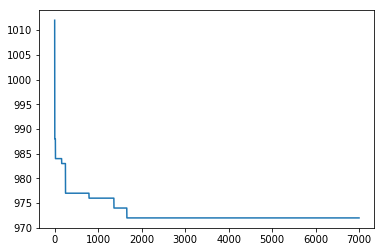

In [837]:
x = [i for i in range(1,7001)]
y = violated_amount
_=plt.plot(x,y)

In [839]:
list(yhat)

[-1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,

In [838]:
yhat

array([-1,  1, -1, ...,  1, -1,  1])

In [298]:
y.reshape(len(y),1)

array([[-1.],
       [ 1.],
       [-1.],
       ...,
       [ 1.],
       [-1.],
       [-1.]])

In [293]:
yhat - y.reshape(len(y),1)

array([[2.],
       [0.],
       [2.],
       ...,
       [0.],
       [2.],
       [2.]])

In [294]:
(yhat - y.reshape(len(y),1)) != 0

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [320]:
len(np.where(yhat!=y.reshape(len(y),1))[0])

1355

In [318]:
len(list(np.where(yhat.transpose()!=y)[1]))

1355

In [317]:
len(list(np.where(yhat!=y)[1]))

2710000

In [323]:
len(diff_idx)

1355

## Logistic Regression

[3 points] Implement Logistic Regression and run it on the points in the data file "classification.txt" ignoring the 4th column. That is, consider only the first 3 columns and the 5th column in each row. The first 3 columns are the coordinates of a point; and the 5th column is its classification label +1 or -1. Use the sigmoid function Ɵ(s) = es/(1+es). Run up to 7000 iterations. Report your results (weights and accuracy after the final iteration).

In [722]:
data = []
with open('classification.txt') as f:
    file = csv.reader(f)
    for line in file:
#         line.pop(-1)
        data.append(line)
data = np.array(data).astype('float64')
# data = data[:5]
data

array([[ 0.750072  ,  0.97740794,  0.88565752, -1.        ,  1.        ],
       [ 0.87791369,  0.01925101,  0.50671112,  1.        , -1.        ],
       [ 0.7773246 ,  0.99406596,  0.82224385, -1.        ,  1.        ],
       ...,
       [ 0.5155064 ,  0.15354364,  0.01275495,  1.        ,  1.        ],
       [ 0.2282263 ,  0.97155357,  0.18305906, -1.        ,  1.        ],
       [ 0.36391513,  0.49207061,  0.71952659, -1.        ,  1.        ]])

In [742]:
data_points = data[:,:3]
yi = data[:,4]
xi = np.concatenate((np.ones((len(data_points),1)), data_points), axis=1)

In [725]:
# def pocket_ALG(x, y_true, alpha, iteration_num):
#     w = np.zeros(len(x[0]))
#     w_diff_idx = find_all_diff(w, x, y)
#     violated_amount = []
#     for i in range(iteration_num):
#         violated_amount.append(len(w_diff_idx))
#         diff_idx = random.choice(w_diff_idx)
#         w2 = w + alpha*y[diff_idx]*x[diff_idx]
#         w2_diff_idx = find_all_diff(w2, x, y)
#         if len(w2_diff_idx) < len(w_diff_idx):
#             w = w2.copy()
#             w_diff_idx = w2_diff_idx.copy()
#     zi = x.dot(w)
#     yhat = sign(zi)
#     acc = accuracy_score(y_true, yhat)
#     return w, w_diff_idx, acc, violated_amount

In [764]:
import math
def sigmoid(s):
    z = np.exp(s)/(1+np.exp(s))
#     z = 1/(1+math.exp(-s))
    return z

In [756]:
def Ein(w):
    sum1=0
    for x,y in zip(xi,yi):
        sum1 += math.log10(1+math.exp(-y*x.dot(w)))
    return sum1/len(xi)

In [799]:
def gradient_Ein(w, xi, yi):
    sum2=0
    for x,y in zip(xi,yi):
#         print('###=',-y*x.dot(w))
        sum2 += y*x*(1/(1+np.exp(-y*x.dot(w))))
#         print(-sum2/len(xi))
    return -sum2/len(xi)

In [816]:
def Logistic_Reg(xi, yi, alpha, iteration_num):
    w = np.zeros(len(xi[0]))
    for i in range(iteration_num):
        print(i,'iteration: w=', w)
        w = w - alpha*gradient_Ein(w, xi, yi)
    s = xi.dot(w)
    theta = sigmoid(s)
    yhat = -1*(theta < 0.5) + 1*(theta >= 0.5)
    acc = accuracy_score(yi, yhat)
    return w, acc, yhat

In [819]:
data_points = data[:,:3]
yi = data[:,4]
xi = np.concatenate((np.ones((len(data_points),1)), data_points), axis=1)
w, acc, yhat = Logistic_Reg(xi, yi, 0.1, 7000)
w, acc, yhat

0 iteration: w= [0. 0. 0. 0.]
1 iteration: w= [-6.00000000e-04 -6.72483960e-04 -6.24364216e-05 -1.34576447e-04]
2 iteration: w= [-0.00122578 -0.00135915 -0.00013795 -0.00028218]
3 iteration: w= [-0.00187849 -0.00206058 -0.00022715 -0.00044341]
4 iteration: w= [-0.00255931 -0.00277742 -0.00033066 -0.00061889]
5 iteration: w= [-0.00326951 -0.00351031 -0.00044914 -0.00080926]
6 iteration: w= [-0.00401039 -0.00425993 -0.00058328 -0.00101519]
7 iteration: w= [-0.00478331 -0.00502698 -0.00073379 -0.00123741]
8 iteration: w= [-0.0055897  -0.00581222 -0.00090143 -0.00147664]
9 iteration: w= [-0.00643103 -0.00661642 -0.00108698 -0.00173365]
10 iteration: w= [-0.00730888 -0.00744038 -0.00129124 -0.00200926]
11 iteration: w= [-0.00822485 -0.00828495 -0.00151509 -0.0023043 ]
12 iteration: w= [-0.00918064 -0.00915101 -0.00175941 -0.00261966]
13 iteration: w= [-0.01017803 -0.01003948 -0.00202513 -0.00295625]
14 iteration: w= [-0.01121887 -0.01095133 -0.00231323 -0.00331502]
15 iteration: w= [-0.0123

126 iteration: w= [-1.98279522 -1.06307445 -0.99275991 -0.98857674]
127 iteration: w= [-2.03010561 -1.08715795 -1.01653989 -1.01211133]
128 iteration: w= [-2.07765153 -1.11134476 -1.04042583 -1.03575091]
129 iteration: w= [-2.12541724 -1.13562751 -1.06441016 -1.059488  ]
130 iteration: w= [-2.17338787 -1.15999926 -1.0884858  -1.08331558]
131 iteration: w= [-2.22154941 -1.18445352 -1.11264608 -1.10722707]
132 iteration: w= [-2.26988866 -1.2089842  -1.13688477 -1.13121632]
133 iteration: w= [-2.31839324 -1.23358561 -1.16119605 -1.15527755]
134 iteration: w= [-2.36705151 -1.25825247 -1.18557449 -1.1794054 ]
135 iteration: w= [-2.41585258 -1.28297982 -1.21001501 -1.20359485]
136 iteration: w= [-2.46478626 -1.30776308 -1.23451292 -1.22784123]
137 iteration: w= [-2.51384303 -1.33259796 -1.25906382 -1.25214022]
138 iteration: w= [-2.56301401 -1.3574805  -1.28366365 -1.27648778]
139 iteration: w= [-2.61229089 -1.38240703 -1.30830864 -1.30088017]
140 iteration: w= [-2.66166597 -1.40737412 -1.33

249 iteration: w= [-8.16174077 -4.17491972 -4.07121415 -4.03573129]
250 iteration: w= [-8.21234038 -4.20036089 -4.0963876  -4.06064953]
251 iteration: w= [-8.26294    -4.22580206 -4.12156106 -4.08556777]
252 iteration: w= [-8.31353966 -4.25124324 -4.14673453 -4.11048602]
253 iteration: w= [-8.36413933 -4.27668442 -4.171908   -4.13540428]
254 iteration: w= [-8.41473903 -4.30212561 -4.19708147 -4.16032254]
255 iteration: w= [-8.46533874 -4.32756681 -4.22225495 -4.18524081]
256 iteration: w= [-8.51593848 -4.35300801 -4.24742844 -4.21015908]
257 iteration: w= [-8.56653823 -4.37844921 -4.27260193 -4.23507735]
258 iteration: w= [-8.61713799 -4.40389042 -4.29777542 -4.25999563]
259 iteration: w= [-8.66773778 -4.42933163 -4.32294891 -4.28491391]
260 iteration: w= [-8.71833757 -4.45477284 -4.34812241 -4.3098322 ]
261 iteration: w= [-8.76893738 -4.48021406 -4.37329591 -4.33475048]
262 iteration: w= [-8.8195372  -4.50565528 -4.39846942 -4.35966877]
263 iteration: w= [-8.87013704 -4.5310965  -4.42

366 iteration: w= [-14.08193458  -7.15154552  -7.01651733  -6.95117444]
367 iteration: w= [-14.13253458  -7.17698678  -7.04169087  -6.97609277]
368 iteration: w= [-14.18313458  -7.20242804  -7.06686441  -7.0010111 ]
369 iteration: w= [-14.23373458  -7.2278693   -7.09203795  -7.02592943]
370 iteration: w= [-14.28433458  -7.25331055  -7.1172115   -7.05084776]
371 iteration: w= [-14.33493458  -7.27875181  -7.14238504  -7.07576609]
372 iteration: w= [-14.38553458  -7.30419307  -7.16755858  -7.10068442]
373 iteration: w= [-14.43613458  -7.32963433  -7.19273212  -7.12560274]
374 iteration: w= [-14.48673458  -7.35507558  -7.21790567  -7.15052107]
375 iteration: w= [-14.53733458  -7.38051684  -7.24307921  -7.1754394 ]
376 iteration: w= [-14.58793458  -7.4059581   -7.26825275  -7.20035773]
377 iteration: w= [-14.63853458  -7.43139936  -7.29342629  -7.22527606]
378 iteration: w= [-14.68913458  -7.45684061  -7.31859984  -7.25019439]
379 iteration: w= [-14.73973458  -7.48228187  -7.34377338  -7.27

486 iteration: w= [-20.15393458 -10.20449641 -10.03734243  -9.94137389]
487 iteration: w= [-20.20453458 -10.22993767 -10.06251597  -9.96629222]
488 iteration: w= [-20.25513458 -10.25537893 -10.08768952  -9.99121055]
489 iteration: w= [-20.30573458 -10.28082019 -10.11286306 -10.01612888]
490 iteration: w= [-20.35633458 -10.30626144 -10.1380366  -10.04104721]
491 iteration: w= [-20.40693458 -10.3317027  -10.16321015 -10.06596554]
492 iteration: w= [-20.45753458 -10.35714396 -10.18838369 -10.09088386]
493 iteration: w= [-20.50813458 -10.38258522 -10.21355723 -10.11580219]
494 iteration: w= [-20.55873458 -10.40802647 -10.23873077 -10.14072052]
495 iteration: w= [-20.60933458 -10.43346773 -10.26390432 -10.16563885]
496 iteration: w= [-20.65993458 -10.45890899 -10.28907786 -10.19055718]
497 iteration: w= [-20.71053458 -10.48435025 -10.3142514  -10.21547551]
498 iteration: w= [-20.76113458 -10.5097915  -10.33942494 -10.24039384]
499 iteration: w= [-20.81173458 -10.53523276 -10.36459849 -10.26

609 iteration: w= [-26.37773458 -13.33377108 -13.13368817 -13.00632833]
610 iteration: w= [-26.42833458 -13.35921233 -13.15886171 -13.03124666]
611 iteration: w= [-26.47893458 -13.38465359 -13.18403525 -13.05616498]
612 iteration: w= [-26.52953458 -13.41009485 -13.20920879 -13.08108331]
613 iteration: w= [-26.58013458 -13.43553611 -13.23438234 -13.10600164]
614 iteration: w= [-26.63073458 -13.46097736 -13.25955588 -13.13091997]
615 iteration: w= [-26.68133458 -13.48641862 -13.28472942 -13.1558383 ]
616 iteration: w= [-26.73193458 -13.51185988 -13.30990296 -13.18075663]
617 iteration: w= [-26.78253458 -13.53730114 -13.33507651 -13.20567496]
618 iteration: w= [-26.83313458 -13.56274239 -13.36025005 -13.23059328]
619 iteration: w= [-26.88373458 -13.58818365 -13.38542359 -13.25551161]
620 iteration: w= [-26.93433458 -13.61362491 -13.41059713 -13.28042994]
621 iteration: w= [-26.98493458 -13.63906617 -13.43577068 -13.30534827]
622 iteration: w= [-27.03553458 -13.66450742 -13.46094422 -13.33

731 iteration: w= [-32.55093458 -16.43760448 -16.20486036 -16.04636443]
732 iteration: w= [-32.60153458 -16.46304574 -16.2300339  -16.07128276]
733 iteration: w= [-32.65213458 -16.488487   -16.25520744 -16.09620109]
734 iteration: w= [-32.70273458 -16.51392825 -16.28038098 -16.12111942]
735 iteration: w= [-32.75333458 -16.53936951 -16.30555453 -16.14603775]
736 iteration: w= [-32.80393458 -16.56481077 -16.33072807 -16.17095608]
737 iteration: w= [-32.85453458 -16.59025203 -16.35590161 -16.1958744 ]
738 iteration: w= [-32.90513458 -16.61569328 -16.38107515 -16.22079273]
739 iteration: w= [-32.95573458 -16.64113454 -16.4062487  -16.24571106]
740 iteration: w= [-33.00633458 -16.6665758  -16.43142224 -16.27062939]
741 iteration: w= [-33.05693458 -16.69201706 -16.45659578 -16.29554772]
742 iteration: w= [-33.10753458 -16.71745831 -16.48176932 -16.32046605]
743 iteration: w= [-33.15813458 -16.74289957 -16.50694287 -16.34538438]
744 iteration: w= [-33.20873458 -16.76834083 -16.53211641 -16.37

850 iteration: w= [-38.57233458 -19.46511411 -19.20051192 -19.01164555]
851 iteration: w= [-38.62293458 -19.49055537 -19.22568546 -19.03656388]
852 iteration: w= [-38.67353458 -19.51599663 -19.25085901 -19.06148221]
853 iteration: w= [-38.72413458 -19.54143789 -19.27603255 -19.08640054]
854 iteration: w= [-38.77473458 -19.56687914 -19.30120609 -19.11131887]
855 iteration: w= [-38.82533458 -19.5923204  -19.32637963 -19.1362372 ]
856 iteration: w= [-38.87593458 -19.61776166 -19.35155318 -19.16115552]
857 iteration: w= [-38.92653458 -19.64320292 -19.37672672 -19.18607385]
858 iteration: w= [-38.97713458 -19.66864417 -19.40190026 -19.21099218]
859 iteration: w= [-39.02773458 -19.69408543 -19.4270738  -19.23591051]
860 iteration: w= [-39.07833458 -19.71952669 -19.45224735 -19.26082884]
861 iteration: w= [-39.12893458 -19.74496795 -19.47742089 -19.28574717]
862 iteration: w= [-39.17953458 -19.7704092  -19.50259443 -19.3106655 ]
863 iteration: w= [-39.23013458 -19.79585046 -19.52776797 -19.33

964 iteration: w= [-44.34073458 -22.36541746 -22.07029577 -21.85233503]
965 iteration: w= [-44.39133458 -22.39085872 -22.09546931 -21.87725336]
966 iteration: w= [-44.44193458 -22.41629998 -22.12064286 -21.90217169]
967 iteration: w= [-44.49253458 -22.44174123 -22.1458164  -21.92709001]
968 iteration: w= [-44.54313458 -22.46718249 -22.17098994 -21.95200834]
969 iteration: w= [-44.59373458 -22.49262375 -22.19616348 -21.97692667]
970 iteration: w= [-44.64433458 -22.51806501 -22.22133703 -22.001845  ]
971 iteration: w= [-44.69493458 -22.54350626 -22.24651057 -22.02676333]
972 iteration: w= [-44.74553458 -22.56894752 -22.27168411 -22.05168166]
973 iteration: w= [-44.79613458 -22.59438878 -22.29685765 -22.07659999]
974 iteration: w= [-44.84673458 -22.61983003 -22.3220312  -22.10151832]
975 iteration: w= [-44.89733458 -22.64527129 -22.34720474 -22.12643664]
976 iteration: w= [-44.94793458 -22.67071255 -22.37237828 -22.15135497]
977 iteration: w= [-44.99853458 -22.69615381 -22.39755182 -22.17

1079 iteration: w= [-50.15973458 -25.29116206 -24.96525316 -24.71794283]
1080 iteration: w= [-50.21033458 -25.31660332 -24.99042671 -24.74286116]
1081 iteration: w= [-50.26093458 -25.34204458 -25.01560025 -24.76777949]
1082 iteration: w= [-50.31153458 -25.36748584 -25.04077379 -24.79269782]
1083 iteration: w= [-50.36213458 -25.39292709 -25.06594733 -24.81761615]
1084 iteration: w= [-50.41273458 -25.41836835 -25.09112088 -24.84253448]
1085 iteration: w= [-50.46333458 -25.44380961 -25.11629442 -24.86745281]
1086 iteration: w= [-50.51393458 -25.46925087 -25.14146796 -24.89237113]
1087 iteration: w= [-50.56453458 -25.49469212 -25.1666415  -24.91728946]
1088 iteration: w= [-50.61513458 -25.52013338 -25.19181505 -24.94220779]
1089 iteration: w= [-50.66573458 -25.54557464 -25.21698859 -24.96712612]
1090 iteration: w= [-50.71633458 -25.5710159  -25.24216213 -24.99204445]
1091 iteration: w= [-50.76693458 -25.59645715 -25.26733567 -25.01696278]
1092 iteration: w= [-50.81753458 -25.62189841 -25.2

1196 iteration: w= [-56.07993458 -28.26778918 -27.91055764 -27.6333873 ]
1197 iteration: w= [-56.13053458 -28.29323044 -27.93573118 -27.65830562]
1198 iteration: w= [-56.18113458 -28.3186717  -27.96090473 -27.68322395]
1199 iteration: w= [-56.23173458 -28.34411295 -27.98607827 -27.70814228]
1200 iteration: w= [-56.28233458 -28.36955421 -28.01125181 -27.73306061]
1201 iteration: w= [-56.33293458 -28.39499547 -28.03642536 -27.75797894]
1202 iteration: w= [-56.38353458 -28.42043673 -28.0615989  -27.78289727]
1203 iteration: w= [-56.43413458 -28.44587798 -28.08677244 -27.8078156 ]
1204 iteration: w= [-56.48473458 -28.47131924 -28.11194598 -27.83273393]
1205 iteration: w= [-56.53533458 -28.4967605  -28.13711953 -27.85765225]
1206 iteration: w= [-56.58593458 -28.52220176 -28.16229307 -27.88257058]
1207 iteration: w= [-56.63653458 -28.54764301 -28.18746661 -27.90748891]
1208 iteration: w= [-56.68713458 -28.57308427 -28.21264015 -27.93240724]
1209 iteration: w= [-56.73773458 -28.59852553 -28.2

1309 iteration: w= [-61.79773458 -31.14265127 -30.75516795 -30.44915844]
1310 iteration: w= [-61.84833458 -31.16809253 -30.78034149 -30.47407677]
1311 iteration: w= [-61.89893458 -31.19353379 -30.80551504 -30.4989951 ]
1312 iteration: w= [-61.94953458 -31.21897504 -30.83068858 -30.52391343]
1313 iteration: w= [-62.00013458 -31.2444163  -30.85586212 -30.54883176]
1314 iteration: w= [-62.05073458 -31.26985756 -30.88103566 -30.57375009]
1315 iteration: w= [-62.10133458 -31.29529882 -30.90620921 -30.59866842]
1316 iteration: w= [-62.15193458 -31.32074007 -30.93138275 -30.62358674]
1317 iteration: w= [-62.20253458 -31.34618133 -30.95655629 -30.64850507]
1318 iteration: w= [-62.25313458 -31.37162259 -30.98172983 -30.6734234 ]
1319 iteration: w= [-62.30373458 -31.39706384 -31.00690338 -30.69834173]
1320 iteration: w= [-62.35433458 -31.4225051  -31.03207692 -30.72326006]
1321 iteration: w= [-62.40493458 -31.44794636 -31.05725046 -30.74817839]
1322 iteration: w= [-62.45553458 -31.47338762 -31.0

1430 iteration: w= [-67.92033458 -34.22104342 -33.8011666  -33.46427622]
1431 iteration: w= [-67.97093458 -34.24648468 -33.82634014 -33.48919455]
1432 iteration: w= [-68.02153458 -34.27192593 -33.85151368 -33.51411288]
1433 iteration: w= [-68.07213458 -34.29736719 -33.87668723 -33.53903121]
1434 iteration: w= [-68.12273458 -34.32280845 -33.90186077 -33.56394954]
1435 iteration: w= [-68.17333458 -34.34824971 -33.92703431 -33.58886786]
1436 iteration: w= [-68.22393458 -34.37369096 -33.95220785 -33.61378619]
1437 iteration: w= [-68.27453458 -34.39913222 -33.9773814  -33.63870452]
1438 iteration: w= [-68.32513458 -34.42457348 -34.00255494 -33.66362285]
1439 iteration: w= [-68.37573458 -34.45001474 -34.02772848 -33.68854118]
1440 iteration: w= [-68.42633458 -34.47545599 -34.05290202 -33.71345951]
1441 iteration: w= [-68.47693458 -34.50089725 -34.07807557 -33.73837784]
1442 iteration: w= [-68.52753458 -34.52633851 -34.10324911 -33.76329616]
1443 iteration: w= [-68.57813458 -34.55177976 -34.1

1545 iteration: w= [-73.73933458 -37.14678802 -36.69612399 -36.32988402]
1546 iteration: w= [-73.78993458 -37.17222928 -36.72129753 -36.35480235]
1547 iteration: w= [-73.84053458 -37.19767054 -36.74647108 -36.37972068]
1548 iteration: w= [-73.89113458 -37.22311179 -36.77164462 -36.40463901]
1549 iteration: w= [-73.94173458 -37.24855305 -36.79681816 -36.42955734]
1550 iteration: w= [-73.99233458 -37.27399431 -36.8219917  -36.45447567]
1551 iteration: w= [-74.04293458 -37.29943557 -36.84716525 -36.479394  ]
1552 iteration: w= [-74.09353458 -37.32487682 -36.87233879 -36.50431233]
1553 iteration: w= [-74.14413458 -37.35031808 -36.89751233 -36.52923065]
1554 iteration: w= [-74.19473458 -37.37575934 -36.92268587 -36.55414898]
1555 iteration: w= [-74.24533458 -37.4012006  -36.94785942 -36.57906731]
1556 iteration: w= [-74.29593458 -37.42664185 -36.97303296 -36.60398564]
1557 iteration: w= [-74.34653458 -37.45208311 -36.9982065  -36.62890397]
1558 iteration: w= [-74.39713458 -37.47752437 -37.0

1658 iteration: w= [-79.45713458 -40.02165011 -39.5407343  -39.14565517]
1659 iteration: w= [-79.50773458 -40.04709137 -39.56590784 -39.1705735 ]
1660 iteration: w= [-79.55833458 -40.07253262 -39.59108139 -39.19549183]
1661 iteration: w= [-79.60893458 -40.09797388 -39.61625493 -39.22041016]
1662 iteration: w= [-79.65953458 -40.12341514 -39.64142847 -39.24532849]
1663 iteration: w= [-79.71013458 -40.1488564  -39.66660201 -39.27024682]
1664 iteration: w= [-79.76073458 -40.17429765 -39.69177556 -39.29516514]
1665 iteration: w= [-79.81133458 -40.19973891 -39.7169491  -39.32008347]
1666 iteration: w= [-79.86193458 -40.22518017 -39.74212264 -39.3450018 ]
1667 iteration: w= [-79.91253458 -40.25062143 -39.76729618 -39.36992013]
1668 iteration: w= [-79.96313458 -40.27606268 -39.79246973 -39.39483846]
1669 iteration: w= [-80.01373458 -40.30150394 -39.81764327 -39.41975679]
1670 iteration: w= [-80.06433458 -40.3269452  -39.84281681 -39.44467512]
1671 iteration: w= [-80.11493458 -40.35238646 -39.8

1773 iteration: w= [-85.27613458 -42.94739471 -42.43569169 -42.01126298]
1774 iteration: w= [-85.32673458 -42.97283597 -42.46086524 -42.03618131]
1775 iteration: w= [-85.37733458 -42.99827723 -42.48603878 -42.06109963]
1776 iteration: w= [-85.42793458 -43.02371849 -42.51121232 -42.08601796]
1777 iteration: w= [-85.47853458 -43.04915974 -42.53638586 -42.11093629]
1778 iteration: w= [-85.52913458 -43.074601   -42.56155941 -42.13585462]
1779 iteration: w= [-85.57973458 -43.10004226 -42.58673295 -42.16077295]
1780 iteration: w= [-85.63033458 -43.12548352 -42.61190649 -42.18569128]
1781 iteration: w= [-85.68093458 -43.15092477 -42.63708003 -42.21060961]
1782 iteration: w= [-85.73153458 -43.17636603 -42.66225358 -42.23552794]
1783 iteration: w= [-85.78213458 -43.20180729 -42.68742712 -42.26044626]
1784 iteration: w= [-85.83273458 -43.22724855 -42.71260066 -42.28536459]
1785 iteration: w= [-85.88333458 -43.2526898  -42.7377742  -42.31028292]
1786 iteration: w= [-85.93393458 -43.27813106 -42.7

1886 iteration: w= [-90.99393458 -45.8222568  -45.280302   -44.82703412]
1887 iteration: w= [-91.04453458 -45.84769806 -45.30547554 -44.85195245]
1888 iteration: w= [-91.09513458 -45.87313932 -45.33064909 -44.87687078]
1889 iteration: w= [-91.14573458 -45.89858057 -45.35582263 -44.90178911]
1890 iteration: w= [-91.19633458 -45.92402183 -45.38099617 -44.92670744]
1891 iteration: w= [-91.24693458 -45.94946309 -45.40616971 -44.95162577]
1892 iteration: w= [-91.29753458 -45.97490435 -45.43134326 -44.9765441 ]
1893 iteration: w= [-91.34813458 -46.0003456  -45.4565168  -45.00146243]
1894 iteration: w= [-91.39873458 -46.02578686 -45.48169034 -45.02638075]
1895 iteration: w= [-91.44933458 -46.05122812 -45.50686388 -45.05129908]
1896 iteration: w= [-91.49993458 -46.07666938 -45.53203743 -45.07621741]
1897 iteration: w= [-91.55053458 -46.10211063 -45.55721097 -45.10113574]
1898 iteration: w= [-91.60113458 -46.12755189 -45.58238451 -45.12605407]
1899 iteration: w= [-91.65173458 -46.15299315 -45.6

1999 iteration: w= [-96.71173458 -48.69711889 -48.12491231 -47.64280527]
2000 iteration: w= [-96.76233458 -48.72256015 -48.15008585 -47.6677236 ]
2001 iteration: w= [-96.81293458 -48.74800141 -48.17525939 -47.69264193]
2002 iteration: w= [-96.86353458 -48.77344266 -48.20043294 -47.71756026]
2003 iteration: w= [-96.91413458 -48.79888392 -48.22560648 -47.74247859]
2004 iteration: w= [-96.96473458 -48.82432518 -48.25078002 -47.76739692]
2005 iteration: w= [-97.01533458 -48.84976643 -48.27595356 -47.79231524]
2006 iteration: w= [-97.06593458 -48.87520769 -48.30112711 -47.81723357]
2007 iteration: w= [-97.11653458 -48.90064895 -48.32630065 -47.8421519 ]
2008 iteration: w= [-97.16713458 -48.92609021 -48.35147419 -47.86707023]
2009 iteration: w= [-97.21773458 -48.95153146 -48.37664773 -47.89198856]
2010 iteration: w= [-97.26833458 -48.97697272 -48.40182128 -47.91690689]
2011 iteration: w= [-97.31893458 -49.00241398 -48.42699482 -47.94182522]
2012 iteration: w= [-97.36953458 -49.02785524 -48.4

2116 iteration: w= [-102.63193458  -51.67374601  -51.07021679  -50.55824973]
2117 iteration: w= [-102.68253458  -51.69918727  -51.09539033  -50.58316806]
2118 iteration: w= [-102.73313458  -51.72462852  -51.12056387  -50.60808639]
2119 iteration: w= [-102.78373458  -51.75006978  -51.14573742  -50.63300472]
2120 iteration: w= [-102.83433458  -51.77551104  -51.17091096  -50.65792305]
2121 iteration: w= [-102.88493458  -51.8009523   -51.1960845   -50.68284138]
2122 iteration: w= [-102.93553458  -51.82639355  -51.22125804  -50.70775971]
2123 iteration: w= [-102.98613458  -51.85183481  -51.24643159  -50.73267804]
2124 iteration: w= [-103.03673458  -51.87727607  -51.27160513  -50.75759636]
2125 iteration: w= [-103.08733458  -51.90271733  -51.29677867  -50.78251469]
2126 iteration: w= [-103.13793458  -51.92815858  -51.32195221  -50.80743302]
2127 iteration: w= [-103.18853458  -51.95359984  -51.34712576  -50.83235135]
2128 iteration: w= [-103.23913458  -51.9790411   -51.3722993   -50.85726968]

2223 iteration: w= [-108.04613458  -54.39596055  -53.76378584  -53.22451091]
2224 iteration: w= [-108.09673458  -54.42140181  -53.78895938  -53.24942924]
2225 iteration: w= [-108.14733458  -54.44684307  -53.81413293  -53.27434757]
2226 iteration: w= [-108.19793458  -54.47228432  -53.83930647  -53.2992659 ]
2227 iteration: w= [-108.24853458  -54.49772558  -53.86448001  -53.32418422]
2228 iteration: w= [-108.29913458  -54.52316684  -53.88965355  -53.34910255]
2229 iteration: w= [-108.34973458  -54.5486081   -53.9148271   -53.37402088]
2230 iteration: w= [-108.40033458  -54.57404935  -53.94000064  -53.39893921]
2231 iteration: w= [-108.45093458  -54.59949061  -53.96517418  -53.42385754]
2232 iteration: w= [-108.50153458  -54.62493187  -53.99034772  -53.44877587]
2233 iteration: w= [-108.55213458  -54.65037313  -54.01552127  -53.4736942 ]
2234 iteration: w= [-108.60273458  -54.67581438  -54.04069481  -53.49861253]
2235 iteration: w= [-108.65333458  -54.70125564  -54.06586835  -53.52353085]

2339 iteration: w= [-113.91573458  -57.34714641  -56.68391678  -56.11503704]
2340 iteration: w= [-113.96633458  -57.37258767  -56.70909032  -56.13995537]
2341 iteration: w= [-114.01693458  -57.39802893  -56.73426386  -56.1648737 ]
2342 iteration: w= [-114.06753458  -57.42347019  -56.7594374   -56.18979203]
2343 iteration: w= [-114.11813458  -57.44891144  -56.78461095  -56.21471036]
2344 iteration: w= [-114.16873458  -57.4743527   -56.80978449  -56.23962869]
2345 iteration: w= [-114.21933458  -57.49979396  -56.83495803  -56.26454702]
2346 iteration: w= [-114.26993458  -57.52523522  -56.86013157  -56.28946534]
2347 iteration: w= [-114.32053458  -57.55067647  -56.88530512  -56.31438367]
2348 iteration: w= [-114.37113458  -57.57611773  -56.91047866  -56.339302  ]
2349 iteration: w= [-114.42173458  -57.60155899  -56.9356522   -56.36422033]
2350 iteration: w= [-114.47233458  -57.62700024  -56.96082574  -56.38913866]
2351 iteration: w= [-114.52293458  -57.6524415   -56.98599929  -56.41405699]

2449 iteration: w= [-119.48173458  -60.14568473  -59.45300646  -58.8560532 ]
2450 iteration: w= [-119.53233458  -60.17112599  -59.47818     -58.88097153]
2451 iteration: w= [-119.58293458  -60.19656724  -59.50335354  -58.90588986]
2452 iteration: w= [-119.63353458  -60.2220085   -59.52852708  -58.93080819]
2453 iteration: w= [-119.68413458  -60.24744976  -59.55370063  -58.95572652]
2454 iteration: w= [-119.73473458  -60.27289102  -59.57887417  -58.98064485]
2455 iteration: w= [-119.78533458  -60.29833227  -59.60404771  -59.00556318]
2456 iteration: w= [-119.83593458  -60.32377353  -59.62922125  -59.03048151]
2457 iteration: w= [-119.88653458  -60.34921479  -59.6543948   -59.05539983]
2458 iteration: w= [-119.93713458  -60.37465605  -59.67956834  -59.08031816]
2459 iteration: w= [-119.98773458  -60.4000973   -59.70474188  -59.10523649]
2460 iteration: w= [-120.03833458  -60.42553856  -59.72991542  -59.13015482]
2461 iteration: w= [-120.08893458  -60.45097982  -59.75508897  -59.15507315]

2560 iteration: w= [-125.09833458  -62.9696643   -62.24726968  -61.62198769]
2561 iteration: w= [-125.14893458  -62.99510556  -62.27244322  -61.64690602]
2562 iteration: w= [-125.19953458  -63.02054682  -62.29761676  -61.67182435]
2563 iteration: w= [-125.25013458  -63.04598808  -62.32279031  -61.69674268]
2564 iteration: w= [-125.30073458  -63.07142933  -62.34796385  -61.72166101]
2565 iteration: w= [-125.35133458  -63.09687059  -62.37313739  -61.74657934]
2566 iteration: w= [-125.40193458  -63.12231185  -62.39831093  -61.77149767]
2567 iteration: w= [-125.45253458  -63.1477531   -62.42348448  -61.796416  ]
2568 iteration: w= [-125.50313458  -63.17319436  -62.44865802  -61.82133432]
2569 iteration: w= [-125.55373458  -63.19863562  -62.47383156  -61.84625265]
2570 iteration: w= [-125.60433458  -63.22407688  -62.4990051   -61.87117098]
2571 iteration: w= [-125.65493458  -63.24951813  -62.52417865  -61.89608931]
2572 iteration: w= [-125.70553458  -63.27495939  -62.54935219  -61.92100764]

2670 iteration: w= [-130.66433458  -65.76820262  -65.01635936  -64.36300386]
2671 iteration: w= [-130.71493458  -65.79364388  -65.0415329   -64.38792218]
2672 iteration: w= [-130.76553458  -65.81908513  -65.06670645  -64.41284051]
2673 iteration: w= [-130.81613458  -65.84452639  -65.09187999  -64.43775884]
2674 iteration: w= [-130.86673458  -65.86996765  -65.11705353  -64.46267717]
2675 iteration: w= [-130.91733458  -65.89540891  -65.14222707  -64.4875955 ]
2676 iteration: w= [-130.96793458  -65.92085016  -65.16740062  -64.51251383]
2677 iteration: w= [-131.01853458  -65.94629142  -65.19257416  -64.53743216]
2678 iteration: w= [-131.06913458  -65.97173268  -65.2177477   -64.56235048]
2679 iteration: w= [-131.11973458  -65.99717394  -65.24292124  -64.58726881]
2680 iteration: w= [-131.17033458  -66.02261519  -65.26809479  -64.61218714]
2681 iteration: w= [-131.22093458  -66.04805645  -65.29326833  -64.63710547]
2682 iteration: w= [-131.27153458  -66.07349771  -65.31844187  -64.6620238 ]

2782 iteration: w= [-136.33153458  -68.61762345  -67.83579613  -67.15385667]
2783 iteration: w= [-136.38213458  -68.64306471  -67.86096967  -67.178775  ]
2784 iteration: w= [-136.43273458  -68.66850597  -67.88614321  -67.20369333]
2785 iteration: w= [-136.48333458  -68.69394722  -67.91131675  -67.22861166]
2786 iteration: w= [-136.53393458  -68.71938848  -67.9364903   -67.25352999]
2787 iteration: w= [-136.58453458  -68.74482974  -67.96166384  -67.27844832]
2788 iteration: w= [-136.63513458  -68.77027099  -67.98683738  -67.30336665]
2789 iteration: w= [-136.68573458  -68.79571225  -68.01201092  -67.32828497]
2790 iteration: w= [-136.73633458  -68.82115351  -68.03718447  -67.3532033 ]
2791 iteration: w= [-136.78693458  -68.84659477  -68.06235801  -67.37812163]
2792 iteration: w= [-136.83753458  -68.87203602  -68.08753155  -67.40303996]
2793 iteration: w= [-136.88813458  -68.89747728  -68.11270509  -67.42795829]
2794 iteration: w= [-136.93873458  -68.92291854  -68.13787864  -67.45287662]

2890 iteration: w= [-141.79633458  -71.36527925  -70.55453872  -69.84503618]
2891 iteration: w= [-141.84693458  -71.39072051  -70.57971226  -69.86995451]
2892 iteration: w= [-141.89753458  -71.41616177  -70.60488581  -69.89487283]
2893 iteration: w= [-141.94813458  -71.44160302  -70.63005935  -69.91979116]
2894 iteration: w= [-141.99873458  -71.46704428  -70.65523289  -69.94470949]
2895 iteration: w= [-142.04933458  -71.49248554  -70.68040643  -69.96962782]
2896 iteration: w= [-142.09993458  -71.5179268   -70.70557998  -69.99454615]
2897 iteration: w= [-142.15053458  -71.54336805  -70.73075352  -70.01946448]
2898 iteration: w= [-142.20113458  -71.56880931  -70.75592706  -70.04438281]
2899 iteration: w= [-142.25173458  -71.59425057  -70.7811006   -70.06930114]
2900 iteration: w= [-142.30233458  -71.61969183  -70.80627415  -70.09421946]
2901 iteration: w= [-142.35293458  -71.64513308  -70.83144769  -70.11913779]
2902 iteration: w= [-142.40353458  -71.67057434  -70.85662123  -70.14405612]

3006 iteration: w= [-147.66593458  -74.31646511  -73.47466966  -72.73556231]
3007 iteration: w= [-147.71653458  -74.34190637  -73.4998432   -72.76048064]
3008 iteration: w= [-147.76713458  -74.36734763  -73.52501674  -72.78539897]
3009 iteration: w= [-147.81773458  -74.39278888  -73.55019028  -72.8103173 ]
3010 iteration: w= [-147.86833458  -74.41823014  -73.57536383  -72.83523563]
3011 iteration: w= [-147.91893458  -74.4436714   -73.60053737  -72.86015395]
3012 iteration: w= [-147.96953458  -74.46911266  -73.62571091  -72.88507228]
3013 iteration: w= [-148.02013458  -74.49455391  -73.65088445  -72.90999061]
3014 iteration: w= [-148.07073458  -74.51999517  -73.676058    -72.93490894]
3015 iteration: w= [-148.12133458  -74.54543643  -73.70123154  -72.95982727]
3016 iteration: w= [-148.17193458  -74.57087769  -73.72640508  -72.9847456 ]
3017 iteration: w= [-148.22253458  -74.59631894  -73.75157862  -73.00966393]
3018 iteration: w= [-148.27313458  -74.6217602   -73.77675217  -73.03458226]

3118 iteration: w= [-153.33313458  -77.16588594  -76.29410642  -75.52641513]
3119 iteration: w= [-153.38373458  -77.1913272   -76.31927996  -75.55133346]
3120 iteration: w= [-153.43433458  -77.21676846  -76.34445351  -75.57625179]
3121 iteration: w= [-153.48493458  -77.24220972  -76.36962705  -75.60117012]
3122 iteration: w= [-153.53553458  -77.26765097  -76.39480059  -75.62608844]
3123 iteration: w= [-153.58613458  -77.29309223  -76.41997413  -75.65100677]
3124 iteration: w= [-153.63673458  -77.31853349  -76.44514768  -75.6759251 ]
3125 iteration: w= [-153.68733458  -77.34397475  -76.47032122  -75.70084343]
3126 iteration: w= [-153.73793458  -77.369416    -76.49549476  -75.72576176]
3127 iteration: w= [-153.78853458  -77.39485726  -76.5206683   -75.75068009]
3128 iteration: w= [-153.83913458  -77.42029852  -76.54584185  -75.77559842]
3129 iteration: w= [-153.88973458  -77.44573977  -76.57101539  -75.80051675]
3130 iteration: w= [-153.94033458  -77.47118103  -76.59618893  -75.82543507]

3226 iteration: w= [-158.79793458  -79.91354174  -79.01284902  -78.21759463]
3227 iteration: w= [-158.84853458  -79.938983    -79.03802256  -78.24251296]
3228 iteration: w= [-158.89913458  -79.96442426  -79.0631961   -78.26743129]
3229 iteration: w= [-158.94973458  -79.98986552  -79.08836964  -78.29234962]
3230 iteration: w= [-159.00033458  -80.01530677  -79.11354319  -78.31726795]
3231 iteration: w= [-159.05093458  -80.04074803  -79.13871673  -78.34218628]
3232 iteration: w= [-159.10153458  -80.06618929  -79.16389027  -78.36710461]
3233 iteration: w= [-159.15213458  -80.09163055  -79.18906382  -78.39202293]
3234 iteration: w= [-159.20273458  -80.1170718   -79.21423736  -78.41694126]
3235 iteration: w= [-159.25333458  -80.14251306  -79.2394109   -78.44185959]
3236 iteration: w= [-159.30393458  -80.16795432  -79.26458444  -78.46677792]
3237 iteration: w= [-159.35453458  -80.19339558  -79.28975799  -78.49169625]
3238 iteration: w= [-159.40513458  -80.21883683  -79.31493153  -78.51661458]

3340 iteration: w= [-164.56633458  -82.81384509  -81.88263287  -81.05828411]
3341 iteration: w= [-164.61693458  -82.83928635  -81.90780641  -81.08320244]
3342 iteration: w= [-164.66753458  -82.86472761  -81.93297995  -81.10812077]
3343 iteration: w= [-164.71813458  -82.89016886  -81.9581535   -81.1330391 ]
3344 iteration: w= [-164.76873458  -82.91561012  -81.98332704  -81.15795742]
3345 iteration: w= [-164.81933458  -82.94105138  -82.00850058  -81.18287575]
3346 iteration: w= [-164.86993458  -82.96649264  -82.03367412  -81.20779408]
3347 iteration: w= [-164.92053458  -82.99193389  -82.05884767  -81.23271241]
3348 iteration: w= [-164.97113458  -83.01737515  -82.08402121  -81.25763074]
3349 iteration: w= [-165.02173458  -83.04281641  -82.10919475  -81.28254907]
3350 iteration: w= [-165.07233458  -83.06825766  -82.13436829  -81.3074674 ]
3351 iteration: w= [-165.12293458  -83.09369892  -82.15954184  -81.33238573]
3352 iteration: w= [-165.17353458  -83.11914018  -82.18471538  -81.35730405]

3449 iteration: w= [-170.08173458  -85.58694215  -84.62654901  -83.77438194]
3450 iteration: w= [-170.13233458  -85.61238341  -84.65172255  -83.79930027]
3451 iteration: w= [-170.18293458  -85.63782466  -84.67689609  -83.8242186 ]
3452 iteration: w= [-170.23353458  -85.66326592  -84.70206963  -83.84913693]
3453 iteration: w= [-170.28413458  -85.68870718  -84.72724318  -83.87405526]
3454 iteration: w= [-170.33473458  -85.71414844  -84.75241672  -83.89897359]
3455 iteration: w= [-170.38533458  -85.73958969  -84.77759026  -83.92389191]
3456 iteration: w= [-170.43593458  -85.76503095  -84.8027638   -83.94881024]
3457 iteration: w= [-170.48653458  -85.79047221  -84.82793735  -83.97372857]
3458 iteration: w= [-170.53713458  -85.81591347  -84.85311089  -83.9986469 ]
3459 iteration: w= [-170.58773458  -85.84135472  -84.87828443  -84.02356523]
3460 iteration: w= [-170.63833458  -85.86679598  -84.90345797  -84.04848356]
3461 iteration: w= [-170.68893458  -85.89223724  -84.92863152  -84.07340189]

3564 iteration: w= [-175.90073458  -88.51268675  -87.5215064   -86.63998975]
3565 iteration: w= [-175.95133458  -88.53812801  -87.54667994  -86.66490808]
3566 iteration: w= [-176.00193458  -88.56356927  -87.57185348  -86.6898264 ]
3567 iteration: w= [-176.05253458  -88.58901052  -87.59702703  -86.71474473]
3568 iteration: w= [-176.10313458  -88.61445178  -87.62220057  -86.73966306]
3569 iteration: w= [-176.15373458  -88.63989304  -87.64737411  -86.76458139]
3570 iteration: w= [-176.20433458  -88.6653343   -87.67254765  -86.78949972]
3571 iteration: w= [-176.25493458  -88.69077555  -87.6977212   -86.81441805]
3572 iteration: w= [-176.30553458  -88.71621681  -87.72289474  -86.83933638]
3573 iteration: w= [-176.35613458  -88.74165807  -87.74806828  -86.86425471]
3574 iteration: w= [-176.40673458  -88.76709933  -87.77324182  -86.88917303]
3575 iteration: w= [-176.45733458  -88.79254058  -87.79841537  -86.91409136]
3576 iteration: w= [-176.50793458  -88.81798184  -87.82358891  -86.93900969]

3678 iteration: w= [-181.66913458  -91.4129901   -90.39129025  -89.48067922]
3679 iteration: w= [-181.71973458  -91.43843136  -90.41646379  -89.50559755]
3680 iteration: w= [-181.77033458  -91.46387261  -90.44163733  -89.53051588]
3681 iteration: w= [-181.82093458  -91.48931387  -90.46681088  -89.55543421]
3682 iteration: w= [-181.87153458  -91.51475513  -90.49198442  -89.58035254]
3683 iteration: w= [-181.92213458  -91.54019639  -90.51715796  -89.60527087]
3684 iteration: w= [-181.97273458  -91.56563764  -90.5423315   -89.6301892 ]
3685 iteration: w= [-182.02333458  -91.5910789   -90.56750505  -89.65510752]
3686 iteration: w= [-182.07393458  -91.61652016  -90.59267859  -89.68002585]
3687 iteration: w= [-182.12453458  -91.64196142  -90.61785213  -89.70494418]
3688 iteration: w= [-182.17513458  -91.66740267  -90.64302568  -89.72986251]
3689 iteration: w= [-182.22573458  -91.69284393  -90.66819922  -89.75478084]
3690 iteration: w= [-182.27633458  -91.71828519  -90.69337276  -89.77969917]

3787 iteration: w= [-187.18453458  -94.18608716  -93.13520639  -92.19677706]
3788 iteration: w= [-187.23513458  -94.21152841  -93.16037993  -92.22169538]
3789 iteration: w= [-187.28573458  -94.23696967  -93.18555347  -92.24661371]
3790 iteration: w= [-187.33633458  -94.26241093  -93.21072702  -92.27153204]
3791 iteration: w= [-187.38693458  -94.28785219  -93.23590056  -92.29645037]
3792 iteration: w= [-187.43753458  -94.31329344  -93.2610741   -92.3213687 ]
3793 iteration: w= [-187.48813458  -94.3387347   -93.28624764  -92.34628703]
3794 iteration: w= [-187.53873458  -94.36417596  -93.31142119  -92.37120536]
3795 iteration: w= [-187.58933458  -94.38961722  -93.33659473  -92.39612369]
3796 iteration: w= [-187.63993458  -94.41505847  -93.36176827  -92.42104201]
3797 iteration: w= [-187.69053458  -94.44049973  -93.38694181  -92.44596034]
3798 iteration: w= [-187.74113458  -94.46594099  -93.41211536  -92.47087867]
3799 iteration: w= [-187.79173458  -94.49138225  -93.4372889   -92.495797  ]

3898 iteration: w= [-192.80113458  -97.01006673  -95.92946961  -94.96271155]
3899 iteration: w= [-192.85173458  -97.03550799  -95.95464315  -94.98762987]
3900 iteration: w= [-192.90233458  -97.06094925  -95.9798167   -95.0125482 ]
3901 iteration: w= [-192.95293458  -97.0863905   -96.00499024  -95.03746653]
3902 iteration: w= [-193.00353458  -97.11183176  -96.03016378  -95.06238486]
3903 iteration: w= [-193.05413458  -97.13727302  -96.05533732  -95.08730319]
3904 iteration: w= [-193.10473458  -97.16271428  -96.08051087  -95.11222152]
3905 iteration: w= [-193.15533458  -97.18815553  -96.10568441  -95.13713985]
3906 iteration: w= [-193.20593458  -97.21359679  -96.13085795  -95.16205818]
3907 iteration: w= [-193.25653458  -97.23903805  -96.15603149  -95.1869765 ]
3908 iteration: w= [-193.30713458  -97.26447931  -96.18120504  -95.21189483]
3909 iteration: w= [-193.35773458  -97.28992056  -96.20637858  -95.23681316]
3910 iteration: w= [-193.40833458  -97.31536182  -96.23155212  -95.26173149]

4007 iteration: w= [-198.31653458  -99.78316379  -98.67338575  -97.67880938]
4008 iteration: w= [-198.36713458  -99.80860505  -98.69855929  -97.70372771]
4009 iteration: w= [-198.41773458  -99.8340463   -98.72373283  -97.72864604]
4010 iteration: w= [-198.46833458  -99.85948756  -98.74890638  -97.75356436]
4011 iteration: w= [-198.51893458  -99.88492882  -98.77407992  -97.77848269]
4012 iteration: w= [-198.56953458  -99.91037008  -98.79925346  -97.80340102]
4013 iteration: w= [-198.62013458  -99.93581133  -98.824427    -97.82831935]
4014 iteration: w= [-198.67073458  -99.96125259  -98.84960055  -97.85323768]
4015 iteration: w= [-198.72133458  -99.98669385  -98.87477409  -97.87815601]
4016 iteration: w= [-198.77193458 -100.01213511  -98.89994763  -97.90307434]
4017 iteration: w= [-198.82253458 -100.03757636  -98.92512117  -97.92799267]
4018 iteration: w= [-198.87313458 -100.06301762  -98.95029472  -97.95291099]
4019 iteration: w= [-198.92373458 -100.08845888  -98.97546826  -97.97782932]

4114 iteration: w= [-203.73073458 -102.50537833 -101.3669548  -100.34507055]
4115 iteration: w= [-203.78133458 -102.53081959 -101.39212834 -100.36998888]
4116 iteration: w= [-203.83193458 -102.55626085 -101.41730189 -100.39490721]
4117 iteration: w= [-203.88253458 -102.58170211 -101.44247543 -100.41982554]
4118 iteration: w= [-203.93313458 -102.60714336 -101.46764897 -100.44474387]
4119 iteration: w= [-203.98373458 -102.63258462 -101.49282251 -100.4696622 ]
4120 iteration: w= [-204.03433458 -102.65802588 -101.51799606 -100.49458053]
4121 iteration: w= [-204.08493458 -102.68346714 -101.5431696  -100.51949885]
4122 iteration: w= [-204.13553458 -102.70890839 -101.56834314 -100.54441718]
4123 iteration: w= [-204.18613458 -102.73434965 -101.59351668 -100.56933551]
4124 iteration: w= [-204.23673458 -102.75979091 -101.61869023 -100.59425384]
4125 iteration: w= [-204.28733458 -102.78523217 -101.64386377 -100.61917217]
4126 iteration: w= [-204.33793458 -102.81067342 -101.66903731 -100.6440905 ]

4223 iteration: w= [-209.24613458 -105.27847539 -104.11087094 -103.06116839]
4224 iteration: w= [-209.29673458 -105.30391665 -104.13604448 -103.08608671]
4225 iteration: w= [-209.34733458 -105.32935791 -104.16121802 -103.11100504]
4226 iteration: w= [-209.39793458 -105.35479916 -104.18639157 -103.13592337]
4227 iteration: w= [-209.44853458 -105.38024042 -104.21156511 -103.1608417 ]
4228 iteration: w= [-209.49913458 -105.40568168 -104.23673865 -103.18576003]
4229 iteration: w= [-209.54973458 -105.43112294 -104.26191219 -103.21067836]
4230 iteration: w= [-209.60033458 -105.45656419 -104.28708574 -103.23559669]
4231 iteration: w= [-209.65093458 -105.48200545 -104.31225928 -103.26051501]
4232 iteration: w= [-209.70153458 -105.50744671 -104.33743282 -103.28543334]
4233 iteration: w= [-209.75213458 -105.53288797 -104.36260636 -103.31035167]
4234 iteration: w= [-209.80273458 -105.55832922 -104.38777991 -103.33527   ]
4235 iteration: w= [-209.85333458 -105.58377048 -104.41295345 -103.36018833]

4332 iteration: w= [-214.76153458 -108.05157245 -106.85478708 -105.77726622]
4333 iteration: w= [-214.81213458 -108.07701371 -106.87996062 -105.80218455]
4334 iteration: w= [-214.86273458 -108.10245497 -106.90513416 -105.82710287]
4335 iteration: w= [-214.91333458 -108.12789622 -106.9303077  -105.8520212 ]
4336 iteration: w= [-214.96393458 -108.15333748 -106.95548125 -105.87693953]
4337 iteration: w= [-215.01453458 -108.17877874 -106.98065479 -105.90185786]
4338 iteration: w= [-215.06513458 -108.20422    -107.00582833 -105.92677619]
4339 iteration: w= [-215.11573458 -108.22966125 -107.03100187 -105.95169452]
4340 iteration: w= [-215.16633458 -108.25510251 -107.05617542 -105.97661285]
4341 iteration: w= [-215.21693458 -108.28054377 -107.08134896 -106.00153118]
4342 iteration: w= [-215.26753458 -108.30598503 -107.1065225  -106.0264495 ]
4343 iteration: w= [-215.31813458 -108.33142628 -107.13169604 -106.05136783]
4344 iteration: w= [-215.36873458 -108.35686754 -107.15686959 -106.07628616]

4444 iteration: w= [-220.42873458 -110.90099328 -109.67422384 -108.56811904]
4445 iteration: w= [-220.47933458 -110.92643454 -109.69939738 -108.59303736]
4446 iteration: w= [-220.52993458 -110.9518758  -109.72457093 -108.61795569]
4447 iteration: w= [-220.58053458 -110.97731705 -109.74974447 -108.64287402]
4448 iteration: w= [-220.63113458 -111.00275831 -109.77491801 -108.66779235]
4449 iteration: w= [-220.68173458 -111.02819957 -109.80009156 -108.69271068]
4450 iteration: w= [-220.73233458 -111.05364083 -109.8252651  -108.71762901]
4451 iteration: w= [-220.78293458 -111.07908208 -109.85043864 -108.74254734]
4452 iteration: w= [-220.83353458 -111.10452334 -109.87561218 -108.76746567]
4453 iteration: w= [-220.88413458 -111.1299646  -109.90078573 -108.79238399]
4454 iteration: w= [-220.93473458 -111.15540586 -109.92595927 -108.81730232]
4455 iteration: w= [-220.98533458 -111.18084711 -109.95113281 -108.84222065]
4456 iteration: w= [-221.03593458 -111.20628837 -109.97630635 -108.86713898]

4553 iteration: w= [-225.94413458 -113.67409034 -112.41813998 -111.28421687]
4554 iteration: w= [-225.99473458 -113.6995316  -112.44331352 -111.3091352 ]
4555 iteration: w= [-226.04533458 -113.72497286 -112.46848707 -111.33405353]
4556 iteration: w= [-226.09593458 -113.75041411 -112.49366061 -111.35897185]
4557 iteration: w= [-226.14653458 -113.77585537 -112.51883415 -111.38389018]
4558 iteration: w= [-226.19713458 -113.80129663 -112.54400769 -111.40880851]
4559 iteration: w= [-226.24773458 -113.82673789 -112.56918124 -111.43372684]
4560 iteration: w= [-226.29833458 -113.85217914 -112.59435478 -111.45864517]
4561 iteration: w= [-226.34893458 -113.8776204  -112.61952832 -111.4835635 ]
4562 iteration: w= [-226.39953458 -113.90306166 -112.64470186 -111.50848183]
4563 iteration: w= [-226.45013458 -113.92850292 -112.66987541 -111.53340016]
4564 iteration: w= [-226.50073458 -113.95394417 -112.69504895 -111.55831848]
4565 iteration: w= [-226.55133458 -113.97938543 -112.72022249 -111.58323681]

4665 iteration: w= [-231.61133458 -116.52351117 -115.23757675 -114.07506969]
4666 iteration: w= [-231.66193458 -116.54895243 -115.26275029 -114.09998802]
4667 iteration: w= [-231.71253458 -116.57439369 -115.28792383 -114.12490634]
4668 iteration: w= [-231.76313458 -116.59983494 -115.31309737 -114.14982467]
4669 iteration: w= [-231.81373458 -116.6252762  -115.33827092 -114.174743  ]
4670 iteration: w= [-231.86433458 -116.65071746 -115.36344446 -114.19966133]
4671 iteration: w= [-231.91493458 -116.67615872 -115.388618   -114.22457966]
4672 iteration: w= [-231.96553458 -116.70159997 -115.41379154 -114.24949799]
4673 iteration: w= [-232.01613458 -116.72704123 -115.43896509 -114.27441632]
4674 iteration: w= [-232.06673458 -116.75248249 -115.46413863 -114.29933465]
4675 iteration: w= [-232.11733458 -116.77792375 -115.48931217 -114.32425297]
4676 iteration: w= [-232.16793458 -116.803365   -115.51448571 -114.3491713 ]
4677 iteration: w= [-232.21853458 -116.82880626 -115.53965926 -114.37408963]

4773 iteration: w= [-237.07613458 -119.27116697 -117.95631934 -116.76624919]
4774 iteration: w= [-237.12673458 -119.29660823 -117.98149288 -116.79116752]
4775 iteration: w= [-237.17733458 -119.32204949 -118.00666643 -116.81608585]
4776 iteration: w= [-237.22793458 -119.34749075 -118.03183997 -116.84100418]
4777 iteration: w= [-237.27853458 -119.372932   -118.05701351 -116.86592251]
4778 iteration: w= [-237.32913458 -119.39837326 -118.08218705 -116.89084083]
4779 iteration: w= [-237.37973458 -119.42381452 -118.1073606  -116.91575916]
4780 iteration: w= [-237.43033458 -119.44925578 -118.13253414 -116.94067749]
4781 iteration: w= [-237.48093458 -119.47469703 -118.15770768 -116.96559582]
4782 iteration: w= [-237.53153458 -119.50013829 -118.18288122 -116.99051415]
4783 iteration: w= [-237.58213458 -119.52557955 -118.20805477 -117.01543248]
4784 iteration: w= [-237.63273458 -119.5510208  -118.23322831 -117.04035081]
4785 iteration: w= [-237.68333458 -119.57646206 -118.25840185 -117.06526914]

4882 iteration: w= [-242.59153458 -122.04426403 -120.70023548 -119.48234702]
4883 iteration: w= [-242.64213458 -122.06970529 -120.72540902 -119.50726535]
4884 iteration: w= [-242.69273458 -122.09514655 -120.75058256 -119.53218368]
4885 iteration: w= [-242.74333458 -122.1205878  -120.77575611 -119.55710201]
4886 iteration: w= [-242.79393458 -122.14602906 -120.80092965 -119.58202034]
4887 iteration: w= [-242.84453458 -122.17147032 -120.82610319 -119.60693867]
4888 iteration: w= [-242.89513458 -122.19691158 -120.85127673 -119.631857  ]
4889 iteration: w= [-242.94573458 -122.22235283 -120.87645028 -119.65677532]
4890 iteration: w= [-242.99633458 -122.24779409 -120.90162382 -119.68169365]
4891 iteration: w= [-243.04693458 -122.27323535 -120.92679736 -119.70661198]
4892 iteration: w= [-243.09753458 -122.29867661 -120.9519709  -119.73153031]
4893 iteration: w= [-243.14813458 -122.32411786 -120.97714445 -119.75644864]
4894 iteration: w= [-243.19873458 -122.34955912 -121.00231799 -119.78136697]

4995 iteration: w= [-248.30933458 -124.91912612 -123.54484579 -122.29811817]
4996 iteration: w= [-248.35993458 -124.94456738 -123.57001933 -122.3230365 ]
4997 iteration: w= [-248.41053458 -124.97000864 -123.59519287 -122.34795483]
4998 iteration: w= [-248.46113458 -124.99544989 -123.62036641 -122.37287316]
4999 iteration: w= [-248.51173458 -125.02089115 -123.64553996 -122.39779149]
5000 iteration: w= [-248.56233458 -125.04633241 -123.6707135  -122.42270981]
5001 iteration: w= [-248.61293458 -125.07177367 -123.69588704 -122.44762814]
5002 iteration: w= [-248.66353458 -125.09721492 -123.72106058 -122.47254647]
5003 iteration: w= [-248.71413458 -125.12265618 -123.74623413 -122.4974648 ]
5004 iteration: w= [-248.76473458 -125.14809744 -123.77140767 -122.52238313]
5005 iteration: w= [-248.81533458 -125.17353869 -123.79658121 -122.54730146]
5006 iteration: w= [-248.86593458 -125.19897995 -123.82175475 -122.57221979]
5007 iteration: w= [-248.91653458 -125.22442121 -123.8469283  -122.59713812]

5103 iteration: w= [-253.77413458 -127.66678192 -126.26358838 -124.98929767]
5104 iteration: w= [-253.82473458 -127.69222318 -126.28876192 -125.014216  ]
5105 iteration: w= [-253.87533458 -127.71766444 -126.31393547 -125.03913433]
5106 iteration: w= [-253.92593458 -127.74310569 -126.33910901 -125.06405266]
5107 iteration: w= [-253.97653458 -127.76854695 -126.36428255 -125.08897099]
5108 iteration: w= [-254.02713458 -127.79398821 -126.3894561  -125.11388932]
5109 iteration: w= [-254.07773458 -127.81942947 -126.41462964 -125.13880765]
5110 iteration: w= [-254.12833458 -127.84487072 -126.43980318 -125.16372598]
5111 iteration: w= [-254.17893458 -127.87031198 -126.46497672 -125.1886443 ]
5112 iteration: w= [-254.22953458 -127.89575324 -126.49015027 -125.21356263]
5113 iteration: w= [-254.28013458 -127.9211945  -126.51532381 -125.23848096]
5114 iteration: w= [-254.33073458 -127.94663575 -126.54049735 -125.26339929]
5115 iteration: w= [-254.38133458 -127.97207701 -126.56567089 -125.28831762]

5212 iteration: w= [-259.28953458 -130.43987898 -129.00750452 -127.70539551]
5213 iteration: w= [-259.34013458 -130.46532024 -129.03267806 -127.73031384]
5214 iteration: w= [-259.39073458 -130.4907615  -129.05785161 -127.75523216]
5215 iteration: w= [-259.44133458 -130.51620275 -129.08302515 -127.78015049]
5216 iteration: w= [-259.49193458 -130.54164401 -129.10819869 -127.80506882]
5217 iteration: w= [-259.54253458 -130.56708527 -129.13337223 -127.82998715]
5218 iteration: w= [-259.59313458 -130.59252653 -129.15854578 -127.85490548]
5219 iteration: w= [-259.64373458 -130.61796778 -129.18371932 -127.87982381]
5220 iteration: w= [-259.69433458 -130.64340904 -129.20889286 -127.90474214]
5221 iteration: w= [-259.74493458 -130.6688503  -129.2340664  -127.92966047]
5222 iteration: w= [-259.79553458 -130.69429155 -129.25923995 -127.95457879]
5223 iteration: w= [-259.84613458 -130.71973281 -129.28441349 -127.97949712]
5224 iteration: w= [-259.89673458 -130.74517407 -129.30958703 -128.00441545]

5321 iteration: w= [-264.80493458 -133.21297604 -131.75142066 -130.42149334]
5322 iteration: w= [-264.85553458 -133.2384173  -131.7765942  -130.44641167]
5323 iteration: w= [-264.90613458 -133.26385855 -131.80176774 -130.47133   ]
5324 iteration: w= [-264.95673458 -133.28929981 -131.82694129 -130.49624833]
5325 iteration: w= [-265.00733458 -133.31474107 -131.85211483 -130.52116665]
5326 iteration: w= [-265.05793458 -133.34018233 -131.87728837 -130.54608498]
5327 iteration: w= [-265.10853458 -133.36562358 -131.90246191 -130.57100331]
5328 iteration: w= [-265.15913458 -133.39106484 -131.92763546 -130.59592164]
5329 iteration: w= [-265.20973458 -133.4165061  -131.952809   -130.62083997]
5330 iteration: w= [-265.26033458 -133.44194736 -131.97798254 -130.6457583 ]
5331 iteration: w= [-265.31093458 -133.46738861 -132.00315608 -130.67067663]
5332 iteration: w= [-265.36153458 -133.49282987 -132.02832963 -130.69559496]
5333 iteration: w= [-265.41213458 -133.51827113 -132.05350317 -130.72051328]

5433 iteration: w= [-270.47213458 -136.06239687 -134.57085742 -133.21234616]
5434 iteration: w= [-270.52273458 -136.08783813 -134.59603097 -133.23726449]
5435 iteration: w= [-270.57333458 -136.11327939 -134.62120451 -133.26218282]
5436 iteration: w= [-270.62393458 -136.13872064 -134.64637805 -133.28710114]
5437 iteration: w= [-270.67453458 -136.1641619  -134.67155159 -133.31201947]
5438 iteration: w= [-270.72513458 -136.18960316 -134.69672514 -133.3369378 ]
5439 iteration: w= [-270.77573458 -136.21504442 -134.72189868 -133.36185613]
5440 iteration: w= [-270.82633458 -136.24048567 -134.74707222 -133.38677446]
5441 iteration: w= [-270.87693458 -136.26592693 -134.77224576 -133.41169279]
5442 iteration: w= [-270.92753458 -136.29136819 -134.79741931 -133.43661112]
5443 iteration: w= [-270.97813458 -136.31680944 -134.82259285 -133.46152945]
5444 iteration: w= [-271.02873458 -136.3422507  -134.84776639 -133.48644777]
5445 iteration: w= [-271.07933458 -136.36769196 -134.87293993 -133.5113661 ]

5544 iteration: w= [-276.08873458 -138.88637644 -137.36512065 -135.97828065]
5545 iteration: w= [-276.13933458 -138.9118177  -137.39029419 -136.00319898]
5546 iteration: w= [-276.18993458 -138.93725896 -137.41546773 -136.02811731]
5547 iteration: w= [-276.24053458 -138.96270022 -137.44064127 -136.05303563]
5548 iteration: w= [-276.29113458 -138.98814147 -137.46581482 -136.07795396]
5549 iteration: w= [-276.34173458 -139.01358273 -137.49098836 -136.10287229]
5550 iteration: w= [-276.39233458 -139.03902399 -137.5161619  -136.12779062]
5551 iteration: w= [-276.44293458 -139.06446525 -137.54133544 -136.15270895]
5552 iteration: w= [-276.49353458 -139.0899065  -137.56650899 -136.17762728]
5553 iteration: w= [-276.54413458 -139.11534776 -137.59168253 -136.20254561]
5554 iteration: w= [-276.59473458 -139.14078902 -137.61685607 -136.22746394]
5555 iteration: w= [-276.64533458 -139.16623028 -137.64202961 -136.25238226]
5556 iteration: w= [-276.69593458 -139.19167153 -137.66720316 -136.27730059]

5653 iteration: w= [-281.60413458 -141.6594735  -140.10903678 -138.69437848]
5654 iteration: w= [-281.65473458 -141.68491476 -140.13421033 -138.71929681]
5655 iteration: w= [-281.70533458 -141.71035602 -140.15938387 -138.74421514]
5656 iteration: w= [-281.75593458 -141.73579728 -140.18455741 -138.76913347]
5657 iteration: w= [-281.80653458 -141.76123853 -140.20973095 -138.7940518 ]
5658 iteration: w= [-281.85713458 -141.78667979 -140.2349045  -138.81897012]
5659 iteration: w= [-281.90773458 -141.81212105 -140.26007804 -138.84388845]
5660 iteration: w= [-281.95833458 -141.8375623  -140.28525158 -138.86880678]
5661 iteration: w= [-282.00893458 -141.86300356 -140.31042512 -138.89372511]
5662 iteration: w= [-282.05953458 -141.88844482 -140.33559867 -138.91864344]
5663 iteration: w= [-282.11013458 -141.91388608 -140.36077221 -138.94356177]
5664 iteration: w= [-282.16073458 -141.93932733 -140.38594575 -138.9684801 ]
5665 iteration: w= [-282.21133458 -141.96476859 -140.41111929 -138.99339843]

5760 iteration: w= [-287.01833458 -144.38168805 -142.80260584 -141.36063966]
5761 iteration: w= [-287.06893458 -144.4071293  -142.82777938 -141.38555798]
5762 iteration: w= [-287.11953458 -144.43257056 -142.85295292 -141.41047631]
5763 iteration: w= [-287.17013458 -144.45801182 -142.87812646 -141.43539464]
5764 iteration: w= [-287.22073458 -144.48345308 -142.90330001 -141.46031297]
5765 iteration: w= [-287.27133458 -144.50889433 -142.92847355 -141.4852313 ]
5766 iteration: w= [-287.32193458 -144.53433559 -142.95364709 -141.51014963]
5767 iteration: w= [-287.37253458 -144.55977685 -142.97882063 -141.53506796]
5768 iteration: w= [-287.42313458 -144.58521811 -143.00399418 -141.55998629]
5769 iteration: w= [-287.47373458 -144.61065936 -143.02916772 -141.58490461]
5770 iteration: w= [-287.52433458 -144.63610062 -143.05434126 -141.60982294]
5771 iteration: w= [-287.57493458 -144.66154188 -143.07951481 -141.63474127]
5772 iteration: w= [-287.62553458 -144.68698314 -143.10468835 -141.6596596 ]

5872 iteration: w= [-292.68553458 -147.23110888 -145.6220426  -144.15149247]
5873 iteration: w= [-292.73613458 -147.25655014 -145.64721615 -144.1764108 ]
5874 iteration: w= [-292.78673458 -147.28199139 -145.67238969 -144.20132913]
5875 iteration: w= [-292.83733458 -147.30743265 -145.69756323 -144.22624746]
5876 iteration: w= [-292.88793458 -147.33287391 -145.72273677 -144.25116579]
5877 iteration: w= [-292.93853458 -147.35831517 -145.74791032 -144.27608412]
5878 iteration: w= [-292.98913458 -147.38375642 -145.77308386 -144.30100245]
5879 iteration: w= [-293.03973458 -147.40919768 -145.7982574  -144.32592078]
5880 iteration: w= [-293.09033458 -147.43463894 -145.82343094 -144.3508391 ]
5881 iteration: w= [-293.14093458 -147.46008019 -145.84860449 -144.37575743]
5882 iteration: w= [-293.19153458 -147.48552145 -145.87377803 -144.40067576]
5883 iteration: w= [-293.24213458 -147.51096271 -145.89895157 -144.42559409]
5884 iteration: w= [-293.29273458 -147.53640397 -145.92412511 -144.45051242]

5983 iteration: w= [-298.30213458 -150.05508845 -148.41630583 -146.91742696]
5984 iteration: w= [-298.35273458 -150.08052971 -148.44147937 -146.94234529]
5985 iteration: w= [-298.40333458 -150.10597097 -148.46665291 -146.96726362]
5986 iteration: w= [-298.45393458 -150.13141222 -148.49182645 -146.99218195]
5987 iteration: w= [-298.50453458 -150.15685348 -148.517      -147.01710028]
5988 iteration: w= [-298.55513458 -150.18229474 -148.54217354 -147.04201861]
5989 iteration: w= [-298.60573458 -150.207736   -148.56734708 -147.06693694]
5990 iteration: w= [-298.65633458 -150.23317725 -148.59252062 -147.09185526]
5991 iteration: w= [-298.70693458 -150.25861851 -148.61769417 -147.11677359]
5992 iteration: w= [-298.75753458 -150.28405977 -148.64286771 -147.14169192]
5993 iteration: w= [-298.80813458 -150.30950103 -148.66804125 -147.16661025]
5994 iteration: w= [-298.85873458 -150.33494228 -148.69321479 -147.19152858]
5995 iteration: w= [-298.90933458 -150.36038354 -148.71838834 -147.21644691]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


 iteration: w= [-300.88273458 -151.35259258 -149.7001565  -148.18826173]
6035 iteration: w= [-300.93333458 -151.37803384 -149.72533004 -148.21318006]
6036 iteration: w= [-300.98393458 -151.40347509 -149.75050358 -148.23809839]
6037 iteration: w= [-301.03453458 -151.42891635 -149.77567712 -148.26301672]
6038 iteration: w= [-301.08513458 -151.45435761 -149.80085067 -148.28793504]
6039 iteration: w= [-301.13573458 -151.47979887 -149.82602421 -148.31285337]
6040 iteration: w= [-301.18633458 -151.50524012 -149.85119775 -148.3377717 ]
6041 iteration: w= [-301.23693458 -151.53068138 -149.87637129 -148.36269003]
6042 iteration: w= [-301.28753458 -151.55612264 -149.90154484 -148.38760836]
6043 iteration: w= [-301.33813458 -151.5815639  -149.92671838 -148.41252669]
6044 iteration: w= [-301.38873458 -151.60700515 -149.95189192 -148.43744502]
6045 iteration: w= [-301.43933458 -151.63244641 -149.97706546 -148.46236335]
6046 iteration: w= [-301.48993458 -151.65788767 -150.00223901 -148.48728167]
604

6147 iteration: w= [-306.60053458 -154.22745467 -152.5447668  -151.00403288]
6148 iteration: w= [-306.65113458 -154.25289593 -152.56994035 -151.02895121]
6149 iteration: w= [-306.70173458 -154.27833718 -152.59511389 -151.05386953]
6150 iteration: w= [-306.75233458 -154.30377844 -152.62028743 -151.07878786]
6151 iteration: w= [-306.80293458 -154.3292197  -152.64546097 -151.10370619]
6152 iteration: w= [-306.85353458 -154.35466096 -152.67063452 -151.12862452]
6153 iteration: w= [-306.90413458 -154.38010221 -152.69580806 -151.15354285]
6154 iteration: w= [-306.95473458 -154.40554347 -152.7209816  -151.17846118]
6155 iteration: w= [-307.00533458 -154.43098473 -152.74615514 -151.20337951]
6156 iteration: w= [-307.05593458 -154.45642599 -152.77132869 -151.22829784]
6157 iteration: w= [-307.10653458 -154.48186724 -152.79650223 -151.25321616]
6158 iteration: w= [-307.15713458 -154.5073085  -152.82167577 -151.27813449]
6159 iteration: w= [-307.20773458 -154.53274976 -152.84684931 -151.30305282]

6254 iteration: w= [-312.01473458 -156.94966921 -155.23833586 -153.67029405]
6255 iteration: w= [-312.06533458 -156.97511047 -155.2635094  -153.69521238]
6256 iteration: w= [-312.11593458 -157.00055173 -155.28868294 -153.72013071]
6257 iteration: w= [-312.16653458 -157.02599298 -155.31385648 -153.74504904]
6258 iteration: w= [-312.21713458 -157.05143424 -155.33903003 -153.76996737]
6259 iteration: w= [-312.26773458 -157.0768755  -155.36420357 -153.7948857 ]
6260 iteration: w= [-312.31833458 -157.10231676 -155.38937711 -153.81980402]
6261 iteration: w= [-312.36893458 -157.12775801 -155.41455065 -153.84472235]
6262 iteration: w= [-312.41953458 -157.15319927 -155.4397242  -153.86964068]
6263 iteration: w= [-312.47013458 -157.17864053 -155.46489774 -153.89455901]
6264 iteration: w= [-312.52073458 -157.20408179 -155.49007128 -153.91947734]
6265 iteration: w= [-312.57133458 -157.22952304 -155.51524482 -153.94439567]
6266 iteration: w= [-312.62193458 -157.2549643  -155.54041837 -153.969314  ]

6367 iteration: w= [-317.73253458 -159.8245313  -158.08294616 -156.4860652 ]
6368 iteration: w= [-317.78313458 -159.84997256 -158.10811971 -156.51098353]
6369 iteration: w= [-317.83373458 -159.87541382 -158.13329325 -156.53590186]
6370 iteration: w= [-317.88433458 -159.90085507 -158.15846679 -156.56082019]
6371 iteration: w= [-317.93493458 -159.92629633 -158.18364033 -156.58573851]
6372 iteration: w= [-317.98553458 -159.95173759 -158.20881388 -156.61065684]
6373 iteration: w= [-318.03613458 -159.97717885 -158.23398742 -156.63557517]
6374 iteration: w= [-318.08673458 -160.0026201  -158.25916096 -156.6604935 ]
6375 iteration: w= [-318.13733458 -160.02806136 -158.2843345  -156.68541183]
6376 iteration: w= [-318.18793458 -160.05350262 -158.30950805 -156.71033016]
6377 iteration: w= [-318.23853458 -160.07894388 -158.33468159 -156.73524849]
6378 iteration: w= [-318.28913458 -160.10438513 -158.35985513 -156.76016682]
6379 iteration: w= [-318.33973458 -160.12982639 -158.38502868 -156.78508514]

6475 iteration: w= [-323.19733458 -162.5721871  -160.80168876 -159.1772447 ]
6476 iteration: w= [-323.24793458 -162.59762836 -160.8268623  -159.20216303]
6477 iteration: w= [-323.29853458 -162.62306962 -160.85203584 -159.22708136]
6478 iteration: w= [-323.34913458 -162.64851087 -160.87720939 -159.25199969]
6479 iteration: w= [-323.39973458 -162.67395213 -160.90238293 -159.27691802]
6480 iteration: w= [-323.45033458 -162.69939339 -160.92755647 -159.30183635]
6481 iteration: w= [-323.50093458 -162.72483465 -160.95273002 -159.32675468]
6482 iteration: w= [-323.55153458 -162.7502759  -160.97790356 -159.351673  ]
6483 iteration: w= [-323.60213458 -162.77571716 -161.0030771  -159.37659133]
6484 iteration: w= [-323.65273458 -162.80115842 -161.02825064 -159.40150966]
6485 iteration: w= [-323.70333458 -162.82659968 -161.05342419 -159.42642799]
6486 iteration: w= [-323.75393458 -162.85204093 -161.07859773 -159.45134632]
6487 iteration: w= [-323.80453458 -162.87748219 -161.10377127 -159.47626465]

6591 iteration: w= [-329.06693458 -165.52337296 -163.7218197  -162.06777084]
6592 iteration: w= [-329.11753458 -165.54881422 -163.74699324 -162.09268917]
6593 iteration: w= [-329.16813458 -165.57425548 -163.77216678 -162.11760749]
6594 iteration: w= [-329.21873458 -165.59969674 -163.79734032 -162.14252582]
6595 iteration: w= [-329.26933458 -165.62513799 -163.82251387 -162.16744415]
6596 iteration: w= [-329.31993458 -165.65057925 -163.84768741 -162.19236248]
6597 iteration: w= [-329.37053458 -165.67602051 -163.87286095 -162.21728081]
6598 iteration: w= [-329.42113458 -165.70146176 -163.89803449 -162.24219914]
6599 iteration: w= [-329.47173458 -165.72690302 -163.92320804 -162.26711747]
6600 iteration: w= [-329.52233458 -165.75234428 -163.94838158 -162.2920358 ]
6601 iteration: w= [-329.57293458 -165.77778554 -163.97355512 -162.31695412]
6602 iteration: w= [-329.62353458 -165.80322679 -163.99872866 -162.34187245]
6603 iteration: w= [-329.67413458 -165.82866805 -164.02390221 -162.36679078]

6699 iteration: w= [-334.53173458 -168.27102876 -166.44056229 -164.75895034]
6700 iteration: w= [-334.58233458 -168.29647002 -166.46573583 -164.78386867]
6701 iteration: w= [-334.63293458 -168.32191128 -166.49090938 -164.808787  ]
6702 iteration: w= [-334.68353458 -168.34735254 -166.51608292 -164.83370533]
6703 iteration: w= [-334.73413458 -168.37279379 -166.54125646 -164.85862366]
6704 iteration: w= [-334.78473458 -168.39823505 -166.56643    -164.88354198]
6705 iteration: w= [-334.83533458 -168.42367631 -166.59160355 -164.90846031]
6706 iteration: w= [-334.88593458 -168.44911757 -166.61677709 -164.93337864]
6707 iteration: w= [-334.93653458 -168.47455882 -166.64195063 -164.95829697]
6708 iteration: w= [-334.98713458 -168.50000008 -166.66712417 -164.9832153 ]
6709 iteration: w= [-335.03773458 -168.52544134 -166.69229772 -165.00813363]
6710 iteration: w= [-335.08833458 -168.5508826  -166.71747126 -165.03305196]
6711 iteration: w= [-335.13893458 -168.57632385 -166.7426448  -165.05797028]

6813 iteration: w= [-340.30013458 -171.17133211 -169.31034614 -167.59963982]
6814 iteration: w= [-340.35073458 -171.19677337 -169.33551968 -167.62455814]
6815 iteration: w= [-340.40133458 -171.22221462 -169.36069323 -167.64947647]
6816 iteration: w= [-340.45193458 -171.24765588 -169.38586677 -167.6743948 ]
6817 iteration: w= [-340.50253458 -171.27309714 -169.41104031 -167.69931313]
6818 iteration: w= [-340.55313458 -171.2985384  -169.43621385 -167.72423146]
6819 iteration: w= [-340.60373458 -171.32397965 -169.4613874  -167.74914979]
6820 iteration: w= [-340.65433458 -171.34942091 -169.48656094 -167.77406812]
6821 iteration: w= [-340.70493458 -171.37486217 -169.51173448 -167.79898645]
6822 iteration: w= [-340.75553458 -171.40030343 -169.53690802 -167.82390477]
6823 iteration: w= [-340.80613458 -171.42574468 -169.56208157 -167.8488231 ]
6824 iteration: w= [-340.85673458 -171.45118594 -169.58725511 -167.87374143]
6825 iteration: w= [-340.90733458 -171.4766272  -169.61242865 -167.89865976]

6922 iteration: w= [-345.81553458 -173.94442917 -172.05426228 -170.31573765]
6923 iteration: w= [-345.86613458 -173.96987043 -172.07943582 -170.34065598]
6924 iteration: w= [-345.91673458 -173.99531168 -172.10460936 -170.36557431]
6925 iteration: w= [-345.96733458 -174.02075294 -172.12978291 -170.39049263]
6926 iteration: w= [-346.01793458 -174.0461942  -172.15495645 -170.41541096]
6927 iteration: w= [-346.06853458 -174.07163546 -172.18012999 -170.44032929]
6928 iteration: w= [-346.11913458 -174.09707671 -172.20530353 -170.46524762]
6929 iteration: w= [-346.16973458 -174.12251797 -172.23047708 -170.49016595]
6930 iteration: w= [-346.22033458 -174.14795923 -172.25565062 -170.51508428]
6931 iteration: w= [-346.27093458 -174.17340049 -172.28082416 -170.54000261]
6932 iteration: w= [-346.32153458 -174.19884174 -172.3059977  -170.56492094]
6933 iteration: w= [-346.37213458 -174.224283   -172.33117125 -170.58983926]
6934 iteration: w= [-346.42273458 -174.24972426 -172.35634479 -170.61475759]

(array([-349.76233458, -175.92884725, -174.0177986 , -172.25936729]),
 0.506,
 array([-1, -1, -1, ..., -1, -1, -1]))

In [813]:
w = np.zeros(len(xi[0]))
for i in range(100):
#     print(i,'iteration: w=', w)
    w = w - alpha*gradient_Ein(w, xi, yi)
s = xi.dot(w)
theta = sigmoid(s)
yhat = -1*(theta < 0.5) + 1*(theta >= 0.5)
acc = accuracy_score(yi, yhat)

In [812]:
print(max(theta))
print(min(theta))

0.27599098871805544
0.0955933501566934


In [814]:
yhat

array([-1, -1, -1, ..., -1, -1, -1])

In [769]:
yhat = -1*(theta < 0.5) + 1*(z >= 0.5)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [734]:
t = -y
t

array([-1.,  1., -1., ..., -1., -1., -1.])

In [751]:
sum1=[]
sum2=0
for x,y in zip(xi,yi):
    sum1.append(math.log10(1+math.exp(-y*x.dot(w))))
    sum2 += math.log10(1+math.exp(-y*x.dot(w)))

## Linear Regression

[1 point] Implement Linear Regression and run it on the points in the data file "linear-regression.txt". The first 2 columns in each row represent the independent X and Y variables; and the 3rd column represents the dependent Z variable. Report your results (weights after the final iteration).

In [841]:
data = []
with open('linear-regression.txt') as f:
    file = csv.reader(f)
    for line in file:
#         line.pop(-1)
        data.append(line)
data = np.array(data).astype('float64')
data

array([[6.93780796e-01, 6.97543511e-01, 3.25228968e+00],
       [6.93737070e-01, 5.75575902e-01, 2.89865132e+00],
       [5.75595955e-04, 4.58192235e-01, 1.98697883e+00],
       ...,
       [1.53260958e-01, 4.28193331e-01, 1.71771933e+00],
       [6.04550350e-01, 8.62078270e-01, 4.10685400e+00],
       [2.12577119e-01, 1.15651970e-01, 5.85630823e-01]])

In [842]:
data_points = data[:,:2]
yi = data[:,2]
xi = np.concatenate((np.ones((len(data_points),1)), data_points), axis=1)

In [884]:
def Linear_Reg(xi, yi):
    DDT = xi.transpose().dot(xi)
    DDT_inv = np.linalg.inv(DDT)
    w = DDT_inv.dot(DT).dot(yi)
    return w

In [885]:
Linear_Reg(xi, yi)

array([0.01523535, 1.08546357, 3.99068855])

In [874]:
D = xi
DT = xi.transpose()
DDT = DT.dot(D)
DDT_inv = np.linalg.inv(DDT)
DDT_inv.dot(DT)

array([[-0.00047923, -0.00022349,  0.00141401, ...,  0.00117039,
        -0.00064498,  0.00170643],
       [ 0.00079898,  0.00078603, -0.00195715, ..., -0.00135874,
         0.00046467, -0.00115779],
       [ 0.0008337 ,  0.00033412, -0.00021927, ..., -0.00032616,
         0.00149828, -0.0016001 ]])

In [851]:
xi.transpose().dot(xi)

array([[3000.        , 1488.77319045, 1497.15716842],
       [1488.77319045,  992.81062678,  736.48147143],
       [1497.15716842,  736.48147143,  991.46939257]])

In [ ]:
from numpy.linalg import inv
np.linalg.inv

In [870]:
(D.dot(DDT_inv)).shape

(3000, 3)

In [871]:
DDT_inv.dot(DT)

array([[-0.00047923, -0.00022349,  0.00141401, ...,  0.00117039,
        -0.00064498,  0.00170643],
       [ 0.00079898,  0.00078603, -0.00195715, ..., -0.00135874,
         0.00046467, -0.00115779],
       [ 0.0008337 ,  0.00033412, -0.00021927, ..., -0.00032616,
         0.00149828, -0.0016001 ]])

In [872]:
D.dot(DDT_inv)

array([[-0.00047923,  0.00079898,  0.0008337 ],
       [-0.00022349,  0.00078603,  0.00033412],
       [ 0.00141401, -0.00195715, -0.00021927],
       ...,
       [ 0.00117039, -0.00135874, -0.00032616],
       [-0.00064498,  0.00046467,  0.00149828],
       [ 0.00170643, -0.00115779, -0.0016001 ]])

In [881]:
yi.dot(D.dot(DDT_inv))

array([0.01523535, 1.08546357, 3.99068855])

In [883]:
DDT_inv.dot(DT).dot(yi)

array([0.01523535, 1.08546357, 3.99068855])